In [3]:
#git clone git@github.com:Megvii-BaseDetection/YOLOX.git
#cd YOLOX
#pip3 install -v -e .  # or  python3 setup.py develop

In [12]:
!pip install --upgrade google-cloud-vision
!pip install --upgrade google-cloud-language

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Roboflow 툴을 활용하여 직접 labeling 한 데이터 가져와서 폴더에 저장 

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="k8EzAFxfxWD1RxqVSzzI")
project = rf.workspace("deep-ksl1a").project("all-luvfv")
dataset = project.version(1).download("coco")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to all-1 in coco:: 100%|██████████| 960/960 [00:00<00:00, 1280.43it/s]


In [13]:
import os

# Imports Credential File:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "wide-bivouac-345318-5a4b16b06dc4.json"

In [14]:
#!/usr/bin/env python

# Copyright 2017 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""Outlines document text given an image.
Example:
    python doctext.py resources/text_menu.jpg
"""
# [START vision_document_text_tutorial]
# [START vision_document_text_tutorial_imports]
import argparse
from enum import Enum
import io

from google.cloud import vision
from PIL import Image, ImageDraw
# [END vision_document_text_tutorial_imports]


class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5


def draw_boxes(image, bounds, color):
    """Draw a border around the image using the hints in the vector list."""
    draw = ImageDraw.Draw(image)

    for bound in bounds:
        draw.polygon(
            [
                bound.vertices[0].x,
                bound.vertices[0].y,
                bound.vertices[1].x,
                bound.vertices[1].y,
                bound.vertices[2].x,
                bound.vertices[2].y,
                bound.vertices[3].x,
                bound.vertices[3].y,
            ],
            None,
            color,
        )
    return image


# [START vision_document_text_tutorial_detect_bounds]
def get_document_bounds(image_file, feature):
    """Returns document bounds given an image."""
    client = vision.ImageAnnotatorClient()

    bounds = []

    with io.open(image_file, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.document_text_detection(image=image)
    document = response.full_text_annotation

    # Collect specified feature bounds by enumerating all document features
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    for symbol in word.symbols:
                        if feature == FeatureType.SYMBOL:
                            bounds.append(symbol.bounding_box)

                    if feature == FeatureType.WORD:
                        bounds.append(word.bounding_box)

                if feature == FeatureType.PARA:
                    bounds.append(paragraph.bounding_box)

            if feature == FeatureType.BLOCK:
                bounds.append(block.bounding_box)

    # The list `bounds` contains the coordinates of the bounding boxes.
    return bounds
# [END vision_document_text_tutorial_detect_bounds]


def render_doc_text(filein, fileout):
    image = Image.open(filein)
    bounds = get_document_bounds(filein, FeatureType.BLOCK)
    draw_boxes(image, bounds, "blue")
    bounds = get_document_bounds(filein, FeatureType.PARA)
    draw_boxes(image, bounds, "red")
    bounds = get_document_bounds(filein, FeatureType.WORD)
    draw_boxes(image, bounds, "yellow")

    if fileout != 0:
        image.save(fileout)
    else:
        image.show()

In [15]:
import csv

filename = "subwaydetection.csv"
f = open(filename,'w', encoding='utf-8-sig', newline='')
writer_csv = csv.writer(f, delimiter=' ')

In [16]:
file_exit_list = os.listdir('OCR/지하철나가는곳_img')
file_transform_list = os.listdir('OCR/지하철갈아타는곳_img')
file_list = os.listdir('OCR/final_test_img')

In [23]:
import io
import os

# Imports the Google Cloud client library
from google.cloud import vision

# Instantiates a client
client = vision.ImageAnnotatorClient()
AccCNT = 0 

for num in range(len(file_exit_list)):

# The name of the image file to annotate
  file_name = 'OCR/지하철나가는곳_img/{}'.format(file_exit_list[num])

# Loads the image into memory
  with io.open(file_name, 'rb') as image_file:
      content = image_file.read()
        
  image = vision.Image(content=content)

# Performs label detection on the image file
  response_text = client.text_detection(image=image)
  texts = response_text.text_annotations

  textlist = list()

  for text in texts:
      textlist.append(text.description)
        
  Filename = file_exit_list[num]
 
  writer_csv.writerow([Filename, textlist])
    
  if "나가는" in textlist[0]:
    AccCNT += 1 
  else:
    print(Filename,'\n', textlist[0],'\n\n')   

exit190.jpg 
 ROHKE
Alch
cassend
Estou
→ 


exit176.jpg 
 个
張c高
Way out
FREED 


exit116.jpg 
 (28)
He 1
출구
Exit o
******
RECHER
국
34567
8 9 10 11 12 


exit90.jpg 
 謝
Tracks
WE
是天
80
Exit
177
日日
7
个 


exit25.jpg 
 GUER Way Out # 


exit278.jpg 
 *
EFFE
VEETT WELL
sithaiyya s
Exit ] JEEWIF
..... 


exit31.jpg 
 ㅁ
v 


exit207.jpg 
 나오는 곳
한 타는 곳
12
Ma 


exit233.jpg 
 *** 123 ↑
곳
GOOD
DODD
DDDD
Hom 


exit157.jpg 
 C
응암 봉화산
Sungen
1
BAD
FEM
출구 Ext
DEFE
(3) 기
5678
SITE
← NGSAE 


exit156.jpg 
 ↑
2 고척스카이돔 동양미래대학
Gorheck Sky Dome
구로소방서 · 구로성심병원
Guru Fire Station Gun Sung Hospital
Dongyang Mirae University
1-6.
나기
Exit 


exit24.jpg 
 ✓ch
C
pad 


exit152.jpg 
 Exit
나
동원초·중학교
중랑캠핑숲
A
Esche Bixion& ciobloisio A 2 


exit67.jpg 
 17
HAME
2
the
Elch 


exit17.jpg 
 ΕΠΙΤΟ 


exit266.jpg 
 TH
因➔
+244
địch 


exit51.jpg 
 Exit 


exit238.jpg 
 1
2
넘기는 듯
K 


exit150.jpg 
 ↑
Way Out 


exit180.jpg 
 Cisalalolv
Zlo
Glocal Leade
E SUCH
H 


exit94.jpg 
 자원
하세요
****
MORA
ahir
오산역환승센터
지
CK RAIL
오산시청


In [100]:
for num in range(len(file_transform_list)):

# The name of the image file to annotate
  file_name = 'OCR/지하철갈아타는곳_img/{}'.format(file_transform_list[num])

# Loads the image into memory
  with io.open(file_name, 'rb') as image_file:
      content = image_file.read()

  image = vision.Image(content=content)

# Performs label detection on the image file
  response_text = client.text_detection(image=image)
  texts = response_text.text_annotations

  textlist = list()

  for text in texts:
      textlist.append(text.description)
        
  Filename = file_transform_list[num]
 
  writer_csv.writerow([Filename, textlist])

  if "갈아" in textlist[0]:
    AccCNT += 1

In [ ]:
print("나가는 곳 img 갯수 :",len(file_exit_list))
print("갈아타는 곳 img 갯수 :",len(file_transform_list))
print("OCR O:",AccCNT)

image_num = len(file_transform_list) + len(file_exit_list)

AccCNT/image_num

In [98]:
import io
import os

# Imports the Google Cloud client library
from google.cloud import vision

# Instantiates a client
client = vision.ImageAnnotatorClient()

for num in range(len(file_list)):

# The name of the image file to annotate
  file_name = 'OCR/final_test_img/{}'.format(file_list[num])

# Loads the image into memory
  with io.open(file_name, 'rb') as image_file:
      content = image_file.read()

  image = vision.Image(content=content)

# Performs label detection on the image file
  response_text = client.text_detection(image=image)
  texts = response_text.text_annotations

  textlist = list()
  Filename = file_list[num]

  for text in texts:
      textlist.append(text.description)
        
  render_doc_text(file_name, 'OCR_{}'.format(Filename))
    
  print(Filename,":",textlist[0],'\n')

mix1.jpg : 乘車場
리베이터
ator
위로
+
1
용산(동작)
인천-천안
-
AR
23
신창·동인천(급행)
Sinchang
DongIncheon
新昌
비
빨리베이터
DA
20
^
엘리베이 

mix4.jpg : 나가는 곳
Way out o
힐스테이트 삼송역 힐스몰 스타필드
.
Hillstate Samsong st
Hills Mall
Starfield
엘리베이터
个 

mix6.jpg : INDE
v
V 56 나가는 곳
Exit
AED
클리베이터
타는 곳 판교 경기광주 이천 여주 경강선
Gyeonggang
Tracks U
Pangyo GyeonggiGwangju
Icheon
Yeoju
000
1122
→
138
①
경성산
노티는 곳
Tis
원 경기광주이천여주 

mix3.jpg : 나가는 곳
Way out
出口
n
인천국제공항
Incheon Int'l Airport
CNN· 

mix7.jpg : 기자단 출동
4 통일로방면 광역환승센터
To Tongilo
AreanCam
나가는 곳
은평뉴타운10단지
Enpyeong New Town Apts Comple 10
← 55m
个35m
Exit
오디
지하철 표지판은 어떻게 되어 있을까?
서울시 지하철 안내표지판 알아보기 

mix5.jpg : 8
서울역
파운데
1
사실
갈아타는 곳
Transfer to Line 1
15
리
LE
어하는 

mix2.jpg : - 3호선 갈아타는 곳
TH
사진을
타실때
열차에 타살 때
B1
Battl 



In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="k8EzAFxfxWD1RxqVSzzI")
project = rf.workspace("deep-ksl1a").project("all-luvfv")
dataset = project.version(1).download("voc")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to all-1 in voc:: 100%|██████████| 1909/1909 [00:00<00:00, 3407.80it/s]


In [15]:
!ls

LICENSE        datasets		   requirements.txt  yolox.egg-info
MANIFEST.in    demo		   setup.cfg	     yolox_s.pth
README.md      docs		   setup.py	     yolox_x.pth.csupload
YOLOX_outputs  exps		   tests
assets	       hubconf.py	   tools
build	       out_train.py.ipynb  yolox


In [2]:
!nvidia-smi

Sat May 21 00:41:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    59W / 149W |      0MiB / 11441MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

YOLOX-s 

In [5]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -o -c ./yolox_s.pth

1
2022-05-21 00:44:49 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./yolox_s.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=False, start_epoch=None)
2022-05-21 00:44:49 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├───────────────────┼─────────────────

2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark2.1.m.2.conv2.bn.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark2.1.m.2.conv2.bn.bias is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark2.1.m.2.conv2.bn.running_mean is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark2.1.m.2.conv2.bn.running_var is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark2.1.m.2.conv2.bn.num_batches_tracked is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:53 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark3.0.conv.we

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv1.bn.bias is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv1.bn.running_mean is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv1.bn.running_var is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv1.bn.num_batches_tracked is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv2.conv.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.5.conv2.bn.w

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.1.conv2.bn.running_mean in checkpoint is torch.Size([128]), while shape of backbone.backbone.dark4.1.m.1.conv2.bn.running_mean in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.1.conv2.bn.running_var in checkpoint is torch.Size([128]), while shape of backbone.backbone.dark4.1.m.1.conv2.bn.running_var in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.2.conv1.conv.weight in checkpoint is torch.Size([128, 128, 1, 1]), while shape of backbone.backbone.dark4.1.m.2.conv1.conv.weight in model is torch.Size([256, 256, 1, 1]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.2.conv1.bn.weight in checkpoint is torch.Size([128]), while shape of backbone.backbone.dark4.1.m.2.conv1.bn.weight in mode

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.bn.weight in checkpoint is torch.Size([512]), while shape of backbone.backbone.dark5.0.bn.weight in model is torch.Size([1024]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.bn.bias in checkpoint is torch.Size([512]), while shape of backbone.backbone.dark5.0.bn.bias in model is torch.Size([1024]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.bn.running_mean in checkpoint is torch.Size([512]), while shape of backbone.backbone.dark5.0.bn.running_mean in model is torch.Size([1024]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.bn.running_var in checkpoint is torch.Size([512]), while shape of backbone.backbone.dark5.0.bn.running_var in model is torch.Size([1024]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.bac

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.m.0.conv1.conv.weight in checkpoint is torch.Size([128, 128, 1, 1]), while shape of backbone.C3_p4.m.0.conv1.conv.weight in model is torch.Size([256, 256, 1, 1]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.m.0.conv1.bn.weight in checkpoint is torch.Size([128]), while shape of backbone.C3_p4.m.0.conv1.bn.weight in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.m.0.conv1.bn.bias in checkpoint is torch.Size([128]), while shape of backbone.C3_p4.m.0.conv1.bn.bias in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.m.0.conv1.bn.running_mean in checkpoint is torch.Size([128]), while shape of backbone.C3_p4.m.0.conv1.bn.running_mean in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv1.bn.num_batches_tracked is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv2.conv.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv2.bn.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv2.bn.bias is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv2.bn.running_mean is not in the ckpt. Please double check and see if this is desired.
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.2.conv2.bn.running_var is not in the ckpt. Please double check and see if this is d

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_n4.m.0.conv1.bn.weight in checkpoint is torch.Size([256]), while shape of backbone.C3_n4.m.0.conv1.bn.weight in model is torch.Size([512]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_n4.m.0.conv1.bn.bias in checkpoint is torch.Size([256]), while shape of backbone.C3_n4.m.0.conv1.bn.bias in model is torch.Size([512]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_n4.m.0.conv1.bn.running_mean in checkpoint is torch.Size([256]), while shape of backbone.C3_n4.m.0.conv1.bn.running_mean in model is torch.Size([512]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_n4.m.0.conv1.bn.running_var in checkpoint is torch.Size([256]), while shape of backbone.C3_n4.m.0.conv1.bn.running_var in model is torch.Size([512]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_n4.m.0.conv2

2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.reg_convs.1.0.bn.weight in checkpoint is torch.Size([128]), while shape of head.reg_convs.1.0.bn.weight in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.reg_convs.1.0.bn.bias in checkpoint is torch.Size([128]), while shape of head.reg_convs.1.0.bn.bias in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.reg_convs.1.0.bn.running_mean in checkpoint is torch.Size([128]), while shape of head.reg_convs.1.0.bn.running_mean in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.reg_convs.1.0.bn.running_var in checkpoint is torch.Size([128]), while shape of head.reg_convs.1.0.bn.running_var in model is torch.Size([256]).
2022-05-21 00:44:54 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.reg_convs.1.1.conv.weight in checkpoint is torch.Size([128, 128, 3,

/home/lobbyist1993/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-21 00:44:55 | INFO     | yolox.core.trainer:155 - init prefetcher, this might take one minute or less...
2022-05-21 00:45:02 | INFO     | yolox.core.trainer:191 - Training start...
2022-05-21 00:45:02 | INFO     | yolox.core.trainer:192 - 
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
        (conv): BaseConv(
          (conv): Conv2d(12, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_r

2022-05-21 00:45:19 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 10/208, mem: 9733Mb, iter_time: 1.633s, data_time: 0.007s, total_loss: 71.7, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 65.7, cls_loss: 2.2, lr: 2.889e-06, size: 416, ETA: 9:25:40
2022-05-21 00:45:43 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 20/208, mem: 9733Mb, iter_time: 2.406s, data_time: 0.009s, total_loss: 81.3, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 75.3, cls_loss: 2.2, lr: 1.156e-05, size: 544, ETA: 11:39:20
2022-05-21 00:45:53 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 30/208, mem: 9733Mb, iter_time: 1.073s, data_time: 0.008s, total_loss: 24.5, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 18.5, cls_loss: 2.3, lr: 2.600e-05, size: 288, ETA: 9:49:50
2022-05-21 00:46:05 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 40/208, mem: 9733Mb, iter_time: 1.195s, data_time: 0.007s, total_loss: 27.5, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 21.5, cls_loss: 2.2, lr: 4.623e-05, siz

2022-05-21 00:50:58 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 80/208, mem: 9733Mb, iter_time: 1.100s, data_time: 0.009s, total_loss: 10.8, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 5.5, cls_loss: 1.6, lr: 1.250e-03, size: 384, ETA: 7:00:49
2022-05-21 00:51:09 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 90/208, mem: 9733Mb, iter_time: 1.090s, data_time: 0.009s, total_loss: 10.3, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.6, lr: 1.250e-03, size: 416, ETA: 6:59:00
2022-05-21 00:51:25 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 100/208, mem: 9733Mb, iter_time: 1.567s, data_time: 0.008s, total_loss: 10.8, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 5.6, cls_loss: 1.4, lr: 1.250e-03, size: 544, ETA: 7:02:34
2022-05-21 00:51:38 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 110/208, mem: 9733Mb, iter_time: 1.315s, data_time: 0.009s, total_loss: 10.3, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 5.3, cls_loss: 1.4, lr: 1.250e-03, size: 

2022-05-21 00:56:44 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 150/208, mem: 9733Mb, iter_time: 0.767s, data_time: 0.011s, total_loss: 9.7, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 4.9, cls_loss: 1.3, lr: 1.249e-03, size: 320, ETA: 6:55:20
2022-05-21 00:56:52 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 160/208, mem: 9733Mb, iter_time: 0.788s, data_time: 0.009s, total_loss: 10.7, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 5.7, cls_loss: 1.2, lr: 1.249e-03, size: 320, ETA: 6:52:32
2022-05-21 00:57:00 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 170/208, mem: 9733Mb, iter_time: 0.885s, data_time: 0.008s, total_loss: 9.8, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 5.1, cls_loss: 1.3, lr: 1.249e-03, size: 384, ETA: 6:50:22
2022-05-21 00:57:13 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 180/208, mem: 9733Mb, iter_time: 1.210s, data_time: 0.010s, total_loss: 9.9, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 5.2, cls_loss: 1.3, lr: 1.249e-03, size: 5

2022-05-21 01:01:56 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 10/208, mem: 9733Mb, iter_time: 1.464s, data_time: 0.008s, total_loss: 8.9, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.6, cls_loss: 1.0, lr: 1.246e-03, size: 256, ETA: 6:36:38
2022-05-21 01:02:02 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 20/208, mem: 9733Mb, iter_time: 0.660s, data_time: 0.008s, total_loss: 9.7, iou_loss: 3.6, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.1, lr: 1.246e-03, size: 352, ETA: 6:34:21
2022-05-21 01:02:12 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 30/208, mem: 9733Mb, iter_time: 0.999s, data_time: 0.009s, total_loss: 10.0, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 5.7, cls_loss: 1.1, lr: 1.246e-03, size: 512, ETA: 6:33:26
2022-05-21 01:02:25 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 40/208, mem: 9733Mb, iter_time: 1.297s, data_time: 0.009s, total_loss: 9.0, iou_loss: 3.5, l1_loss: 0.0, conf_loss: 4.5, cls_loss: 1.0, lr: 1.246e-03, size: 384, 

2022-05-21 01:07:08 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 80/208, mem: 9733Mb, iter_time: 0.947s, data_time: 0.009s, total_loss: 9.0, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 4.5, cls_loss: 1.1, lr: 1.242e-03, size: 384, ETA: 6:24:37
2022-05-21 01:07:26 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 90/208, mem: 9733Mb, iter_time: 1.802s, data_time: 0.009s, total_loss: 9.4, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.3, lr: 1.242e-03, size: 576, ETA: 6:26:15
2022-05-21 01:07:38 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 100/208, mem: 9733Mb, iter_time: 1.216s, data_time: 0.009s, total_loss: 9.3, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.1, lr: 1.242e-03, size: 448, ETA: 6:26:10
2022-05-21 01:07:55 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 110/208, mem: 9733Mb, iter_time: 1.676s, data_time: 0.009s, total_loss: 9.0, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.8, cls_loss: 0.9, lr: 1.242e-03, size: 544,

2022-05-21 01:12:21 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 150/208, mem: 9733Mb, iter_time: 1.302s, data_time: 0.009s, total_loss: 8.1, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 4.1, cls_loss: 0.8, lr: 1.236e-03, size: 512, ETA: 6:15:38
2022-05-21 01:12:31 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 160/208, mem: 9733Mb, iter_time: 1.005s, data_time: 0.009s, total_loss: 8.3, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 4.3, cls_loss: 0.9, lr: 1.236e-03, size: 352, ETA: 6:15:05
2022-05-21 01:12:41 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 170/208, mem: 9733Mb, iter_time: 0.939s, data_time: 0.008s, total_loss: 7.7, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.9, lr: 1.236e-03, size: 384, ETA: 6:14:23
2022-05-21 01:12:53 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 180/208, mem: 9733Mb, iter_time: 1.268s, data_time: 0.010s, total_loss: 8.6, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.3, cls_loss: 1.0, lr: 1.236e-03, size: 48

2022-05-21 01:17:51 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 10/208, mem: 9733Mb, iter_time: 1.553s, data_time: 0.009s, total_loss: 8.1, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 4.2, cls_loss: 0.9, lr: 1.229e-03, size: 576, ETA: 6:11:06
2022-05-21 01:18:05 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 20/208, mem: 9733Mb, iter_time: 1.372s, data_time: 0.009s, total_loss: 8.3, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 4.0, cls_loss: 1.1, lr: 1.229e-03, size: 288, ETA: 6:11:18
2022-05-21 01:18:13 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 30/208, mem: 9733Mb, iter_time: 0.794s, data_time: 0.009s, total_loss: 7.7, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.8, cls_loss: 0.9, lr: 1.229e-03, size: 352, ETA: 6:10:25
2022-05-21 01:18:22 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 40/208, mem: 9733Mb, iter_time: 0.924s, data_time: 0.009s, total_loss: 7.8, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.9, cls_loss: 0.9, lr: 1.229e-03, size: 384, E

2022-05-21 01:23:19 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 80/208, mem: 9733Mb, iter_time: 1.058s, data_time: 0.009s, total_loss: 7.5, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.9, lr: 1.221e-03, size: 544, ETA: 6:06:02
2022-05-21 01:23:36 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 90/208, mem: 9733Mb, iter_time: 1.703s, data_time: 0.009s, total_loss: 8.2, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.0, cls_loss: 0.9, lr: 1.221e-03, size: 576, ETA: 6:06:42
2022-05-21 01:23:53 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 100/208, mem: 9733Mb, iter_time: 1.685s, data_time: 0.009s, total_loss: 8.1, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 4.0, cls_loss: 0.9, lr: 1.220e-03, size: 448, ETA: 6:07:20
2022-05-21 01:24:05 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 110/208, mem: 9733Mb, iter_time: 1.193s, data_time: 0.009s, total_loss: 9.1, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.0, lr: 1.220e-03, size: 

2022-05-21 01:28:03 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 90/208, mem: 9733Mb, iter_time: 0.907s, data_time: 0.008s, total_loss: 7.2, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.5, cls_loss: 0.8, lr: 1.213e-03, size: 352, ETA: 6:01:53
2022-05-21 01:28:10 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 100/208, mem: 9733Mb, iter_time: 0.727s, data_time: 0.009s, total_loss: 7.4, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.4, cls_loss: 0.9, lr: 1.213e-03, size: 288, ETA: 6:01:03
2022-05-21 01:28:16 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 110/208, mem: 9733Mb, iter_time: 0.597s, data_time: 0.010s, total_loss: 7.7, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.9, lr: 1.213e-03, size: 256, ETA: 6:00:04
2022-05-21 01:28:24 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 120/208, mem: 9733Mb, iter_time: 0.785s, data_time: 0.009s, total_loss: 6.9, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.2, cls_loss: 0.7, lr: 1.212e-03, size:

2022-05-21 01:33:00 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 160/208, mem: 9733Mb, iter_time: 1.442s, data_time: 0.009s, total_loss: 8.1, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 4.1, cls_loss: 0.9, lr: 1.202e-03, size: 512, ETA: 5:52:42
2022-05-21 01:33:10 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 170/208, mem: 9733Mb, iter_time: 1.039s, data_time: 0.008s, total_loss: 8.5, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 4.4, cls_loss: 0.9, lr: 1.202e-03, size: 384, ETA: 5:52:22
2022-05-21 01:33:26 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 180/208, mem: 9733Mb, iter_time: 1.630s, data_time: 0.009s, total_loss: 8.5, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 4.3, cls_loss: 1.0, lr: 1.202e-03, size: 576, ETA: 5:52:46
2022-05-21 01:33:36 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 190/208, mem: 9733Mb, iter_time: 0.944s, data_time: 0.009s, total_loss: 7.7, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.8, lr: 1.201e-03, size

2022-05-21 01:38:24 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 20/208, mem: 9733Mb, iter_time: 0.990s, data_time: 0.008s, total_loss: 7.2, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.4, cls_loss: 0.8, lr: 1.190e-03, size: 416, ETA: 5:47:31
2022-05-21 01:38:38 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 30/208, mem: 9733Mb, iter_time: 1.388s, data_time: 0.009s, total_loss: 7.7, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.9, cls_loss: 0.8, lr: 1.190e-03, size: 576, ETA: 5:47:35
2022-05-21 01:38:53 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 40/208, mem: 9733Mb, iter_time: 1.564s, data_time: 0.009s, total_loss: 7.4, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.8, lr: 1.189e-03, size: 448, ETA: 5:47:50
2022-05-21 01:39:06 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 50/208, mem: 9733Mb, iter_time: 1.285s, data_time: 0.009s, total_loss: 6.7, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.8, lr: 1.189e-03, size: 51

2022-05-21 01:43:53 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 90/208, mem: 9733Mb, iter_time: 0.851s, data_time: 0.009s, total_loss: 6.2, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.7, lr: 1.177e-03, size: 416, ETA: 5:42:47
2022-05-21 01:44:05 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 100/208, mem: 9733Mb, iter_time: 1.176s, data_time: 0.009s, total_loss: 7.1, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.8, lr: 1.176e-03, size: 512, ETA: 5:42:37
2022-05-21 01:44:18 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 110/208, mem: 9733Mb, iter_time: 1.286s, data_time: 0.009s, total_loss: 7.6, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 4.0, cls_loss: 0.8, lr: 1.176e-03, size: 352, ETA: 5:42:33
2022-05-21 01:44:29 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 120/208, mem: 9733Mb, iter_time: 1.063s, data_time: 0.009s, total_loss: 7.5, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.8, lr: 1.175e-03, size:

2022-05-21 01:49:18 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 160/208, mem: 9733Mb, iter_time: 1.800s, data_time: 0.009s, total_loss: 7.8, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 4.1, cls_loss: 0.7, lr: 1.162e-03, size: 576, ETA: 5:37:30
2022-05-21 01:49:32 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 170/208, mem: 9733Mb, iter_time: 1.384s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.8, lr: 1.161e-03, size: 512, ETA: 5:37:31
2022-05-21 01:49:40 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 180/208, mem: 9733Mb, iter_time: 0.782s, data_time: 0.008s, total_loss: 6.9, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.2, cls_loss: 0.8, lr: 1.161e-03, size: 320, ETA: 5:36:59
2022-05-21 01:49:47 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 190/208, mem: 9733Mb, iter_time: 0.726s, data_time: 0.009s, total_loss: 7.6, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.8, lr: 1.160e-03, size

2022-05-21 01:54:01 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 20/208, mem: 9733Mb, iter_time: 1.392s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.7, lr: 1.146e-03, size: 576, ETA: 5:28:54
2022-05-21 01:54:18 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 30/208, mem: 9733Mb, iter_time: 1.723s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 1.145e-03, size: 544, ETA: 5:29:11
2022-05-21 01:54:29 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 40/208, mem: 9733Mb, iter_time: 1.103s, data_time: 0.008s, total_loss: 7.4, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.5, cls_loss: 0.9, lr: 1.144e-03, size: 288, ETA: 5:28:57
2022-05-21 01:54:39 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 50/208, mem: 9733Mb, iter_time: 0.957s, data_time: 0.009s, total_loss: 7.0, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.4, cls_loss: 0.7, lr: 1.144e-03, size: 41

2022-05-21 01:59:30 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 90/208, mem: 9733Mb, iter_time: 1.387s, data_time: 0.008s, total_loss: 6.9, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 3.4, cls_loss: 0.8, lr: 1.128e-03, size: 384, ETA: 5:24:11
2022-05-21 01:59:39 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 100/208, mem: 9733Mb, iter_time: 0.945s, data_time: 0.010s, total_loss: 6.7, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.8, lr: 1.128e-03, size: 352, ETA: 5:23:51
2022-05-21 01:59:50 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 110/208, mem: 9733Mb, iter_time: 1.081s, data_time: 0.009s, total_loss: 6.4, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.8, lr: 1.127e-03, size: 480, ETA: 5:23:37
2022-05-21 02:00:01 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 120/208, mem: 9733Mb, iter_time: 1.044s, data_time: 0.009s, total_loss: 6.7, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.7, lr: 1.126e-03, size:

2022-05-21 02:04:55 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 160/208, mem: 9733Mb, iter_time: 0.949s, data_time: 0.009s, total_loss: 7.6, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.9, lr: 1.110e-03, size: 416, ETA: 5:19:08
2022-05-21 02:05:07 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 170/208, mem: 9733Mb, iter_time: 1.175s, data_time: 0.009s, total_loss: 6.5, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.8, lr: 1.109e-03, size: 512, ETA: 5:18:57
2022-05-21 02:05:21 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 180/208, mem: 9733Mb, iter_time: 1.446s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 1.108e-03, size: 544, ETA: 5:18:58
2022-05-21 02:05:36 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 190/208, mem: 9733Mb, iter_time: 1.487s, data_time: 0.009s, total_loss: 7.4, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.4, cls_loss: 1.0, lr: 1.108e-03, size

2022-05-21 02:09:56 | INFO     | yolox.core.trainer:261 - epoch: 21/100, iter: 180/208, mem: 9733Mb, iter_time: 0.765s, data_time: 0.010s, total_loss: 7.2, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.3, cls_loss: 0.8, lr: 1.094e-03, size: 288, ETA: 5:15:52
2022-05-21 02:10:02 | INFO     | yolox.core.trainer:261 - epoch: 21/100, iter: 190/208, mem: 9733Mb, iter_time: 0.593s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 1.093e-03, size: 256, ETA: 5:15:19
2022-05-21 02:10:19 | INFO     | yolox.core.trainer:261 - epoch: 21/100, iter: 200/208, mem: 9733Mb, iter_time: 1.685s, data_time: 0.008s, total_loss: 6.4, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.8, lr: 1.092e-03, size: 544, ETA: 5:15:28
2022-05-21 02:10:25 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 02:10:27 | INFO     | yolox.core.trainer:203 - ---> start train epoch22
2022-05-21 02:10:39 | INFO     | yolox.core.traine

2022-05-21 02:15:05 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 40/208, mem: 9733Mb, iter_time: 0.630s, data_time: 0.009s, total_loss: 6.4, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.8, lr: 1.073e-03, size: 256, ETA: 5:09:44
2022-05-21 02:15:18 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 50/208, mem: 9733Mb, iter_time: 1.338s, data_time: 0.010s, total_loss: 7.3, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 3.8, cls_loss: 0.8, lr: 1.072e-03, size: 576, ETA: 5:09:39
2022-05-21 02:15:30 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 60/208, mem: 9733Mb, iter_time: 1.156s, data_time: 0.009s, total_loss: 6.7, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.2, cls_loss: 0.7, lr: 1.072e-03, size: 288, ETA: 5:09:28
2022-05-21 02:15:37 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 70/208, mem: 9733Mb, iter_time: 0.759s, data_time: 0.009s, total_loss: 7.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.8, lr: 1.071e-03, size: 32

2022-05-21 02:20:42 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 110/208, mem: 9733Mb, iter_time: 1.754s, data_time: 0.009s, total_loss: 7.7, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.9, lr: 1.051e-03, size: 544, ETA: 5:05:15
2022-05-21 02:20:56 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 120/208, mem: 9733Mb, iter_time: 1.383s, data_time: 0.008s, total_loss: 5.8, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 1.051e-03, size: 384, ETA: 5:05:11
2022-05-21 02:21:05 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 130/208, mem: 9733Mb, iter_time: 0.882s, data_time: 0.008s, total_loss: 6.4, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.8, lr: 1.050e-03, size: 320, ETA: 5:04:51
2022-05-21 02:21:17 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 140/208, mem: 9733Mb, iter_time: 1.188s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.8, lr: 1.049e-03, size

2022-05-21 02:26:26 | INFO     | yolox.core.trainer:261 - epoch: 25/100, iter: 180/208, mem: 9733Mb, iter_time: 1.679s, data_time: 0.009s, total_loss: 7.4, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.9, lr: 1.029e-03, size: 544, ETA: 5:01:00
2022-05-21 02:26:43 | INFO     | yolox.core.trainer:261 - epoch: 25/100, iter: 190/208, mem: 9733Mb, iter_time: 1.702s, data_time: 0.009s, total_loss: 6.2, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 1.028e-03, size: 576, ETA: 5:01:05
2022-05-21 02:27:01 | INFO     | yolox.core.trainer:261 - epoch: 25/100, iter: 200/208, mem: 9733Mb, iter_time: 1.776s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 1.027e-03, size: 544, ETA: 5:01:12
2022-05-21 02:27:14 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 02:27:17 | INFO     | yolox.core.trainer:203 - ---> start train epoch26
2022-05-21 02:27:30 | INFO     | yolox.core.traine

2022-05-21 02:31:52 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 40/208, mem: 9733Mb, iter_time: 0.817s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 1.005e-03, size: 320, ETA: 4:55:46
2022-05-21 02:32:07 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 50/208, mem: 9733Mb, iter_time: 1.497s, data_time: 0.008s, total_loss: 5.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 1.005e-03, size: 544, ETA: 4:55:44
2022-05-21 02:32:16 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 60/208, mem: 9733Mb, iter_time: 0.912s, data_time: 0.008s, total_loss: 5.7, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.004e-03, size: 288, ETA: 4:55:26
2022-05-21 02:32:24 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 70/208, mem: 9733Mb, iter_time: 0.770s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 1.003e-03, size: 32

2022-05-21 02:37:30 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 110/208, mem: 9733Mb, iter_time: 0.910s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 9.810e-04, size: 352, ETA: 4:51:02
2022-05-21 02:37:42 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 120/208, mem: 9733Mb, iter_time: 1.195s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 9.801e-04, size: 512, ETA: 4:50:51
2022-05-21 02:37:51 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 130/208, mem: 9733Mb, iter_time: 0.908s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.8, lr: 9.792e-04, size: 256, ETA: 4:50:33
2022-05-21 02:38:03 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 140/208, mem: 9733Mb, iter_time: 1.242s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.7, lr: 9.783e-04, size

2022-05-21 02:42:56 | INFO     | yolox.core.trainer:261 - epoch: 29/100, iter: 180/208, mem: 9733Mb, iter_time: 0.588s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 9.557e-04, size: 256, ETA: 4:45:44
2022-05-21 02:43:02 | INFO     | yolox.core.trainer:261 - epoch: 29/100, iter: 190/208, mem: 9733Mb, iter_time: 0.591s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 9.548e-04, size: 256, ETA: 4:45:18
2022-05-21 02:43:11 | INFO     | yolox.core.trainer:261 - epoch: 29/100, iter: 200/208, mem: 9733Mb, iter_time: 0.909s, data_time: 0.009s, total_loss: 7.0, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.5, cls_loss: 0.8, lr: 9.539e-04, size: 512, ETA: 4:45:01
2022-05-21 02:43:23 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 02:43:25 | INFO     | yolox.core.trainer:203 - ---> start train epoch30
2022-05-21 02:43:41 | INFO     | yolox.core.traine

2022-05-21 02:47:13 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 02:47:14 | INFO     | yolox.core.trainer:203 - ---> start train epoch31
2022-05-21 02:47:33 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 10/208, mem: 9733Mb, iter_time: 1.804s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 9.327e-04, size: 576, ETA: 4:39:43
2022-05-21 02:47:42 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 20/208, mem: 9733Mb, iter_time: 0.907s, data_time: 0.009s, total_loss: 6.2, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 9.318e-04, size: 352, ETA: 4:39:25
2022-05-21 02:47:48 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 30/208, mem: 9733Mb, iter_time: 0.594s, data_time: 0.009s, total_loss: 5.9, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 9.309e-04, size: 256, ETA: 4:39:01
2022-05-21 02:48:04 | INFO     | yolox.core.trainer:2

2022-05-21 02:52:42 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 70/208, mem: 9733Mb, iter_time: 0.943s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 9.071e-04, size: 384, ETA: 4:34:28
2022-05-21 02:52:54 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 80/208, mem: 9733Mb, iter_time: 1.268s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.6, lr: 9.061e-04, size: 480, ETA: 4:34:19
2022-05-21 02:53:03 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 90/208, mem: 9733Mb, iter_time: 0.897s, data_time: 0.009s, total_loss: 5.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 9.052e-04, size: 320, ETA: 4:34:02
2022-05-21 02:53:11 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 100/208, mem: 9733Mb, iter_time: 0.736s, data_time: 0.008s, total_loss: 5.9, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 9.042e-04, size: 2

2022-05-21 02:57:57 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 140/208, mem: 9733Mb, iter_time: 1.294s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.7, lr: 8.799e-04, size: 544, ETA: 4:28:51
2022-05-21 02:58:11 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 150/208, mem: 9733Mb, iter_time: 1.399s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 8.789e-04, size: 448, ETA: 4:28:45
2022-05-21 02:58:20 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 160/208, mem: 9733Mb, iter_time: 0.844s, data_time: 0.009s, total_loss: 6.6, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.8, lr: 8.779e-04, size: 256, ETA: 4:28:27
2022-05-21 02:58:26 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 170/208, mem: 9733Mb, iter_time: 0.679s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 8.769e-04, size

2022-05-21 03:03:24 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 03:03:26 | INFO     | yolox.core.trainer:203 - ---> start train epoch35
2022-05-21 03:03:40 | INFO     | yolox.core.trainer:261 - epoch: 35/100, iter: 10/208, mem: 9733Mb, iter_time: 1.380s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.8, lr: 8.513e-04, size: 480, ETA: 4:23:37
2022-05-21 03:03:52 | INFO     | yolox.core.trainer:261 - epoch: 35/100, iter: 20/208, mem: 9733Mb, iter_time: 1.265s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 8.503e-04, size: 352, ETA: 4:23:28
2022-05-21 03:04:03 | INFO     | yolox.core.trainer:261 - epoch: 35/100, iter: 30/208, mem: 9733Mb, iter_time: 1.063s, data_time: 0.008s, total_loss: 5.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 8.493e-04, size: 544, ETA: 4:23:15
2022-05-21 03:04:19 | INFO     | yolox.core.trainer:2

2022-05-21 03:08:56 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 70/208, mem: 9733Mb, iter_time: 0.785s, data_time: 0.009s, total_loss: 5.9, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 8.241e-04, size: 320, ETA: 4:18:38
2022-05-21 03:09:08 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 80/208, mem: 9733Mb, iter_time: 1.121s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 8.231e-04, size: 416, ETA: 4:18:25
2022-05-21 03:09:20 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 90/208, mem: 9733Mb, iter_time: 1.212s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 8.221e-04, size: 448, ETA: 4:18:15
2022-05-21 03:09:27 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 100/208, mem: 9733Mb, iter_time: 0.723s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.8, lr: 8.210e-04, size: 2

2022-05-21 03:13:44 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 140/208, mem: 9733Mb, iter_time: 1.231s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 7.954e-04, size: 480, ETA: 4:12:15
2022-05-21 03:13:53 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 150/208, mem: 9733Mb, iter_time: 0.844s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.8, lr: 7.944e-04, size: 288, ETA: 4:11:59
2022-05-21 03:14:05 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 160/208, mem: 9733Mb, iter_time: 1.240s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.934e-04, size: 480, ETA: 4:11:49
2022-05-21 03:14:19 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 170/208, mem: 9733Mb, iter_time: 1.377s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.6, lr: 7.923e-04, size

2022-05-21 03:19:25 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 03:19:27 | INFO     | yolox.core.trainer:203 - ---> start train epoch39
2022-05-21 03:19:40 | INFO     | yolox.core.trainer:261 - epoch: 39/100, iter: 10/208, mem: 9733Mb, iter_time: 1.253s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 7.656e-04, size: 416, ETA: 4:07:23
2022-05-21 03:19:49 | INFO     | yolox.core.trainer:261 - epoch: 39/100, iter: 20/208, mem: 9733Mb, iter_time: 0.908s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 7.645e-04, size: 256, ETA: 4:07:07
2022-05-21 03:20:00 | INFO     | yolox.core.trainer:261 - epoch: 39/100, iter: 30/208, mem: 9733Mb, iter_time: 1.078s, data_time: 0.009s, total_loss: 5.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 7.635e-04, size: 576, ETA: 4:06:55
2022-05-21 03:20:15 | INFO     | yolox.core.trainer:2

2022-05-21 03:24:54 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 70/208, mem: 9733Mb, iter_time: 1.211s, data_time: 0.010s, total_loss: 4.8, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 7.373e-04, size: 448, ETA: 4:02:18
2022-05-21 03:25:05 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 80/208, mem: 9733Mb, iter_time: 1.154s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 7.363e-04, size: 288, ETA: 4:02:06
2022-05-21 03:25:14 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 90/208, mem: 9733Mb, iter_time: 0.854s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.9, lr: 7.352e-04, size: 512, ETA: 4:01:50
2022-05-21 03:25:28 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 100/208, mem: 9733Mb, iter_time: 1.444s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 7.342e-04, size: 5

2022-05-21 03:29:23 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 90/208, mem: 9733Mb, iter_time: 0.725s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 7.132e-04, size: 288, ETA: 3:57:34
2022-05-21 03:29:30 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 100/208, mem: 9733Mb, iter_time: 0.723s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 7.121e-04, size: 288, ETA: 3:57:16
2022-05-21 03:29:43 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 110/208, mem: 9733Mb, iter_time: 1.213s, data_time: 0.008s, total_loss: 5.2, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 7.110e-04, size: 448, ETA: 3:57:06
2022-05-21 03:29:55 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 120/208, mem: 9733Mb, iter_time: 1.210s, data_time: 0.008s, total_loss: 5.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 7.100e-04, size:

2022-05-21 03:34:42 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 160/208, mem: 9733Mb, iter_time: 1.529s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 6.836e-04, size: 544, ETA: 3:52:09
2022-05-21 03:34:51 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 170/208, mem: 9733Mb, iter_time: 0.960s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 6.825e-04, size: 320, ETA: 3:51:54
2022-05-21 03:35:04 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 180/208, mem: 9733Mb, iter_time: 1.263s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 6.814e-04, size: 512, ETA: 3:51:45
2022-05-21 03:35:20 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 190/208, mem: 9733Mb, iter_time: 1.619s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 6.804e-04, size

2022-05-21 03:40:07 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 20/208, mem: 9733Mb, iter_time: 0.856s, data_time: 0.009s, total_loss: 6.5, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.8, lr: 6.541e-04, size: 288, ETA: 3:46:56
2022-05-21 03:40:14 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 30/208, mem: 9733Mb, iter_time: 0.722s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 6.530e-04, size: 288, ETA: 3:46:38
2022-05-21 03:40:26 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 40/208, mem: 9733Mb, iter_time: 1.155s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 6.520e-04, size: 576, ETA: 3:46:27
2022-05-21 03:40:39 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 50/208, mem: 9733Mb, iter_time: 1.347s, data_time: 0.010s, total_loss: 6.5, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.7, lr: 6.509e-04, size: 25

2022-05-21 03:45:30 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 90/208, mem: 9733Mb, iter_time: 1.376s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 6.245e-04, size: 480, ETA: 3:41:36
2022-05-21 03:45:43 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 100/208, mem: 9733Mb, iter_time: 1.297s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 6.234e-04, size: 416, ETA: 3:41:26
2022-05-21 03:45:55 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 110/208, mem: 9733Mb, iter_time: 1.249s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 6.223e-04, size: 576, ETA: 3:41:16
2022-05-21 03:46:12 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 120/208, mem: 9733Mb, iter_time: 1.681s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 6.213e-04, size:

2022-05-21 03:50:46 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 160/208, mem: 9733Mb, iter_time: 0.902s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 5.949e-04, size: 352, ETA: 3:36:09
2022-05-21 03:50:55 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 170/208, mem: 9733Mb, iter_time: 0.901s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 5.938e-04, size: 352, ETA: 3:35:55
2022-05-21 03:51:12 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 180/208, mem: 9733Mb, iter_time: 1.680s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 5.927e-04, size: 544, ETA: 3:35:49
2022-05-21 03:51:29 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 190/208, mem: 9733Mb, iter_time: 1.678s, data_time: 0.008s, total_loss: 4.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 5.917e-04, size

2022-05-21 03:56:00 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 20/208, mem: 9733Mb, iter_time: 1.351s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 5.656e-04, size: 416, ETA: 3:30:43
2022-05-21 03:56:10 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 30/208, mem: 9733Mb, iter_time: 0.996s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 5.646e-04, size: 352, ETA: 3:30:29
2022-05-21 03:56:18 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 40/208, mem: 9733Mb, iter_time: 0.798s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 5.635e-04, size: 288, ETA: 3:30:14
2022-05-21 03:56:28 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 50/208, mem: 9733Mb, iter_time: 0.965s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 5.625e-04, size: 41

2022-05-21 04:01:15 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 90/208, mem: 9733Mb, iter_time: 1.756s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 5.364e-04, size: 544, ETA: 3:25:15
2022-05-21 04:01:30 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 100/208, mem: 9733Mb, iter_time: 1.575s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 5.354e-04, size: 512, ETA: 3:25:08
2022-05-21 04:01:41 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 110/208, mem: 9733Mb, iter_time: 1.070s, data_time: 0.008s, total_loss: 5.8, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 5.343e-04, size: 256, ETA: 3:24:56
2022-05-21 04:01:49 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 120/208, mem: 9733Mb, iter_time: 0.738s, data_time: 0.008s, total_loss: 5.5, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 5.333e-04, size:

2022-05-21 04:06:16 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 160/208, mem: 9733Mb, iter_time: 0.871s, data_time: 0.008s, total_loss: 5.2, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.8, lr: 5.075e-04, size: 288, ETA: 3:19:35
2022-05-21 04:06:24 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 170/208, mem: 9733Mb, iter_time: 0.808s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 5.065e-04, size: 416, ETA: 3:19:21
2022-05-21 04:06:36 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 180/208, mem: 9733Mb, iter_time: 1.167s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 5.055e-04, size: 512, ETA: 3:19:09
2022-05-21 04:06:49 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 190/208, mem: 9733Mb, iter_time: 1.266s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 5.044e-04, size

2022-05-21 04:10:54 | INFO     | yolox.core.trainer:261 - epoch: 51/100, iter: 180/208, mem: 9733Mb, iter_time: 0.783s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 4.841e-04, size: 320, ETA: 3:15:10
2022-05-21 04:11:02 | INFO     | yolox.core.trainer:261 - epoch: 51/100, iter: 190/208, mem: 9733Mb, iter_time: 0.728s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 4.831e-04, size: 288, ETA: 3:14:54
2022-05-21 04:11:11 | INFO     | yolox.core.trainer:261 - epoch: 51/100, iter: 200/208, mem: 9733Mb, iter_time: 0.906s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 4.821e-04, size: 352, ETA: 3:14:41
2022-05-21 04:11:22 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 04:11:24 | INFO     | yolox.core.trainer:203 - ---> start train epoch52
2022-05-21 04:11:34 | INFO     | yolox.core.traine

2022-05-21 04:16:22 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 40/208, mem: 9733Mb, iter_time: 1.635s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 4.561e-04, size: 576, ETA: 3:10:00
2022-05-21 04:16:37 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 50/208, mem: 9733Mb, iter_time: 1.531s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 4.551e-04, size: 480, ETA: 3:09:52
2022-05-21 04:16:47 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 60/208, mem: 9733Mb, iter_time: 0.975s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 4.541e-04, size: 288, ETA: 3:09:39
2022-05-21 04:17:01 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 70/208, mem: 9733Mb, iter_time: 1.369s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 4.531e-04, size: 57

2022-05-21 04:21:35 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 110/208, mem: 9733Mb, iter_time: 1.173s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 4.284e-04, size: 352, ETA: 3:04:34
2022-05-21 04:21:47 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 120/208, mem: 9733Mb, iter_time: 1.213s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 4.275e-04, size: 544, ETA: 3:04:23
2022-05-21 04:22:01 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 130/208, mem: 9733Mb, iter_time: 1.371s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 4.265e-04, size: 352, ETA: 3:04:13
2022-05-21 04:22:12 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 140/208, mem: 9733Mb, iter_time: 1.084s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 4.255e-04, size

2022-05-21 04:26:32 | INFO     | yolox.core.trainer:261 - epoch: 55/100, iter: 180/208, mem: 9733Mb, iter_time: 0.988s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 4.013e-04, size: 576, ETA: 2:58:56
2022-05-21 04:26:49 | INFO     | yolox.core.trainer:261 - epoch: 55/100, iter: 190/208, mem: 9733Mb, iter_time: 1.623s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 4.004e-04, size: 352, ETA: 2:58:48
2022-05-21 04:26:59 | INFO     | yolox.core.trainer:261 - epoch: 55/100, iter: 200/208, mem: 9733Mb, iter_time: 1.060s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.6, lr: 3.994e-04, size: 544, ETA: 2:58:36
2022-05-21 04:27:13 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 04:27:15 | INFO     | yolox.core.trainer:203 - ---> start train epoch56
2022-05-21 04:27:24 | INFO     | yolox.core.traine

2022-05-21 04:31:52 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 40/208, mem: 9733Mb, iter_time: 1.620s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 3.750e-04, size: 544, ETA: 2:53:39
2022-05-21 04:32:03 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 50/208, mem: 9733Mb, iter_time: 1.093s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 3.741e-04, size: 384, ETA: 2:53:27
2022-05-21 04:32:14 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 60/208, mem: 9733Mb, iter_time: 1.113s, data_time: 0.010s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 3.732e-04, size: 416, ETA: 2:53:16
2022-05-21 04:32:27 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 70/208, mem: 9733Mb, iter_time: 1.326s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.5, lr: 3.722e-04, size: 51

2022-05-21 04:36:45 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 110/208, mem: 9733Mb, iter_time: 1.193s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 3.493e-04, size: 512, ETA: 2:48:01
2022-05-21 04:36:58 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 120/208, mem: 9733Mb, iter_time: 1.384s, data_time: 0.009s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 3.484e-04, size: 512, ETA: 2:47:51
2022-05-21 04:37:10 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 130/208, mem: 9733Mb, iter_time: 1.123s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 3.474e-04, size: 384, ETA: 2:47:40
2022-05-21 04:37:17 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 140/208, mem: 9733Mb, iter_time: 0.737s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 3.465e-04, size

2022-05-21 04:42:17 | INFO     | yolox.core.trainer:261 - epoch: 59/100, iter: 180/208, mem: 9733Mb, iter_time: 0.846s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 3.243e-04, size: 384, ETA: 2:42:53
2022-05-21 04:42:28 | INFO     | yolox.core.trainer:261 - epoch: 59/100, iter: 190/208, mem: 9733Mb, iter_time: 1.022s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 3.234e-04, size: 416, ETA: 2:42:40
2022-05-21 04:42:37 | INFO     | yolox.core.trainer:261 - epoch: 59/100, iter: 200/208, mem: 9733Mb, iter_time: 0.933s, data_time: 0.010s, total_loss: 5.5, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 3.225e-04, size: 256, ETA: 2:42:27
2022-05-21 04:42:43 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 04:42:46 | INFO     | yolox.core.trainer:203 - ---> start train epoch60
2022-05-21 04:42:59 | INFO     | yolox.core.traine

2022-05-21 04:46:34 | INFO     | yolox.core.trainer:342 - 
Average forward time: 85.06 ms, Average NMS time: 1.11 ms, Average inference time: 86.17 ms

2022-05-21 04:46:34 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 04:46:39 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 04:46:40 | INFO     | yolox.core.trainer:203 - ---> start train epoch61
2022-05-21 04:46:48 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 10/208, mem: 9733Mb, iter_time: 0.788s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 3.028e-04, size: 320, ETA: 2:37:49
2022-05-21 04:46:59 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 20/208, mem: 9733Mb, iter_time: 1.126s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 3.020e-04, size: 416, ETA: 2:37:38
2022-05-21 04:47:08 | INFO     | yolox.core.trainer:2

2022-05-21 04:51:23 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 60/208, mem: 9733Mb, iter_time: 1.348s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 2.811e-04, size: 480, ETA: 2:32:41
2022-05-21 04:51:31 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 70/208, mem: 9733Mb, iter_time: 0.843s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 2.802e-04, size: 288, ETA: 2:32:28
2022-05-21 04:51:43 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 80/208, mem: 9733Mb, iter_time: 1.219s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 2.794e-04, size: 480, ETA: 2:32:17
2022-05-21 04:51:53 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 90/208, mem: 9733Mb, iter_time: 0.995s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 2.786e-04, size: 35

2022-05-21 04:56:39 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 130/208, mem: 9733Mb, iter_time: 1.528s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 2.585e-04, size: 480, ETA: 2:27:23
2022-05-21 04:56:49 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 140/208, mem: 9733Mb, iter_time: 0.971s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.8, lr: 2.577e-04, size: 288, ETA: 2:27:11
2022-05-21 04:56:56 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 150/208, mem: 9733Mb, iter_time: 0.754s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 2.570e-04, size: 320, ETA: 2:26:57
2022-05-21 04:57:04 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 160/208, mem: 9733Mb, iter_time: 0.786s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 2.562e-04, size

2022-05-21 05:01:36 | INFO     | yolox.core.trainer:261 - epoch: 64/100, iter: 200/208, mem: 9733Mb, iter_time: 0.813s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 2.370e-04, size: 384, ETA: 2:21:55
2022-05-21 05:01:43 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 05:01:45 | INFO     | yolox.core.trainer:203 - ---> start train epoch65
2022-05-21 05:01:53 | INFO     | yolox.core.trainer:261 - epoch: 65/100, iter: 10/208, mem: 9733Mb, iter_time: 0.800s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 2.357e-04, size: 416, ETA: 2:21:31
2022-05-21 05:02:04 | INFO     | yolox.core.trainer:261 - epoch: 65/100, iter: 20/208, mem: 9733Mb, iter_time: 1.083s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.6, lr: 2.349e-04, size: 384, ETA: 2:21:20
2022-05-21 05:02:15 | INFO     | yolox.core.trainer:

2022-05-21 05:07:07 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 60/208, mem: 9733Mb, iter_time: 0.722s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 2.167e-04, size: 288, ETA: 2:16:48
2022-05-21 05:07:18 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 70/208, mem: 9733Mb, iter_time: 1.118s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 2.160e-04, size: 416, ETA: 2:16:37
2022-05-21 05:07:35 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 80/208, mem: 9733Mb, iter_time: 1.681s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 2.152e-04, size: 544, ETA: 2:16:28
2022-05-21 05:07:44 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 90/208, mem: 9733Mb, iter_time: 0.921s, data_time: 0.010s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 2.145e-04, size: 35

2022-05-21 05:12:26 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 130/208, mem: 9733Mb, iter_time: 1.112s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.973e-04, size: 448, ETA: 2:11:32
2022-05-21 05:12:35 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 140/208, mem: 9733Mb, iter_time: 0.965s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.966e-04, size: 352, ETA: 2:11:20
2022-05-21 05:12:43 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 150/208, mem: 9733Mb, iter_time: 0.811s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.959e-04, size: 320, ETA: 2:11:07
2022-05-21 05:12:50 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 160/208, mem: 9733Mb, iter_time: 0.628s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.952e-04, size

2022-05-21 05:17:49 | INFO     | yolox.core.trainer:261 - epoch: 68/100, iter: 200/208, mem: 9733Mb, iter_time: 1.269s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.790e-04, size: 352, ETA: 2:06:18
2022-05-21 05:17:56 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 05:17:58 | INFO     | yolox.core.trainer:203 - ---> start train epoch69
2022-05-21 05:18:05 | INFO     | yolox.core.trainer:261 - epoch: 69/100, iter: 10/208, mem: 9733Mb, iter_time: 0.671s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.779e-04, size: 256, ETA: 2:05:54
2022-05-21 05:18:12 | INFO     | yolox.core.trainer:261 - epoch: 69/100, iter: 20/208, mem: 9733Mb, iter_time: 0.717s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.6, lr: 1.773e-04, size: 352, ETA: 2:05:41
2022-05-21 05:18:23 | INFO     | yolox.core.trainer:

2022-05-21 05:23:03 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 60/208, mem: 9733Mb, iter_time: 1.225s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.621e-04, size: 288, ETA: 2:01:02
2022-05-21 05:23:10 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 70/208, mem: 9733Mb, iter_time: 0.720s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.615e-04, size: 288, ETA: 2:00:49
2022-05-21 05:23:18 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 80/208, mem: 9733Mb, iter_time: 0.768s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 1.609e-04, size: 384, ETA: 2:00:36
2022-05-21 05:23:29 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 90/208, mem: 9733Mb, iter_time: 1.094s, data_time: 0.009s, total_loss: 4.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.603e-04, size: 54

2022-05-21 05:27:43 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 80/208, mem: 9733Mb, iter_time: 0.950s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.490e-04, size: 384, ETA: 1:56:43
2022-05-21 05:27:52 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 90/208, mem: 9733Mb, iter_time: 0.950s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 1.485e-04, size: 384, ETA: 1:56:30
2022-05-21 05:28:01 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 100/208, mem: 9733Mb, iter_time: 0.911s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.479e-04, size: 352, ETA: 1:56:18
2022-05-21 05:28:09 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 110/208, mem: 9733Mb, iter_time: 0.783s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.474e-04, size: 

2022-05-21 05:32:39 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 150/208, mem: 9733Mb, iter_time: 0.780s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.342e-04, size: 320, ETA: 1:51:18
2022-05-21 05:32:46 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 160/208, mem: 9733Mb, iter_time: 0.734s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.337e-04, size: 288, ETA: 1:51:05
2022-05-21 05:32:58 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 170/208, mem: 9733Mb, iter_time: 1.112s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.332e-04, size: 448, ETA: 1:50:53
2022-05-21 05:33:06 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 180/208, mem: 9733Mb, iter_time: 0.824s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.7, lr: 1.327e-04, size

2022-05-21 05:38:15 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 10/208, mem: 9733Mb, iter_time: 1.634s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.208e-04, size: 512, ETA: 1:46:11
2022-05-21 05:38:27 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 20/208, mem: 9733Mb, iter_time: 1.146s, data_time: 0.009s, total_loss: 5.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 1.204e-04, size: 320, ETA: 1:46:00
2022-05-21 05:38:35 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 30/208, mem: 9733Mb, iter_time: 0.888s, data_time: 0.010s, total_loss: 5.4, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 1.199e-04, size: 384, ETA: 1:45:47
2022-05-21 05:38:44 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 40/208, mem: 9733Mb, iter_time: 0.812s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 1.195e-04, size: 25

2022-05-21 05:43:50 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 80/208, mem: 9733Mb, iter_time: 0.870s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.087e-04, size: 288, ETA: 1:41:01
2022-05-21 05:43:59 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 90/208, mem: 9733Mb, iter_time: 0.846s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.083e-04, size: 480, ETA: 1:40:48
2022-05-21 05:44:11 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 100/208, mem: 9733Mb, iter_time: 1.237s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.079e-04, size: 320, ETA: 1:40:37
2022-05-21 05:44:19 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 110/208, mem: 9733Mb, iter_time: 0.744s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.075e-04, size: 

2022-05-21 05:49:05 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 150/208, mem: 9733Mb, iter_time: 0.724s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 9.789e-05, size: 288, ETA: 1:35:43
2022-05-21 05:49:23 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 160/208, mem: 9733Mb, iter_time: 1.805s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 9.753e-05, size: 576, ETA: 1:35:34
2022-05-21 05:49:37 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 170/208, mem: 9733Mb, iter_time: 1.344s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 9.717e-05, size: 480, ETA: 1:35:23
2022-05-21 05:49:54 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 180/208, mem: 9733Mb, iter_time: 1.679s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 9.681e-05, size

2022-05-21 05:54:54 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 10/208, mem: 9733Mb, iter_time: 1.031s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 8.856e-05, size: 256, ETA: 1:30:38
2022-05-21 05:55:05 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 20/208, mem: 9733Mb, iter_time: 1.070s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 8.825e-05, size: 512, ETA: 1:30:26
2022-05-21 05:55:18 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 30/208, mem: 9733Mb, iter_time: 1.361s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 8.794e-05, size: 480, ETA: 1:30:16
2022-05-21 05:55:34 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 40/208, mem: 9733Mb, iter_time: 1.545s, data_time: 0.009s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 8.763e-05, size: 54

2022-05-21 06:00:21 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 80/208, mem: 9733Mb, iter_time: 0.990s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 8.058e-05, size: 416, ETA: 1:25:24
2022-05-21 06:00:32 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 90/208, mem: 9733Mb, iter_time: 1.032s, data_time: 0.009s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 8.032e-05, size: 352, ETA: 1:25:12
2022-05-21 06:00:41 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 100/208, mem: 9733Mb, iter_time: 0.908s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 8.006e-05, size: 352, ETA: 1:25:00
2022-05-21 06:00:50 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 110/208, mem: 9733Mb, iter_time: 0.924s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.980e-05, size: 

2022-05-21 06:05:26 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 150/208, mem: 9733Mb, iter_time: 1.254s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 7.403e-05, size: 576, ETA: 1:20:03
2022-05-21 06:05:42 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 160/208, mem: 9733Mb, iter_time: 1.585s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.7, lr: 7.383e-05, size: 288, ETA: 1:19:53
2022-05-21 06:05:50 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 170/208, mem: 9733Mb, iter_time: 0.770s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 7.362e-05, size: 384, ETA: 1:19:40
2022-05-21 06:06:00 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 180/208, mem: 9733Mb, iter_time: 1.036s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 7.341e-05, size

2022-05-21 06:09:40 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 170/208, mem: 9733Mb, iter_time: 0.906s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 6.975e-05, size: 352, ETA: 1:15:37
2022-05-21 06:09:49 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 180/208, mem: 9733Mb, iter_time: 0.953s, data_time: 0.008s, total_loss: 5.2, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 6.958e-05, size: 384, ETA: 1:15:26
2022-05-21 06:09:55 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 190/208, mem: 9733Mb, iter_time: 0.593s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 6.942e-05, size: 256, ETA: 1:15:13
2022-05-21 06:10:01 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 200/208, mem: 9733Mb, iter_time: 0.587s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 6.926e-05, size

2022-05-21 06:14:32 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 30/208, mem: 9733Mb, iter_time: 1.146s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 6.588e-05, size: 512, ETA: 1:10:18
2022-05-21 06:14:48 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 40/208, mem: 9733Mb, iter_time: 1.637s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.577e-05, size: 576, ETA: 1:10:07
2022-05-21 06:15:02 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 50/208, mem: 9733Mb, iter_time: 1.396s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 6.566e-05, size: 416, ETA: 1:09:57
2022-05-21 06:15:10 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 60/208, mem: 9733Mb, iter_time: 0.803s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.555e-05, size: 25

2022-05-21 06:19:23 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 100/208, mem: 9733Mb, iter_time: 1.113s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 6.346e-05, size: 384, ETA: 1:04:57
2022-05-21 06:19:33 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 110/208, mem: 9733Mb, iter_time: 0.949s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 6.340e-05, size: 384, ETA: 1:04:45
2022-05-21 06:19:43 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 120/208, mem: 9733Mb, iter_time: 1.054s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 6.334e-05, size: 448, ETA: 1:04:33
2022-05-21 06:19:58 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 130/208, mem: 9733Mb, iter_time: 1.449s, data_time: 0.008s, total_loss: 5.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 6.328e-05, size

2022-05-21 06:24:25 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 160/208, mem: 9733Mb, iter_time: 1.480s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.2, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.4, lr: 6.252e-05, size: 288, ETA: 0:59:51
2022-05-21 06:24:32 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 170/208, mem: 9733Mb, iter_time: 0.781s, data_time: 0.010s, total_loss: 2.5, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.5, cls_loss: 0.4, lr: 6.251e-05, size: 448, ETA: 0:59:39
2022-05-21 06:24:46 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 180/208, mem: 9733Mb, iter_time: 1.315s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.3, lr: 6.251e-05, size: 576, ETA: 0:59:28
2022-05-21 06:25:01 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 190/208, mem: 9733Mb, iter_time: 1.553s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.6, conf_loss: 0.7, cls_loss: 0.5, lr: 6.250e-05, size

2022-05-21 06:29:01 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 180/208, mem: 9733Mb, iter_time: 0.903s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.1, l1_loss: 0.3, conf_loss: 0.9, cls_loss: 0.4, lr: 6.250e-05, size: 384, ETA: 0:55:32
2022-05-21 06:29:06 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 190/208, mem: 9733Mb, iter_time: 0.541s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 256, ETA: 0:55:20
2022-05-21 06:29:12 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 200/208, mem: 9733Mb, iter_time: 0.541s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.6, cls_loss: 0.3, lr: 6.250e-05, size: 256, ETA: 0:55:08
2022-05-21 06:29:26 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
100%|##########| 15/15 [00:11<00:00,  1.31it/s]
2022-05-21 06:29:40 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in mai

2022-05-21 06:33:48 | INFO     | yolox.core.trainer:261 - epoch: 87/100, iter: 200/208, mem: 9733Mb, iter_time: 1.129s, data_time: 0.009s, total_loss: 2.0, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 448, ETA: 0:51:15
2022-05-21 06:33:53 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
100%|##########| 15/15 [00:11<00:00,  1.30it/s]
2022-05-21 06:34:07 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.7911
AP for elevator = 0.8669
AP for toilet = 0.8933
Mean AP = 0.8504
~~~~~~~~
Results:
0.791
0.867
0.893
0.850
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for y

100%|##########| 15/15 [00:11<00:00,  1.29it/s]
2022-05-21 06:38:23 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.7918
AP for elevator = 0.8689
AP for toilet = 0.8933
Mean AP = 0.8513
~~~~~~~~
Results:
0.792
0.869
0.893
0.851
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for your paper.
-- Thanks, The Management
--------------------------------------------------------------
Eval IoU : 0.55
Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
--------------------------------------------------------------
map_5095: 0.5554640778346971
map_50: 0.85130527750

Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
--------------------------------------------------------------
map_5095: 0.5606551805062155
map_50: 0.8509369990742343
--------------------------------------------------------------
2022-05-21 06:42:23 | INFO     | yolox.core.trainer:342 - 
Average forward time: 85.06 ms, Average NMS time: 1.10 ms, Average inference time: 86.16 ms

2022-05-21 06:42:23 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 06:42:27 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 06:42:29 | INFO     | yolox.core.trainer:203 - ---> start train epoch90
2022-05-21 06:42:44 | INFO     | yolox.core.trainer:261 - epoch: 90/100, iter: 10/208, mem: 9733Mb, iter_time: 1.519s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:43:

2022-05-21 06:46:40 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
2022-05-21 06:46:41 | INFO     | yolox.core.trainer:203 - ---> start train epoch91
2022-05-21 06:46:55 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 10/208, mem: 9733Mb, iter_time: 1.347s, data_time: 0.009s, total_loss: 1.6, iou_loss: 0.8, l1_loss: 0.2, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 480, ETA: 0:39:04
2022-05-21 06:47:09 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 20/208, mem: 9733Mb, iter_time: 1.388s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 512, ETA: 0:38:53
2022-05-21 06:47:14 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 30/208, mem: 9733Mb, iter_time: 0.546s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.1, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 256, ETA: 0:38:41
2022-05-21 06:47:23 | INFO     | yolox.core.trainer:2

2022-05-21 06:51:09 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 20/208, mem: 9733Mb, iter_time: 0.822s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:34:56
2022-05-21 06:51:25 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 30/208, mem: 9733Mb, iter_time: 1.616s, data_time: 0.009s, total_loss: 2.0, iou_loss: 0.9, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 576, ETA: 0:34:45
2022-05-21 06:51:36 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 40/208, mem: 9733Mb, iter_time: 1.081s, data_time: 0.010s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:34:34
2022-05-21 06:51:42 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 50/208, mem: 9733Mb, iter_time: 0.620s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.4, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 25

2022-05-21 06:56:11 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 40/208, mem: 9733Mb, iter_time: 1.065s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 448, ETA: 0:30:40
2022-05-21 06:56:20 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 50/208, mem: 9733Mb, iter_time: 0.889s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 288, ETA: 0:30:29
2022-05-21 06:56:27 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 60/208, mem: 9733Mb, iter_time: 0.680s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.6, l1_loss: 0.7, conf_loss: 0.8, cls_loss: 0.5, lr: 6.250e-05, size: 288, ETA: 0:30:17
2022-05-21 06:56:36 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 70/208, mem: 9733Mb, iter_time: 0.930s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 41

2022-05-21 07:00:22 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 60/208, mem: 9733Mb, iter_time: 1.681s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 544, ETA: 0:26:20
2022-05-21 07:00:36 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 70/208, mem: 9733Mb, iter_time: 1.372s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:26:09
2022-05-21 07:00:44 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 80/208, mem: 9733Mb, iter_time: 0.836s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size: 320, ETA: 0:25:57
2022-05-21 07:00:53 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 90/208, mem: 9733Mb, iter_time: 0.923s, data_time: 0.009s, total_loss: 2.0, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 44

2022-05-21 07:05:06 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 80/208, mem: 9733Mb, iter_time: 1.289s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 384, ETA: 0:22:02
2022-05-21 07:05:14 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 90/208, mem: 9733Mb, iter_time: 0.870s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 320, ETA: 0:21:51
2022-05-21 07:05:23 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 100/208, mem: 9733Mb, iter_time: 0.857s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.6, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 480, ETA: 0:21:39
2022-05-21 07:05:37 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 110/208, mem: 9733Mb, iter_time: 1.352s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.2, l1_loss: 0.5, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 

2022-05-21 07:09:44 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 100/208, mem: 9733Mb, iter_time: 0.679s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size: 288, ETA: 0:17:44
2022-05-21 07:09:57 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 110/208, mem: 9733Mb, iter_time: 1.387s, data_time: 0.009s, total_loss: 1.7, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 512, ETA: 0:17:33
2022-05-21 07:10:11 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 120/208, mem: 9733Mb, iter_time: 1.391s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size: 512, ETA: 0:17:22
2022-05-21 07:10:19 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 130/208, mem: 9733Mb, iter_time: 0.736s, data_time: 0.008s, total_loss: 1.8, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-21 07:14:05 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 120/208, mem: 9733Mb, iter_time: 0.709s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.4, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 256, ETA: 0:13:25
2022-05-21 07:14:12 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 130/208, mem: 9733Mb, iter_time: 0.698s, data_time: 0.010s, total_loss: 2.1, iou_loss: 1.1, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 320, ETA: 0:13:14
2022-05-21 07:14:24 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 140/208, mem: 9733Mb, iter_time: 1.218s, data_time: 0.008s, total_loss: 1.8, iou_loss: 0.9, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 480, ETA: 0:13:03
2022-05-21 07:14:34 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 150/208, mem: 9733Mb, iter_time: 0.984s, data_time: 0.009s, total_loss: 1.8, iou_loss: 0.8, l1_loss: 0.2, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-21 07:18:45 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 140/208, mem: 9733Mb, iter_time: 0.764s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 256, ETA: 0:09:07
2022-05-21 07:18:56 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 150/208, mem: 9733Mb, iter_time: 1.048s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.1, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 512, ETA: 0:08:56
2022-05-21 07:19:10 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 160/208, mem: 9733Mb, iter_time: 1.370s, data_time: 0.009s, total_loss: 1.8, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 480, ETA: 0:08:45
2022-05-21 07:19:23 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 170/208, mem: 9733Mb, iter_time: 1.368s, data_time: 0.009s, total_loss: 2.0, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-21 07:23:38 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 160/208, mem: 9733Mb, iter_time: 0.808s, data_time: 0.008s, total_loss: 1.9, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 320, ETA: 0:04:49
2022-05-21 07:23:45 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 170/208, mem: 9733Mb, iter_time: 0.787s, data_time: 0.009s, total_loss: 1.9, iou_loss: 0.9, l1_loss: 0.2, conf_loss: 0.5, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:04:38
2022-05-21 07:23:54 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 180/208, mem: 9733Mb, iter_time: 0.809s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 320, ETA: 0:04:27
2022-05-21 07:24:03 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 190/208, mem: 9733Mb, iter_time: 0.923s, data_time: 0.008s, total_loss: 2.0, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-21 07:28:02 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 180/208, mem: 9733Mb, iter_time: 0.893s, data_time: 0.010s, total_loss: 1.8, iou_loss: 0.9, l1_loss: 0.2, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:00:31
2022-05-21 07:28:11 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 190/208, mem: 9733Mb, iter_time: 0.823s, data_time: 0.008s, total_loss: 1.9, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 288, ETA: 0:00:20
2022-05-21 07:28:18 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 200/208, mem: 9733Mb, iter_time: 0.782s, data_time: 0.009s, total_loss: 1.6, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 448, ETA: 0:00:09
2022-05-21 07:28:28 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/yolox_voc_s
100%|##########| 15/15 [00:11<00:00,  1.31it/s]
2022-05-21 07:28:42 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in 

In [3]:
!python3 tools/eval.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -c ./YOLOX_outputs/yolox_voc_s/best_ckpt.pth --conf 0.001

2022-05-21 11:45:22 | INFO     | __main__:139 - Args: Namespace(batch_size=8, ckpt='./YOLOX_outputs/yolox_voc_s/best_ckpt.pth', conf=0.001, devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=True, fuse=False, legacy=False, machine_rank=0, name=None, nms=None, num_machines=1, opts=[], seed=None, speed=False, test=False, trt=False, tsize=None)
2022-05-21 11:45:23 | INFO     | __main__:149 - Model Summary: Params: 54.15M, Gflops: 155.32
2022-05-21 11:45:23 | INFO     | __main__:150 - Model Structure:
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
        (conv): BaseConv(
          (conv): Conv2d(12, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
      )
      (dark2): Sequential(
        (0): BaseConv(
          (

/home/lobbyist1993/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-21 11:45:29 | INFO     | __main__:165 - loading checkpoint from ./YOLOX_outputs/yolox_voc_s/best_ckpt.pth
2022-05-21 11:45:31 | INFO     | __main__:169 - loaded checkpoint done.
100%|##########| 15/15 [00:17<00:00,  1.16s/it]
2022-05-21 11:45:49 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.7771
AP for elevator = 0.8843
AP for toilet = 0.8891
Mean A

In [ ]:
!tensorboard --logdir YOLOX_outputs/yolox_voc_s/tensorboard/

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.9.0 at http://localhost:6006/ (Press CTRL+C to quit)


# 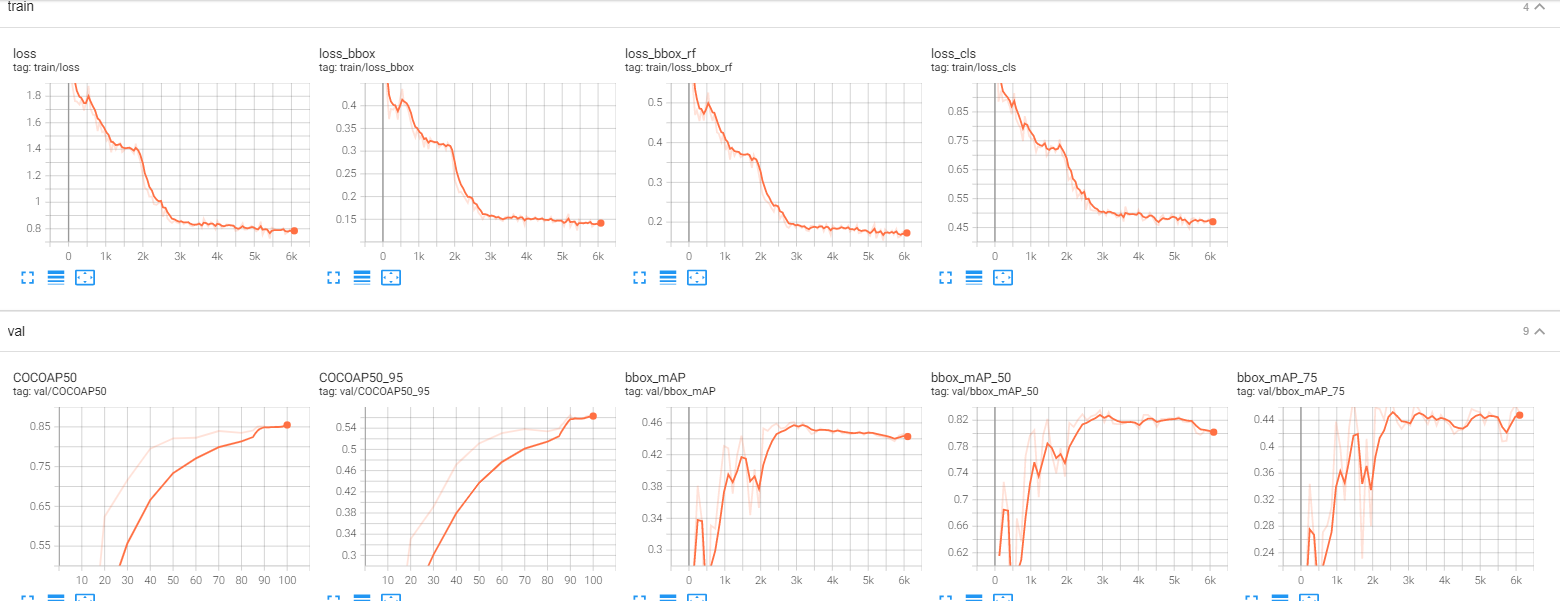

naver dataset 추가하기 전
Training set 770 | validation set 62 | Testing set 120
(다시 확인 필요함)

- toilet :  train 198 / valid 19 / test 11
- escalator :  train 198 / valid 19 / test 11
- elevator :  train 330 / valid 16 / test 31

class balance 
-toilet 267
-escalator 622
-elevator 450

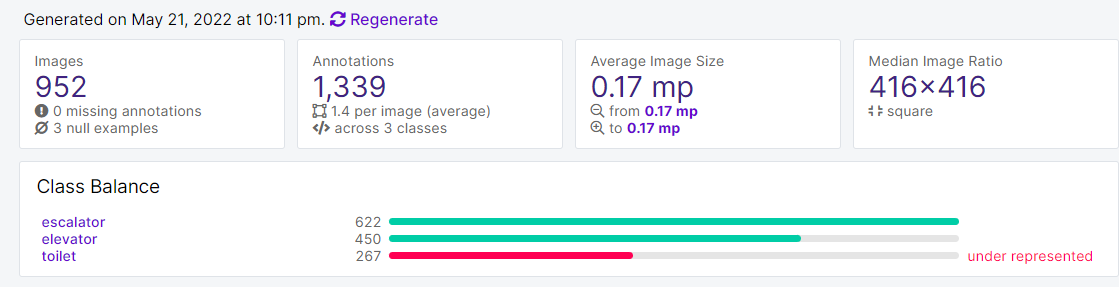

In [ ]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -o -c ./yolox_s.pth -expn trial2

1
2022-05-21 13:51:44 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./yolox_s.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='trial2', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=False, start_epoch=None)
2022-05-21 13:51:44 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├───────────────────┼──────────────────────

2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark3.1.conv1.bn.weight in checkpoint is torch.Size([64]), while shape of backbone.backbone.dark3.1.conv1.bn.weight in model is torch.Size([128]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark3.1.conv1.bn.bias in checkpoint is torch.Size([64]), while shape of backbone.backbone.dark3.1.conv1.bn.bias in model is torch.Size([128]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark3.1.conv1.bn.running_mean in checkpoint is torch.Size([64]), while shape of backbone.backbone.dark3.1.conv1.bn.running_mean in model is torch.Size([128]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark3.1.conv1.bn.running_var in checkpoint is torch.Size([64]), while shape of backbone.backbone.dark3.1.conv1.bn.running_var in model is torch.Size([128]).
2022-05-21 13:51:49 | WARNING  | yolox.uti

2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.6.conv1.bn.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.6.conv1.bn.bias is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.6.conv1.bn.running_mean is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.6.conv1.bn.running_var is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.6.conv1.bn.num_batches_tracked is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.backbone.dark3.1.m.6.conv2.conv.w

2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.2.conv1.bn.running_mean in checkpoint is torch.Size([128]), while shape of backbone.backbone.dark4.1.m.2.conv1.bn.running_mean in model is torch.Size([256]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.2.conv1.bn.running_var in checkpoint is torch.Size([128]), while shape of backbone.backbone.dark4.1.m.2.conv1.bn.running_var in model is torch.Size([256]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.2.conv2.conv.weight in checkpoint is torch.Size([128, 128, 3, 3]), while shape of backbone.backbone.dark4.1.m.2.conv2.conv.weight in model is torch.Size([256, 256, 3, 3]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark4.1.m.2.conv2.bn.weight in checkpoint is torch.Size([128]), while shape of backbone.backbone.dark4.1.m.2.conv2.bn.weight in mode

2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.conv.weight in checkpoint is torch.Size([512, 256, 3, 3]), while shape of backbone.backbone.dark5.0.conv.weight in model is torch.Size([1024, 512, 3, 3]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.bn.weight in checkpoint is torch.Size([512]), while shape of backbone.backbone.dark5.0.bn.weight in model is torch.Size([1024]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.bn.bias in checkpoint is torch.Size([512]), while shape of backbone.backbone.dark5.0.bn.bias in model is torch.Size([1024]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.backbone.dark5.0.bn.running_mean in checkpoint is torch.Size([512]), while shape of backbone.backbone.dark5.0.bn.running_mean in model is torch.Size([1024]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape

2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.conv2.bn.running_mean in checkpoint is torch.Size([128]), while shape of backbone.C3_p4.conv2.bn.running_mean in model is torch.Size([256]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.conv2.bn.running_var in checkpoint is torch.Size([128]), while shape of backbone.C3_p4.conv2.bn.running_var in model is torch.Size([256]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.conv3.conv.weight in checkpoint is torch.Size([256, 256, 1, 1]), while shape of backbone.C3_p4.conv3.conv.weight in model is torch.Size([512, 512, 1, 1]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.conv3.bn.weight in checkpoint is torch.Size([256]), while shape of backbone.C3_p4.conv3.bn.weight in model is torch.Size([512]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of backbone.C3_p4.conv3.bn.bi

2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.1.conv1.bn.running_var is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.1.conv1.bn.num_batches_tracked is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.1.conv2.conv.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.1.conv2.bn.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.1.conv2.bn.bias is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_p3.m.1.conv2.bn.running_mean is not in the ckpt. Please double check and see if this is d

2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_n3.m.2.conv1.bn.num_batches_tracked is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_n3.m.2.conv2.conv.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_n3.m.2.conv2.bn.weight is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_n3.m.2.conv2.bn.bias is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_n3.m.2.conv2.bn.running_mean is not in the ckpt. Please double check and see if this is desired.
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:18 - backbone.C3_n3.m.2.conv2.bn.running_var is not in the ckpt. Please double check and see if this is d

2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.cls_convs.1.0.bn.running_var in checkpoint is torch.Size([128]), while shape of head.cls_convs.1.0.bn.running_var in model is torch.Size([256]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.cls_convs.1.1.conv.weight in checkpoint is torch.Size([128, 128, 3, 3]), while shape of head.cls_convs.1.1.conv.weight in model is torch.Size([256, 256, 3, 3]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.cls_convs.1.1.bn.weight in checkpoint is torch.Size([128]), while shape of head.cls_convs.1.1.bn.weight in model is torch.Size([256]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.cls_convs.1.1.bn.bias in checkpoint is torch.Size([128]), while shape of head.cls_convs.1.1.bn.bias in model is torch.Size([256]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.cls_convs.1.1.bn.running_mean in checkpoint is torch.

2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.stems.2.bn.weight in checkpoint is torch.Size([128]), while shape of head.stems.2.bn.weight in model is torch.Size([256]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.stems.2.bn.bias in checkpoint is torch.Size([128]), while shape of head.stems.2.bn.bias in model is torch.Size([256]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.stems.2.bn.running_mean in checkpoint is torch.Size([128]), while shape of head.stems.2.bn.running_mean in model is torch.Size([256]).
2022-05-21 13:51:49 | WARNING  | yolox.utils.checkpoint:26 - Shape of head.stems.2.bn.running_var in checkpoint is torch.Size([128]), while shape of head.stems.2.bn.running_var in model is torch.Size([256]).
/home/lobbyist1993/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of wo

2022-05-21 13:52:14 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 10/333, mem: 9733Mb, iter_time: 1.633s, data_time: 0.007s, total_loss: 45.4, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 39.4, cls_loss: 2.3, lr: 1.127e-06, size: 416, ETA: 15:06:18
2022-05-21 13:52:27 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 20/333, mem: 9733Mb, iter_time: 1.348s, data_time: 0.007s, total_loss: 48.9, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 43.0, cls_loss: 2.2, lr: 4.509e-06, size: 384, ETA: 13:46:46
2022-05-21 13:52:40 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 30/333, mem: 9733Mb, iter_time: 1.290s, data_time: 0.007s, total_loss: 37.1, iou_loss: 3.6, l1_loss: 0.0, conf_loss: 31.1, cls_loss: 2.3, lr: 1.015e-05, size: 352, ETA: 13:09:23
2022-05-21 13:52:52 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 40/333, mem: 9733Mb, iter_time: 1.135s, data_time: 0.007s, total_loss: 43.0, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 37.0, cls_loss: 2.3, lr: 1.804e-05, s

2022-05-21 13:57:59 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 290/333, mem: 9733Mb, iter_time: 1.244s, data_time: 0.008s, total_loss: 10.2, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 5.2, cls_loss: 1.3, lr: 9.480e-04, size: 448, ETA: 11:25:57
2022-05-21 13:58:08 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 300/333, mem: 9733Mb, iter_time: 0.911s, data_time: 0.008s, total_loss: 10.8, iou_loss: 3.8, l1_loss: 0.0, conf_loss: 5.7, cls_loss: 1.3, lr: 1.015e-03, size: 352, ETA: 11:19:36
2022-05-21 13:58:15 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 310/333, mem: 9733Mb, iter_time: 0.607s, data_time: 0.008s, total_loss: 10.7, iou_loss: 4.1, l1_loss: 0.0, conf_loss: 5.3, cls_loss: 1.2, lr: 1.083e-03, size: 256, ETA: 11:08:14
2022-05-21 13:58:26 | INFO     | yolox.core.trainer:261 - epoch: 1/100, iter: 320/333, mem: 9733Mb, iter_time: 1.143s, data_time: 0.009s, total_loss: 10.1, iou_loss: 3.6, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.5, lr: 1.154e-03, s

2022-05-21 14:03:17 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 230/333, mem: 9733Mb, iter_time: 1.519s, data_time: 0.009s, total_loss: 9.3, iou_loss: 3.5, l1_loss: 0.0, conf_loss: 4.7, cls_loss: 1.1, lr: 1.250e-03, size: 416, ETA: 10:56:50
2022-05-21 14:03:29 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 240/333, mem: 9733Mb, iter_time: 1.203s, data_time: 0.009s, total_loss: 8.9, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.5, cls_loss: 1.1, lr: 1.250e-03, size: 480, ETA: 10:56:38
2022-05-21 14:03:44 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 250/333, mem: 9733Mb, iter_time: 1.497s, data_time: 0.009s, total_loss: 9.3, iou_loss: 3.5, l1_loss: 0.0, conf_loss: 4.8, cls_loss: 1.0, lr: 1.250e-03, size: 576, ETA: 10:59:10
2022-05-21 14:03:59 | INFO     | yolox.core.trainer:261 - epoch: 2/100, iter: 260/333, mem: 9733Mb, iter_time: 1.506s, data_time: 0.009s, total_loss: 9.4, iou_loss: 3.9, l1_loss: 0.0, conf_loss: 4.5, cls_loss: 1.0, lr: 1.250e-03, size:

2022-05-21 14:09:11 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 170/333, mem: 9733Mb, iter_time: 1.653s, data_time: 0.009s, total_loss: 8.8, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.4, cls_loss: 1.1, lr: 1.249e-03, size: 576, ETA: 11:05:38
2022-05-21 14:09:25 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 180/333, mem: 9733Mb, iter_time: 1.465s, data_time: 0.009s, total_loss: 8.0, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 3.8, cls_loss: 0.9, lr: 1.249e-03, size: 448, ETA: 11:06:55
2022-05-21 14:09:37 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 190/333, mem: 9733Mb, iter_time: 1.171s, data_time: 0.008s, total_loss: 9.4, iou_loss: 3.6, l1_loss: 0.0, conf_loss: 4.6, cls_loss: 1.3, lr: 1.249e-03, size: 416, ETA: 11:06:20
2022-05-21 14:09:50 | INFO     | yolox.core.trainer:261 - epoch: 3/100, iter: 200/333, mem: 9733Mb, iter_time: 1.266s, data_time: 0.009s, total_loss: 8.8, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 4.3, cls_loss: 1.1, lr: 1.249e-03, size:

2022-05-21 14:14:38 | INFO     | yolox.core.trainer:261 - epoch: 4/100, iter: 110/333, mem: 9733Mb, iter_time: 1.298s, data_time: 0.009s, total_loss: 8.8, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 4.5, cls_loss: 1.1, lr: 1.248e-03, size: 480, ETA: 10:54:31
2022-05-21 14:14:48 | INFO     | yolox.core.trainer:261 - epoch: 4/100, iter: 120/333, mem: 9733Mb, iter_time: 0.995s, data_time: 0.009s, total_loss: 8.9, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.6, cls_loss: 1.0, lr: 1.248e-03, size: 384, ETA: 10:53:14
2022-05-21 14:15:04 | INFO     | yolox.core.trainer:261 - epoch: 4/100, iter: 130/333, mem: 9733Mb, iter_time: 1.611s, data_time: 0.009s, total_loss: 9.3, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.8, cls_loss: 1.2, lr: 1.248e-03, size: 544, ETA: 10:54:54
2022-05-21 14:15:17 | INFO     | yolox.core.trainer:261 - epoch: 4/100, iter: 140/333, mem: 9733Mb, iter_time: 1.270s, data_time: 0.009s, total_loss: 8.7, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 4.4, cls_loss: 1.0, lr: 1.248e-03, size:

2022-05-21 14:19:32 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 50/333, mem: 9733Mb, iter_time: 0.914s, data_time: 0.009s, total_loss: 7.9, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 3.7, cls_loss: 0.9, lr: 1.246e-03, size: 352, ETA: 10:33:03
2022-05-21 14:19:42 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 60/333, mem: 9733Mb, iter_time: 0.960s, data_time: 0.007s, total_loss: 8.4, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 4.3, cls_loss: 1.0, lr: 1.246e-03, size: 416, ETA: 10:31:59
2022-05-21 14:19:52 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 70/333, mem: 9733Mb, iter_time: 1.028s, data_time: 0.008s, total_loss: 8.4, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 4.1, cls_loss: 1.0, lr: 1.246e-03, size: 256, ETA: 10:31:10
2022-05-21 14:20:00 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 80/333, mem: 9733Mb, iter_time: 0.817s, data_time: 0.008s, total_loss: 10.4, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 6.2, cls_loss: 0.9, lr: 1.246e-03, size: 54

2022-05-21 14:24:49 | INFO     | yolox.core.trainer:261 - epoch: 5/100, iter: 330/333, mem: 9733Mb, iter_time: 0.852s, data_time: 0.009s, total_loss: 7.9, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 3.8, cls_loss: 0.9, lr: 1.243e-03, size: 256, ETA: 10:22:19
2022-05-21 14:24:51 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 14:24:54 | INFO     | yolox.core.trainer:203 - ---> start train epoch6
2022-05-21 14:25:04 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 10/333, mem: 9733Mb, iter_time: 1.003s, data_time: 0.009s, total_loss: 7.8, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 4.0, cls_loss: 0.8, lr: 1.243e-03, size: 512, ETA: 10:20:58
2022-05-21 14:25:18 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 20/333, mem: 9733Mb, iter_time: 1.389s, data_time: 0.009s, total_loss: 8.4, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 4.1, cls_loss: 1.0, lr: 1.243e-03, size: 512, ETA: 10:21:25
2022-05-21 14:25:29 | INFO     | yolox.core.trainer:261 - 

2022-05-21 14:29:54 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 270/333, mem: 9733Mb, iter_time: 1.538s, data_time: 0.008s, total_loss: 6.9, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.2, cls_loss: 0.8, lr: 1.240e-03, size: 544, ETA: 10:11:24
2022-05-21 14:30:05 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 280/333, mem: 9733Mb, iter_time: 1.140s, data_time: 0.008s, total_loss: 9.1, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 4.7, cls_loss: 1.0, lr: 1.240e-03, size: 256, ETA: 10:11:08
2022-05-21 14:30:14 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 290/333, mem: 9733Mb, iter_time: 0.865s, data_time: 0.008s, total_loss: 9.0, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 4.7, cls_loss: 1.2, lr: 1.240e-03, size: 416, ETA: 10:10:07
2022-05-21 14:30:28 | INFO     | yolox.core.trainer:261 - epoch: 6/100, iter: 300/333, mem: 9733Mb, iter_time: 1.408s, data_time: 0.009s, total_loss: 7.3, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.5, cls_loss: 0.9, lr: 1.240e-03, size:

2022-05-21 14:35:21 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 210/333, mem: 9733Mb, iter_time: 1.239s, data_time: 0.008s, total_loss: 7.5, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.6, cls_loss: 0.9, lr: 1.237e-03, size: 416, ETA: 10:07:11
2022-05-21 14:35:36 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 220/333, mem: 9733Mb, iter_time: 1.575s, data_time: 0.008s, total_loss: 7.0, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.3, cls_loss: 0.8, lr: 1.237e-03, size: 544, ETA: 10:07:56
2022-05-21 14:35:46 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 230/333, mem: 9733Mb, iter_time: 0.968s, data_time: 0.008s, total_loss: 7.2, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.3, cls_loss: 0.8, lr: 1.237e-03, size: 320, ETA: 10:07:16
2022-05-21 14:35:58 | INFO     | yolox.core.trainer:261 - epoch: 7/100, iter: 240/333, mem: 9733Mb, iter_time: 1.243s, data_time: 0.009s, total_loss: 7.1, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.3, cls_loss: 0.7, lr: 1.236e-03, size:

2022-05-21 14:40:27 | INFO     | yolox.core.trainer:261 - epoch: 8/100, iter: 150/333, mem: 9733Mb, iter_time: 0.883s, data_time: 0.008s, total_loss: 8.0, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 4.4, cls_loss: 0.7, lr: 1.233e-03, size: 544, ETA: 9:58:30
2022-05-21 14:40:43 | INFO     | yolox.core.trainer:261 - epoch: 8/100, iter: 160/333, mem: 9733Mb, iter_time: 1.633s, data_time: 0.008s, total_loss: 7.1, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.2, cls_loss: 0.9, lr: 1.233e-03, size: 448, ETA: 9:59:17
2022-05-21 14:40:55 | INFO     | yolox.core.trainer:261 - epoch: 8/100, iter: 170/333, mem: 9733Mb, iter_time: 1.198s, data_time: 0.008s, total_loss: 7.0, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.8, lr: 1.232e-03, size: 352, ETA: 9:59:09
2022-05-21 14:41:06 | INFO     | yolox.core.trainer:261 - epoch: 8/100, iter: 180/333, mem: 9733Mb, iter_time: 1.021s, data_time: 0.009s, total_loss: 8.2, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 4.2, cls_loss: 0.9, lr: 1.232e-03, size: 54

2022-05-21 14:45:20 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 90/333, mem: 9733Mb, iter_time: 0.652s, data_time: 0.007s, total_loss: 7.5, iou_loss: 3.2, l1_loss: 0.0, conf_loss: 3.5, cls_loss: 0.8, lr: 1.228e-03, size: 288, ETA: 9:48:03
2022-05-21 14:45:27 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 100/333, mem: 9733Mb, iter_time: 0.732s, data_time: 0.008s, total_loss: 6.6, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.8, lr: 1.228e-03, size: 288, ETA: 9:47:05
2022-05-21 14:45:37 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 110/333, mem: 9733Mb, iter_time: 0.983s, data_time: 0.008s, total_loss: 7.0, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.3, cls_loss: 0.8, lr: 1.228e-03, size: 480, ETA: 9:46:34
2022-05-21 14:45:51 | INFO     | yolox.core.trainer:261 - epoch: 9/100, iter: 120/333, mem: 9733Mb, iter_time: 1.359s, data_time: 0.008s, total_loss: 7.3, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 3.3, cls_loss: 1.0, lr: 1.228e-03, size: 480

2022-05-21 14:50:48 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 30/333, mem: 9733Mb, iter_time: 0.921s, data_time: 0.008s, total_loss: 6.4, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.7, lr: 1.223e-03, size: 320, ETA: 9:44:27
2022-05-21 14:50:57 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 40/333, mem: 9733Mb, iter_time: 0.903s, data_time: 0.008s, total_loss: 6.0, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 1.223e-03, size: 384, ETA: 9:43:50
2022-05-21 14:51:05 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 50/333, mem: 9733Mb, iter_time: 0.799s, data_time: 0.007s, total_loss: 6.8, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.8, lr: 1.223e-03, size: 288, ETA: 9:43:03
2022-05-21 14:51:14 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 60/333, mem: 9733Mb, iter_time: 0.857s, data_time: 0.007s, total_loss: 6.7, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.8, lr: 1.222e-03, size: 35

2022-05-21 14:56:08 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 310/333, mem: 9733Mb, iter_time: 1.512s, data_time: 0.008s, total_loss: 6.8, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.8, lr: 1.217e-03, size: 512, ETA: 9:38:21
2022-05-21 14:56:19 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 320/333, mem: 9733Mb, iter_time: 1.088s, data_time: 0.009s, total_loss: 6.4, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 1.217e-03, size: 384, ETA: 9:38:03
2022-05-21 14:56:31 | INFO     | yolox.core.trainer:261 - epoch: 10/100, iter: 330/333, mem: 9733Mb, iter_time: 1.262s, data_time: 0.009s, total_loss: 6.5, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.8, lr: 1.217e-03, size: 512, ETA: 9:38:01
2022-05-21 14:56:36 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
100%|##########| 22/22 [00:20<00:00,  1.05it/s]
2022-05-21 14:56:59 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main pro

2022-05-21 15:00:45 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 190/333, mem: 9733Mb, iter_time: 1.684s, data_time: 0.009s, total_loss: 6.8, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.8, lr: 1.212e-03, size: 544, ETA: 9:32:09
2022-05-21 15:00:51 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 200/333, mem: 9733Mb, iter_time: 0.603s, data_time: 0.009s, total_loss: 7.0, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.9, lr: 1.212e-03, size: 256, ETA: 9:31:11
2022-05-21 15:01:00 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 210/333, mem: 9733Mb, iter_time: 0.921s, data_time: 0.008s, total_loss: 6.7, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.7, lr: 1.212e-03, size: 352, ETA: 9:30:40
2022-05-21 15:01:09 | INFO     | yolox.core.trainer:261 - epoch: 11/100, iter: 220/333, mem: 9733Mb, iter_time: 0.911s, data_time: 0.008s, total_loss: 6.6, iou_loss: 3.1, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 1.212e-03, size

2022-05-21 15:05:37 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 130/333, mem: 9733Mb, iter_time: 0.771s, data_time: 0.009s, total_loss: 6.7, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.7, lr: 1.206e-03, size: 288, ETA: 9:23:39
2022-05-21 15:05:45 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 140/333, mem: 9733Mb, iter_time: 0.799s, data_time: 0.009s, total_loss: 5.9, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 1.205e-03, size: 384, ETA: 9:23:01
2022-05-21 15:05:54 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 150/333, mem: 9733Mb, iter_time: 0.888s, data_time: 0.009s, total_loss: 6.5, iou_loss: 2.9, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.8, lr: 1.205e-03, size: 288, ETA: 9:22:30
2022-05-21 15:06:02 | INFO     | yolox.core.trainer:261 - epoch: 12/100, iter: 160/333, mem: 9733Mb, iter_time: 0.749s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 1.205e-03, size

2022-05-21 15:10:46 | INFO     | yolox.core.trainer:261 - epoch: 13/100, iter: 70/333, mem: 9733Mb, iter_time: 1.247s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.199e-03, size: 384, ETA: 9:17:41
2022-05-21 15:10:57 | INFO     | yolox.core.trainer:261 - epoch: 13/100, iter: 80/333, mem: 9733Mb, iter_time: 1.059s, data_time: 0.009s, total_loss: 6.8, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.9, lr: 1.198e-03, size: 416, ETA: 9:17:23
2022-05-21 15:11:07 | INFO     | yolox.core.trainer:261 - epoch: 13/100, iter: 90/333, mem: 9733Mb, iter_time: 0.999s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.7, lr: 1.198e-03, size: 352, ETA: 9:17:01
2022-05-21 15:11:17 | INFO     | yolox.core.trainer:261 - epoch: 13/100, iter: 100/333, mem: 9733Mb, iter_time: 1.040s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 1.198e-03, size: 4

2022-05-21 15:16:28 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 10/333, mem: 9733Mb, iter_time: 1.176s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.7, lr: 1.191e-03, size: 448, ETA: 9:15:24
2022-05-21 15:16:41 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 20/333, mem: 9733Mb, iter_time: 1.339s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.191e-03, size: 480, ETA: 9:15:25
2022-05-21 15:16:55 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 30/333, mem: 9733Mb, iter_time: 1.355s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.8, lr: 1.190e-03, size: 480, ETA: 9:15:27
2022-05-21 15:17:05 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 40/333, mem: 9733Mb, iter_time: 0.964s, data_time: 0.008s, total_loss: 5.7, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.8, lr: 1.190e-03, size: 35

2022-05-21 15:22:19 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 290/333, mem: 9733Mb, iter_time: 0.999s, data_time: 0.009s, total_loss: 6.2, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.8, lr: 1.183e-03, size: 384, ETA: 9:13:00
2022-05-21 15:22:27 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 300/333, mem: 9733Mb, iter_time: 0.754s, data_time: 0.008s, total_loss: 5.8, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 1.182e-03, size: 288, ETA: 9:12:24
2022-05-21 15:22:36 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 310/333, mem: 9733Mb, iter_time: 0.891s, data_time: 0.009s, total_loss: 6.8, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.8, lr: 1.182e-03, size: 352, ETA: 9:11:56
2022-05-21 15:22:52 | INFO     | yolox.core.trainer:261 - epoch: 14/100, iter: 320/333, mem: 9733Mb, iter_time: 1.608s, data_time: 0.010s, total_loss: 6.0, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.8, lr: 1.182e-03, size

2022-05-21 15:27:21 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 230/333, mem: 9733Mb, iter_time: 0.628s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.9, cls_loss: 0.7, lr: 1.174e-03, size: 288, ETA: 9:06:06
2022-05-21 15:27:29 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 240/333, mem: 9733Mb, iter_time: 0.810s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 1.174e-03, size: 416, ETA: 9:05:35
2022-05-21 15:27:40 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 250/333, mem: 9733Mb, iter_time: 1.081s, data_time: 0.010s, total_loss: 5.7, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.9, lr: 1.173e-03, size: 320, ETA: 9:05:19
2022-05-21 15:27:48 | INFO     | yolox.core.trainer:261 - epoch: 15/100, iter: 260/333, mem: 9733Mb, iter_time: 0.875s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 1.173e-03, size

2022-05-21 15:32:36 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 170/333, mem: 9733Mb, iter_time: 1.040s, data_time: 0.008s, total_loss: 5.7, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.165e-03, size: 480, ETA: 9:00:42
2022-05-21 15:32:48 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 180/333, mem: 9733Mb, iter_time: 1.133s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.164e-03, size: 352, ETA: 9:00:30
2022-05-21 15:33:01 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 190/333, mem: 9733Mb, iter_time: 1.361s, data_time: 0.008s, total_loss: 7.0, iou_loss: 3.0, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.8, lr: 1.164e-03, size: 576, ETA: 9:00:29
2022-05-21 15:33:15 | INFO     | yolox.core.trainer:261 - epoch: 16/100, iter: 200/333, mem: 9733Mb, iter_time: 1.361s, data_time: 0.009s, total_loss: 6.3, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.7, lr: 1.164e-03, size

2022-05-21 15:38:10 | INFO     | yolox.core.trainer:261 - epoch: 17/100, iter: 110/333, mem: 9733Mb, iter_time: 0.952s, data_time: 0.008s, total_loss: 6.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.8, lr: 1.155e-03, size: 352, ETA: 8:56:52
2022-05-21 15:38:17 | INFO     | yolox.core.trainer:261 - epoch: 17/100, iter: 120/333, mem: 9733Mb, iter_time: 0.661s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 1.155e-03, size: 256, ETA: 8:56:16
2022-05-21 15:38:29 | INFO     | yolox.core.trainer:261 - epoch: 17/100, iter: 130/333, mem: 9733Mb, iter_time: 1.234s, data_time: 0.010s, total_loss: 6.4, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.7, lr: 1.154e-03, size: 512, ETA: 8:56:08
2022-05-21 15:38:47 | INFO     | yolox.core.trainer:261 - epoch: 17/100, iter: 140/333, mem: 9733Mb, iter_time: 1.729s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 1.154e-03, size

2022-05-21 15:43:16 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 50/333, mem: 9733Mb, iter_time: 1.655s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.8, lr: 1.145e-03, size: 512, ETA: 8:50:35
2022-05-21 15:43:30 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 60/333, mem: 9733Mb, iter_time: 1.388s, data_time: 0.008s, total_loss: 5.1, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.145e-03, size: 480, ETA: 8:50:35
2022-05-21 15:43:44 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 70/333, mem: 9733Mb, iter_time: 1.392s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 1.144e-03, size: 544, ETA: 8:50:34
2022-05-21 15:44:00 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 80/333, mem: 9733Mb, iter_time: 1.590s, data_time: 0.009s, total_loss: 5.9, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 1.144e-03, size: 28

2022-05-21 15:49:26 | INFO     | yolox.core.trainer:261 - epoch: 18/100, iter: 330/333, mem: 9733Mb, iter_time: 1.695s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.7, lr: 1.134e-03, size: 576, ETA: 8:48:44
2022-05-21 15:49:31 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 15:49:34 | INFO     | yolox.core.trainer:203 - ---> start train epoch19
2022-05-21 15:49:51 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 10/333, mem: 9733Mb, iter_time: 1.759s, data_time: 0.008s, total_loss: 5.4, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 1.134e-03, size: 544, ETA: 8:49:04
2022-05-21 15:50:04 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 20/333, mem: 9733Mb, iter_time: 1.251s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.8, lr: 1.133e-03, size: 256, ETA: 8:48:57
2022-05-21 15:50:13 | INFO     | yolox.core.trainer:261 -

2022-05-21 15:54:54 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 270/333, mem: 9733Mb, iter_time: 1.024s, data_time: 0.009s, total_loss: 5.2, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 1.123e-03, size: 416, ETA: 8:44:04
2022-05-21 15:55:04 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 280/333, mem: 9733Mb, iter_time: 0.974s, data_time: 0.009s, total_loss: 6.1, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.8, cls_loss: 0.7, lr: 1.123e-03, size: 288, ETA: 8:43:44
2022-05-21 15:55:16 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 290/333, mem: 9733Mb, iter_time: 1.161s, data_time: 0.009s, total_loss: 5.2, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.122e-03, size: 576, ETA: 8:43:32
2022-05-21 15:55:30 | INFO     | yolox.core.trainer:261 - epoch: 19/100, iter: 300/333, mem: 9733Mb, iter_time: 1.450s, data_time: 0.009s, total_loss: 5.9, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 1.122e-03, size

2022-05-21 16:00:02 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 210/333, mem: 9733Mb, iter_time: 0.921s, data_time: 0.008s, total_loss: 5.5, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 1.112e-03, size: 320, ETA: 8:37:58
2022-05-21 16:00:11 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 220/333, mem: 9733Mb, iter_time: 0.901s, data_time: 0.008s, total_loss: 5.1, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 1.111e-03, size: 384, ETA: 8:37:36
2022-05-21 16:00:19 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 230/333, mem: 9733Mb, iter_time: 0.797s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.8, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 1.111e-03, size: 288, ETA: 8:37:09
2022-05-21 16:00:31 | INFO     | yolox.core.trainer:261 - epoch: 20/100, iter: 240/333, mem: 9733Mb, iter_time: 1.192s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 1.110e-03, size

2022-05-21 16:04:57 | INFO     | yolox.core.trainer:261 - epoch: 21/100, iter: 100/333, mem: 9733Mb, iter_time: 0.912s, data_time: 0.007s, total_loss: 5.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 1.102e-03, size: 352, ETA: 8:34:08
2022-05-21 16:05:15 | INFO     | yolox.core.trainer:261 - epoch: 21/100, iter: 110/333, mem: 9733Mb, iter_time: 1.811s, data_time: 0.008s, total_loss: 5.4, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.8, lr: 1.101e-03, size: 576, ETA: 8:34:21
2022-05-21 16:05:32 | INFO     | yolox.core.trainer:261 - epoch: 21/100, iter: 120/333, mem: 9733Mb, iter_time: 1.683s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.101e-03, size: 544, ETA: 8:34:30
2022-05-21 16:05:38 | INFO     | yolox.core.trainer:261 - epoch: 21/100, iter: 130/333, mem: 9733Mb, iter_time: 0.601s, data_time: 0.008s, total_loss: 6.8, iou_loss: 3.3, l1_loss: 0.0, conf_loss: 2.6, cls_loss: 0.8, lr: 1.101e-03, size

2022-05-21 16:09:55 | INFO     | yolox.core.trainer:261 - epoch: 22/100, iter: 40/333, mem: 9733Mb, iter_time: 0.910s, data_time: 0.008s, total_loss: 5.5, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.090e-03, size: 352, ETA: 8:27:30
2022-05-21 16:10:07 | INFO     | yolox.core.trainer:261 - epoch: 22/100, iter: 50/333, mem: 9733Mb, iter_time: 1.147s, data_time: 0.009s, total_loss: 6.7, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 3.2, cls_loss: 0.8, lr: 1.089e-03, size: 544, ETA: 8:27:18
2022-05-21 16:10:20 | INFO     | yolox.core.trainer:261 - epoch: 22/100, iter: 60/333, mem: 9733Mb, iter_time: 1.362s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 1.089e-03, size: 256, ETA: 8:27:14
2022-05-21 16:10:27 | INFO     | yolox.core.trainer:261 - epoch: 22/100, iter: 70/333, mem: 9733Mb, iter_time: 0.641s, data_time: 0.009s, total_loss: 5.8, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 1.088e-03, size: 28

2022-05-21 16:14:56 | INFO     | yolox.core.trainer:261 - epoch: 22/100, iter: 320/333, mem: 9733Mb, iter_time: 1.158s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 1.077e-03, size: 256, ETA: 8:20:39
2022-05-21 16:15:05 | INFO     | yolox.core.trainer:261 - epoch: 22/100, iter: 330/333, mem: 9733Mb, iter_time: 0.936s, data_time: 0.010s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.076e-03, size: 544, ETA: 8:20:19
2022-05-21 16:15:10 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 16:15:12 | INFO     | yolox.core.trainer:203 - ---> start train epoch23
2022-05-21 16:15:25 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 10/333, mem: 9733Mb, iter_time: 1.222s, data_time: 0.010s, total_loss: 4.7, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.076e-03, size: 352, ETA: 8:20:12
2022-05-21 16:15:38 | INFO     | yolox.core.trainer:261 

2022-05-21 16:20:28 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 260/333, mem: 9733Mb, iter_time: 1.513s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.064e-03, size: 512, ETA: 8:16:11
2022-05-21 16:20:39 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 270/333, mem: 9733Mb, iter_time: 1.130s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.063e-03, size: 384, ETA: 8:15:59
2022-05-21 16:20:50 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 280/333, mem: 9733Mb, iter_time: 1.062s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 1.063e-03, size: 416, ETA: 8:15:44
2022-05-21 16:21:00 | INFO     | yolox.core.trainer:261 - epoch: 23/100, iter: 290/333, mem: 9733Mb, iter_time: 1.026s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.062e-03, size

2022-05-21 16:25:48 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 200/333, mem: 9733Mb, iter_time: 0.939s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.050e-03, size: 384, ETA: 8:10:58
2022-05-21 16:25:57 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 210/333, mem: 9733Mb, iter_time: 0.955s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 1.050e-03, size: 384, ETA: 8:10:40
2022-05-21 16:26:13 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 220/333, mem: 9733Mb, iter_time: 1.614s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 1.049e-03, size: 544, ETA: 8:10:43
2022-05-21 16:26:27 | INFO     | yolox.core.trainer:261 - epoch: 24/100, iter: 230/333, mem: 9733Mb, iter_time: 1.389s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.049e-03, size

2022-05-21 16:31:11 | INFO     | yolox.core.trainer:261 - epoch: 25/100, iter: 140/333, mem: 9733Mb, iter_time: 1.177s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 1.036e-03, size: 384, ETA: 8:05:56
2022-05-21 16:31:21 | INFO     | yolox.core.trainer:261 - epoch: 25/100, iter: 150/333, mem: 9733Mb, iter_time: 0.955s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.036e-03, size: 384, ETA: 8:05:38
2022-05-21 16:31:31 | INFO     | yolox.core.trainer:261 - epoch: 25/100, iter: 160/333, mem: 9733Mb, iter_time: 1.014s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.035e-03, size: 448, ETA: 8:05:22
2022-05-21 16:31:42 | INFO     | yolox.core.trainer:261 - epoch: 25/100, iter: 170/333, mem: 9733Mb, iter_time: 1.102s, data_time: 0.009s, total_loss: 6.7, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 3.2, cls_loss: 0.8, lr: 1.035e-03, size

2022-05-21 16:36:44 | INFO     | yolox.core.trainer:261 - epoch: 26/100, iter: 80/333, mem: 9733Mb, iter_time: 1.234s, data_time: 0.008s, total_loss: 5.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 1.022e-03, size: 544, ETA: 8:01:22
2022-05-21 16:36:55 | INFO     | yolox.core.trainer:261 - epoch: 26/100, iter: 90/333, mem: 9733Mb, iter_time: 1.144s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 1.022e-03, size: 256, ETA: 8:01:09
2022-05-21 16:37:04 | INFO     | yolox.core.trainer:261 - epoch: 26/100, iter: 100/333, mem: 9733Mb, iter_time: 0.867s, data_time: 0.008s, total_loss: 5.2, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 1.021e-03, size: 416, ETA: 8:00:49
2022-05-21 16:37:16 | INFO     | yolox.core.trainer:261 - epoch: 26/100, iter: 110/333, mem: 9733Mb, iter_time: 1.175s, data_time: 0.009s, total_loss: 6.0, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7, lr: 1.021e-03, size: 

2022-05-21 16:41:46 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 20/333, mem: 9733Mb, iter_time: 0.765s, data_time: 0.009s, total_loss: 5.5, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 1.008e-03, size: 288, ETA: 7:55:17
2022-05-21 16:42:01 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 30/333, mem: 9733Mb, iter_time: 1.496s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.6, lr: 1.007e-03, size: 544, ETA: 7:55:15
2022-05-21 16:42:11 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 40/333, mem: 9733Mb, iter_time: 0.970s, data_time: 0.008s, total_loss: 5.1, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.007e-03, size: 320, ETA: 7:54:58
2022-05-21 16:42:23 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 50/333, mem: 9733Mb, iter_time: 1.270s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 1.006e-03, size: 51

2022-05-21 16:47:11 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 300/333, mem: 9733Mb, iter_time: 1.452s, data_time: 0.010s, total_loss: 5.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 9.925e-04, size: 480, ETA: 7:49:53
2022-05-21 16:47:21 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 310/333, mem: 9733Mb, iter_time: 1.038s, data_time: 0.010s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 9.920e-04, size: 384, ETA: 7:49:38
2022-05-21 16:47:38 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 320/333, mem: 9733Mb, iter_time: 1.639s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 9.914e-04, size: 576, ETA: 7:49:40
2022-05-21 16:47:53 | INFO     | yolox.core.trainer:261 - epoch: 27/100, iter: 330/333, mem: 9733Mb, iter_time: 1.475s, data_time: 0.008s, total_loss: 4.9, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 9.909e-04, size

2022-05-21 16:52:37 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 240/333, mem: 9733Mb, iter_time: 1.151s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 9.774e-04, size: 512, ETA: 7:44:54
2022-05-21 16:52:50 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 250/333, mem: 9733Mb, iter_time: 1.365s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 9.768e-04, size: 416, ETA: 7:44:48
2022-05-21 16:53:02 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 260/333, mem: 9733Mb, iter_time: 1.159s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 9.763e-04, size: 512, ETA: 7:44:37
2022-05-21 16:53:15 | INFO     | yolox.core.trainer:261 - epoch: 28/100, iter: 270/333, mem: 9733Mb, iter_time: 1.348s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 9.757e-04, size

2022-05-21 16:57:48 | INFO     | yolox.core.trainer:261 - epoch: 29/100, iter: 180/333, mem: 9733Mb, iter_time: 0.788s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 9.619e-04, size: 256, ETA: 7:39:20
2022-05-21 16:57:59 | INFO     | yolox.core.trainer:261 - epoch: 29/100, iter: 190/333, mem: 9733Mb, iter_time: 1.085s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 9.613e-04, size: 576, ETA: 7:39:06
2022-05-21 16:58:17 | INFO     | yolox.core.trainer:261 - epoch: 29/100, iter: 200/333, mem: 9733Mb, iter_time: 1.811s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 9.608e-04, size: 576, ETA: 7:39:11
2022-05-21 16:58:33 | INFO     | yolox.core.trainer:261 - epoch: 29/100, iter: 210/333, mem: 9733Mb, iter_time: 1.576s, data_time: 0.008s, total_loss: 5.4, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.8, lr: 9.602e-04, size

2022-05-21 17:03:25 | INFO     | yolox.core.trainer:261 - epoch: 30/100, iter: 120/333, mem: 9733Mb, iter_time: 1.237s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 9.462e-04, size: 480, ETA: 7:34:47
2022-05-21 17:03:41 | INFO     | yolox.core.trainer:261 - epoch: 30/100, iter: 130/333, mem: 9733Mb, iter_time: 1.589s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 9.456e-04, size: 544, ETA: 7:34:45
2022-05-21 17:03:51 | INFO     | yolox.core.trainer:261 - epoch: 30/100, iter: 140/333, mem: 9733Mb, iter_time: 1.015s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 9.450e-04, size: 288, ETA: 7:34:30
2022-05-21 17:04:06 | INFO     | yolox.core.trainer:261 - epoch: 30/100, iter: 150/333, mem: 9733Mb, iter_time: 1.488s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 9.444e-04, size

2022-05-21 17:07:50 | INFO     | yolox.core.trainer:203 - ---> start train epoch31
2022-05-21 17:07:56 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 10/333, mem: 9733Mb, iter_time: 0.606s, data_time: 0.008s, total_loss: 5.1, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 9.331e-04, size: 256, ETA: 7:29:54
2022-05-21 17:08:04 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 20/333, mem: 9733Mb, iter_time: 0.792s, data_time: 0.007s, total_loss: 4.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 9.325e-04, size: 320, ETA: 7:29:34
2022-05-21 17:08:17 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 30/333, mem: 9733Mb, iter_time: 1.366s, data_time: 0.007s, total_loss: 3.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 9.319e-04, size: 480, ETA: 7:29:27
2022-05-21 17:08:25 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 40/333, mem: 9733Mb, iter_time: 0.790s, data_time: 0.007s, total_loss: 5.0, 

2022-05-21 17:13:05 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 290/333, mem: 9733Mb, iter_time: 0.962s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 9.164e-04, size: 384, ETA: 7:23:55
2022-05-21 17:13:14 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 300/333, mem: 9733Mb, iter_time: 0.914s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 9.158e-04, size: 352, ETA: 7:23:38
2022-05-21 17:13:31 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 310/333, mem: 9733Mb, iter_time: 1.688s, data_time: 0.010s, total_loss: 4.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 9.152e-04, size: 544, ETA: 7:23:38
2022-05-21 17:13:41 | INFO     | yolox.core.trainer:261 - epoch: 31/100, iter: 320/333, mem: 9733Mb, iter_time: 0.955s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 9.146e-04, size

2022-05-21 17:18:03 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 230/333, mem: 9733Mb, iter_time: 0.792s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 9.000e-04, size: 448, ETA: 7:17:55
2022-05-21 17:18:15 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 240/333, mem: 9733Mb, iter_time: 1.199s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.994e-04, size: 416, ETA: 7:17:45
2022-05-21 17:18:27 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 250/333, mem: 9733Mb, iter_time: 1.203s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 8.987e-04, size: 480, ETA: 7:17:34
2022-05-21 17:18:42 | INFO     | yolox.core.trainer:261 - epoch: 32/100, iter: 260/333, mem: 9733Mb, iter_time: 1.494s, data_time: 0.009s, total_loss: 5.4, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 8.981e-04, size

2022-05-21 17:23:38 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 170/333, mem: 9733Mb, iter_time: 1.089s, data_time: 0.009s, total_loss: 5.7, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 8.833e-04, size: 352, ETA: 7:13:16
2022-05-21 17:23:46 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 180/333, mem: 9733Mb, iter_time: 0.807s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 8.826e-04, size: 288, ETA: 7:12:57
2022-05-21 17:23:59 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 190/333, mem: 9733Mb, iter_time: 1.307s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.7, lr: 8.820e-04, size: 544, ETA: 7:12:49
2022-05-21 17:24:11 | INFO     | yolox.core.trainer:261 - epoch: 33/100, iter: 200/333, mem: 9733Mb, iter_time: 1.222s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 8.814e-04, size

2022-05-21 17:29:07 | INFO     | yolox.core.trainer:261 - epoch: 34/100, iter: 110/333, mem: 9733Mb, iter_time: 1.168s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 8.663e-04, size: 448, ETA: 7:08:21
2022-05-21 17:29:15 | INFO     | yolox.core.trainer:261 - epoch: 34/100, iter: 120/333, mem: 9733Mb, iter_time: 0.780s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 8.657e-04, size: 288, ETA: 7:08:02
2022-05-21 17:29:24 | INFO     | yolox.core.trainer:261 - epoch: 34/100, iter: 130/333, mem: 9733Mb, iter_time: 0.931s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.7, lr: 8.651e-04, size: 384, ETA: 7:07:46
2022-05-21 17:29:40 | INFO     | yolox.core.trainer:261 - epoch: 34/100, iter: 140/333, mem: 9733Mb, iter_time: 1.612s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 8.645e-04, size

2022-05-21 17:34:43 | INFO     | yolox.core.trainer:261 - epoch: 35/100, iter: 50/333, mem: 9733Mb, iter_time: 1.633s, data_time: 0.010s, total_loss: 4.7, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 8.492e-04, size: 320, ETA: 7:03:38
2022-05-21 17:34:51 | INFO     | yolox.core.trainer:261 - epoch: 35/100, iter: 60/333, mem: 9733Mb, iter_time: 0.825s, data_time: 0.008s, total_loss: 5.4, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 8.486e-04, size: 384, ETA: 7:03:20
2022-05-21 17:35:00 | INFO     | yolox.core.trainer:261 - epoch: 35/100, iter: 70/333, mem: 9733Mb, iter_time: 0.922s, data_time: 0.009s, total_loss: 5.2, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.8, lr: 8.479e-04, size: 320, ETA: 7:03:03
2022-05-21 17:35:08 | INFO     | yolox.core.trainer:261 - epoch: 35/100, iter: 80/333, mem: 9733Mb, iter_time: 0.755s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 8.473e-04, size: 25

2022-05-21 17:40:15 | INFO     | yolox.core.trainer:261 - epoch: 35/100, iter: 330/333, mem: 9733Mb, iter_time: 1.175s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 8.315e-04, size: 480, ETA: 6:58:27
2022-05-21 17:40:19 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 17:40:21 | INFO     | yolox.core.trainer:203 - ---> start train epoch36
2022-05-21 17:40:33 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 10/333, mem: 9733Mb, iter_time: 1.139s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 8.306e-04, size: 352, ETA: 6:58:12
2022-05-21 17:40:41 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 20/333, mem: 9733Mb, iter_time: 0.852s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 8.300e-04, size: 320, ETA: 6:57:55
2022-05-21 17:40:51 | INFO     | yolox.core.trainer:261 -

2022-05-21 17:44:48 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 270/333, mem: 9733Mb, iter_time: 0.977s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 8.140e-04, size: 288, ETA: 6:51:48
2022-05-21 17:44:57 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 280/333, mem: 9733Mb, iter_time: 0.928s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 8.133e-04, size: 416, ETA: 6:51:32
2022-05-21 17:45:06 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 290/333, mem: 9733Mb, iter_time: 0.871s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 8.127e-04, size: 256, ETA: 6:51:15
2022-05-21 17:45:16 | INFO     | yolox.core.trainer:261 - epoch: 36/100, iter: 300/333, mem: 9733Mb, iter_time: 0.978s, data_time: 0.008s, total_loss: 5.2, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.7, lr: 8.120e-04, size

2022-05-21 17:50:09 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 210/333, mem: 9733Mb, iter_time: 1.571s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 7.964e-04, size: 576, ETA: 6:46:37
2022-05-21 17:50:19 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 220/333, mem: 9733Mb, iter_time: 0.945s, data_time: 0.009s, total_loss: 5.3, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 7.957e-04, size: 288, ETA: 6:46:22
2022-05-21 17:50:26 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 230/333, mem: 9733Mb, iter_time: 0.776s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 7.951e-04, size: 320, ETA: 6:46:04
2022-05-21 17:50:33 | INFO     | yolox.core.trainer:261 - epoch: 37/100, iter: 240/333, mem: 9733Mb, iter_time: 0.635s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.944e-04, size

2022-05-21 17:55:14 | INFO     | yolox.core.trainer:261 - epoch: 38/100, iter: 150/333, mem: 9733Mb, iter_time: 1.629s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 7.786e-04, size: 416, ETA: 6:40:59
2022-05-21 17:55:25 | INFO     | yolox.core.trainer:261 - epoch: 38/100, iter: 160/333, mem: 9733Mb, iter_time: 1.084s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 7.779e-04, size: 288, ETA: 6:40:46
2022-05-21 17:55:32 | INFO     | yolox.core.trainer:261 - epoch: 38/100, iter: 170/333, mem: 9733Mb, iter_time: 0.730s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 7.773e-04, size: 288, ETA: 6:40:27
2022-05-21 17:55:40 | INFO     | yolox.core.trainer:261 - epoch: 38/100, iter: 180/333, mem: 9733Mb, iter_time: 0.793s, data_time: 0.008s, total_loss: 5.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.6, lr: 7.766e-04, size

2022-05-21 18:00:20 | INFO     | yolox.core.trainer:261 - epoch: 39/100, iter: 90/333, mem: 9733Mb, iter_time: 1.305s, data_time: 0.009s, total_loss: 5.2, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.8, lr: 7.607e-04, size: 288, ETA: 6:35:25
2022-05-21 18:00:29 | INFO     | yolox.core.trainer:261 - epoch: 39/100, iter: 100/333, mem: 9733Mb, iter_time: 0.889s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 7.601e-04, size: 416, ETA: 6:35:09
2022-05-21 18:00:41 | INFO     | yolox.core.trainer:261 - epoch: 39/100, iter: 110/333, mem: 9733Mb, iter_time: 1.215s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 7.594e-04, size: 480, ETA: 6:34:59
2022-05-21 18:00:53 | INFO     | yolox.core.trainer:261 - epoch: 39/100, iter: 120/333, mem: 9733Mb, iter_time: 1.126s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 7.588e-04, size:

2022-05-21 18:05:15 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 30/333, mem: 9733Mb, iter_time: 1.125s, data_time: 0.010s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.428e-04, size: 320, ETA: 6:29:34
2022-05-21 18:05:26 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 40/333, mem: 9733Mb, iter_time: 1.093s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 7.421e-04, size: 448, ETA: 6:29:22
2022-05-21 18:05:38 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 50/333, mem: 9733Mb, iter_time: 1.153s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 7.414e-04, size: 416, ETA: 6:29:11
2022-05-21 18:05:51 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 60/333, mem: 9733Mb, iter_time: 1.311s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 7.408e-04, size: 51

2022-05-21 18:10:55 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 310/333, mem: 9733Mb, iter_time: 0.889s, data_time: 0.009s, total_loss: 5.1, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 7.243e-04, size: 320, ETA: 6:24:37
2022-05-21 18:11:10 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 320/333, mem: 9733Mb, iter_time: 1.510s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 7.236e-04, size: 576, ETA: 6:24:31
2022-05-21 18:11:25 | INFO     | yolox.core.trainer:261 - epoch: 40/100, iter: 330/333, mem: 9733Mb, iter_time: 1.494s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 7.229e-04, size: 480, ETA: 6:24:24
2022-05-21 18:11:29 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
100%|##########| 22/22 [00:16<00:00,  1.34it/s]
2022-05-21 18:11:48 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main pro

2022-05-21 18:15:48 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 200/333, mem: 9733Mb, iter_time: 0.913s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 7.095e-04, size: 352, ETA: 6:20:33
2022-05-21 18:15:54 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 210/333, mem: 9733Mb, iter_time: 0.595s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.088e-04, size: 256, ETA: 6:20:14
2022-05-21 18:16:06 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 220/333, mem: 9733Mb, iter_time: 1.130s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.081e-04, size: 416, ETA: 6:20:02
2022-05-21 18:16:19 | INFO     | yolox.core.trainer:261 - epoch: 41/100, iter: 230/333, mem: 9733Mb, iter_time: 1.358s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 7.075e-04, size

2022-05-21 18:20:52 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 140/333, mem: 9733Mb, iter_time: 0.929s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.913e-04, size: 512, ETA: 6:14:59
2022-05-21 18:21:05 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 150/333, mem: 9733Mb, iter_time: 1.252s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 6.906e-04, size: 352, ETA: 6:14:49
2022-05-21 18:21:14 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 160/333, mem: 9733Mb, iter_time: 0.858s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.900e-04, size: 288, ETA: 6:14:33
2022-05-21 18:21:21 | INFO     | yolox.core.trainer:261 - epoch: 42/100, iter: 170/333, mem: 9733Mb, iter_time: 0.732s, data_time: 0.009s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 6.893e-04, size

2022-05-21 18:26:06 | INFO     | yolox.core.trainer:261 - epoch: 43/100, iter: 80/333, mem: 9733Mb, iter_time: 1.026s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.731e-04, size: 384, ETA: 6:09:39
2022-05-21 18:26:16 | INFO     | yolox.core.trainer:261 - epoch: 43/100, iter: 90/333, mem: 9733Mb, iter_time: 0.956s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.725e-04, size: 384, ETA: 6:09:25
2022-05-21 18:26:23 | INFO     | yolox.core.trainer:261 - epoch: 43/100, iter: 100/333, mem: 9733Mb, iter_time: 0.742s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 6.718e-04, size: 256, ETA: 6:09:07
2022-05-21 18:26:34 | INFO     | yolox.core.trainer:261 - epoch: 43/100, iter: 110/333, mem: 9733Mb, iter_time: 1.057s, data_time: 0.007s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.711e-04, size: 

2022-05-21 18:31:17 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 20/333, mem: 9733Mb, iter_time: 0.824s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 6.549e-04, size: 288, ETA: 6:04:15
2022-05-21 18:31:26 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 30/333, mem: 9733Mb, iter_time: 0.933s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 6.542e-04, size: 384, ETA: 6:04:01
2022-05-21 18:31:44 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 40/333, mem: 9733Mb, iter_time: 1.728s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.536e-04, size: 576, ETA: 6:03:57
2022-05-21 18:32:01 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 50/333, mem: 9733Mb, iter_time: 1.699s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 6.529e-04, size: 54

2022-05-21 18:36:19 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 300/333, mem: 9733Mb, iter_time: 0.880s, data_time: 0.011s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.362e-04, size: 320, ETA: 5:58:26
2022-05-21 18:36:36 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 310/333, mem: 9733Mb, iter_time: 1.712s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.356e-04, size: 576, ETA: 5:58:21
2022-05-21 18:36:53 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 320/333, mem: 9733Mb, iter_time: 1.698s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.349e-04, size: 544, ETA: 5:58:17
2022-05-21 18:37:07 | INFO     | yolox.core.trainer:261 - epoch: 44/100, iter: 330/333, mem: 9733Mb, iter_time: 1.431s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.342e-04, size

2022-05-21 18:42:10 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 240/333, mem: 9733Mb, iter_time: 1.319s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.181e-04, size: 544, ETA: 5:53:53
2022-05-21 18:42:25 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 250/333, mem: 9733Mb, iter_time: 1.570s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 6.174e-04, size: 416, ETA: 5:53:46
2022-05-21 18:42:37 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 260/333, mem: 9733Mb, iter_time: 1.177s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 6.167e-04, size: 512, ETA: 5:53:35
2022-05-21 18:42:50 | INFO     | yolox.core.trainer:261 - epoch: 45/100, iter: 270/333, mem: 9733Mb, iter_time: 1.305s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.161e-04, size

2022-05-21 18:47:23 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 180/333, mem: 9733Mb, iter_time: 1.095s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 5.999e-04, size: 448, ETA: 5:48:33
2022-05-21 18:47:38 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 190/333, mem: 9733Mb, iter_time: 1.514s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 5.993e-04, size: 576, ETA: 5:48:26
2022-05-21 18:47:54 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 200/333, mem: 9733Mb, iter_time: 1.600s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 5.986e-04, size: 512, ETA: 5:48:19
2022-05-21 18:48:07 | INFO     | yolox.core.trainer:261 - epoch: 46/100, iter: 210/333, mem: 9733Mb, iter_time: 1.264s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 5.979e-04, size

2022-05-21 18:52:34 | INFO     | yolox.core.trainer:261 - epoch: 47/100, iter: 120/333, mem: 9733Mb, iter_time: 0.740s, data_time: 0.008s, total_loss: 5.2, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 5.818e-04, size: 288, ETA: 5:43:11
2022-05-21 18:52:43 | INFO     | yolox.core.trainer:261 - epoch: 47/100, iter: 130/333, mem: 9733Mb, iter_time: 0.876s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 5.812e-04, size: 352, ETA: 5:42:56
2022-05-21 18:52:51 | INFO     | yolox.core.trainer:261 - epoch: 47/100, iter: 140/333, mem: 9733Mb, iter_time: 0.768s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.8, lr: 5.805e-04, size: 288, ETA: 5:42:40
2022-05-21 18:53:01 | INFO     | yolox.core.trainer:261 - epoch: 47/100, iter: 150/333, mem: 9733Mb, iter_time: 1.052s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 5.798e-04, size

2022-05-21 18:57:47 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 60/333, mem: 9733Mb, iter_time: 0.595s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 5.638e-04, size: 256, ETA: 5:37:51
2022-05-21 18:57:53 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 70/333, mem: 9733Mb, iter_time: 0.631s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 5.631e-04, size: 352, ETA: 5:37:34
2022-05-21 18:58:03 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 80/333, mem: 9733Mb, iter_time: 0.935s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 5.625e-04, size: 416, ETA: 5:37:20
2022-05-21 18:58:14 | INFO     | yolox.core.trainer:261 - epoch: 48/100, iter: 90/333, mem: 9733Mb, iter_time: 1.105s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 5.618e-04, size: 35

2022-05-21 19:03:11 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 19:03:13 | INFO     | yolox.core.trainer:203 - ---> start train epoch49
2022-05-21 19:03:26 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 10/333, mem: 9733Mb, iter_time: 1.294s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 5.452e-04, size: 512, ETA: 5:32:36
2022-05-21 19:03:38 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 20/333, mem: 9733Mb, iter_time: 1.219s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 5.446e-04, size: 384, ETA: 5:32:25
2022-05-21 19:03:48 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 30/333, mem: 9733Mb, iter_time: 0.958s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.439e-04, size: 384, ETA: 5:32:12
2022-05-21 19:03:57 | INFO     | yolox.core.trainer:261 - 

2022-05-21 19:08:14 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 280/333, mem: 9733Mb, iter_time: 1.239s, data_time: 0.010s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 5.276e-04, size: 480, ETA: 5:27:00
2022-05-21 19:08:29 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 290/333, mem: 9733Mb, iter_time: 1.543s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.269e-04, size: 576, ETA: 5:26:52
2022-05-21 19:08:46 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 300/333, mem: 9733Mb, iter_time: 1.646s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 5.263e-04, size: 512, ETA: 5:26:46
2022-05-21 19:08:59 | INFO     | yolox.core.trainer:261 - epoch: 49/100, iter: 310/333, mem: 9733Mb, iter_time: 1.323s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 5.256e-04, size

2022-05-21 19:13:38 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 220/333, mem: 9733Mb, iter_time: 0.927s, data_time: 0.008s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 5.099e-04, size: 256, ETA: 5:21:52
2022-05-21 19:13:44 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 230/333, mem: 9733Mb, iter_time: 0.597s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 5.092e-04, size: 256, ETA: 5:21:35
2022-05-21 19:13:50 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 240/333, mem: 9733Mb, iter_time: 0.595s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 5.086e-04, size: 256, ETA: 5:21:18
2022-05-21 19:13:59 | INFO     | yolox.core.trainer:261 - epoch: 50/100, iter: 250/333, mem: 9733Mb, iter_time: 0.973s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 5.079e-04, size

2022-05-21 19:18:16 | INFO     | yolox.core.trainer:261 - epoch: 51/100, iter: 110/333, mem: 9733Mb, iter_time: 1.814s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.955e-04, size: 576, ETA: 5:17:31
2022-05-21 19:18:23 | INFO     | yolox.core.trainer:261 - epoch: 51/100, iter: 120/333, mem: 9733Mb, iter_time: 0.738s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 4.949e-04, size: 288, ETA: 5:17:15
2022-05-21 19:18:42 | INFO     | yolox.core.trainer:261 - epoch: 51/100, iter: 130/333, mem: 9733Mb, iter_time: 1.816s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 4.942e-04, size: 576, ETA: 5:17:10
2022-05-21 19:18:58 | INFO     | yolox.core.trainer:261 - epoch: 51/100, iter: 140/333, mem: 9733Mb, iter_time: 1.686s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 4.936e-04, size

2022-05-21 19:23:41 | INFO     | yolox.core.trainer:261 - epoch: 52/100, iter: 50/333, mem: 9733Mb, iter_time: 0.852s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 4.781e-04, size: 416, ETA: 5:12:24
2022-05-21 19:23:52 | INFO     | yolox.core.trainer:261 - epoch: 52/100, iter: 60/333, mem: 9733Mb, iter_time: 1.064s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 4.774e-04, size: 352, ETA: 5:12:11
2022-05-21 19:24:01 | INFO     | yolox.core.trainer:261 - epoch: 52/100, iter: 70/333, mem: 9733Mb, iter_time: 0.916s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.7, lr: 4.768e-04, size: 352, ETA: 5:11:58
2022-05-21 19:24:11 | INFO     | yolox.core.trainer:261 - epoch: 52/100, iter: 80/333, mem: 9733Mb, iter_time: 1.008s, data_time: 0.012s, total_loss: 4.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 4.761e-04, size: 41

2022-05-21 19:29:16 | INFO     | yolox.core.trainer:261 - epoch: 52/100, iter: 330/333, mem: 9733Mb, iter_time: 1.018s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.603e-04, size: 544, ETA: 5:07:13
2022-05-21 19:29:21 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 19:29:24 | INFO     | yolox.core.trainer:203 - ---> start train epoch53
2022-05-21 19:29:35 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 10/333, mem: 9733Mb, iter_time: 1.149s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 4.595e-04, size: 320, ETA: 5:06:59
2022-05-21 19:29:47 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 20/333, mem: 9733Mb, iter_time: 1.151s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 4.589e-04, size: 512, ETA: 5:06:47
2022-05-21 19:30:02 | INFO     | yolox.core.trainer:261 -

2022-05-21 19:34:47 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 270/333, mem: 9733Mb, iter_time: 1.462s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.432e-04, size: 544, ETA: 5:02:10
2022-05-21 19:35:02 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 280/333, mem: 9733Mb, iter_time: 1.490s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 4.426e-04, size: 480, ETA: 5:02:01
2022-05-21 19:35:12 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 290/333, mem: 9733Mb, iter_time: 0.984s, data_time: 0.010s, total_loss: 5.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.6, lr: 4.420e-04, size: 288, ETA: 5:01:48
2022-05-21 19:35:23 | INFO     | yolox.core.trainer:261 - epoch: 53/100, iter: 300/333, mem: 9733Mb, iter_time: 1.123s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 4.414e-04, size

2022-05-21 19:40:15 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 210/333, mem: 9733Mb, iter_time: 1.150s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 4.264e-04, size: 416, ETA: 4:57:03
2022-05-21 19:40:31 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 220/333, mem: 9733Mb, iter_time: 1.629s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 4.257e-04, size: 544, ETA: 4:56:56
2022-05-21 19:40:39 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 230/333, mem: 9733Mb, iter_time: 0.829s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 4.251e-04, size: 288, ETA: 4:56:41
2022-05-21 19:40:56 | INFO     | yolox.core.trainer:261 - epoch: 54/100, iter: 240/333, mem: 9733Mb, iter_time: 1.706s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 4.245e-04, size

2022-05-21 19:46:01 | INFO     | yolox.core.trainer:261 - epoch: 55/100, iter: 150/333, mem: 9733Mb, iter_time: 1.814s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 4.097e-04, size: 576, ETA: 4:52:12
2022-05-21 19:46:17 | INFO     | yolox.core.trainer:261 - epoch: 55/100, iter: 160/333, mem: 9733Mb, iter_time: 1.630s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.091e-04, size: 352, ETA: 4:52:04
2022-05-21 19:46:26 | INFO     | yolox.core.trainer:261 - epoch: 55/100, iter: 170/333, mem: 9733Mb, iter_time: 0.871s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 4.085e-04, size: 288, ETA: 4:51:50
2022-05-21 19:46:34 | INFO     | yolox.core.trainer:261 - epoch: 55/100, iter: 180/333, mem: 9733Mb, iter_time: 0.828s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 4.079e-04, size

2022-05-21 19:51:00 | INFO     | yolox.core.trainer:261 - epoch: 56/100, iter: 90/333, mem: 9733Mb, iter_time: 1.238s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 3.932e-04, size: 320, ETA: 4:46:41
2022-05-21 19:51:08 | INFO     | yolox.core.trainer:261 - epoch: 56/100, iter: 100/333, mem: 9733Mb, iter_time: 0.794s, data_time: 0.008s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 3.926e-04, size: 320, ETA: 4:46:26
2022-05-21 19:51:18 | INFO     | yolox.core.trainer:261 - epoch: 56/100, iter: 110/333, mem: 9733Mb, iter_time: 0.962s, data_time: 0.008s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 3.920e-04, size: 416, ETA: 4:46:13
2022-05-21 19:51:29 | INFO     | yolox.core.trainer:261 - epoch: 56/100, iter: 120/333, mem: 9733Mb, iter_time: 1.174s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 3.914e-04, size:

2022-05-21 19:56:39 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 30/333, mem: 9733Mb, iter_time: 1.099s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 3.770e-04, size: 384, ETA: 4:41:42
2022-05-21 19:56:50 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 40/333, mem: 9733Mb, iter_time: 1.091s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 3.765e-04, size: 416, ETA: 4:41:30
2022-05-21 19:57:00 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 50/333, mem: 9733Mb, iter_time: 0.952s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 3.759e-04, size: 352, ETA: 4:41:17
2022-05-21 19:57:09 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 60/333, mem: 9733Mb, iter_time: 0.916s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.753e-04, size: 35

2022-05-21 20:01:22 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 310/333, mem: 9733Mb, iter_time: 0.673s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 3.607e-04, size: 256, ETA: 4:35:48
2022-05-21 20:01:31 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 320/333, mem: 9733Mb, iter_time: 0.888s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.601e-04, size: 384, ETA: 4:35:34
2022-05-21 20:01:44 | INFO     | yolox.core.trainer:261 - epoch: 57/100, iter: 330/333, mem: 9733Mb, iter_time: 1.305s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 3.595e-04, size: 512, ETA: 4:35:24
2022-05-21 20:01:49 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 20:01:51 | INFO     | yolox.core.trainer:203 - ---> start train epoch58
2022-05-21 20:02:09 | INFO     | yolox.core.trainer:261

2022-05-21 20:06:43 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 250/333, mem: 9733Mb, iter_time: 0.622s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 3.451e-04, size: 320, ETA: 4:30:35
2022-05-21 20:06:52 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 260/333, mem: 9733Mb, iter_time: 0.877s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.8, lr: 3.445e-04, size: 544, ETA: 4:30:22
2022-05-21 20:07:08 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 270/333, mem: 9733Mb, iter_time: 1.614s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 3.439e-04, size: 384, ETA: 4:30:13
2022-05-21 20:07:19 | INFO     | yolox.core.trainer:261 - epoch: 58/100, iter: 280/333, mem: 9733Mb, iter_time: 1.045s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 3.434e-04, size

2022-05-21 20:12:15 | INFO     | yolox.core.trainer:261 - epoch: 59/100, iter: 190/333, mem: 9733Mb, iter_time: 1.107s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 3.297e-04, size: 288, ETA: 4:25:30
2022-05-21 20:12:25 | INFO     | yolox.core.trainer:261 - epoch: 59/100, iter: 200/333, mem: 9733Mb, iter_time: 0.997s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 3.291e-04, size: 512, ETA: 4:25:17
2022-05-21 20:12:36 | INFO     | yolox.core.trainer:261 - epoch: 59/100, iter: 210/333, mem: 9733Mb, iter_time: 1.148s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 3.286e-04, size: 320, ETA: 4:25:06
2022-05-21 20:12:43 | INFO     | yolox.core.trainer:261 - epoch: 59/100, iter: 220/333, mem: 9733Mb, iter_time: 0.713s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 3.280e-04, size

2022-05-21 20:17:06 | INFO     | yolox.core.trainer:261 - epoch: 60/100, iter: 130/333, mem: 9733Mb, iter_time: 0.933s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.147e-04, size: 256, ETA: 4:19:56
2022-05-21 20:17:20 | INFO     | yolox.core.trainer:261 - epoch: 60/100, iter: 140/333, mem: 9733Mb, iter_time: 1.357s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 3.141e-04, size: 544, ETA: 4:19:46
2022-05-21 20:17:29 | INFO     | yolox.core.trainer:261 - epoch: 60/100, iter: 150/333, mem: 9733Mb, iter_time: 0.924s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 3.136e-04, size: 256, ETA: 4:19:33
2022-05-21 20:17:43 | INFO     | yolox.core.trainer:261 - epoch: 60/100, iter: 160/333, mem: 9733Mb, iter_time: 1.359s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 3.130e-04, size

2022-05-21 20:22:11 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 20/333, mem: 9733Mb, iter_time: 0.795s, data_time: 0.007s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.026e-04, size: 320, ETA: 4:15:53
2022-05-21 20:22:20 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 30/333, mem: 9733Mb, iter_time: 0.910s, data_time: 0.008s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 3.021e-04, size: 352, ETA: 4:15:40
2022-05-21 20:22:39 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 40/333, mem: 9733Mb, iter_time: 1.812s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 3.015e-04, size: 576, ETA: 4:15:33
2022-05-21 20:22:52 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 50/333, mem: 9733Mb, iter_time: 1.358s, data_time: 0.007s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 3.010e-04, size: 48

2022-05-21 20:27:46 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 300/333, mem: 9733Mb, iter_time: 1.812s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 2.878e-04, size: 576, ETA: 4:10:38
2022-05-21 20:27:54 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 310/333, mem: 9733Mb, iter_time: 0.729s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 2.873e-04, size: 288, ETA: 4:10:23
2022-05-21 20:28:05 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 320/333, mem: 9733Mb, iter_time: 1.131s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 2.867e-04, size: 416, ETA: 4:10:12
2022-05-21 20:28:12 | INFO     | yolox.core.trainer:261 - epoch: 61/100, iter: 330/333, mem: 9733Mb, iter_time: 0.731s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 2.862e-04, size

2022-05-21 20:33:27 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 240/333, mem: 9733Mb, iter_time: 1.261s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 2.737e-04, size: 480, ETA: 4:05:36
2022-05-21 20:33:41 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 250/333, mem: 9733Mb, iter_time: 1.354s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 2.732e-04, size: 480, ETA: 4:05:26
2022-05-21 20:33:55 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 260/333, mem: 9733Mb, iter_time: 1.454s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 2.727e-04, size: 544, ETA: 4:05:16
2022-05-21 20:34:10 | INFO     | yolox.core.trainer:261 - epoch: 62/100, iter: 270/333, mem: 9733Mb, iter_time: 1.468s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 2.721e-04, size

2022-05-21 20:38:43 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 180/333, mem: 9733Mb, iter_time: 1.219s, data_time: 0.008s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 2.599e-04, size: 512, ETA: 4:00:19
2022-05-21 20:38:53 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 190/333, mem: 9733Mb, iter_time: 1.030s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 2.594e-04, size: 320, ETA: 4:00:07
2022-05-21 20:39:01 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 200/333, mem: 9733Mb, iter_time: 0.755s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 2.589e-04, size: 288, ETA: 3:59:53
2022-05-21 20:39:10 | INFO     | yolox.core.trainer:261 - epoch: 63/100, iter: 210/333, mem: 9733Mb, iter_time: 0.973s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 2.584e-04, size

2022-05-21 20:43:10 | INFO     | yolox.core.trainer:261 - epoch: 64/100, iter: 120/333, mem: 9733Mb, iter_time: 0.941s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 2.466e-04, size: 352, ETA: 3:54:34
2022-05-21 20:43:18 | INFO     | yolox.core.trainer:261 - epoch: 64/100, iter: 130/333, mem: 9733Mb, iter_time: 0.800s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 2.461e-04, size: 320, ETA: 3:54:21
2022-05-21 20:43:26 | INFO     | yolox.core.trainer:261 - epoch: 64/100, iter: 140/333, mem: 9733Mb, iter_time: 0.788s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 2.456e-04, size: 320, ETA: 3:54:07
2022-05-21 20:43:35 | INFO     | yolox.core.trainer:261 - epoch: 64/100, iter: 150/333, mem: 9733Mb, iter_time: 0.943s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 2.451e-04, size

2022-05-21 20:48:06 | INFO     | yolox.core.trainer:261 - epoch: 65/100, iter: 60/333, mem: 9733Mb, iter_time: 1.697s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 2.336e-04, size: 448, ETA: 3:49:07
2022-05-21 20:48:18 | INFO     | yolox.core.trainer:261 - epoch: 65/100, iter: 70/333, mem: 9733Mb, iter_time: 1.161s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 2.331e-04, size: 352, ETA: 3:48:56
2022-05-21 20:48:27 | INFO     | yolox.core.trainer:261 - epoch: 65/100, iter: 80/333, mem: 9733Mb, iter_time: 0.973s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 2.327e-04, size: 448, ETA: 3:48:43
2022-05-21 20:48:40 | INFO     | yolox.core.trainer:261 - epoch: 65/100, iter: 90/333, mem: 9733Mb, iter_time: 1.223s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 2.322e-04, size: 44

2022-05-21 20:53:37 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 20:53:40 | INFO     | yolox.core.trainer:203 - ---> start train epoch66
2022-05-21 20:53:51 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 10/333, mem: 9733Mb, iter_time: 1.154s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 2.205e-04, size: 352, ETA: 3:43:50
2022-05-21 20:53:59 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 20/333, mem: 9733Mb, iter_time: 0.824s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 2.201e-04, size: 288, ETA: 3:43:37
2022-05-21 20:54:09 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 30/333, mem: 9733Mb, iter_time: 0.995s, data_time: 0.010s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 2.196e-04, size: 448, ETA: 3:43:24
2022-05-21 20:54:22 | INFO     | yolox.core.trainer:261 - 

2022-05-21 20:59:09 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 280/333, mem: 9733Mb, iter_time: 1.309s, data_time: 0.010s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 2.085e-04, size: 576, ETA: 3:38:42
2022-05-21 20:59:23 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 290/333, mem: 9733Mb, iter_time: 1.380s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 2.081e-04, size: 384, ETA: 3:38:31
2022-05-21 20:59:31 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 300/333, mem: 9733Mb, iter_time: 0.869s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 2.076e-04, size: 320, ETA: 3:38:18
2022-05-21 20:59:44 | INFO     | yolox.core.trainer:261 - epoch: 66/100, iter: 310/333, mem: 9733Mb, iter_time: 1.239s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 2.072e-04, size

2022-05-21 21:04:24 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 220/333, mem: 9733Mb, iter_time: 1.674s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 1.968e-04, size: 576, ETA: 3:33:26
2022-05-21 21:04:35 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 230/333, mem: 9733Mb, iter_time: 1.124s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.964e-04, size: 384, ETA: 3:33:14
2022-05-21 21:04:48 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 240/333, mem: 9733Mb, iter_time: 1.277s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.959e-04, size: 480, ETA: 3:33:03
2022-05-21 21:05:02 | INFO     | yolox.core.trainer:261 - epoch: 67/100, iter: 250/333, mem: 9733Mb, iter_time: 1.357s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.955e-04, size

2022-05-21 21:09:42 | INFO     | yolox.core.trainer:261 - epoch: 68/100, iter: 160/333, mem: 9733Mb, iter_time: 1.237s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 1.855e-04, size: 480, ETA: 3:28:11
2022-05-21 21:09:55 | INFO     | yolox.core.trainer:261 - epoch: 68/100, iter: 170/333, mem: 9733Mb, iter_time: 1.340s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.851e-04, size: 448, ETA: 3:28:00
2022-05-21 21:10:07 | INFO     | yolox.core.trainer:261 - epoch: 68/100, iter: 180/333, mem: 9733Mb, iter_time: 1.213s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.846e-04, size: 416, ETA: 3:27:49
2022-05-21 21:10:18 | INFO     | yolox.core.trainer:261 - epoch: 68/100, iter: 190/333, mem: 9733Mb, iter_time: 1.093s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.842e-04, size

2022-05-21 21:14:32 | INFO     | yolox.core.trainer:261 - epoch: 69/100, iter: 100/333, mem: 9733Mb, iter_time: 0.916s, data_time: 0.009s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 1.746e-04, size: 512, ETA: 3:22:44
2022-05-21 21:14:45 | INFO     | yolox.core.trainer:261 - epoch: 69/100, iter: 110/333, mem: 9733Mb, iter_time: 1.216s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.742e-04, size: 384, ETA: 3:22:32
2022-05-21 21:14:55 | INFO     | yolox.core.trainer:261 - epoch: 69/100, iter: 120/333, mem: 9733Mb, iter_time: 1.026s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.738e-04, size: 416, ETA: 3:22:20
2022-05-21 21:15:05 | INFO     | yolox.core.trainer:261 - epoch: 69/100, iter: 130/333, mem: 9733Mb, iter_time: 1.053s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.734e-04, size

2022-05-21 21:19:43 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 40/333, mem: 9733Mb, iter_time: 1.314s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.642e-04, size: 512, ETA: 3:17:26
2022-05-21 21:19:57 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 50/333, mem: 9733Mb, iter_time: 1.389s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.638e-04, size: 512, ETA: 3:17:15
2022-05-21 21:20:11 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 60/333, mem: 9733Mb, iter_time: 1.367s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 1.634e-04, size: 480, ETA: 3:17:05
2022-05-21 21:20:21 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 70/333, mem: 9733Mb, iter_time: 1.072s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.631e-04, size: 38

2022-05-21 21:24:30 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 320/333, mem: 9733Mb, iter_time: 0.594s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.540e-04, size: 256, ETA: 3:11:48
2022-05-21 21:24:36 | INFO     | yolox.core.trainer:261 - epoch: 70/100, iter: 330/333, mem: 9733Mb, iter_time: 0.591s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.536e-04, size: 256, ETA: 3:11:34
2022-05-21 21:24:38 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
100%|##########| 22/22 [00:16<00:00,  1.35it/s]
2022-05-21 21:24:56 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8600
AP for elevator = 0.8767
AP for toilet = 0.9581
Mean AP = 0.8983
~~~~~~~~
Results:
0.860
0.877
0.958
0.8

2022-05-21 21:28:51 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 210/333, mem: 9733Mb, iter_time: 0.956s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.462e-04, size: 384, ETA: 3:07:22
2022-05-21 21:29:01 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 220/333, mem: 9733Mb, iter_time: 0.960s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.459e-04, size: 384, ETA: 3:07:10
2022-05-21 21:29:12 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 230/333, mem: 9733Mb, iter_time: 1.135s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.455e-04, size: 416, ETA: 3:06:58
2022-05-21 21:29:21 | INFO     | yolox.core.trainer:261 - epoch: 71/100, iter: 240/333, mem: 9733Mb, iter_time: 0.913s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.452e-04, size

2022-05-21 21:33:58 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 150/333, mem: 9733Mb, iter_time: 1.223s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.371e-04, size: 448, ETA: 3:02:05
2022-05-21 21:34:09 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 160/333, mem: 9733Mb, iter_time: 1.075s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.368e-04, size: 288, ETA: 3:01:53
2022-05-21 21:34:16 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 170/333, mem: 9733Mb, iter_time: 0.691s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.365e-04, size: 256, ETA: 3:01:40
2022-05-21 21:34:26 | INFO     | yolox.core.trainer:261 - epoch: 72/100, iter: 180/333, mem: 9733Mb, iter_time: 0.962s, data_time: 0.011s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.362e-04, size

2022-05-21 21:38:53 | INFO     | yolox.core.trainer:261 - epoch: 73/100, iter: 90/333, mem: 9733Mb, iter_time: 0.994s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.285e-04, size: 288, ETA: 2:56:43
2022-05-21 21:39:04 | INFO     | yolox.core.trainer:261 - epoch: 73/100, iter: 100/333, mem: 9733Mb, iter_time: 1.138s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.282e-04, size: 512, ETA: 2:56:31
2022-05-21 21:39:18 | INFO     | yolox.core.trainer:261 - epoch: 73/100, iter: 110/333, mem: 9733Mb, iter_time: 1.372s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.279e-04, size: 480, ETA: 2:56:21
2022-05-21 21:39:28 | INFO     | yolox.core.trainer:261 - epoch: 73/100, iter: 120/333, mem: 9733Mb, iter_time: 0.982s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.276e-04, size:

2022-05-21 21:44:10 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 30/333, mem: 9733Mb, iter_time: 1.406s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.204e-04, size: 512, ETA: 2:51:30
2022-05-21 21:44:20 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 40/333, mem: 9733Mb, iter_time: 0.958s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.201e-04, size: 352, ETA: 2:51:17
2022-05-21 21:44:27 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 50/333, mem: 9733Mb, iter_time: 0.749s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.199e-04, size: 288, ETA: 2:51:05
2022-05-21 21:44:35 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 60/333, mem: 9733Mb, iter_time: 0.781s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.196e-04, size: 32

2022-05-21 21:48:50 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 310/333, mem: 9733Mb, iter_time: 0.772s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.127e-04, size: 320, ETA: 2:45:53
2022-05-21 21:48:59 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 320/333, mem: 9733Mb, iter_time: 0.936s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.124e-04, size: 384, ETA: 2:45:41
2022-05-21 21:49:17 | INFO     | yolox.core.trainer:261 - epoch: 74/100, iter: 330/333, mem: 9733Mb, iter_time: 1.728s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.121e-04, size: 576, ETA: 2:45:32
2022-05-21 21:49:22 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 21:49:24 | INFO     | yolox.core.trainer:203 - ---> start train epoch75
2022-05-21 21:49:39 | INFO     | yolox.core.trainer:261

2022-05-21 21:53:53 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 250/333, mem: 9733Mb, iter_time: 1.708s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.056e-04, size: 576, ETA: 2:40:36
2022-05-21 21:54:09 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 260/333, mem: 9733Mb, iter_time: 1.626s, data_time: 0.010s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.053e-04, size: 320, ETA: 2:40:26
2022-05-21 21:54:18 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 270/333, mem: 9733Mb, iter_time: 0.817s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.051e-04, size: 352, ETA: 2:40:14
2022-05-21 21:54:27 | INFO     | yolox.core.trainer:261 - epoch: 75/100, iter: 280/333, mem: 9733Mb, iter_time: 0.971s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.048e-04, size

2022-05-21 21:58:57 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 190/333, mem: 9733Mb, iter_time: 1.041s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 9.904e-05, size: 384, ETA: 2:35:19
2022-05-21 21:59:05 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 200/333, mem: 9733Mb, iter_time: 0.858s, data_time: 0.010s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 9.881e-05, size: 288, ETA: 2:35:07
2022-05-21 21:59:13 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 210/333, mem: 9733Mb, iter_time: 0.731s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 9.858e-05, size: 288, ETA: 2:34:54
2022-05-21 21:59:25 | INFO     | yolox.core.trainer:261 - epoch: 76/100, iter: 220/333, mem: 9733Mb, iter_time: 1.271s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 9.835e-05, size

2022-05-21 22:04:08 | INFO     | yolox.core.trainer:261 - epoch: 77/100, iter: 130/333, mem: 9733Mb, iter_time: 1.351s, data_time: 0.010s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.302e-05, size: 480, ETA: 2:30:05
2022-05-21 22:04:20 | INFO     | yolox.core.trainer:261 - epoch: 77/100, iter: 140/333, mem: 9733Mb, iter_time: 1.171s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 9.281e-05, size: 416, ETA: 2:29:54
2022-05-21 22:04:28 | INFO     | yolox.core.trainer:261 - epoch: 77/100, iter: 150/333, mem: 9733Mb, iter_time: 0.809s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 9.260e-05, size: 288, ETA: 2:29:42
2022-05-21 22:04:37 | INFO     | yolox.core.trainer:261 - epoch: 77/100, iter: 160/333, mem: 9733Mb, iter_time: 0.874s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 9.239e-05, size

2022-05-21 22:09:33 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 70/333, mem: 9733Mb, iter_time: 0.745s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 8.752e-05, size: 352, ETA: 2:24:56
2022-05-21 22:09:42 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 80/333, mem: 9733Mb, iter_time: 0.932s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.733e-05, size: 416, ETA: 2:24:43
2022-05-21 22:09:54 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 90/333, mem: 9733Mb, iter_time: 1.153s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.714e-05, size: 512, ETA: 2:24:32
2022-05-21 22:10:07 | INFO     | yolox.core.trainer:261 - epoch: 78/100, iter: 100/333, mem: 9733Mb, iter_time: 1.347s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 8.695e-05, size: 3

2022-05-21 22:14:46 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 10/333, mem: 9733Mb, iter_time: 1.375s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 8.256e-05, size: 480, ETA: 2:19:42
2022-05-21 22:14:58 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 20/333, mem: 9733Mb, iter_time: 1.195s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 8.239e-05, size: 384, ETA: 2:19:31
2022-05-21 22:15:07 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 30/333, mem: 9733Mb, iter_time: 0.869s, data_time: 0.010s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 8.222e-05, size: 288, ETA: 2:19:19
2022-05-21 22:15:14 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 40/333, mem: 9733Mb, iter_time: 0.750s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 8.205e-05, size: 32

2022-05-21 22:20:00 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 290/333, mem: 9733Mb, iter_time: 1.105s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 7.803e-05, size: 512, ETA: 2:14:19
2022-05-21 22:20:14 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 300/333, mem: 9733Mb, iter_time: 1.380s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 7.788e-05, size: 480, ETA: 2:14:09
2022-05-21 22:20:27 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 310/333, mem: 9733Mb, iter_time: 1.259s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 7.773e-05, size: 416, ETA: 2:13:57
2022-05-21 22:20:39 | INFO     | yolox.core.trainer:261 - epoch: 79/100, iter: 320/333, mem: 9733Mb, iter_time: 1.212s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.758e-05, size

2022-05-21 22:24:39 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 230/333, mem: 9733Mb, iter_time: 1.397s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 7.417e-05, size: 544, ETA: 2:08:57
2022-05-21 22:24:54 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 240/333, mem: 9733Mb, iter_time: 1.476s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.404e-05, size: 512, ETA: 2:08:47
2022-05-21 22:25:02 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 250/333, mem: 9733Mb, iter_time: 0.835s, data_time: 0.010s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 7.391e-05, size: 256, ETA: 2:08:35
2022-05-21 22:25:14 | INFO     | yolox.core.trainer:261 - epoch: 80/100, iter: 260/333, mem: 9733Mb, iter_time: 1.134s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.378e-05, size

2022-05-21 22:29:21 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 120/333, mem: 9733Mb, iter_time: 0.728s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 7.142e-05, size: 288, ETA: 2:04:42
2022-05-21 22:29:35 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 130/333, mem: 9733Mb, iter_time: 1.389s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 7.130e-05, size: 512, ETA: 2:04:32
2022-05-21 22:29:44 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 140/333, mem: 9733Mb, iter_time: 0.906s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 7.119e-05, size: 352, ETA: 2:04:20
2022-05-21 22:29:56 | INFO     | yolox.core.trainer:261 - epoch: 81/100, iter: 150/333, mem: 9733Mb, iter_time: 1.221s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.107e-05, size

2022-05-21 22:34:44 | INFO     | yolox.core.trainer:261 - epoch: 82/100, iter: 60/333, mem: 9733Mb, iter_time: 1.152s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 6.855e-05, size: 256, ETA: 1:59:32
2022-05-21 22:34:50 | INFO     | yolox.core.trainer:261 - epoch: 82/100, iter: 70/333, mem: 9733Mb, iter_time: 0.632s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.845e-05, size: 288, ETA: 1:59:19
2022-05-21 22:34:58 | INFO     | yolox.core.trainer:261 - epoch: 82/100, iter: 80/333, mem: 9733Mb, iter_time: 0.847s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 6.836e-05, size: 416, ETA: 1:59:07
2022-05-21 22:35:11 | INFO     | yolox.core.trainer:261 - epoch: 82/100, iter: 90/333, mem: 9733Mb, iter_time: 1.301s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.827e-05, size: 54

2022-05-21 22:40:20 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 22:40:22 | INFO     | yolox.core.trainer:203 - ---> start train epoch83
2022-05-21 22:40:32 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 10/333, mem: 9733Mb, iter_time: 1.019s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.616e-05, size: 384, ETA: 1:54:13
2022-05-21 22:40:46 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 20/333, mem: 9733Mb, iter_time: 1.393s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.609e-05, size: 544, ETA: 1:54:02
2022-05-21 22:40:57 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 30/333, mem: 9733Mb, iter_time: 1.116s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.601e-05, size: 288, ETA: 1:53:50
2022-05-21 22:41:06 | INFO     | yolox.core.trainer:261 - 

2022-05-21 22:45:57 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 280/333, mem: 9733Mb, iter_time: 1.400s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.443e-05, size: 576, ETA: 1:49:07
2022-05-21 22:46:09 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 290/333, mem: 9733Mb, iter_time: 1.193s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 6.438e-05, size: 320, ETA: 1:48:55
2022-05-21 22:46:16 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 300/333, mem: 9733Mb, iter_time: 0.674s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 6.433e-05, size: 256, ETA: 1:48:43
2022-05-21 22:46:29 | INFO     | yolox.core.trainer:261 - epoch: 83/100, iter: 310/333, mem: 9733Mb, iter_time: 1.323s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.428e-05, size

2022-05-21 22:51:13 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 220/333, mem: 9733Mb, iter_time: 1.087s, data_time: 0.010s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 6.324e-05, size: 416, ETA: 1:43:54
2022-05-21 22:51:20 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 230/333, mem: 9733Mb, iter_time: 0.652s, data_time: 0.010s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.321e-05, size: 256, ETA: 1:43:42
2022-05-21 22:51:33 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 240/333, mem: 9733Mb, iter_time: 1.299s, data_time: 0.010s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.318e-05, size: 480, ETA: 1:43:30
2022-05-21 22:51:43 | INFO     | yolox.core.trainer:261 - epoch: 84/100, iter: 250/333, mem: 9733Mb, iter_time: 0.955s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 6.315e-05, size

2022-05-21 22:55:47 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 150/333, mem: 9733Mb, iter_time: 1.474s, data_time: 0.007s, total_loss: 4.2, iou_loss: 1.9, l1_loss: 0.9, conf_loss: 0.8, cls_loss: 0.5, lr: 6.263e-05, size: 576, ETA: 1:38:47
2022-05-21 22:56:03 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 160/333, mem: 9733Mb, iter_time: 1.582s, data_time: 0.006s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.261e-05, size: 288, ETA: 1:38:36
2022-05-21 22:56:10 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 170/333, mem: 9733Mb, iter_time: 0.680s, data_time: 0.006s, total_loss: 2.1, iou_loss: 1.1, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.4, lr: 6.260e-05, size: 288, ETA: 1:38:24
2022-05-21 22:56:17 | INFO     | yolox.core.trainer:261 - epoch: 85/100, iter: 180/333, mem: 9733Mb, iter_time: 0.690s, data_time: 0.006s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.259e-05, size

2022-05-21 23:00:26 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 40/333, mem: 9733Mb, iter_time: 1.276s, data_time: 0.007s, total_loss: 2.7, iou_loss: 1.2, l1_loss: 0.5, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 576, ETA: 1:34:31
2022-05-21 23:00:44 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 50/333, mem: 9733Mb, iter_time: 1.744s, data_time: 0.006s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 544, ETA: 1:34:21
2022-05-21 23:00:59 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 60/333, mem: 9733Mb, iter_time: 1.537s, data_time: 0.007s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.7, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 512, ETA: 1:34:10
2022-05-21 23:01:15 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 70/333, mem: 9733Mb, iter_time: 1.538s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.4, l1_loss: 0.6, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 54

2022-05-21 23:06:19 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 320/333, mem: 9733Mb, iter_time: 1.205s, data_time: 0.010s, total_loss: 3.0, iou_loss: 1.4, l1_loss: 0.6, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 448, ETA: 1:29:16
2022-05-21 23:06:28 | INFO     | yolox.core.trainer:261 - epoch: 86/100, iter: 330/333, mem: 9733Mb, iter_time: 0.891s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 256, ETA: 1:29:04
2022-05-21 23:06:29 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
100%|##########| 22/22 [00:16<00:00,  1.35it/s]
2022-05-21 23:06:48 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8813
AP for elevator = 0.8743
AP for toilet = 0.9681
Mean AP = 0.9079
~~~~~~~~
Results:
0.881
0.874
0.968
0.9

2022-05-21 23:10:49 | INFO     | yolox.core.trainer:261 - epoch: 87/100, iter: 210/333, mem: 9733Mb, iter_time: 1.251s, data_time: 0.008s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 512, ETA: 1:24:59
2022-05-21 23:11:00 | INFO     | yolox.core.trainer:261 - epoch: 87/100, iter: 220/333, mem: 9733Mb, iter_time: 1.152s, data_time: 0.007s, total_loss: 1.7, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 416, ETA: 1:24:47
2022-05-21 23:11:07 | INFO     | yolox.core.trainer:261 - epoch: 87/100, iter: 230/333, mem: 9733Mb, iter_time: 0.668s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.5, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 256, ETA: 1:24:35
2022-05-21 23:11:23 | INFO     | yolox.core.trainer:261 - epoch: 87/100, iter: 240/333, mem: 9733Mb, iter_time: 1.556s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.6, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size

2022-05-21 23:14:59 | INFO     | yolox.core.trainer:261 - epoch: 88/100, iter: 100/333, mem: 9733Mb, iter_time: 0.785s, data_time: 0.006s, total_loss: 3.2, iou_loss: 1.4, l1_loss: 0.7, conf_loss: 0.7, cls_loss: 0.4, lr: 6.250e-05, size: 544, ETA: 1:20:39
2022-05-21 23:15:15 | INFO     | yolox.core.trainer:261 - epoch: 88/100, iter: 110/333, mem: 9733Mb, iter_time: 1.615s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 1:20:28
2022-05-21 23:15:24 | INFO     | yolox.core.trainer:261 - epoch: 88/100, iter: 120/333, mem: 9733Mb, iter_time: 0.870s, data_time: 0.007s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 256, ETA: 1:20:16
2022-05-21 23:15:30 | INFO     | yolox.core.trainer:261 - epoch: 88/100, iter: 130/333, mem: 9733Mb, iter_time: 0.625s, data_time: 0.007s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.5, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size

Eval IoU : 0.95
--------------------------------------------------------------
map_5095: 0.6351302503162166
map_50: 0.9104284473700944
--------------------------------------------------------------
2022-05-21 23:19:40 | INFO     | yolox.core.trainer:342 - 
Average forward time: 85.90 ms, Average NMS time: 1.11 ms, Average inference time: 87.01 ms

2022-05-21 23:19:40 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 23:19:42 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
2022-05-21 23:19:44 | INFO     | yolox.core.trainer:203 - ---> start train epoch89
2022-05-21 23:19:59 | INFO     | yolox.core.trainer:261 - epoch: 89/100, iter: 10/333, mem: 9733Mb, iter_time: 1.499s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 448, ETA: 1:16:00
2022-05-21 23:20:13 | INFO     | yolox.core.trainer:261 - epoch: 89/100, iter: 20/333, mem: 9733Mb, iter_time: 1.452s, 

2022-05-21 23:24:54 | INFO     | yolox.core.trainer:261 - epoch: 89/100, iter: 260/333, mem: 9733Mb, iter_time: 1.550s, data_time: 0.007s, total_loss: 1.5, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 480, ETA: 1:11:15
2022-05-21 23:25:04 | INFO     | yolox.core.trainer:261 - epoch: 89/100, iter: 270/333, mem: 9733Mb, iter_time: 1.049s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 256, ETA: 1:11:04
2022-05-21 23:25:11 | INFO     | yolox.core.trainer:261 - epoch: 89/100, iter: 280/333, mem: 9733Mb, iter_time: 0.672s, data_time: 0.008s, total_loss: 1.8, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 1:10:52
2022-05-21 23:25:19 | INFO     | yolox.core.trainer:261 - epoch: 89/100, iter: 290/333, mem: 9733Mb, iter_time: 0.812s, data_time: 0.008s, total_loss: 1.5, iou_loss: 0.7, l1_loss: 0.2, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-21 23:29:23 | INFO     | yolox.core.trainer:261 - epoch: 90/100, iter: 150/333, mem: 9733Mb, iter_time: 1.182s, data_time: 0.007s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 512, ETA: 1:06:59
2022-05-21 23:29:32 | INFO     | yolox.core.trainer:261 - epoch: 90/100, iter: 160/333, mem: 9733Mb, iter_time: 0.935s, data_time: 0.007s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 320, ETA: 1:06:47
2022-05-21 23:29:47 | INFO     | yolox.core.trainer:261 - epoch: 90/100, iter: 170/333, mem: 9733Mb, iter_time: 1.495s, data_time: 0.007s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 576, ETA: 1:06:36
2022-05-21 23:29:59 | INFO     | yolox.core.trainer:261 - epoch: 90/100, iter: 180/333, mem: 9733Mb, iter_time: 1.179s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.2, l1_loss: 0.5, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size

2022-05-21 23:33:55 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 40/333, mem: 9733Mb, iter_time: 1.095s, data_time: 0.006s, total_loss: 1.7, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 416, ETA: 1:02:43
2022-05-21 23:34:06 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 50/333, mem: 9733Mb, iter_time: 1.097s, data_time: 0.006s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 416, ETA: 1:02:31
2022-05-21 23:34:24 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 60/333, mem: 9733Mb, iter_time: 1.811s, data_time: 0.007s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 576, ETA: 1:02:21
2022-05-21 23:34:31 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 70/333, mem: 9733Mb, iter_time: 0.684s, data_time: 0.006s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.4, lr: 6.250e-05, size: 28

2022-05-21 23:39:14 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 320/333, mem: 9733Mb, iter_time: 1.095s, data_time: 0.008s, total_loss: 1.7, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 416, ETA: 0:57:22
2022-05-21 23:39:32 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 330/333, mem: 9733Mb, iter_time: 1.815s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.2, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 576, ETA: 0:57:12
2022-05-21 23:39:37 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2
100%|##########| 22/22 [00:16<00:00,  1.35it/s]
2022-05-21 23:39:56 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8952
AP for elevator = 0.8712
AP for toilet = 0.9681
Mean AP = 0.9115
~~~~~~~~
Results:
0.895
0.871
0.968
0.9

91 epoch 에서 훈련 끊겨서 resume 활용하여 이전 체크포인트에서 훈련 추가 진행 

In [13]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -o -c ./YOLOX_outputs/trial2/epoch_90_ckpt.pth --resume -e 91 -expn trial2_2 

1
2022-05-22 12:10:51 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./YOLOX_outputs/trial2/epoch_90_ckpt.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='trial2_2', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=True, start_epoch=91)
2022-05-22 12:10:51 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├────────────────

2022-05-22 12:11:21 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 10/333, mem: 9379Mb, iter_time: 1.600s, data_time: 0.007s, total_loss: 2.3, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.6, cls_loss: 0.3, lr: 6.250e-05, size: 416, ETA: 1:28:30
2022-05-22 12:11:31 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 20/333, mem: 9379Mb, iter_time: 1.022s, data_time: 0.006s, total_loss: 2.4, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 288, ETA: 1:12:18
2022-05-22 12:11:50 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 30/333, mem: 9379Mb, iter_time: 1.846s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.6, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 480, ETA: 1:21:53
2022-05-22 12:12:06 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 40/333, mem: 9379Mb, iter_time: 1.662s, data_time: 0.007s, total_loss: 2.4, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 44

2022-05-22 12:17:44 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 290/333, mem: 9379Mb, iter_time: 1.800s, data_time: 0.006s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 576, ETA: 1:09:39
2022-05-22 12:17:51 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 300/333, mem: 9379Mb, iter_time: 0.681s, data_time: 0.006s, total_loss: 2.9, iou_loss: 1.3, l1_loss: 0.5, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 288, ETA: 1:08:15
2022-05-22 12:18:05 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 310/333, mem: 9379Mb, iter_time: 1.385s, data_time: 0.007s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.6, conf_loss: 0.5, cls_loss: 0.5, lr: 6.250e-05, size: 512, ETA: 1:08:05
2022-05-22 12:18:23 | INFO     | yolox.core.trainer:261 - epoch: 91/100, iter: 320/333, mem: 9379Mb, iter_time: 1.800s, data_time: 0.007s, total_loss: 2.4, iou_loss: 1.1, l1_loss: 0.5, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size

2022-05-22 12:22:53 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 170/333, mem: 9379Mb, iter_time: 1.385s, data_time: 0.006s, total_loss: 2.5, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 512, ETA: 1:03:37
2022-05-22 12:23:06 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 180/333, mem: 9379Mb, iter_time: 1.298s, data_time: 0.006s, total_loss: 2.4, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 416, ETA: 1:03:21
2022-05-22 12:23:17 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 190/333, mem: 9379Mb, iter_time: 1.033s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size: 384, ETA: 1:02:50
2022-05-22 12:23:25 | INFO     | yolox.core.trainer:261 - epoch: 92/100, iter: 200/333, mem: 9379Mb, iter_time: 0.850s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size

2022-05-22 12:27:24 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 50/333, mem: 9379Mb, iter_time: 1.130s, data_time: 0.006s, total_loss: 1.7, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 416, ETA: 0:56:22
2022-05-22 12:27:33 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 60/333, mem: 9379Mb, iter_time: 0.843s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 288, ETA: 0:55:53
2022-05-22 12:27:41 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 70/333, mem: 9379Mb, iter_time: 0.787s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 352, ETA: 0:55:22
2022-05-22 12:27:55 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 80/333, mem: 9379Mb, iter_time: 1.425s, data_time: 0.006s, total_loss: 2.5, iou_loss: 1.2, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 57

2022-05-22 12:32:26 | INFO     | yolox.core.trainer:261 - epoch: 93/100, iter: 330/333, mem: 9379Mb, iter_time: 1.002s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 416, ETA: 0:47:56
2022-05-22 12:32:29 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
100%|##########| 22/22 [00:16<00:00,  1.35it/s]
2022-05-22 12:32:48 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8951
AP for elevator = 0.8740
AP for toilet = 0.9681
Mean AP = 0.9124
~~~~~~~~
Results:
0.895
0.874
0.968
0.912
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for your

2022-05-22 12:36:41 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 210/333, mem: 9379Mb, iter_time: 1.581s, data_time: 0.006s, total_loss: 2.4, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 544, ETA: 0:42:36
2022-05-22 12:36:57 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 220/333, mem: 9379Mb, iter_time: 1.675s, data_time: 0.006s, total_loss: 2.7, iou_loss: 1.3, l1_loss: 0.6, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 544, ETA: 0:42:32
2022-05-22 12:37:11 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 230/333, mem: 9379Mb, iter_time: 1.374s, data_time: 0.007s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.2, cls_loss: 0.4, lr: 6.250e-05, size: 480, ETA: 0:42:23
2022-05-22 12:37:23 | INFO     | yolox.core.trainer:261 - epoch: 94/100, iter: 240/333, mem: 9379Mb, iter_time: 1.208s, data_time: 0.006s, total_loss: 1.8, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-22 12:41:06 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 90/333, mem: 9379Mb, iter_time: 0.757s, data_time: 0.006s, total_loss: 1.9, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:37:57
2022-05-22 12:41:15 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 100/333, mem: 9379Mb, iter_time: 0.856s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 352, ETA: 0:37:41
2022-05-22 12:41:25 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 110/333, mem: 9379Mb, iter_time: 1.021s, data_time: 0.006s, total_loss: 1.7, iou_loss: 0.7, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 544, ETA: 0:37:26
2022-05-22 12:41:41 | INFO     | yolox.core.trainer:261 - epoch: 95/100, iter: 120/333, mem: 9379Mb, iter_time: 1.610s, data_time: 0.006s, total_loss: 1.5, iou_loss: 0.7, l1_loss: 0.2, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size:

Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
--------------------------------------------------------------
map_5095: 0.6530018594200073
map_50: 0.9134388764129748
--------------------------------------------------------------
2022-05-22 12:46:17 | INFO     | yolox.core.trainer:342 - 
Average forward time: 85.27 ms, Average NMS time: 0.99 ms, Average inference time: 86.26 ms

2022-05-22 12:46:17 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 12:46:22 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 12:46:23 | INFO     | yolox.core.trainer:203 - ---> start train epoch96
2022-05-22 12:46:23 | INFO     | yolox.core.trainer:206 - --->No mosaic aug now!
2022-05-22 12:46:23 | INFO     | yolox.core.trainer:208 - --->Add additional L1 loss now!
2022-05-22 12:46:35 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 10/333,

2022-05-22 12:51:01 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 250/333, mem: 9379Mb, iter_time: 0.994s, data_time: 0.007s, total_loss: 2.2, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 384, ETA: 0:27:54
2022-05-22 12:51:15 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 260/333, mem: 9379Mb, iter_time: 1.347s, data_time: 0.007s, total_loss: 3.2, iou_loss: 1.4, l1_loss: 0.7, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 576, ETA: 0:27:44
2022-05-22 12:51:28 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 270/333, mem: 9379Mb, iter_time: 1.324s, data_time: 0.007s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:27:33
2022-05-22 12:51:35 | INFO     | yolox.core.trainer:261 - epoch: 96/100, iter: 280/333, mem: 9379Mb, iter_time: 0.767s, data_time: 0.007s, total_loss: 1.6, iou_loss: 0.7, l1_loss: 0.2, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-22 12:54:57 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 130/333, mem: 9379Mb, iter_time: 1.514s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 544, ETA: 0:23:20
2022-05-22 12:55:14 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 140/333, mem: 9379Mb, iter_time: 1.688s, data_time: 0.007s, total_loss: 1.5, iou_loss: 0.7, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 544, ETA: 0:23:11
2022-05-22 12:55:23 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 150/333, mem: 9379Mb, iter_time: 0.922s, data_time: 0.007s, total_loss: 1.9, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 320, ETA: 0:22:58
2022-05-22 12:55:33 | INFO     | yolox.core.trainer:261 - epoch: 97/100, iter: 160/333, mem: 9379Mb, iter_time: 1.018s, data_time: 0.006s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.4, lr: 6.250e-05, size

2022-05-22 12:59:32 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 10/333, mem: 9379Mb, iter_time: 1.346s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.4, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size: 512, ETA: 0:19:13
2022-05-22 12:59:46 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 20/333, mem: 9379Mb, iter_time: 1.412s, data_time: 0.007s, total_loss: 1.7, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 544, ETA: 0:19:02
2022-05-22 13:00:02 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 30/333, mem: 9379Mb, iter_time: 1.649s, data_time: 0.006s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 512, ETA: 0:18:53
2022-05-22 13:00:15 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 40/333, mem: 9379Mb, iter_time: 1.319s, data_time: 0.007s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 32

2022-05-22 13:05:00 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 290/333, mem: 9379Mb, iter_time: 1.592s, data_time: 0.006s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:13:47
2022-05-22 13:05:08 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 300/333, mem: 9379Mb, iter_time: 0.822s, data_time: 0.007s, total_loss: 1.5, iou_loss: 0.7, l1_loss: 0.2, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 256, ETA: 0:13:34
2022-05-22 13:05:14 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 310/333, mem: 9379Mb, iter_time: 0.583s, data_time: 0.007s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:13:21
2022-05-22 13:05:23 | INFO     | yolox.core.trainer:261 - epoch: 98/100, iter: 320/333, mem: 9379Mb, iter_time: 0.927s, data_time: 0.007s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-22 13:09:12 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 170/333, mem: 9379Mb, iter_time: 1.173s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 352, ETA: 0:09:35
2022-05-22 13:09:20 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 180/333, mem: 9379Mb, iter_time: 0.853s, data_time: 0.006s, total_loss: 1.7, iou_loss: 0.9, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 352, ETA: 0:09:23
2022-05-22 13:09:28 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 190/333, mem: 9379Mb, iter_time: 0.784s, data_time: 0.006s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.5, conf_loss: 0.6, cls_loss: 0.4, lr: 6.250e-05, size: 288, ETA: 0:09:10
2022-05-22 13:09:39 | INFO     | yolox.core.trainer:261 - epoch: 99/100, iter: 200/333, mem: 9379Mb, iter_time: 1.125s, data_time: 0.006s, total_loss: 2.3, iou_loss: 1.1, l1_loss: 0.5, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size

2022-05-22 13:13:47 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 50/333, mem: 9379Mb, iter_time: 0.853s, data_time: 0.007s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.4, lr: 6.250e-05, size: 352, ETA: 0:05:28
2022-05-22 13:13:56 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 60/333, mem: 9379Mb, iter_time: 0.883s, data_time: 0.006s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:05:16
2022-05-22 13:14:05 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 70/333, mem: 9379Mb, iter_time: 0.897s, data_time: 0.006s, total_loss: 1.7, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.3, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:05:05
2022-05-22 13:14:17 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 80/333, mem: 9379Mb, iter_time: 1.212s, data_time: 0.006s, total_loss: 2.4, iou_loss: 1.1, l1_loss: 0.4, conf_loss: 0.5, cls_loss: 0.4, lr: 6.250e-05, size

2022-05-22 13:19:02 | INFO     | yolox.core.trainer:261 - epoch: 100/100, iter: 330/333, mem: 9379Mb, iter_time: 0.847s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.0, l1_loss: 0.4, conf_loss: 0.4, cls_loss: 0.3, lr: 6.250e-05, size: 384, ETA: 0:00:03
2022-05-22 13:19:05 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
100%|##########| 22/22 [00:16<00:00,  1.36it/s]
2022-05-22 13:19:24 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8969
AP for elevator = 0.8658
AP for toilet = 0.9679
Mean AP = 0.9102
~~~~~~~~
Results:
0.897
0.866
0.968
0.910
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for you

In [14]:
!python3 tools/eval.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -c ./YOLOX_outputs/trial2_2/best_ckpt.pth --conf 0.001

2022-05-22 13:35:47 | INFO     | __main__:139 - Args: Namespace(batch_size=8, ckpt='./YOLOX_outputs/trial2_2/best_ckpt.pth', conf=0.001, devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=True, fuse=False, legacy=False, machine_rank=0, name=None, nms=None, num_machines=1, opts=[], seed=None, speed=False, test=False, trt=False, tsize=None)
2022-05-22 13:35:48 | INFO     | __main__:149 - Model Summary: Params: 54.15M, Gflops: 155.32
2022-05-22 13:35:48 | INFO     | __main__:150 - Model Structure:
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
        (conv): BaseConv(
          (conv): Conv2d(12, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
      )
      (dark2): Sequential(
        (0): BaseConv(
          (con

/home/lobbyist1993/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-22 13:35:55 | INFO     | __main__:165 - loading checkpoint from ./YOLOX_outputs/trial2_2/best_ckpt.pth
2022-05-22 13:35:57 | INFO     | __main__:169 - loaded checkpoint done.
100%|##########| 22/22 [00:21<00:00,  1.01it/s]
2022-05-22 13:36:19 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8956
AP for elevator = 0.8767
AP for toilet = 0.9638
Mean AP =

epoch 100->300 늘려서 진행

In [ ]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 8 --fp16 -o -c ./YOLOX_outputs/trial2_2/epoch_100_ckpt.pth --resume -e 101 -expn trial2_2 

1
2022-05-22 14:02:05 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./YOLOX_outputs/trial2_2/epoch_100_ckpt.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='trial2_2', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=True, start_epoch=101)
2022-05-22 14:02:05 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├────────────

2022-05-22 14:02:36 | INFO     | yolox.core.trainer:261 - epoch: 101/300, iter: 10/333, mem: 9379Mb, iter_time: 1.646s, data_time: 0.007s, total_loss: 4.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 9.280e-04, size: 416, ETA: 1 day, 6:27:02
2022-05-22 14:02:53 | INFO     | yolox.core.trainer:261 - epoch: 101/300, iter: 20/333, mem: 9379Mb, iter_time: 1.706s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 9.278e-04, size: 448, ETA: 1 day, 7:00:06
2022-05-22 14:03:06 | INFO     | yolox.core.trainer:261 - epoch: 101/300, iter: 30/333, mem: 9379Mb, iter_time: 1.349s, data_time: 0.007s, total_loss: 4.8, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 9.276e-04, size: 384, ETA: 1 day, 4:58:55
2022-05-22 14:03:17 | INFO     | yolox.core.trainer:261 - epoch: 101/300, iter: 40/333, mem: 9379Mb, iter_time: 1.074s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6

2022-05-22 14:08:25 | INFO     | yolox.core.trainer:261 - epoch: 101/300, iter: 290/333, mem: 9379Mb, iter_time: 1.368s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 9.230e-04, size: 480, ETA: 23:13:44
2022-05-22 14:08:35 | INFO     | yolox.core.trainer:261 - epoch: 101/300, iter: 300/333, mem: 9379Mb, iter_time: 0.919s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 9.229e-04, size: 352, ETA: 23:00:55
2022-05-22 14:08:42 | INFO     | yolox.core.trainer:261 - epoch: 101/300, iter: 310/333, mem: 9379Mb, iter_time: 0.737s, data_time: 0.008s, total_loss: 5.1, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.8, lr: 9.227e-04, size: 288, ETA: 22:42:26
2022-05-22 14:08:52 | INFO     | yolox.core.trainer:261 - epoch: 101/300, iter: 320/333, mem: 9379Mb, iter_time: 0.959s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 9.225e-0

2022-05-22 14:13:39 | INFO     | yolox.core.trainer:261 - epoch: 102/300, iter: 230/333, mem: 9379Mb, iter_time: 1.491s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 9.182e-04, size: 288, ETA: 22:02:22
2022-05-22 14:13:46 | INFO     | yolox.core.trainer:261 - epoch: 102/300, iter: 240/333, mem: 9379Mb, iter_time: 0.696s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 9.180e-04, size: 256, ETA: 21:52:27
2022-05-22 14:13:54 | INFO     | yolox.core.trainer:261 - epoch: 102/300, iter: 250/333, mem: 9379Mb, iter_time: 0.790s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 9.179e-04, size: 448, ETA: 21:44:40
2022-05-22 14:14:05 | INFO     | yolox.core.trainer:261 - epoch: 102/300, iter: 260/333, mem: 9379Mb, iter_time: 1.153s, data_time: 0.008s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.7, lr: 9.177e-0

2022-05-22 14:18:36 | INFO     | yolox.core.trainer:261 - epoch: 103/300, iter: 170/333, mem: 9379Mb, iter_time: 1.575s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 9.134e-04, size: 512, ETA: 21:12:51
2022-05-22 14:18:52 | INFO     | yolox.core.trainer:261 - epoch: 103/300, iter: 180/333, mem: 9379Mb, iter_time: 1.571s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 9.132e-04, size: 544, ETA: 21:17:58
2022-05-22 14:19:05 | INFO     | yolox.core.trainer:261 - epoch: 103/300, iter: 190/333, mem: 9379Mb, iter_time: 1.361s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 9.130e-04, size: 416, ETA: 21:20:16
2022-05-22 14:19:14 | INFO     | yolox.core.trainer:261 - epoch: 103/300, iter: 200/333, mem: 9379Mb, iter_time: 0.896s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 9.129e-0

2022-05-22 14:23:49 | INFO     | yolox.core.trainer:261 - epoch: 104/300, iter: 110/333, mem: 9379Mb, iter_time: 1.338s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 9.085e-04, size: 512, ETA: 21:01:09
2022-05-22 14:24:03 | INFO     | yolox.core.trainer:261 - epoch: 104/300, iter: 120/333, mem: 9379Mb, iter_time: 1.401s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 9.083e-04, size: 512, ETA: 21:03:20
2022-05-22 14:24:13 | INFO     | yolox.core.trainer:261 - epoch: 104/300, iter: 130/333, mem: 9379Mb, iter_time: 0.960s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 9.082e-04, size: 352, ETA: 21:01:15
2022-05-22 14:24:19 | INFO     | yolox.core.trainer:261 - epoch: 104/300, iter: 140/333, mem: 9379Mb, iter_time: 0.629s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 9.080e-0

2022-05-22 14:29:30 | INFO     | yolox.core.trainer:261 - epoch: 105/300, iter: 50/333, mem: 9379Mb, iter_time: 1.571s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 9.036e-04, size: 256, ETA: 21:13:46
2022-05-22 14:29:38 | INFO     | yolox.core.trainer:261 - epoch: 105/300, iter: 60/333, mem: 9379Mb, iter_time: 0.763s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 9.035e-04, size: 512, ETA: 21:10:23
2022-05-22 14:29:52 | INFO     | yolox.core.trainer:261 - epoch: 105/300, iter: 70/333, mem: 9379Mb, iter_time: 1.460s, data_time: 0.010s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 9.033e-04, size: 544, ETA: 21:12:27
2022-05-22 14:30:08 | INFO     | yolox.core.trainer:261 - epoch: 105/300, iter: 80/333, mem: 9379Mb, iter_time: 1.522s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.7, lr: 9.031e-04, s

2022-05-22 14:34:28 | INFO     | yolox.core.trainer:261 - epoch: 105/300, iter: 330/333, mem: 9379Mb, iter_time: 0.840s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 8.986e-04, size: 576, ETA: 20:48:44
2022-05-22 14:34:34 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 14:34:36 | INFO     | yolox.core.trainer:203 - ---> start train epoch106
2022-05-22 14:34:51 | INFO     | yolox.core.trainer:261 - epoch: 106/300, iter: 10/333, mem: 9379Mb, iter_time: 1.480s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 8.984e-04, size: 416, ETA: 20:51:53
2022-05-22 14:35:03 | INFO     | yolox.core.trainer:261 - epoch: 106/300, iter: 20/333, mem: 9379Mb, iter_time: 1.144s, data_time: 0.008s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 8.982e-04, size: 416, ETA: 20:51:36
2022-05-22 14:35:13 | INFO     | yolox.core.trai

2022-05-22 14:39:47 | INFO     | yolox.core.trainer:261 - epoch: 106/300, iter: 270/333, mem: 9379Mb, iter_time: 1.092s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 8.937e-04, size: 512, ETA: 20:44:10
2022-05-22 14:39:57 | INFO     | yolox.core.trainer:261 - epoch: 106/300, iter: 280/333, mem: 9379Mb, iter_time: 1.001s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.8, lr: 8.935e-04, size: 256, ETA: 20:43:07
2022-05-22 14:40:07 | INFO     | yolox.core.trainer:261 - epoch: 106/300, iter: 290/333, mem: 9379Mb, iter_time: 1.000s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 8.933e-04, size: 512, ETA: 20:42:05
2022-05-22 14:40:21 | INFO     | yolox.core.trainer:261 - epoch: 106/300, iter: 300/333, mem: 9379Mb, iter_time: 1.314s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 8.931e-0

2022-05-22 14:45:33 | INFO     | yolox.core.trainer:261 - epoch: 107/300, iter: 210/333, mem: 9379Mb, iter_time: 1.047s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 8.887e-04, size: 384, ETA: 20:52:08
2022-05-22 14:45:49 | INFO     | yolox.core.trainer:261 - epoch: 107/300, iter: 220/333, mem: 9379Mb, iter_time: 1.639s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 8.886e-04, size: 576, ETA: 20:54:13
2022-05-22 14:45:57 | INFO     | yolox.core.trainer:261 - epoch: 107/300, iter: 230/333, mem: 9379Mb, iter_time: 0.846s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 8.884e-04, size: 256, ETA: 20:52:28
2022-05-22 14:46:04 | INFO     | yolox.core.trainer:261 - epoch: 107/300, iter: 240/333, mem: 9379Mb, iter_time: 0.601s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 8.882e-0

2022-05-22 14:51:05 | INFO     | yolox.core.trainer:261 - epoch: 108/300, iter: 150/333, mem: 9379Mb, iter_time: 1.687s, data_time: 0.008s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 8.838e-04, size: 544, ETA: 20:51:34
2022-05-22 14:51:21 | INFO     | yolox.core.trainer:261 - epoch: 108/300, iter: 160/333, mem: 9379Mb, iter_time: 1.639s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 8.836e-04, size: 448, ETA: 20:53:23
2022-05-22 14:51:33 | INFO     | yolox.core.trainer:261 - epoch: 108/300, iter: 170/333, mem: 9379Mb, iter_time: 1.187s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.7, lr: 8.834e-04, size: 320, ETA: 20:53:15
2022-05-22 14:51:42 | INFO     | yolox.core.trainer:261 - epoch: 108/300, iter: 180/333, mem: 9379Mb, iter_time: 0.831s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 8.832e-0

2022-05-22 14:56:32 | INFO     | yolox.core.trainer:261 - epoch: 109/300, iter: 90/333, mem: 9379Mb, iter_time: 1.405s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 8.788e-04, size: 576, ETA: 20:48:06
2022-05-22 14:56:47 | INFO     | yolox.core.trainer:261 - epoch: 109/300, iter: 100/333, mem: 9379Mb, iter_time: 1.474s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 8.786e-04, size: 384, ETA: 20:49:04
2022-05-22 14:56:57 | INFO     | yolox.core.trainer:261 - epoch: 109/300, iter: 110/333, mem: 9379Mb, iter_time: 1.025s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 8.784e-04, size: 416, ETA: 20:48:18
2022-05-22 14:57:09 | INFO     | yolox.core.trainer:261 - epoch: 109/300, iter: 120/333, mem: 9379Mb, iter_time: 1.142s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 8.782e-04

2022-05-22 15:02:04 | INFO     | yolox.core.trainer:261 - epoch: 110/300, iter: 30/333, mem: 9379Mb, iter_time: 1.022s, data_time: 0.008s, total_loss: 4.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 8.738e-04, size: 416, ETA: 20:45:48
2022-05-22 15:02:19 | INFO     | yolox.core.trainer:261 - epoch: 110/300, iter: 40/333, mem: 9379Mb, iter_time: 1.522s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 8.736e-04, size: 544, ETA: 20:46:48
2022-05-22 15:02:31 | INFO     | yolox.core.trainer:261 - epoch: 110/300, iter: 50/333, mem: 9379Mb, iter_time: 1.145s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 8.734e-04, size: 352, ETA: 20:46:30
2022-05-22 15:02:39 | INFO     | yolox.core.trainer:261 - epoch: 110/300, iter: 60/333, mem: 9379Mb, iter_time: 0.794s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 8.732e-04, s

2022-05-22 15:06:57 | INFO     | yolox.core.trainer:261 - epoch: 110/300, iter: 310/333, mem: 9379Mb, iter_time: 1.269s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 8.686e-04, size: 448, ETA: 20:28:42
2022-05-22 15:07:07 | INFO     | yolox.core.trainer:261 - epoch: 110/300, iter: 320/333, mem: 9379Mb, iter_time: 1.006s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.7, lr: 8.685e-04, size: 352, ETA: 20:28:00
2022-05-22 15:07:23 | INFO     | yolox.core.trainer:261 - epoch: 110/300, iter: 330/333, mem: 9379Mb, iter_time: 1.541s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 8.683e-04, size: 576, ETA: 20:29:00
2022-05-22 15:07:28 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
100%|##########| 22/22 [00:20<00:00,  1.07it/s]
2022-05-22 15:07:51 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in 

2022-05-22 15:11:22 | INFO     | yolox.core.trainer:261 - epoch: 111/300, iter: 200/333, mem: 9379Mb, iter_time: 0.790s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 8.645e-04, size: 320, ETA: 20:17:33
2022-05-22 15:11:35 | INFO     | yolox.core.trainer:261 - epoch: 111/300, iter: 210/333, mem: 9379Mb, iter_time: 1.362s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 8.643e-04, size: 480, ETA: 20:17:57
2022-05-22 15:11:47 | INFO     | yolox.core.trainer:261 - epoch: 111/300, iter: 220/333, mem: 9379Mb, iter_time: 1.141s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 8.642e-04, size: 416, ETA: 20:17:43
2022-05-22 15:12:00 | INFO     | yolox.core.trainer:261 - epoch: 111/300, iter: 230/333, mem: 9379Mb, iter_time: 1.361s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 8.640e-0

2022-05-22 15:16:45 | INFO     | yolox.core.trainer:261 - epoch: 112/300, iter: 140/333, mem: 9379Mb, iter_time: 1.449s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.595e-04, size: 256, ETA: 20:13:21
2022-05-22 15:16:53 | INFO     | yolox.core.trainer:261 - epoch: 112/300, iter: 150/333, mem: 9379Mb, iter_time: 0.830s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 8.593e-04, size: 480, ETA: 20:12:15
2022-05-22 15:17:08 | INFO     | yolox.core.trainer:261 - epoch: 112/300, iter: 160/333, mem: 9379Mb, iter_time: 1.514s, data_time: 0.010s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 8.591e-04, size: 576, ETA: 20:13:02
2022-05-22 15:17:26 | INFO     | yolox.core.trainer:261 - epoch: 112/300, iter: 170/333, mem: 9379Mb, iter_time: 1.773s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 8.589e-0

2022-05-22 15:22:12 | INFO     | yolox.core.trainer:261 - epoch: 113/300, iter: 80/333, mem: 9379Mb, iter_time: 1.494s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 8.544e-04, size: 480, ETA: 20:10:06
2022-05-22 15:22:25 | INFO     | yolox.core.trainer:261 - epoch: 113/300, iter: 90/333, mem: 9379Mb, iter_time: 1.360s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 8.542e-04, size: 480, ETA: 20:10:25
2022-05-22 15:22:35 | INFO     | yolox.core.trainer:261 - epoch: 113/300, iter: 100/333, mem: 9379Mb, iter_time: 0.945s, data_time: 0.010s, total_loss: 4.7, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 8.540e-04, size: 256, ETA: 20:09:40
2022-05-22 15:22:41 | INFO     | yolox.core.trainer:261 - epoch: 113/300, iter: 110/333, mem: 9379Mb, iter_time: 0.598s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 8.538e-04,

2022-05-22 15:27:16 | INFO     | yolox.core.trainer:261 - epoch: 114/300, iter: 20/333, mem: 9379Mb, iter_time: 0.957s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 8.493e-04, size: 352, ETA: 20:01:14
2022-05-22 15:27:27 | INFO     | yolox.core.trainer:261 - epoch: 114/300, iter: 30/333, mem: 9379Mb, iter_time: 1.114s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 8.491e-04, size: 416, ETA: 20:00:56
2022-05-22 15:27:40 | INFO     | yolox.core.trainer:261 - epoch: 114/300, iter: 40/333, mem: 9379Mb, iter_time: 1.221s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 8.489e-04, size: 448, ETA: 20:00:54
2022-05-22 15:27:52 | INFO     | yolox.core.trainer:261 - epoch: 114/300, iter: 50/333, mem: 9379Mb, iter_time: 1.229s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 8.488e-04, s

2022-05-22 15:32:44 | INFO     | yolox.core.trainer:261 - epoch: 114/300, iter: 300/333, mem: 9379Mb, iter_time: 1.652s, data_time: 0.010s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 8.441e-04, size: 544, ETA: 19:56:37
2022-05-22 15:32:55 | INFO     | yolox.core.trainer:261 - epoch: 114/300, iter: 310/333, mem: 9379Mb, iter_time: 1.030s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 8.439e-04, size: 384, ETA: 19:56:08
2022-05-22 15:33:08 | INFO     | yolox.core.trainer:261 - epoch: 114/300, iter: 320/333, mem: 9379Mb, iter_time: 1.317s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 8.437e-04, size: 480, ETA: 19:56:17
2022-05-22 15:33:21 | INFO     | yolox.core.trainer:261 - epoch: 114/300, iter: 330/333, mem: 9379Mb, iter_time: 1.359s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 8.435e-0

2022-05-22 15:37:55 | INFO     | yolox.core.trainer:261 - epoch: 115/300, iter: 240/333, mem: 9379Mb, iter_time: 0.876s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 8.390e-04, size: 288, ETA: 19:49:36
2022-05-22 15:38:03 | INFO     | yolox.core.trainer:261 - epoch: 115/300, iter: 250/333, mem: 9379Mb, iter_time: 0.832s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 8.388e-04, size: 448, ETA: 19:48:44
2022-05-22 15:38:17 | INFO     | yolox.core.trainer:261 - epoch: 115/300, iter: 260/333, mem: 9379Mb, iter_time: 1.348s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 8.386e-04, size: 576, ETA: 19:48:56
2022-05-22 15:38:33 | INFO     | yolox.core.trainer:261 - epoch: 115/300, iter: 270/333, mem: 9379Mb, iter_time: 1.600s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 8.384e-0

2022-05-22 15:43:28 | INFO     | yolox.core.trainer:261 - epoch: 116/300, iter: 180/333, mem: 9379Mb, iter_time: 1.062s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 8.338e-04, size: 512, ETA: 19:47:19
2022-05-22 15:43:41 | INFO     | yolox.core.trainer:261 - epoch: 116/300, iter: 190/333, mem: 9379Mb, iter_time: 1.269s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.337e-04, size: 416, ETA: 19:47:20
2022-05-22 15:43:53 | INFO     | yolox.core.trainer:261 - epoch: 116/300, iter: 200/333, mem: 9379Mb, iter_time: 1.189s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 8.335e-04, size: 448, ETA: 19:47:12
2022-05-22 15:44:05 | INFO     | yolox.core.trainer:261 - epoch: 116/300, iter: 210/333, mem: 9379Mb, iter_time: 1.187s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 8.333e-0

2022-05-22 15:48:48 | INFO     | yolox.core.trainer:261 - epoch: 117/300, iter: 120/333, mem: 9379Mb, iter_time: 1.587s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 8.287e-04, size: 544, ETA: 19:42:14
2022-05-22 15:49:03 | INFO     | yolox.core.trainer:261 - epoch: 117/300, iter: 130/333, mem: 9379Mb, iter_time: 1.452s, data_time: 0.008s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 8.285e-04, size: 512, ETA: 19:42:35
2022-05-22 15:49:17 | INFO     | yolox.core.trainer:261 - epoch: 117/300, iter: 140/333, mem: 9379Mb, iter_time: 1.365s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 8.283e-04, size: 480, ETA: 19:42:47
2022-05-22 15:49:27 | INFO     | yolox.core.trainer:261 - epoch: 117/300, iter: 150/333, mem: 9379Mb, iter_time: 1.034s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 8.281e-0

2022-05-22 15:54:22 | INFO     | yolox.core.trainer:261 - epoch: 118/300, iter: 60/333, mem: 9379Mb, iter_time: 0.841s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 8.235e-04, size: 576, ETA: 19:39:27
2022-05-22 15:54:39 | INFO     | yolox.core.trainer:261 - epoch: 118/300, iter: 70/333, mem: 9379Mb, iter_time: 1.730s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 8.233e-04, size: 352, ETA: 19:40:15
2022-05-22 15:54:48 | INFO     | yolox.core.trainer:261 - epoch: 118/300, iter: 80/333, mem: 9379Mb, iter_time: 0.904s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 8.232e-04, size: 320, ETA: 19:39:36
2022-05-22 15:54:56 | INFO     | yolox.core.trainer:261 - epoch: 118/300, iter: 90/333, mem: 9379Mb, iter_time: 0.769s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 8.230e-04, s

2022-05-22 15:59:21 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 15:59:23 | INFO     | yolox.core.trainer:203 - ---> start train epoch119
2022-05-22 15:59:31 | INFO     | yolox.core.trainer:261 - epoch: 119/300, iter: 10/333, mem: 9379Mb, iter_time: 0.765s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 8.182e-04, size: 288, ETA: 19:30:13
2022-05-22 15:59:40 | INFO     | yolox.core.trainer:261 - epoch: 119/300, iter: 20/333, mem: 9379Mb, iter_time: 0.929s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.180e-04, size: 448, ETA: 19:29:38
2022-05-22 15:59:51 | INFO     | yolox.core.trainer:261 - epoch: 119/300, iter: 30/333, mem: 9379Mb, iter_time: 1.106s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.178e-04, size: 352, ETA: 19:29:21
2022-05-22 16:00:02 | INFO     | yolox.core.train

2022-05-22 16:04:32 | INFO     | yolox.core.trainer:261 - epoch: 119/300, iter: 280/333, mem: 9379Mb, iter_time: 1.528s, data_time: 0.010s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 8.130e-04, size: 448, ETA: 19:22:59
2022-05-22 16:04:46 | INFO     | yolox.core.trainer:261 - epoch: 119/300, iter: 290/333, mem: 9379Mb, iter_time: 1.416s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 8.129e-04, size: 544, ETA: 19:23:12
2022-05-22 16:05:01 | INFO     | yolox.core.trainer:261 - epoch: 119/300, iter: 300/333, mem: 9379Mb, iter_time: 1.558s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.127e-04, size: 480, ETA: 19:23:39
2022-05-22 16:05:16 | INFO     | yolox.core.trainer:261 - epoch: 119/300, iter: 310/333, mem: 9379Mb, iter_time: 1.488s, data_time: 0.010s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 8.125e-0

2022-05-22 16:09:52 | INFO     | yolox.core.trainer:261 - epoch: 120/300, iter: 220/333, mem: 9379Mb, iter_time: 1.686s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 8.078e-04, size: 576, ETA: 19:18:05
2022-05-22 16:10:06 | INFO     | yolox.core.trainer:261 - epoch: 120/300, iter: 230/333, mem: 9379Mb, iter_time: 1.341s, data_time: 0.008s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 8.077e-04, size: 416, ETA: 19:18:10
2022-05-22 16:10:19 | INFO     | yolox.core.trainer:261 - epoch: 120/300, iter: 240/333, mem: 9379Mb, iter_time: 1.291s, data_time: 0.008s, total_loss: 4.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 8.075e-04, size: 480, ETA: 19:18:11
2022-05-22 16:10:35 | INFO     | yolox.core.trainer:261 - epoch: 120/300, iter: 250/333, mem: 9379Mb, iter_time: 1.585s, data_time: 0.009s, total_loss: 4.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 8.073e-0

2022-05-22 16:14:54 | INFO     | yolox.core.trainer:261 - epoch: 121/300, iter: 110/333, mem: 9379Mb, iter_time: 1.367s, data_time: 0.007s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 8.036e-04, size: 480, ETA: 19:16:37
2022-05-22 16:15:13 | INFO     | yolox.core.trainer:261 - epoch: 121/300, iter: 120/333, mem: 9379Mb, iter_time: 1.811s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 8.034e-04, size: 576, ETA: 19:17:23
2022-05-22 16:15:20 | INFO     | yolox.core.trainer:261 - epoch: 121/300, iter: 130/333, mem: 9379Mb, iter_time: 0.789s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 8.032e-04, size: 320, ETA: 19:16:38
2022-05-22 16:15:35 | INFO     | yolox.core.trainer:261 - epoch: 121/300, iter: 140/333, mem: 9379Mb, iter_time: 1.401s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 8.030e-0

2022-05-22 16:20:08 | INFO     | yolox.core.trainer:261 - epoch: 122/300, iter: 50/333, mem: 9379Mb, iter_time: 0.783s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 7.984e-04, size: 320, ETA: 19:10:34
2022-05-22 16:20:16 | INFO     | yolox.core.trainer:261 - epoch: 122/300, iter: 60/333, mem: 9379Mb, iter_time: 0.838s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 7.982e-04, size: 384, ETA: 19:09:55
2022-05-22 16:20:27 | INFO     | yolox.core.trainer:261 - epoch: 122/300, iter: 70/333, mem: 9379Mb, iter_time: 1.037s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 7.980e-04, size: 448, ETA: 19:09:33
2022-05-22 16:20:40 | INFO     | yolox.core.trainer:261 - epoch: 122/300, iter: 80/333, mem: 9379Mb, iter_time: 1.291s, data_time: 0.010s, total_loss: 4.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 7.978e-04, s

2022-05-22 16:25:21 | INFO     | yolox.core.trainer:261 - epoch: 122/300, iter: 330/333, mem: 9379Mb, iter_time: 0.905s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 7.930e-04, size: 320, ETA: 19:03:31
2022-05-22 16:25:23 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 16:25:26 | INFO     | yolox.core.trainer:203 - ---> start train epoch123
2022-05-22 16:25:32 | INFO     | yolox.core.trainer:261 - epoch: 123/300, iter: 10/333, mem: 9379Mb, iter_time: 0.678s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 7.927e-04, size: 256, ETA: 19:02:28
2022-05-22 16:25:42 | INFO     | yolox.core.trainer:261 - epoch: 123/300, iter: 20/333, mem: 9379Mb, iter_time: 0.984s, data_time: 0.008s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 7.926e-04, size: 448, ETA: 19:02:03
2022-05-22 16:25:55 | INFO     | yolox.core.trai

2022-05-22 16:30:28 | INFO     | yolox.core.trainer:261 - epoch: 123/300, iter: 270/333, mem: 9379Mb, iter_time: 1.330s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.878e-04, size: 576, ETA: 18:56:43
2022-05-22 16:30:43 | INFO     | yolox.core.trainer:261 - epoch: 123/300, iter: 280/333, mem: 9379Mb, iter_time: 1.567s, data_time: 0.010s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.876e-04, size: 512, ETA: 18:57:03
2022-05-22 16:30:54 | INFO     | yolox.core.trainer:261 - epoch: 123/300, iter: 290/333, mem: 9379Mb, iter_time: 1.034s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.874e-04, size: 320, ETA: 18:56:42
2022-05-22 16:31:07 | INFO     | yolox.core.trainer:261 - epoch: 123/300, iter: 300/333, mem: 9379Mb, iter_time: 1.331s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.872e-0

2022-05-22 16:35:53 | INFO     | yolox.core.trainer:261 - epoch: 124/300, iter: 210/333, mem: 9379Mb, iter_time: 0.652s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 7.825e-04, size: 256, ETA: 18:52:24
2022-05-22 16:36:06 | INFO     | yolox.core.trainer:261 - epoch: 124/300, iter: 220/333, mem: 9379Mb, iter_time: 1.298s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 7.823e-04, size: 480, ETA: 18:52:23
2022-05-22 16:36:16 | INFO     | yolox.core.trainer:261 - epoch: 124/300, iter: 230/333, mem: 9379Mb, iter_time: 0.960s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 7.821e-04, size: 352, ETA: 18:51:56
2022-05-22 16:36:29 | INFO     | yolox.core.trainer:261 - epoch: 124/300, iter: 240/333, mem: 9379Mb, iter_time: 1.317s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 7.819e-0

2022-05-22 16:41:25 | INFO     | yolox.core.trainer:261 - epoch: 125/300, iter: 150/333, mem: 9379Mb, iter_time: 0.946s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 7.772e-04, size: 352, ETA: 18:48:43
2022-05-22 16:41:35 | INFO     | yolox.core.trainer:261 - epoch: 125/300, iter: 160/333, mem: 9379Mb, iter_time: 1.005s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.770e-04, size: 480, ETA: 18:48:20
2022-05-22 16:41:48 | INFO     | yolox.core.trainer:261 - epoch: 125/300, iter: 170/333, mem: 9379Mb, iter_time: 1.251s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr: 7.768e-04, size: 320, ETA: 18:48:15
2022-05-22 16:41:58 | INFO     | yolox.core.trainer:261 - epoch: 125/300, iter: 180/333, mem: 9379Mb, iter_time: 0.997s, data_time: 0.010s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 7.767e-0

2022-05-22 16:46:48 | INFO     | yolox.core.trainer:261 - epoch: 126/300, iter: 90/333, mem: 9379Mb, iter_time: 0.789s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 7.720e-04, size: 320, ETA: 18:43:56
2022-05-22 16:47:01 | INFO     | yolox.core.trainer:261 - epoch: 126/300, iter: 100/333, mem: 9379Mb, iter_time: 1.237s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 7.718e-04, size: 544, ETA: 18:43:50
2022-05-22 16:47:16 | INFO     | yolox.core.trainer:261 - epoch: 126/300, iter: 110/333, mem: 9379Mb, iter_time: 1.524s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 7.716e-04, size: 480, ETA: 18:44:04
2022-05-22 16:47:29 | INFO     | yolox.core.trainer:261 - epoch: 126/300, iter: 120/333, mem: 9379Mb, iter_time: 1.298s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.714e-04

2022-05-22 16:52:49 | INFO     | yolox.core.trainer:261 - epoch: 127/300, iter: 30/333, mem: 9379Mb, iter_time: 1.133s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 7.667e-04, size: 448, ETA: 18:43:15
2022-05-22 16:52:57 | INFO     | yolox.core.trainer:261 - epoch: 127/300, iter: 40/333, mem: 9379Mb, iter_time: 0.837s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 7.665e-04, size: 288, ETA: 18:42:42
2022-05-22 16:53:06 | INFO     | yolox.core.trainer:261 - epoch: 127/300, iter: 50/333, mem: 9379Mb, iter_time: 0.875s, data_time: 0.010s, total_loss: 4.5, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 7.663e-04, size: 352, ETA: 18:42:11
2022-05-22 16:53:17 | INFO     | yolox.core.trainer:261 - epoch: 127/300, iter: 60/333, mem: 9379Mb, iter_time: 1.165s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 7.661e-04, s

2022-05-22 16:57:51 | INFO     | yolox.core.trainer:261 - epoch: 127/300, iter: 310/333, mem: 9379Mb, iter_time: 0.948s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 7.612e-04, size: 384, ETA: 18:35:16
2022-05-22 16:57:58 | INFO     | yolox.core.trainer:261 - epoch: 127/300, iter: 320/333, mem: 9379Mb, iter_time: 0.668s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 7.610e-04, size: 256, ETA: 18:34:33
2022-05-22 16:58:10 | INFO     | yolox.core.trainer:261 - epoch: 127/300, iter: 330/333, mem: 9379Mb, iter_time: 1.207s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 7.608e-04, size: 480, ETA: 18:34:24
2022-05-22 16:58:14 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 16:58:16 | INFO     | yolox.core.trainer:203 - ---> start train epoch128
2022-05-22 16:58:28 | INFO     | yolox.core.tr

2022-05-22 17:02:50 | INFO     | yolox.core.trainer:261 - epoch: 128/300, iter: 250/333, mem: 9379Mb, iter_time: 0.595s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 7.559e-04, size: 256, ETA: 18:27:51
2022-05-22 17:02:57 | INFO     | yolox.core.trainer:261 - epoch: 128/300, iter: 260/333, mem: 9379Mb, iter_time: 0.658s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.557e-04, size: 448, ETA: 18:27:08
2022-05-22 17:03:09 | INFO     | yolox.core.trainer:261 - epoch: 128/300, iter: 270/333, mem: 9379Mb, iter_time: 1.225s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 7.555e-04, size: 448, ETA: 18:27:01
2022-05-22 17:03:21 | INFO     | yolox.core.trainer:261 - epoch: 128/300, iter: 280/333, mem: 9379Mb, iter_time: 1.204s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 7.553e-0

2022-05-22 17:08:13 | INFO     | yolox.core.trainer:261 - epoch: 129/300, iter: 190/333, mem: 9379Mb, iter_time: 1.131s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.506e-04, size: 512, ETA: 18:23:00
2022-05-22 17:08:24 | INFO     | yolox.core.trainer:261 - epoch: 129/300, iter: 200/333, mem: 9379Mb, iter_time: 1.077s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 7.504e-04, size: 256, ETA: 18:22:43
2022-05-22 17:08:32 | INFO     | yolox.core.trainer:261 - epoch: 129/300, iter: 210/333, mem: 9379Mb, iter_time: 0.852s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 7.502e-04, size: 448, ETA: 18:22:13
2022-05-22 17:08:44 | INFO     | yolox.core.trainer:261 - epoch: 129/300, iter: 220/333, mem: 9379Mb, iter_time: 1.203s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 7.500e-0

2022-05-22 17:13:32 | INFO     | yolox.core.trainer:261 - epoch: 130/300, iter: 130/333, mem: 9379Mb, iter_time: 1.811s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.453e-04, size: 576, ETA: 18:17:44
2022-05-22 17:13:42 | INFO     | yolox.core.trainer:261 - epoch: 130/300, iter: 140/333, mem: 9379Mb, iter_time: 0.969s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 7.451e-04, size: 256, ETA: 18:17:22
2022-05-22 17:13:52 | INFO     | yolox.core.trainer:261 - epoch: 130/300, iter: 150/333, mem: 9379Mb, iter_time: 1.046s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 7.449e-04, size: 448, ETA: 18:17:04
2022-05-22 17:14:05 | INFO     | yolox.core.trainer:261 - epoch: 130/300, iter: 160/333, mem: 9379Mb, iter_time: 1.241s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.447e-0

2022-05-22 17:18:16 | INFO     | yolox.core.trainer:261 - epoch: 131/300, iter: 20/333, mem: 9379Mb, iter_time: 1.400s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.409e-04, size: 512, ETA: 18:13:32
2022-05-22 17:18:28 | INFO     | yolox.core.trainer:261 - epoch: 131/300, iter: 30/333, mem: 9379Mb, iter_time: 1.145s, data_time: 0.007s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 7.408e-04, size: 416, ETA: 18:13:20
2022-05-22 17:18:45 | INFO     | yolox.core.trainer:261 - epoch: 131/300, iter: 40/333, mem: 9379Mb, iter_time: 1.701s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 7.406e-04, size: 544, ETA: 18:13:39
2022-05-22 17:18:57 | INFO     | yolox.core.trainer:261 - epoch: 131/300, iter: 50/333, mem: 9379Mb, iter_time: 1.241s, data_time: 0.007s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.404e-04, s

2022-05-22 17:23:33 | INFO     | yolox.core.trainer:261 - epoch: 131/300, iter: 300/333, mem: 9379Mb, iter_time: 0.790s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 7.355e-04, size: 320, ETA: 18:07:26
2022-05-22 17:23:39 | INFO     | yolox.core.trainer:261 - epoch: 131/300, iter: 310/333, mem: 9379Mb, iter_time: 0.600s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 7.353e-04, size: 256, ETA: 18:06:43
2022-05-22 17:23:51 | INFO     | yolox.core.trainer:261 - epoch: 131/300, iter: 320/333, mem: 9379Mb, iter_time: 1.144s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 7.351e-04, size: 416, ETA: 18:06:31
2022-05-22 17:23:57 | INFO     | yolox.core.trainer:261 - epoch: 131/300, iter: 330/333, mem: 9379Mb, iter_time: 0.606s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.349e-0

2022-05-22 17:28:24 | INFO     | yolox.core.trainer:261 - epoch: 132/300, iter: 240/333, mem: 9379Mb, iter_time: 0.875s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 7.301e-04, size: 320, ETA: 17:59:38
2022-05-22 17:28:33 | INFO     | yolox.core.trainer:261 - epoch: 132/300, iter: 250/333, mem: 9379Mb, iter_time: 0.929s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 7.299e-04, size: 448, ETA: 17:59:14
2022-05-22 17:28:47 | INFO     | yolox.core.trainer:261 - epoch: 132/300, iter: 260/333, mem: 9379Mb, iter_time: 1.412s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 7.297e-04, size: 576, ETA: 17:59:16
2022-05-22 17:29:05 | INFO     | yolox.core.trainer:261 - epoch: 132/300, iter: 270/333, mem: 9379Mb, iter_time: 1.776s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.296e-0

2022-05-22 17:34:03 | INFO     | yolox.core.trainer:261 - epoch: 133/300, iter: 180/333, mem: 9379Mb, iter_time: 1.225s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.248e-04, size: 512, ETA: 17:56:12
2022-05-22 17:34:17 | INFO     | yolox.core.trainer:261 - epoch: 133/300, iter: 190/333, mem: 9379Mb, iter_time: 1.398s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.246e-04, size: 512, ETA: 17:56:13
2022-05-22 17:34:31 | INFO     | yolox.core.trainer:261 - epoch: 133/300, iter: 200/333, mem: 9379Mb, iter_time: 1.407s, data_time: 0.009s, total_loss: 3.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.244e-04, size: 512, ETA: 17:56:14
2022-05-22 17:34:41 | INFO     | yolox.core.trainer:261 - epoch: 133/300, iter: 210/333, mem: 9379Mb, iter_time: 1.001s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 7.242e-0

2022-05-22 17:39:20 | INFO     | yolox.core.trainer:261 - epoch: 134/300, iter: 120/333, mem: 9379Mb, iter_time: 1.808s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 7.194e-04, size: 576, ETA: 17:50:45
2022-05-22 17:39:32 | INFO     | yolox.core.trainer:261 - epoch: 134/300, iter: 130/333, mem: 9379Mb, iter_time: 1.209s, data_time: 0.008s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.192e-04, size: 416, ETA: 17:50:36
2022-05-22 17:39:44 | INFO     | yolox.core.trainer:261 - epoch: 134/300, iter: 140/333, mem: 9379Mb, iter_time: 1.223s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 7.191e-04, size: 448, ETA: 17:50:27
2022-05-22 17:39:56 | INFO     | yolox.core.trainer:261 - epoch: 134/300, iter: 150/333, mem: 9379Mb, iter_time: 1.152s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.189e-0

2022-05-22 17:44:52 | INFO     | yolox.core.trainer:261 - epoch: 135/300, iter: 60/333, mem: 9379Mb, iter_time: 1.391s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 7.141e-04, size: 512, ETA: 17:46:36
2022-05-22 17:45:06 | INFO     | yolox.core.trainer:261 - epoch: 135/300, iter: 70/333, mem: 9379Mb, iter_time: 1.342s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 7.139e-04, size: 416, ETA: 17:46:33
2022-05-22 17:45:16 | INFO     | yolox.core.trainer:261 - epoch: 135/300, iter: 80/333, mem: 9379Mb, iter_time: 1.055s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 7.137e-04, size: 288, ETA: 17:46:17
2022-05-22 17:45:26 | INFO     | yolox.core.trainer:261 - epoch: 135/300, iter: 90/333, mem: 9379Mb, iter_time: 0.924s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.135e-04, s

2022-05-22 17:50:21 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 17:50:23 | INFO     | yolox.core.trainer:203 - ---> start train epoch136
2022-05-22 17:50:31 | INFO     | yolox.core.trainer:261 - epoch: 136/300, iter: 10/333, mem: 9379Mb, iter_time: 0.840s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 7.085e-04, size: 384, ETA: 17:41:47
2022-05-22 17:50:45 | INFO     | yolox.core.trainer:261 - epoch: 136/300, iter: 20/333, mem: 9379Mb, iter_time: 1.385s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 7.083e-04, size: 576, ETA: 17:41:46
2022-05-22 17:51:03 | INFO     | yolox.core.trainer:261 - epoch: 136/300, iter: 30/333, mem: 9379Mb, iter_time: 1.810s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 7.081e-04, size: 576, ETA: 17:42:05
2022-05-22 17:51:17 | INFO     | yolox.core.train

2022-05-22 17:55:32 | INFO     | yolox.core.trainer:261 - epoch: 136/300, iter: 280/333, mem: 9379Mb, iter_time: 1.382s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 7.032e-04, size: 576, ETA: 17:35:37
2022-05-22 17:55:45 | INFO     | yolox.core.trainer:261 - epoch: 136/300, iter: 290/333, mem: 9379Mb, iter_time: 1.296s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 7.030e-04, size: 320, ETA: 17:35:32
2022-05-22 17:55:58 | INFO     | yolox.core.trainer:261 - epoch: 136/300, iter: 300/333, mem: 9379Mb, iter_time: 1.240s, data_time: 0.010s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 7.028e-04, size: 544, ETA: 17:35:24
2022-05-22 17:56:13 | INFO     | yolox.core.trainer:261 - epoch: 136/300, iter: 310/333, mem: 9379Mb, iter_time: 1.525s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 7.026e-0

2022-05-22 18:00:33 | INFO     | yolox.core.trainer:261 - epoch: 137/300, iter: 220/333, mem: 9379Mb, iter_time: 1.269s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.979e-04, size: 448, ETA: 17:28:59
2022-05-22 18:00:42 | INFO     | yolox.core.trainer:261 - epoch: 137/300, iter: 230/333, mem: 9379Mb, iter_time: 0.878s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 6.977e-04, size: 320, ETA: 17:28:35
2022-05-22 18:00:51 | INFO     | yolox.core.trainer:261 - epoch: 137/300, iter: 240/333, mem: 9379Mb, iter_time: 0.922s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 6.975e-04, size: 384, ETA: 17:28:13
2022-05-22 18:00:59 | INFO     | yolox.core.trainer:261 - epoch: 137/300, iter: 250/333, mem: 9379Mb, iter_time: 0.820s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 6.973e-0

2022-05-22 18:05:21 | INFO     | yolox.core.trainer:261 - epoch: 138/300, iter: 160/333, mem: 9379Mb, iter_time: 0.732s, data_time: 0.009s, total_loss: 4.9, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 6.925e-04, size: 288, ETA: 17:21:34
2022-05-22 18:05:29 | INFO     | yolox.core.trainer:261 - epoch: 138/300, iter: 170/333, mem: 9379Mb, iter_time: 0.736s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.923e-04, size: 320, ETA: 17:21:04
2022-05-22 18:05:37 | INFO     | yolox.core.trainer:261 - epoch: 138/300, iter: 180/333, mem: 9379Mb, iter_time: 0.832s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.921e-04, size: 448, ETA: 17:20:38
2022-05-22 18:05:49 | INFO     | yolox.core.trainer:261 - epoch: 138/300, iter: 190/333, mem: 9379Mb, iter_time: 1.200s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.919e-0

2022-05-22 18:10:28 | INFO     | yolox.core.trainer:261 - epoch: 139/300, iter: 100/333, mem: 9379Mb, iter_time: 0.675s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.871e-04, size: 256, ETA: 17:15:29
2022-05-22 18:10:38 | INFO     | yolox.core.trainer:261 - epoch: 139/300, iter: 110/333, mem: 9379Mb, iter_time: 1.086s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.869e-04, size: 576, ETA: 17:15:15
2022-05-22 18:10:52 | INFO     | yolox.core.trainer:261 - epoch: 139/300, iter: 120/333, mem: 9379Mb, iter_time: 1.401s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 6.867e-04, size: 320, ETA: 17:15:13
2022-05-22 18:11:01 | INFO     | yolox.core.trainer:261 - epoch: 139/300, iter: 130/333, mem: 9379Mb, iter_time: 0.853s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.865e-0

2022-05-22 18:16:11 | INFO     | yolox.core.trainer:261 - epoch: 140/300, iter: 40/333, mem: 9379Mb, iter_time: 1.057s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.817e-04, size: 320, ETA: 17:11:59
2022-05-22 18:16:25 | INFO     | yolox.core.trainer:261 - epoch: 140/300, iter: 50/333, mem: 9379Mb, iter_time: 1.419s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.815e-04, size: 544, ETA: 17:11:58
2022-05-22 18:16:39 | INFO     | yolox.core.trainer:261 - epoch: 140/300, iter: 60/333, mem: 9379Mb, iter_time: 1.379s, data_time: 0.008s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 6.813e-04, size: 448, ETA: 17:11:55
2022-05-22 18:16:50 | INFO     | yolox.core.trainer:261 - epoch: 140/300, iter: 70/333, mem: 9379Mb, iter_time: 1.164s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 6.811e-04, s

2022-05-22 18:21:29 | INFO     | yolox.core.trainer:261 - epoch: 140/300, iter: 320/333, mem: 9379Mb, iter_time: 0.771s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.6, lr: 6.762e-04, size: 320, ETA: 17:06:15
2022-05-22 18:21:44 | INFO     | yolox.core.trainer:261 - epoch: 140/300, iter: 330/333, mem: 9379Mb, iter_time: 1.413s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 6.760e-04, size: 544, ETA: 17:06:14
2022-05-22 18:21:49 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
100%|##########| 22/22 [00:16<00:00,  1.34it/s]
2022-05-22 18:22:07 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8930
AP for elevator = 0.8761
AP for toilet = 0.9729
Mean AP = 0.9140
~~~~~~~~
Results:
0.893
0.876
0.9

2022-05-22 18:26:31 | INFO     | yolox.core.trainer:261 - epoch: 141/300, iter: 210/333, mem: 9379Mb, iter_time: 1.232s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 6.718e-04, size: 448, ETA: 17:03:17
2022-05-22 18:26:41 | INFO     | yolox.core.trainer:261 - epoch: 141/300, iter: 220/333, mem: 9379Mb, iter_time: 0.917s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 6.716e-04, size: 352, ETA: 17:02:56
2022-05-22 18:26:55 | INFO     | yolox.core.trainer:261 - epoch: 141/300, iter: 230/333, mem: 9379Mb, iter_time: 1.396s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 6.714e-04, size: 512, ETA: 17:02:54
2022-05-22 18:27:02 | INFO     | yolox.core.trainer:261 - epoch: 141/300, iter: 240/333, mem: 9379Mb, iter_time: 0.788s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.712e-0

2022-05-22 18:32:08 | INFO     | yolox.core.trainer:261 - epoch: 142/300, iter: 150/333, mem: 9379Mb, iter_time: 1.188s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.7, lr: 6.664e-04, size: 320, ETA: 16:59:09
2022-05-22 18:32:16 | INFO     | yolox.core.trainer:261 - epoch: 142/300, iter: 160/333, mem: 9379Mb, iter_time: 0.890s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.662e-04, size: 416, ETA: 16:58:47
2022-05-22 18:32:29 | INFO     | yolox.core.trainer:261 - epoch: 142/300, iter: 170/333, mem: 9379Mb, iter_time: 1.299s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 6.660e-04, size: 544, ETA: 16:58:41
2022-05-22 18:32:44 | INFO     | yolox.core.trainer:261 - epoch: 142/300, iter: 180/333, mem: 9379Mb, iter_time: 1.468s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 6.658e-0

2022-05-22 18:37:24 | INFO     | yolox.core.trainer:261 - epoch: 143/300, iter: 90/333, mem: 9379Mb, iter_time: 1.297s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.610e-04, size: 384, ETA: 16:53:46
2022-05-22 18:37:36 | INFO     | yolox.core.trainer:261 - epoch: 143/300, iter: 100/333, mem: 9379Mb, iter_time: 1.118s, data_time: 0.010s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.608e-04, size: 448, ETA: 16:53:33
2022-05-22 18:37:48 | INFO     | yolox.core.trainer:261 - epoch: 143/300, iter: 110/333, mem: 9379Mb, iter_time: 1.231s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 6.606e-04, size: 448, ETA: 16:53:24
2022-05-22 18:38:00 | INFO     | yolox.core.trainer:261 - epoch: 143/300, iter: 120/333, mem: 9379Mb, iter_time: 1.174s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 6.605e-04

2022-05-22 18:42:22 | INFO     | yolox.core.trainer:261 - epoch: 144/300, iter: 30/333, mem: 9379Mb, iter_time: 1.717s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.557e-04, size: 576, ETA: 16:47:14
2022-05-22 18:42:32 | INFO     | yolox.core.trainer:261 - epoch: 144/300, iter: 40/333, mem: 9379Mb, iter_time: 1.003s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 6.555e-04, size: 352, ETA: 16:46:57
2022-05-22 18:42:50 | INFO     | yolox.core.trainer:261 - epoch: 144/300, iter: 50/333, mem: 9379Mb, iter_time: 1.724s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.553e-04, size: 576, ETA: 16:47:06
2022-05-22 18:42:57 | INFO     | yolox.core.trainer:261 - epoch: 144/300, iter: 60/333, mem: 9379Mb, iter_time: 0.719s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 6.551e-04, s

2022-05-22 18:47:03 | INFO     | yolox.core.trainer:261 - epoch: 144/300, iter: 310/333, mem: 9379Mb, iter_time: 1.004s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.501e-04, size: 352, ETA: 16:39:17
2022-05-22 18:47:16 | INFO     | yolox.core.trainer:261 - epoch: 144/300, iter: 320/333, mem: 9379Mb, iter_time: 1.237s, data_time: 0.010s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.499e-04, size: 448, ETA: 16:39:09
2022-05-22 18:47:30 | INFO     | yolox.core.trainer:261 - epoch: 144/300, iter: 330/333, mem: 9379Mb, iter_time: 1.382s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.497e-04, size: 512, ETA: 16:39:05
2022-05-22 18:47:33 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 18:47:35 | INFO     | yolox.core.trainer:203 - ---> start train epoch145
2022-05-22 18:47:45 | INFO     | yolox.core.tr

2022-05-22 18:52:18 | INFO     | yolox.core.trainer:261 - epoch: 145/300, iter: 250/333, mem: 9379Mb, iter_time: 1.326s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.448e-04, size: 544, ETA: 16:33:51
2022-05-22 18:52:34 | INFO     | yolox.core.trainer:261 - epoch: 145/300, iter: 260/333, mem: 9379Mb, iter_time: 1.580s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 6.446e-04, size: 416, ETA: 16:33:54
2022-05-22 18:52:45 | INFO     | yolox.core.trainer:261 - epoch: 145/300, iter: 270/333, mem: 9379Mb, iter_time: 1.190s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.444e-04, size: 480, ETA: 16:33:44
2022-05-22 18:52:58 | INFO     | yolox.core.trainer:261 - epoch: 145/300, iter: 280/333, mem: 9379Mb, iter_time: 1.281s, data_time: 0.009s, total_loss: 4.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 6.442e-0

2022-05-22 18:57:28 | INFO     | yolox.core.trainer:261 - epoch: 146/300, iter: 190/333, mem: 9379Mb, iter_time: 1.744s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 6.394e-04, size: 544, ETA: 16:28:14
2022-05-22 18:57:44 | INFO     | yolox.core.trainer:261 - epoch: 146/300, iter: 200/333, mem: 9379Mb, iter_time: 1.536s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 6.392e-04, size: 512, ETA: 16:28:15
2022-05-22 18:57:57 | INFO     | yolox.core.trainer:261 - epoch: 146/300, iter: 210/333, mem: 9379Mb, iter_time: 1.310s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.390e-04, size: 448, ETA: 16:28:09
2022-05-22 18:58:08 | INFO     | yolox.core.trainer:261 - epoch: 146/300, iter: 220/333, mem: 9379Mb, iter_time: 1.067s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.388e-0

2022-05-22 19:02:54 | INFO     | yolox.core.trainer:261 - epoch: 147/300, iter: 130/333, mem: 9379Mb, iter_time: 1.210s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.340e-04, size: 448, ETA: 16:23:27
2022-05-22 19:03:08 | INFO     | yolox.core.trainer:261 - epoch: 147/300, iter: 140/333, mem: 9379Mb, iter_time: 1.361s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.338e-04, size: 512, ETA: 16:23:22
2022-05-22 19:03:18 | INFO     | yolox.core.trainer:261 - epoch: 147/300, iter: 150/333, mem: 9379Mb, iter_time: 1.011s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 6.336e-04, size: 352, ETA: 16:23:06
2022-05-22 19:03:27 | INFO     | yolox.core.trainer:261 - epoch: 147/300, iter: 160/333, mem: 9379Mb, iter_time: 0.947s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 6.334e-0

2022-05-22 19:08:25 | INFO     | yolox.core.trainer:261 - epoch: 148/300, iter: 70/333, mem: 9379Mb, iter_time: 1.751s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 6.286e-04, size: 448, ETA: 16:18:57
2022-05-22 19:08:38 | INFO     | yolox.core.trainer:261 - epoch: 148/300, iter: 80/333, mem: 9379Mb, iter_time: 1.244s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.284e-04, size: 512, ETA: 16:18:48
2022-05-22 19:08:51 | INFO     | yolox.core.trainer:261 - epoch: 148/300, iter: 90/333, mem: 9379Mb, iter_time: 1.327s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.282e-04, size: 288, ETA: 16:18:42
2022-05-22 19:08:59 | INFO     | yolox.core.trainer:261 - epoch: 148/300, iter: 100/333, mem: 9379Mb, iter_time: 0.745s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 6.280e-04, 

2022-05-22 19:13:23 | INFO     | yolox.core.trainer:203 - ---> start train epoch149
2022-05-22 19:13:36 | INFO     | yolox.core.trainer:261 - epoch: 149/300, iter: 10/333, mem: 9379Mb, iter_time: 1.360s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.232e-04, size: 480, ETA: 16:13:20
2022-05-22 19:13:50 | INFO     | yolox.core.trainer:261 - epoch: 149/300, iter: 20/333, mem: 9379Mb, iter_time: 1.376s, data_time: 0.008s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.230e-04, size: 512, ETA: 16:13:15
2022-05-22 19:14:05 | INFO     | yolox.core.trainer:261 - epoch: 149/300, iter: 30/333, mem: 9379Mb, iter_time: 1.510s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.6, lr: 6.228e-04, size: 544, ETA: 16:13:15
2022-05-22 19:14:21 | INFO     | yolox.core.trainer:261 - epoch: 149/300, iter: 40/333, mem: 9379Mb, iter_time: 1.569s, data_time: 0.009s, total_los

2022-05-22 19:19:02 | INFO     | yolox.core.trainer:261 - epoch: 149/300, iter: 280/333, mem: 9379Mb, iter_time: 1.195s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 6.179e-04, size: 576, ETA: 16:08:51
2022-05-22 19:19:16 | INFO     | yolox.core.trainer:261 - epoch: 149/300, iter: 290/333, mem: 9379Mb, iter_time: 1.401s, data_time: 0.010s, total_loss: 3.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 6.177e-04, size: 320, ETA: 16:08:47
2022-05-22 19:19:23 | INFO     | yolox.core.trainer:261 - epoch: 149/300, iter: 300/333, mem: 9379Mb, iter_time: 0.711s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.175e-04, size: 256, ETA: 16:08:22
2022-05-22 19:19:30 | INFO     | yolox.core.trainer:261 - epoch: 149/300, iter: 310/333, mem: 9379Mb, iter_time: 0.675s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.173e-0

2022-05-22 19:24:27 | INFO     | yolox.core.trainer:261 - epoch: 150/300, iter: 220/333, mem: 9379Mb, iter_time: 1.541s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 6.125e-04, size: 576, ETA: 16:03:58
2022-05-22 19:24:37 | INFO     | yolox.core.trainer:261 - epoch: 150/300, iter: 230/333, mem: 9379Mb, iter_time: 0.976s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 6.123e-04, size: 256, ETA: 16:03:42
2022-05-22 19:24:44 | INFO     | yolox.core.trainer:261 - epoch: 150/300, iter: 240/333, mem: 9379Mb, iter_time: 0.691s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.121e-04, size: 288, ETA: 16:03:16
2022-05-22 19:24:56 | INFO     | yolox.core.trainer:261 - epoch: 150/300, iter: 250/333, mem: 9379Mb, iter_time: 1.197s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.6, lr: 6.120e-0

2022-05-22 19:29:07 | INFO     | yolox.core.trainer:261 - epoch: 151/300, iter: 110/333, mem: 9379Mb, iter_time: 0.960s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 6.082e-04, size: 384, ETA: 15:59:35
2022-05-22 19:29:25 | INFO     | yolox.core.trainer:261 - epoch: 151/300, iter: 120/333, mem: 9379Mb, iter_time: 1.808s, data_time: 0.008s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 6.080e-04, size: 576, ETA: 15:59:43
2022-05-22 19:29:31 | INFO     | yolox.core.trainer:261 - epoch: 151/300, iter: 130/333, mem: 9379Mb, iter_time: 0.599s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.078e-04, size: 256, ETA: 15:59:15
2022-05-22 19:29:48 | INFO     | yolox.core.trainer:261 - epoch: 151/300, iter: 140/333, mem: 9379Mb, iter_time: 1.687s, data_time: 0.008s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 6.076e-0

2022-05-22 19:34:11 | INFO     | yolox.core.trainer:261 - epoch: 152/300, iter: 50/333, mem: 9379Mb, iter_time: 1.173s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 6.028e-04, size: 288, ETA: 15:53:39
2022-05-22 19:34:21 | INFO     | yolox.core.trainer:261 - epoch: 152/300, iter: 60/333, mem: 9379Mb, iter_time: 1.055s, data_time: 0.010s, total_loss: 4.3, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 6.026e-04, size: 576, ETA: 15:53:24
2022-05-22 19:34:38 | INFO     | yolox.core.trainer:261 - epoch: 152/300, iter: 70/333, mem: 9379Mb, iter_time: 1.650s, data_time: 0.010s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 6.024e-04, size: 448, ETA: 15:53:27
2022-05-22 19:34:52 | INFO     | yolox.core.trainer:261 - epoch: 152/300, iter: 80/333, mem: 9379Mb, iter_time: 1.404s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 6.022e-04, s

2022-05-22 19:40:06 | INFO     | yolox.core.trainer:261 - epoch: 152/300, iter: 330/333, mem: 9379Mb, iter_time: 1.057s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 5.973e-04, size: 544, ETA: 15:49:44
2022-05-22 19:40:11 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 19:40:13 | INFO     | yolox.core.trainer:203 - ---> start train epoch153
2022-05-22 19:40:27 | INFO     | yolox.core.trainer:261 - epoch: 153/300, iter: 10/333, mem: 9379Mb, iter_time: 1.413s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.970e-04, size: 448, ETA: 15:49:41
2022-05-22 19:40:36 | INFO     | yolox.core.trainer:261 - epoch: 153/300, iter: 20/333, mem: 9379Mb, iter_time: 0.871s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 5.968e-04, size: 256, ETA: 15:49:22
2022-05-22 19:40:42 | INFO     | yolox.core.trai

2022-05-22 19:45:35 | INFO     | yolox.core.trainer:261 - epoch: 153/300, iter: 270/333, mem: 9379Mb, iter_time: 0.939s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.919e-04, size: 384, ETA: 15:44:59
2022-05-22 19:45:44 | INFO     | yolox.core.trainer:261 - epoch: 153/300, iter: 280/333, mem: 9379Mb, iter_time: 0.926s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.917e-04, size: 352, ETA: 15:44:41
2022-05-22 19:45:56 | INFO     | yolox.core.trainer:261 - epoch: 153/300, iter: 290/333, mem: 9379Mb, iter_time: 1.183s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 5.915e-04, size: 480, ETA: 15:44:30
2022-05-22 19:46:07 | INFO     | yolox.core.trainer:261 - epoch: 153/300, iter: 300/333, mem: 9379Mb, iter_time: 1.119s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 5.914e-0

2022-05-22 19:50:35 | INFO     | yolox.core.trainer:261 - epoch: 154/300, iter: 210/333, mem: 9379Mb, iter_time: 1.733s, data_time: 0.010s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.866e-04, size: 576, ETA: 15:38:53
2022-05-22 19:50:53 | INFO     | yolox.core.trainer:261 - epoch: 154/300, iter: 220/333, mem: 9379Mb, iter_time: 1.812s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.864e-04, size: 576, ETA: 15:39:00
2022-05-22 19:51:11 | INFO     | yolox.core.trainer:261 - epoch: 154/300, iter: 230/333, mem: 9379Mb, iter_time: 1.812s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.862e-04, size: 576, ETA: 15:39:06
2022-05-22 19:51:28 | INFO     | yolox.core.trainer:261 - epoch: 154/300, iter: 240/333, mem: 9379Mb, iter_time: 1.700s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.860e-0

2022-05-22 19:56:34 | INFO     | yolox.core.trainer:261 - epoch: 155/300, iter: 150/333, mem: 9379Mb, iter_time: 1.645s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 5.812e-04, size: 384, ETA: 15:35:27
2022-05-22 19:56:44 | INFO     | yolox.core.trainer:261 - epoch: 155/300, iter: 160/333, mem: 9379Mb, iter_time: 1.046s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.810e-04, size: 512, ETA: 15:35:12
2022-05-22 19:56:59 | INFO     | yolox.core.trainer:261 - epoch: 155/300, iter: 170/333, mem: 9379Mb, iter_time: 1.481s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.809e-04, size: 576, ETA: 15:35:09
2022-05-22 19:57:15 | INFO     | yolox.core.trainer:261 - epoch: 155/300, iter: 180/333, mem: 9379Mb, iter_time: 1.634s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.807e-0

2022-05-22 20:01:28 | INFO     | yolox.core.trainer:261 - epoch: 156/300, iter: 90/333, mem: 9379Mb, iter_time: 0.957s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 5.759e-04, size: 384, ETA: 15:29:05
2022-05-22 20:01:36 | INFO     | yolox.core.trainer:261 - epoch: 156/300, iter: 100/333, mem: 9379Mb, iter_time: 0.873s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 5.757e-04, size: 320, ETA: 15:28:46
2022-05-22 20:01:44 | INFO     | yolox.core.trainer:261 - epoch: 156/300, iter: 110/333, mem: 9379Mb, iter_time: 0.759s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.8, lr: 5.755e-04, size: 288, ETA: 15:28:24
2022-05-22 20:01:54 | INFO     | yolox.core.trainer:261 - epoch: 156/300, iter: 120/333, mem: 9379Mb, iter_time: 1.049s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 5.753e-04

2022-05-22 20:06:16 | INFO     | yolox.core.trainer:261 - epoch: 157/300, iter: 30/333, mem: 9379Mb, iter_time: 1.037s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.706e-04, size: 384, ETA: 15:22:33
2022-05-22 20:06:26 | INFO     | yolox.core.trainer:261 - epoch: 157/300, iter: 40/333, mem: 9379Mb, iter_time: 0.952s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 5.704e-04, size: 384, ETA: 15:22:16
2022-05-22 20:06:33 | INFO     | yolox.core.trainer:261 - epoch: 157/300, iter: 50/333, mem: 9379Mb, iter_time: 0.793s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 5.702e-04, size: 288, ETA: 15:21:55
2022-05-22 20:06:44 | INFO     | yolox.core.trainer:261 - epoch: 157/300, iter: 60/333, mem: 9379Mb, iter_time: 1.056s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.700e-04, s

2022-05-22 20:10:38 | INFO     | yolox.core.trainer:261 - epoch: 157/300, iter: 310/333, mem: 9379Mb, iter_time: 1.048s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.651e-04, size: 416, ETA: 15:14:35
2022-05-22 20:10:54 | INFO     | yolox.core.trainer:261 - epoch: 157/300, iter: 320/333, mem: 9379Mb, iter_time: 1.580s, data_time: 0.010s, total_loss: 4.2, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 5.649e-04, size: 544, ETA: 15:14:34
2022-05-22 20:11:03 | INFO     | yolox.core.trainer:261 - epoch: 157/300, iter: 330/333, mem: 9379Mb, iter_time: 0.922s, data_time: 0.008s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 5.647e-04, size: 288, ETA: 15:14:17
2022-05-22 20:11:07 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 20:11:09 | INFO     | yolox.core.trainer:203 - ---> start train epoch158
2022-05-22 20:11:26 | INFO     | yolox.core.tr

2022-05-22 20:15:29 | INFO     | yolox.core.trainer:261 - epoch: 158/300, iter: 250/333, mem: 9379Mb, iter_time: 1.137s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.598e-04, size: 416, ETA: 15:08:15
2022-05-22 20:15:40 | INFO     | yolox.core.trainer:261 - epoch: 158/300, iter: 260/333, mem: 9379Mb, iter_time: 1.119s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 5.596e-04, size: 384, ETA: 15:08:02
2022-05-22 20:15:50 | INFO     | yolox.core.trainer:261 - epoch: 158/300, iter: 270/333, mem: 9379Mb, iter_time: 0.986s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.594e-04, size: 448, ETA: 15:07:47
2022-05-22 20:16:02 | INFO     | yolox.core.trainer:261 - epoch: 158/300, iter: 280/333, mem: 9379Mb, iter_time: 1.178s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 5.592e-0

2022-05-22 20:20:27 | INFO     | yolox.core.trainer:261 - epoch: 159/300, iter: 190/333, mem: 9379Mb, iter_time: 1.082s, data_time: 0.010s, total_loss: 4.1, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.7, lr: 5.545e-04, size: 320, ETA: 15:02:17
2022-05-22 20:20:35 | INFO     | yolox.core.trainer:261 - epoch: 159/300, iter: 200/333, mem: 9379Mb, iter_time: 0.725s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 5.543e-04, size: 256, ETA: 15:01:56
2022-05-22 20:20:41 | INFO     | yolox.core.trainer:261 - epoch: 159/300, iter: 210/333, mem: 9379Mb, iter_time: 0.672s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.541e-04, size: 320, ETA: 15:01:33
2022-05-22 20:20:51 | INFO     | yolox.core.trainer:261 - epoch: 159/300, iter: 220/333, mem: 9379Mb, iter_time: 0.961s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.539e-0

2022-05-22 20:25:41 | INFO     | yolox.core.trainer:261 - epoch: 160/300, iter: 130/333, mem: 9379Mb, iter_time: 0.657s, data_time: 0.009s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.7, lr: 5.492e-04, size: 256, ETA: 14:56:57
2022-05-22 20:25:49 | INFO     | yolox.core.trainer:261 - epoch: 160/300, iter: 140/333, mem: 9379Mb, iter_time: 0.733s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 5.490e-04, size: 320, ETA: 14:56:36
2022-05-22 20:26:03 | INFO     | yolox.core.trainer:261 - epoch: 160/300, iter: 150/333, mem: 9379Mb, iter_time: 1.417s, data_time: 0.010s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 5.488e-04, size: 544, ETA: 14:56:31
2022-05-22 20:26:17 | INFO     | yolox.core.trainer:261 - epoch: 160/300, iter: 160/333, mem: 9379Mb, iter_time: 1.471s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 5.486e-0

2022-05-22 20:30:30 | INFO     | yolox.core.trainer:261 - epoch: 161/300, iter: 20/333, mem: 9379Mb, iter_time: 1.690s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.449e-04, size: 544, ETA: 14:52:59
2022-05-22 20:30:47 | INFO     | yolox.core.trainer:261 - epoch: 161/300, iter: 30/333, mem: 9379Mb, iter_time: 1.695s, data_time: 0.009s, total_loss: 3.5, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.447e-04, size: 544, ETA: 14:53:00
2022-05-22 20:30:56 | INFO     | yolox.core.trainer:261 - epoch: 161/300, iter: 40/333, mem: 9379Mb, iter_time: 0.911s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.445e-04, size: 352, ETA: 14:52:43
2022-05-22 20:31:08 | INFO     | yolox.core.trainer:261 - epoch: 161/300, iter: 50/333, mem: 9379Mb, iter_time: 1.265s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 5.443e-04, s

2022-05-22 20:35:58 | INFO     | yolox.core.trainer:261 - epoch: 161/300, iter: 300/333, mem: 9379Mb, iter_time: 0.732s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.394e-04, size: 288, ETA: 14:47:52
2022-05-22 20:36:11 | INFO     | yolox.core.trainer:261 - epoch: 161/300, iter: 310/333, mem: 9379Mb, iter_time: 1.232s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 5.392e-04, size: 448, ETA: 14:47:42
2022-05-22 20:36:23 | INFO     | yolox.core.trainer:261 - epoch: 161/300, iter: 320/333, mem: 9379Mb, iter_time: 1.230s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.391e-04, size: 448, ETA: 14:47:33
2022-05-22 20:36:40 | INFO     | yolox.core.trainer:261 - epoch: 161/300, iter: 330/333, mem: 9379Mb, iter_time: 1.689s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.389e-0

2022-05-22 20:41:48 | INFO     | yolox.core.trainer:261 - epoch: 162/300, iter: 240/333, mem: 9379Mb, iter_time: 1.398s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.6, lr: 5.342e-04, size: 512, ETA: 14:43:52
2022-05-22 20:42:00 | INFO     | yolox.core.trainer:261 - epoch: 162/300, iter: 250/333, mem: 9379Mb, iter_time: 1.197s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.340e-04, size: 288, ETA: 14:43:42
2022-05-22 20:42:10 | INFO     | yolox.core.trainer:261 - epoch: 162/300, iter: 260/333, mem: 9379Mb, iter_time: 1.023s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.338e-04, size: 544, ETA: 14:43:27
2022-05-22 20:42:26 | INFO     | yolox.core.trainer:261 - epoch: 162/300, iter: 270/333, mem: 9379Mb, iter_time: 1.589s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.336e-0

2022-05-22 20:46:35 | INFO     | yolox.core.trainer:261 - epoch: 163/300, iter: 180/333, mem: 9379Mb, iter_time: 0.937s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.289e-04, size: 416, ETA: 14:37:32
2022-05-22 20:46:48 | INFO     | yolox.core.trainer:261 - epoch: 163/300, iter: 190/333, mem: 9379Mb, iter_time: 1.300s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.287e-04, size: 512, ETA: 14:37:24
2022-05-22 20:47:00 | INFO     | yolox.core.trainer:261 - epoch: 163/300, iter: 200/333, mem: 9379Mb, iter_time: 1.246s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 5.285e-04, size: 416, ETA: 14:37:14
2022-05-22 20:47:13 | INFO     | yolox.core.trainer:261 - epoch: 163/300, iter: 210/333, mem: 9379Mb, iter_time: 1.299s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.283e-0

2022-05-22 20:51:50 | INFO     | yolox.core.trainer:261 - epoch: 164/300, iter: 120/333, mem: 9379Mb, iter_time: 1.288s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 5.237e-04, size: 480, ETA: 14:32:15
2022-05-22 20:51:59 | INFO     | yolox.core.trainer:261 - epoch: 164/300, iter: 130/333, mem: 9379Mb, iter_time: 0.845s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 5.235e-04, size: 320, ETA: 14:31:57
2022-05-22 20:52:12 | INFO     | yolox.core.trainer:261 - epoch: 164/300, iter: 140/333, mem: 9379Mb, iter_time: 1.337s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 5.233e-04, size: 512, ETA: 14:31:50
2022-05-22 20:52:21 | INFO     | yolox.core.trainer:261 - epoch: 164/300, iter: 150/333, mem: 9379Mb, iter_time: 0.852s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 5.231e-0

2022-05-22 20:57:25 | INFO     | yolox.core.trainer:261 - epoch: 165/300, iter: 60/333, mem: 9379Mb, iter_time: 1.631s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.184e-04, size: 352, ETA: 14:27:38
2022-05-22 20:57:36 | INFO     | yolox.core.trainer:261 - epoch: 165/300, iter: 70/333, mem: 9379Mb, iter_time: 1.093s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 5.182e-04, size: 576, ETA: 14:27:25
2022-05-22 20:57:52 | INFO     | yolox.core.trainer:261 - epoch: 165/300, iter: 80/333, mem: 9379Mb, iter_time: 1.609s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 5.180e-04, size: 320, ETA: 14:27:23
2022-05-22 20:58:02 | INFO     | yolox.core.trainer:261 - epoch: 165/300, iter: 90/333, mem: 9379Mb, iter_time: 0.994s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.6, lr: 5.178e-04, s

2022-05-22 21:02:34 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 21:02:36 | INFO     | yolox.core.trainer:203 - ---> start train epoch166
2022-05-22 21:02:47 | INFO     | yolox.core.trainer:261 - epoch: 166/300, iter: 10/333, mem: 9379Mb, iter_time: 1.098s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 5.130e-04, size: 320, ETA: 14:22:00
2022-05-22 21:02:57 | INFO     | yolox.core.trainer:261 - epoch: 166/300, iter: 20/333, mem: 9379Mb, iter_time: 0.967s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.128e-04, size: 416, ETA: 14:21:44
2022-05-22 21:03:06 | INFO     | yolox.core.trainer:261 - epoch: 166/300, iter: 30/333, mem: 9379Mb, iter_time: 0.940s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 5.126e-04, size: 288, ETA: 14:21:29
2022-05-22 21:03:13 | INFO     | yolox.core.train

2022-05-22 21:07:42 | INFO     | yolox.core.trainer:261 - epoch: 166/300, iter: 280/333, mem: 9379Mb, iter_time: 0.879s, data_time: 0.011s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.078e-04, size: 320, ETA: 14:16:18
2022-05-22 21:07:56 | INFO     | yolox.core.trainer:261 - epoch: 166/300, iter: 290/333, mem: 9379Mb, iter_time: 1.309s, data_time: 0.010s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.076e-04, size: 576, ETA: 14:16:09
2022-05-22 21:08:12 | INFO     | yolox.core.trainer:261 - epoch: 166/300, iter: 300/333, mem: 9379Mb, iter_time: 1.606s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 5.074e-04, size: 512, ETA: 14:16:07
2022-05-22 21:08:24 | INFO     | yolox.core.trainer:261 - epoch: 166/300, iter: 310/333, mem: 9379Mb, iter_time: 1.265s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 5.072e-0

2022-05-22 21:13:11 | INFO     | yolox.core.trainer:261 - epoch: 167/300, iter: 220/333, mem: 9379Mb, iter_time: 0.890s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.026e-04, size: 384, ETA: 14:11:27
2022-05-22 21:13:23 | INFO     | yolox.core.trainer:261 - epoch: 167/300, iter: 230/333, mem: 9379Mb, iter_time: 1.175s, data_time: 0.010s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 5.024e-04, size: 448, ETA: 14:11:16
2022-05-22 21:13:33 | INFO     | yolox.core.trainer:261 - epoch: 167/300, iter: 240/333, mem: 9379Mb, iter_time: 1.010s, data_time: 0.008s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.022e-04, size: 384, ETA: 14:11:02
2022-05-22 21:13:44 | INFO     | yolox.core.trainer:261 - epoch: 167/300, iter: 250/333, mem: 9379Mb, iter_time: 1.176s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.020e-0

2022-05-22 21:18:42 | INFO     | yolox.core.trainer:261 - epoch: 168/300, iter: 160/333, mem: 9379Mb, iter_time: 0.721s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 4.974e-04, size: 576, ETA: 14:06:42
2022-05-22 21:19:00 | INFO     | yolox.core.trainer:261 - epoch: 168/300, iter: 170/333, mem: 9379Mb, iter_time: 1.764s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.972e-04, size: 512, ETA: 14:06:43
2022-05-22 21:19:14 | INFO     | yolox.core.trainer:261 - epoch: 168/300, iter: 180/333, mem: 9379Mb, iter_time: 1.395s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.970e-04, size: 480, ETA: 14:06:36
2022-05-22 21:19:28 | INFO     | yolox.core.trainer:261 - epoch: 168/300, iter: 190/333, mem: 9379Mb, iter_time: 1.390s, data_time: 0.010s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 4.968e-0

2022-05-22 21:24:12 | INFO     | yolox.core.trainer:261 - epoch: 169/300, iter: 100/333, mem: 9379Mb, iter_time: 1.358s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.922e-04, size: 480, ETA: 14:01:53
2022-05-22 21:24:23 | INFO     | yolox.core.trainer:261 - epoch: 169/300, iter: 110/333, mem: 9379Mb, iter_time: 1.128s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.920e-04, size: 320, ETA: 14:01:41
2022-05-22 21:24:32 | INFO     | yolox.core.trainer:261 - epoch: 169/300, iter: 120/333, mem: 9379Mb, iter_time: 0.854s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.919e-04, size: 384, ETA: 14:01:23
2022-05-22 21:24:44 | INFO     | yolox.core.trainer:261 - epoch: 169/300, iter: 130/333, mem: 9379Mb, iter_time: 1.257s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.917e-0

2022-05-22 21:29:36 | INFO     | yolox.core.trainer:261 - epoch: 170/300, iter: 40/333, mem: 9379Mb, iter_time: 1.686s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 4.871e-04, size: 544, ETA: 13:56:51
2022-05-22 21:29:45 | INFO     | yolox.core.trainer:261 - epoch: 170/300, iter: 50/333, mem: 9379Mb, iter_time: 0.925s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.869e-04, size: 256, ETA: 13:56:35
2022-05-22 21:29:51 | INFO     | yolox.core.trainer:261 - epoch: 170/300, iter: 60/333, mem: 9379Mb, iter_time: 0.598s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 4.867e-04, size: 256, ETA: 13:56:13
2022-05-22 21:30:02 | INFO     | yolox.core.trainer:261 - epoch: 170/300, iter: 70/333, mem: 9379Mb, iter_time: 1.135s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.865e-04, s

2022-05-22 21:34:54 | INFO     | yolox.core.trainer:261 - epoch: 170/300, iter: 320/333, mem: 9379Mb, iter_time: 1.016s, data_time: 0.008s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 4.818e-04, size: 416, ETA: 13:51:19
2022-05-22 21:35:01 | INFO     | yolox.core.trainer:261 - epoch: 170/300, iter: 330/333, mem: 9379Mb, iter_time: 0.765s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 4.816e-04, size: 256, ETA: 13:51:00
2022-05-22 21:35:03 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
100%|##########| 22/22 [00:16<00:00,  1.36it/s]
2022-05-22 21:35:22 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.9204
AP for elevator = 0.8910
AP for toilet = 0.9516
Mean AP = 0.9210
~~~~~~~~
Results:
0.920
0.891
0.9

2022-05-22 21:39:34 | INFO     | yolox.core.trainer:261 - epoch: 171/300, iter: 210/333, mem: 9379Mb, iter_time: 1.229s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.776e-04, size: 448, ETA: 13:47:01
2022-05-22 21:39:43 | INFO     | yolox.core.trainer:261 - epoch: 171/300, iter: 220/333, mem: 9379Mb, iter_time: 0.915s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.774e-04, size: 352, ETA: 13:46:45
2022-05-22 21:40:00 | INFO     | yolox.core.trainer:261 - epoch: 171/300, iter: 230/333, mem: 9379Mb, iter_time: 1.683s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.772e-04, size: 544, ETA: 13:46:43
2022-05-22 21:40:12 | INFO     | yolox.core.trainer:261 - epoch: 171/300, iter: 240/333, mem: 9379Mb, iter_time: 1.232s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.770e-0

2022-05-22 21:44:15 | INFO     | yolox.core.trainer:261 - epoch: 172/300, iter: 150/333, mem: 9379Mb, iter_time: 1.225s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.725e-04, size: 352, ETA: 13:40:41
2022-05-22 21:44:24 | INFO     | yolox.core.trainer:261 - epoch: 172/300, iter: 160/333, mem: 9379Mb, iter_time: 0.975s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 4.723e-04, size: 416, ETA: 13:40:26
2022-05-22 21:44:36 | INFO     | yolox.core.trainer:261 - epoch: 172/300, iter: 170/333, mem: 9379Mb, iter_time: 1.192s, data_time: 0.010s, total_loss: 4.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 4.721e-04, size: 448, ETA: 13:40:15
2022-05-22 21:44:49 | INFO     | yolox.core.trainer:261 - epoch: 172/300, iter: 180/333, mem: 9379Mb, iter_time: 1.272s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.719e-0

2022-05-22 21:49:20 | INFO     | yolox.core.trainer:261 - epoch: 173/300, iter: 90/333, mem: 9379Mb, iter_time: 1.463s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.673e-04, size: 448, ETA: 13:35:07
2022-05-22 21:49:31 | INFO     | yolox.core.trainer:261 - epoch: 173/300, iter: 100/333, mem: 9379Mb, iter_time: 1.064s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.672e-04, size: 384, ETA: 13:34:54
2022-05-22 21:49:46 | INFO     | yolox.core.trainer:261 - epoch: 173/300, iter: 110/333, mem: 9379Mb, iter_time: 1.463s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 4.670e-04, size: 576, ETA: 13:34:48
2022-05-22 21:49:58 | INFO     | yolox.core.trainer:261 - epoch: 173/300, iter: 120/333, mem: 9379Mb, iter_time: 1.270s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.668e-04

2022-05-22 21:54:42 | INFO     | yolox.core.trainer:261 - epoch: 174/300, iter: 30/333, mem: 9379Mb, iter_time: 1.300s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.622e-04, size: 448, ETA: 13:30:03
2022-05-22 21:54:56 | INFO     | yolox.core.trainer:261 - epoch: 174/300, iter: 40/333, mem: 9379Mb, iter_time: 1.380s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 4.621e-04, size: 512, ETA: 13:29:55
2022-05-22 21:55:10 | INFO     | yolox.core.trainer:261 - epoch: 174/300, iter: 50/333, mem: 9379Mb, iter_time: 1.399s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.619e-04, size: 512, ETA: 13:29:48
2022-05-22 21:55:20 | INFO     | yolox.core.trainer:261 - epoch: 174/300, iter: 60/333, mem: 9379Mb, iter_time: 0.958s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.617e-04, s

2022-05-22 22:00:43 | INFO     | yolox.core.trainer:261 - epoch: 174/300, iter: 310/333, mem: 9379Mb, iter_time: 1.658s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 4.570e-04, size: 544, ETA: 13:25:47
2022-05-22 22:01:00 | INFO     | yolox.core.trainer:261 - epoch: 174/300, iter: 320/333, mem: 9379Mb, iter_time: 1.691s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 4.568e-04, size: 544, ETA: 13:25:44
2022-05-22 22:01:14 | INFO     | yolox.core.trainer:261 - epoch: 174/300, iter: 330/333, mem: 9379Mb, iter_time: 1.426s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 4.567e-04, size: 512, ETA: 13:25:37
2022-05-22 22:01:19 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 22:01:22 | INFO     | yolox.core.trainer:203 - ---> start train epoch175
2022-05-22 22:01:38 | INFO     | yolox.core.tr

2022-05-22 22:06:08 | INFO     | yolox.core.trainer:261 - epoch: 175/300, iter: 250/333, mem: 9379Mb, iter_time: 0.754s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 4.520e-04, size: 480, ETA: 13:20:46
2022-05-22 22:06:22 | INFO     | yolox.core.trainer:261 - epoch: 175/300, iter: 260/333, mem: 9379Mb, iter_time: 1.337s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.518e-04, size: 448, ETA: 13:20:37
2022-05-22 22:06:35 | INFO     | yolox.core.trainer:261 - epoch: 175/300, iter: 270/333, mem: 9379Mb, iter_time: 1.351s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.516e-04, size: 576, ETA: 13:20:29
2022-05-22 22:06:53 | INFO     | yolox.core.trainer:261 - epoch: 175/300, iter: 280/333, mem: 9379Mb, iter_time: 1.784s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.514e-0

2022-05-22 22:11:32 | INFO     | yolox.core.trainer:261 - epoch: 176/300, iter: 190/333, mem: 9379Mb, iter_time: 1.181s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 4.469e-04, size: 416, ETA: 13:15:42
2022-05-22 22:11:42 | INFO     | yolox.core.trainer:261 - epoch: 176/300, iter: 200/333, mem: 9379Mb, iter_time: 1.042s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.467e-04, size: 384, ETA: 13:15:29
2022-05-22 22:11:50 | INFO     | yolox.core.trainer:261 - epoch: 176/300, iter: 210/333, mem: 9379Mb, iter_time: 0.780s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.466e-04, size: 256, ETA: 13:15:11
2022-05-22 22:12:02 | INFO     | yolox.core.trainer:261 - epoch: 176/300, iter: 220/333, mem: 9379Mb, iter_time: 1.205s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.464e-0

2022-05-22 22:16:47 | INFO     | yolox.core.trainer:261 - epoch: 177/300, iter: 130/333, mem: 9379Mb, iter_time: 0.748s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 4.419e-04, size: 288, ETA: 13:10:24
2022-05-22 22:16:55 | INFO     | yolox.core.trainer:261 - epoch: 177/300, iter: 140/333, mem: 9379Mb, iter_time: 0.733s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 4.417e-04, size: 288, ETA: 13:10:06
2022-05-22 22:17:01 | INFO     | yolox.core.trainer:261 - epoch: 177/300, iter: 150/333, mem: 9379Mb, iter_time: 0.628s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 4.415e-04, size: 256, ETA: 13:09:46
2022-05-22 22:17:08 | INFO     | yolox.core.trainer:261 - epoch: 177/300, iter: 160/333, mem: 9379Mb, iter_time: 0.709s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.413e-0

2022-05-22 22:22:01 | INFO     | yolox.core.trainer:261 - epoch: 178/300, iter: 70/333, mem: 9379Mb, iter_time: 1.393s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 4.369e-04, size: 480, ETA: 13:05:05
2022-05-22 22:22:15 | INFO     | yolox.core.trainer:261 - epoch: 178/300, iter: 80/333, mem: 9379Mb, iter_time: 1.383s, data_time: 0.010s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 4.367e-04, size: 512, ETA: 13:04:57
2022-05-22 22:22:29 | INFO     | yolox.core.trainer:261 - epoch: 178/300, iter: 90/333, mem: 9379Mb, iter_time: 1.379s, data_time: 0.010s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 4.365e-04, size: 448, ETA: 13:04:49
2022-05-22 22:22:41 | INFO     | yolox.core.trainer:261 - epoch: 178/300, iter: 100/333, mem: 9379Mb, iter_time: 1.182s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 4.363e-04, 

2022-05-22 22:27:03 | INFO     | yolox.core.trainer:203 - ---> start train epoch179
2022-05-22 22:27:16 | INFO     | yolox.core.trainer:261 - epoch: 179/300, iter: 10/333, mem: 9379Mb, iter_time: 1.325s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 4.319e-04, size: 256, ETA: 12:59:47
2022-05-22 22:27:26 | INFO     | yolox.core.trainer:261 - epoch: 179/300, iter: 20/333, mem: 9379Mb, iter_time: 1.037s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.317e-04, size: 544, ETA: 12:59:33
2022-05-22 22:27:41 | INFO     | yolox.core.trainer:261 - epoch: 179/300, iter: 30/333, mem: 9379Mb, iter_time: 1.470s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.315e-04, size: 416, ETA: 12:59:27
2022-05-22 22:27:53 | INFO     | yolox.core.trainer:261 - epoch: 179/300, iter: 40/333, mem: 9379Mb, iter_time: 1.224s, data_time: 0.009s, total_los

2022-05-22 22:32:29 | INFO     | yolox.core.trainer:261 - epoch: 179/300, iter: 280/333, mem: 9379Mb, iter_time: 0.593s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 4.270e-04, size: 256, ETA: 12:54:37
2022-05-22 22:32:38 | INFO     | yolox.core.trainer:261 - epoch: 179/300, iter: 290/333, mem: 9379Mb, iter_time: 0.904s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.268e-04, size: 480, ETA: 12:54:22
2022-05-22 22:32:48 | INFO     | yolox.core.trainer:261 - epoch: 179/300, iter: 300/333, mem: 9379Mb, iter_time: 1.061s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 4.266e-04, size: 256, ETA: 12:54:09
2022-05-22 22:32:58 | INFO     | yolox.core.trainer:261 - epoch: 179/300, iter: 310/333, mem: 9379Mb, iter_time: 0.925s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.264e-0

2022-05-22 22:37:28 | INFO     | yolox.core.trainer:261 - epoch: 180/300, iter: 220/333, mem: 9379Mb, iter_time: 0.977s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.220e-04, size: 416, ETA: 12:48:56
2022-05-22 22:37:41 | INFO     | yolox.core.trainer:261 - epoch: 180/300, iter: 230/333, mem: 9379Mb, iter_time: 1.295s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.218e-04, size: 480, ETA: 12:48:47
2022-05-22 22:37:51 | INFO     | yolox.core.trainer:261 - epoch: 180/300, iter: 240/333, mem: 9379Mb, iter_time: 0.956s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.216e-04, size: 320, ETA: 12:48:33
2022-05-22 22:38:01 | INFO     | yolox.core.trainer:261 - epoch: 180/300, iter: 250/333, mem: 9379Mb, iter_time: 1.035s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.215e-0

2022-05-22 22:42:23 | INFO     | yolox.core.trainer:261 - epoch: 181/300, iter: 110/333, mem: 9379Mb, iter_time: 1.393s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.180e-04, size: 512, ETA: 12:45:01
2022-05-22 22:42:33 | INFO     | yolox.core.trainer:261 - epoch: 181/300, iter: 120/333, mem: 9379Mb, iter_time: 0.956s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 4.178e-04, size: 384, ETA: 12:44:47
2022-05-22 22:42:42 | INFO     | yolox.core.trainer:261 - epoch: 181/300, iter: 130/333, mem: 9379Mb, iter_time: 0.919s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.176e-04, size: 352, ETA: 12:44:32
2022-05-22 22:42:51 | INFO     | yolox.core.trainer:261 - epoch: 181/300, iter: 140/333, mem: 9379Mb, iter_time: 0.910s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 4.174e-0

2022-05-22 22:47:22 | INFO     | yolox.core.trainer:261 - epoch: 182/300, iter: 50/333, mem: 9379Mb, iter_time: 0.874s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 4.131e-04, size: 320, ETA: 12:39:19
2022-05-22 22:47:32 | INFO     | yolox.core.trainer:261 - epoch: 182/300, iter: 60/333, mem: 9379Mb, iter_time: 1.056s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.129e-04, size: 544, ETA: 12:39:06
2022-05-22 22:47:48 | INFO     | yolox.core.trainer:261 - epoch: 182/300, iter: 70/333, mem: 9379Mb, iter_time: 1.599s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.127e-04, size: 512, ETA: 12:39:02
2022-05-22 22:48:00 | INFO     | yolox.core.trainer:261 - epoch: 182/300, iter: 80/333, mem: 9379Mb, iter_time: 1.201s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.125e-04, s

2022-05-22 22:52:34 | INFO     | yolox.core.trainer:261 - epoch: 182/300, iter: 330/333, mem: 9379Mb, iter_time: 1.259s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.080e-04, size: 352, ETA: 12:33:42
2022-05-22 22:52:37 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 22:52:39 | INFO     | yolox.core.trainer:203 - ---> start train epoch183
2022-05-22 22:52:54 | INFO     | yolox.core.trainer:261 - epoch: 183/300, iter: 10/333, mem: 9379Mb, iter_time: 1.448s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.078e-04, size: 576, ETA: 12:33:30
2022-05-22 22:53:05 | INFO     | yolox.core.trainer:261 - epoch: 183/300, iter: 20/333, mem: 9379Mb, iter_time: 1.162s, data_time: 0.008s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.076e-04, size: 288, ETA: 12:33:19
2022-05-22 22:53:19 | INFO     | yolox.core.trai

2022-05-22 22:58:15 | INFO     | yolox.core.trainer:261 - epoch: 183/300, iter: 270/333, mem: 9379Mb, iter_time: 1.355s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 4.031e-04, size: 416, ETA: 12:29:02
2022-05-22 22:58:24 | INFO     | yolox.core.trainer:261 - epoch: 183/300, iter: 280/333, mem: 9379Mb, iter_time: 0.894s, data_time: 0.008s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.030e-04, size: 288, ETA: 12:28:47
2022-05-22 22:58:33 | INFO     | yolox.core.trainer:261 - epoch: 183/300, iter: 290/333, mem: 9379Mb, iter_time: 0.841s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 4.028e-04, size: 352, ETA: 12:28:31
2022-05-22 22:58:42 | INFO     | yolox.core.trainer:261 - epoch: 183/300, iter: 300/333, mem: 9379Mb, iter_time: 0.949s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.026e-0

2022-05-22 23:03:32 | INFO     | yolox.core.trainer:261 - epoch: 184/300, iter: 210/333, mem: 9379Mb, iter_time: 1.205s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 3.983e-04, size: 416, ETA: 12:23:47
2022-05-22 23:03:44 | INFO     | yolox.core.trainer:261 - epoch: 184/300, iter: 220/333, mem: 9379Mb, iter_time: 1.225s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.981e-04, size: 448, ETA: 12:23:37
2022-05-22 23:04:02 | INFO     | yolox.core.trainer:261 - epoch: 184/300, iter: 230/333, mem: 9379Mb, iter_time: 1.753s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 3.979e-04, size: 576, ETA: 12:23:33
2022-05-22 23:04:20 | INFO     | yolox.core.trainer:261 - epoch: 184/300, iter: 240/333, mem: 9379Mb, iter_time: 1.809s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 3.977e-0

2022-05-22 23:09:02 | INFO     | yolox.core.trainer:261 - epoch: 185/300, iter: 150/333, mem: 9379Mb, iter_time: 1.277s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr: 3.934e-04, size: 320, ETA: 12:18:50
2022-05-22 23:09:11 | INFO     | yolox.core.trainer:261 - epoch: 185/300, iter: 160/333, mem: 9379Mb, iter_time: 0.909s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.933e-04, size: 512, ETA: 12:18:35
2022-05-22 23:09:25 | INFO     | yolox.core.trainer:261 - epoch: 185/300, iter: 170/333, mem: 9379Mb, iter_time: 1.398s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 3.931e-04, size: 512, ETA: 12:18:27
2022-05-22 23:09:37 | INFO     | yolox.core.trainer:261 - epoch: 185/300, iter: 180/333, mem: 9379Mb, iter_time: 1.236s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 3.929e-0

2022-05-22 23:14:28 | INFO     | yolox.core.trainer:261 - epoch: 186/300, iter: 90/333, mem: 9379Mb, iter_time: 1.207s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 3.886e-04, size: 256, ETA: 12:13:47
2022-05-22 23:14:35 | INFO     | yolox.core.trainer:261 - epoch: 186/300, iter: 100/333, mem: 9379Mb, iter_time: 0.791s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 3.884e-04, size: 384, ETA: 12:13:31
2022-05-22 23:14:46 | INFO     | yolox.core.trainer:261 - epoch: 186/300, iter: 110/333, mem: 9379Mb, iter_time: 1.044s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.883e-04, size: 416, ETA: 12:13:18
2022-05-22 23:14:56 | INFO     | yolox.core.trainer:261 - epoch: 186/300, iter: 120/333, mem: 9379Mb, iter_time: 0.963s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 3.881e-04

2022-05-22 23:19:24 | INFO     | yolox.core.trainer:261 - epoch: 187/300, iter: 30/333, mem: 9379Mb, iter_time: 1.067s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 3.838e-04, size: 352, ETA: 12:08:05
2022-05-22 23:19:39 | INFO     | yolox.core.trainer:261 - epoch: 187/300, iter: 40/333, mem: 9379Mb, iter_time: 1.543s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 3.837e-04, size: 544, ETA: 12:07:59
2022-05-22 23:19:53 | INFO     | yolox.core.trainer:261 - epoch: 187/300, iter: 50/333, mem: 9379Mb, iter_time: 1.321s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 3.835e-04, size: 448, ETA: 12:07:49
2022-05-22 23:20:03 | INFO     | yolox.core.trainer:261 - epoch: 187/300, iter: 60/333, mem: 9379Mb, iter_time: 1.009s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.833e-04, s

2022-05-22 23:24:38 | INFO     | yolox.core.trainer:261 - epoch: 187/300, iter: 310/333, mem: 9379Mb, iter_time: 1.243s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 3.789e-04, size: 480, ETA: 12:02:31
2022-05-22 23:24:48 | INFO     | yolox.core.trainer:261 - epoch: 187/300, iter: 320/333, mem: 9379Mb, iter_time: 0.997s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 3.788e-04, size: 352, ETA: 12:02:18
2022-05-22 23:25:04 | INFO     | yolox.core.trainer:261 - epoch: 187/300, iter: 330/333, mem: 9379Mb, iter_time: 1.631s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 3.786e-04, size: 576, ETA: 12:02:13
2022-05-22 23:25:09 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial2_2
2022-05-22 23:25:12 | INFO     | yolox.core.trainer:203 - ---> start train epoch188
2022-05-22 23:25:25 | INFO     | yolox.core.tr

2022-05-22 23:30:14 | INFO     | yolox.core.trainer:261 - epoch: 188/300, iter: 250/333, mem: 9379Mb, iter_time: 1.422s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 3.742e-04, size: 544, ETA: 11:57:42
2022-05-22 23:30:31 | INFO     | yolox.core.trainer:261 - epoch: 188/300, iter: 260/333, mem: 9379Mb, iter_time: 1.705s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.740e-04, size: 544, ETA: 11:57:38
2022-05-22 23:30:48 | INFO     | yolox.core.trainer:261 - epoch: 188/300, iter: 270/333, mem: 9379Mb, iter_time: 1.639s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 3.738e-04, size: 448, ETA: 11:57:32
2022-05-22 23:31:00 | INFO     | yolox.core.trainer:261 - epoch: 188/300, iter: 280/333, mem: 9379Mb, iter_time: 1.217s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 3.737e-0

2022-05-22 23:35:19 | INFO     | yolox.core.trainer:261 - epoch: 189/300, iter: 190/333, mem: 9379Mb, iter_time: 1.405s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr: 3.695e-04, size: 576, ETA: 11:52:12
2022-05-22 23:35:32 | INFO     | yolox.core.trainer:261 - epoch: 189/300, iter: 200/333, mem: 9379Mb, iter_time: 1.324s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 3.693e-04, size: 256, ETA: 11:52:02
2022-05-22 23:35:39 | INFO     | yolox.core.trainer:261 - epoch: 189/300, iter: 210/333, mem: 9379Mb, iter_time: 0.653s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.691e-04, size: 288, ETA: 11:51:45
2022-05-22 23:35:49 | INFO     | yolox.core.trainer:261 - epoch: 189/300, iter: 220/333, mem: 9379Mb, iter_time: 0.981s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 3.689e-0

2022-05-22 23:40:47 | INFO     | yolox.core.trainer:261 - epoch: 190/300, iter: 130/333, mem: 9379Mb, iter_time: 1.045s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 3.648e-04, size: 352, ETA: 11:47:11
2022-05-22 23:40:59 | INFO     | yolox.core.trainer:261 - epoch: 190/300, iter: 140/333, mem: 9379Mb, iter_time: 1.224s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 3.646e-04, size: 480, ETA: 11:47:00
2022-05-22 23:41:10 | INFO     | yolox.core.trainer:261 - epoch: 190/300, iter: 150/333, mem: 9379Mb, iter_time: 1.048s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 3.644e-04, size: 352, ETA: 11:46:47
2022-05-22 23:41:19 | INFO     | yolox.core.trainer:261 - epoch: 190/300, iter: 160/333, mem: 9379Mb, iter_time: 0.913s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 3.642e-0

2022-05-22 23:45:38 | INFO     | yolox.core.trainer:261 - epoch: 191/300, iter: 20/333, mem: 9379Mb, iter_time: 1.363s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 3.609e-04, size: 480, ETA: 11:43:06
2022-05-22 23:45:49 | INFO     | yolox.core.trainer:261 - epoch: 191/300, iter: 30/333, mem: 9379Mb, iter_time: 1.143s, data_time: 0.006s, total_loss: 3.1, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 3.608e-04, size: 416, ETA: 11:42:54
2022-05-22 23:45:56 | INFO     | yolox.core.trainer:261 - epoch: 191/300, iter: 40/333, mem: 9379Mb, iter_time: 0.735s, data_time: 0.007s, total_loss: 3.6, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.606e-04, size: 288, ETA: 11:42:37
2022-05-22 23:46:13 | INFO     | yolox.core.trainer:261 - epoch: 191/300, iter: 50/333, mem: 9379Mb, iter_time: 1.688s, data_time: 0.007s, total_loss: 3.3, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 3.604e-04, s

2022-05-22 23:50:55 | INFO     | yolox.core.trainer:261 - epoch: 191/300, iter: 300/333, mem: 9379Mb, iter_time: 0.735s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 3.562e-04, size: 288, ETA: 11:37:36
2022-05-22 23:51:06 | INFO     | yolox.core.trainer:261 - epoch: 191/300, iter: 310/333, mem: 9379Mb, iter_time: 1.144s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 3.560e-04, size: 416, ETA: 11:37:24
2022-05-22 23:51:20 | INFO     | yolox.core.trainer:261 - epoch: 191/300, iter: 320/333, mem: 9379Mb, iter_time: 1.360s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 3.558e-04, size: 480, ETA: 11:37:15
2022-05-22 23:51:29 | INFO     | yolox.core.trainer:261 - epoch: 191/300, iter: 330/333, mem: 9379Mb, iter_time: 0.910s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 3.556e-0

2022-05-22 23:56:41 | INFO     | yolox.core.trainer:261 - epoch: 192/300, iter: 240/333, mem: 9379Mb, iter_time: 1.493s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 3.515e-04, size: 576, ETA: 11:32:56
2022-05-22 23:56:57 | INFO     | yolox.core.trainer:261 - epoch: 192/300, iter: 250/333, mem: 9379Mb, iter_time: 1.542s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 3.513e-04, size: 352, ETA: 11:32:49
2022-05-22 23:57:07 | INFO     | yolox.core.trainer:261 - epoch: 192/300, iter: 260/333, mem: 9379Mb, iter_time: 1.011s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 3.512e-04, size: 448, ETA: 11:32:36
2022-05-22 23:57:18 | INFO     | yolox.core.trainer:261 - epoch: 192/300, iter: 270/333, mem: 9379Mb, iter_time: 1.133s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 3.510e-0

yolox-x config + checkpoint file use

In [ ]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_x.py -d 1 -b 8 --fp16 -o -c ./yolox_x.pth  -expn trial3


1
2022-05-23 11:00:25 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./yolox_x.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_x.py', experiment_name='trial3', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=False, start_epoch=None)
2022-05-23 11:00:25 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├───────────────────┼──────────────────────

2022-05-23 11:01:09 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 10/333, mem: 9021Mb, iter_time: 2.576s, data_time: 0.007s, total_loss: 11.6, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 6.1, cls_loss: 2.1, lr: 1.127e-06, size: 416, ETA: 1 day, 23:38:39
2022-05-23 11:01:22 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 20/333, mem: 9021Mb, iter_time: 1.285s, data_time: 0.008s, total_loss: 12.2, iou_loss: 3.6, l1_loss: 0.0, conf_loss: 6.8, cls_loss: 1.9, lr: 4.509e-06, size: 256, ETA: 1 day, 11:42:10
2022-05-23 11:01:40 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 30/333, mem: 9021Mb, iter_time: 1.776s, data_time: 0.009s, total_loss: 9.6, iou_loss: 3.4, l1_loss: 0.0, conf_loss: 4.5, cls_loss: 1.8, lr: 1.015e-05, size: 320, ETA: 1 day, 10:44:33
2022-05-23 11:01:52 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 40/333, mem: 9021Mb, iter_time: 1.246s, data_time: 0.009s, total_loss: 10.3, iou_loss: 3.7, l1_loss: 0.0, conf_loss: 5.0, cls_loss: 1.6, 

2022-05-23 11:09:53 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 280/333, mem: 9459Mb, iter_time: 1.140s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 8.838e-04, size: 288, ETA: 1 day, 12:05:53
2022-05-23 11:10:02 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 290/333, mem: 9459Mb, iter_time: 0.903s, data_time: 0.008s, total_loss: 5.7, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.3, cls_loss: 0.7, lr: 9.480e-04, size: 256, ETA: 1 day, 11:25:18
2022-05-23 11:10:14 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 300/333, mem: 9459Mb, iter_time: 1.241s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.7, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.7, lr: 1.015e-03, size: 320, ETA: 1 day, 10:59:51
2022-05-23 11:10:23 | INFO     | yolox.core.trainer:261 - epoch: 1/200, iter: 310/333, mem: 9459Mb, iter_time: 0.907s, data_time: 0.008s, total_loss: 5.7, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 2.7, cls_loss: 0.7,

2022-05-23 11:19:12 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 220/333, mem: 9459Mb, iter_time: 2.033s, data_time: 0.010s, total_loss: 6.5, iou_loss: 2.6, l1_loss: 0.0, conf_loss: 3.0, cls_loss: 0.8, lr: 1.250e-03, size: 576, ETA: 1 day, 12:38:46
2022-05-23 11:19:41 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 230/333, mem: 9459Mb, iter_time: 2.858s, data_time: 0.009s, total_loss: 5.6, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.4, cls_loss: 0.7, lr: 1.250e-03, size: 480, ETA: 1 day, 12:55:16
2022-05-23 11:20:04 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 240/333, mem: 9459Mb, iter_time: 2.288s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.7, lr: 1.250e-03, size: 480, ETA: 1 day, 13:00:13
2022-05-23 11:20:25 | INFO     | yolox.core.trainer:261 - epoch: 2/200, iter: 250/333, mem: 9459Mb, iter_time: 2.067s, data_time: 0.009s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7,

2022-05-23 11:27:47 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 160/333, mem: 9459Mb, iter_time: 1.469s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.7, lr: 1.250e-03, size: 352, ETA: 1 day, 11:42:46
2022-05-23 11:28:01 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 170/333, mem: 9459Mb, iter_time: 1.418s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.250e-03, size: 352, ETA: 1 day, 11:35:24
2022-05-23 11:28:22 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 180/333, mem: 9459Mb, iter_time: 2.026s, data_time: 0.009s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 2.0, cls_loss: 0.6, lr: 1.250e-03, size: 512, ETA: 1 day, 11:36:05
2022-05-23 11:28:46 | INFO     | yolox.core.trainer:261 - epoch: 3/200, iter: 190/333, mem: 9459Mb, iter_time: 2.437s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6,

2022-05-23 11:35:55 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 100/333, mem: 9459Mb, iter_time: 1.235s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.250e-03, size: 320, ETA: 1 day, 10:43:26
2022-05-23 11:36:18 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 110/333, mem: 9459Mb, iter_time: 2.317s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.250e-03, size: 512, ETA: 1 day, 10:47:08
2022-05-23 11:36:47 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 120/333, mem: 9459Mb, iter_time: 2.856s, data_time: 0.008s, total_loss: 5.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.6, lr: 1.250e-03, size: 544, ETA: 1 day, 10:56:01
2022-05-23 11:37:17 | INFO     | yolox.core.trainer:261 - epoch: 4/200, iter: 130/333, mem: 9459Mb, iter_time: 3.086s, data_time: 0.010s, total_loss: 4.6, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6,

2022-05-23 11:44:12 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 30/333, mem: 9459Mb, iter_time: 1.177s, data_time: 0.009s, total_loss: 6.2, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 3.1, cls_loss: 0.6, lr: 1.249e-03, size: 480, ETA: 1 day, 10:27:47
2022-05-23 11:44:35 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 40/333, mem: 9459Mb, iter_time: 2.285s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 1.249e-03, size: 480, ETA: 1 day, 10:30:31
2022-05-23 11:44:59 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 50/333, mem: 9459Mb, iter_time: 2.406s, data_time: 0.008s, total_loss: 4.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 1.249e-03, size: 544, ETA: 1 day, 10:34:08
2022-05-23 11:45:27 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 60/333, mem: 9459Mb, iter_time: 2.726s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr:

2022-05-23 11:53:40 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 300/333, mem: 9459Mb, iter_time: 1.611s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.249e-03, size: 416, ETA: 1 day, 10:54:50
2022-05-23 11:53:57 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 310/333, mem: 9459Mb, iter_time: 1.726s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.249e-03, size: 320, ETA: 1 day, 10:53:08
2022-05-23 11:54:10 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 320/333, mem: 9459Mb, iter_time: 1.235s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.249e-03, size: 320, ETA: 1 day, 10:48:14
2022-05-23 11:54:22 | INFO     | yolox.core.trainer:261 - epoch: 5/200, iter: 330/333, mem: 9459Mb, iter_time: 1.235s, data_time: 0.009s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6,

2022-05-23 12:01:52 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 240/333, mem: 9459Mb, iter_time: 2.019s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.248e-03, size: 288, ETA: 1 day, 10:23:04
2022-05-23 12:02:13 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 250/333, mem: 9459Mb, iter_time: 2.023s, data_time: 0.008s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 1.248e-03, size: 544, ETA: 1 day, 10:23:22
2022-05-23 12:02:32 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 260/333, mem: 9459Mb, iter_time: 1.903s, data_time: 0.008s, total_loss: 5.6, iou_loss: 2.5, l1_loss: 0.0, conf_loss: 2.5, cls_loss: 0.7, lr: 1.248e-03, size: 256, ETA: 1 day, 10:22:59
2022-05-23 12:02:48 | INFO     | yolox.core.trainer:261 - epoch: 6/200, iter: 270/333, mem: 9459Mb, iter_time: 1.594s, data_time: 0.010s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6,

2022-05-23 12:10:44 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 180/333, mem: 9459Mb, iter_time: 2.076s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.247e-03, size: 480, ETA: 1 day, 10:16:23
2022-05-23 12:10:58 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 190/333, mem: 9459Mb, iter_time: 1.444s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.247e-03, size: 320, ETA: 1 day, 10:13:45
2022-05-23 12:11:10 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 200/333, mem: 9459Mb, iter_time: 1.163s, data_time: 0.009s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.247e-03, size: 288, ETA: 1 day, 10:09:46
2022-05-23 12:11:37 | INFO     | yolox.core.trainer:261 - epoch: 7/200, iter: 210/333, mem: 9459Mb, iter_time: 2.722s, data_time: 0.010s, total_loss: 3.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5,

2022-05-23 12:18:45 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 120/333, mem: 9459Mb, iter_time: 2.698s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.247e-03, size: 256, ETA: 1 day, 9:47:21
2022-05-23 12:18:54 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 130/333, mem: 9459Mb, iter_time: 0.952s, data_time: 0.008s, total_loss: 4.5, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.6, lr: 1.246e-03, size: 352, ETA: 1 day, 9:42:56
2022-05-23 12:19:10 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 140/333, mem: 9459Mb, iter_time: 1.568s, data_time: 0.009s, total_loss: 4.5, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.7, lr: 1.246e-03, size: 544, ETA: 1 day, 9:41:13
2022-05-23 12:19:39 | INFO     | yolox.core.trainer:261 - epoch: 8/200, iter: 150/333, mem: 9459Mb, iter_time: 2.907s, data_time: 0.009s, total_loss: 4.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.7, lr

2022-05-23 12:27:03 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 60/333, mem: 9459Mb, iter_time: 2.349s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.246e-03, size: 512, ETA: 1 day, 9:29:13
2022-05-23 12:27:26 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 70/333, mem: 9459Mb, iter_time: 2.265s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.246e-03, size: 448, ETA: 1 day, 9:30:22
2022-05-23 12:27:42 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 80/333, mem: 9459Mb, iter_time: 1.661s, data_time: 0.009s, total_loss: 4.4, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.245e-03, size: 288, ETA: 1 day, 9:29:10
2022-05-23 12:27:55 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 90/333, mem: 9459Mb, iter_time: 1.304s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.

2022-05-23 12:35:54 | INFO     | yolox.core.trainer:261 - epoch: 9/200, iter: 330/333, mem: 9459Mb, iter_time: 1.702s, data_time: 0.010s, total_loss: 5.0, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 2.2, cls_loss: 0.6, lr: 1.244e-03, size: 544, ETA: 1 day, 9:28:04
2022-05-23 12:36:03 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 12:36:07 | INFO     | yolox.core.trainer:203 - ---> start train epoch10
2022-05-23 12:36:33 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 10/333, mem: 9459Mb, iter_time: 2.592s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.244e-03, size: 512, ETA: 1 day, 9:31:11
2022-05-23 12:36:57 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 20/333, mem: 9459Mb, iter_time: 2.452s, data_time: 0.010s, total_loss: 4.6, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.8, cls_loss: 0.6, lr: 1.244e-03, size: 512, ETA: 1 day, 9:32:49
2022-05-23 12:37:25 | INFO     | yolo

2022-05-23 12:44:25 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 270/333, mem: 9459Mb, iter_time: 1.365s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.243e-03, size: 352, ETA: 1 day, 9:15:49
2022-05-23 12:44:40 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 280/333, mem: 9459Mb, iter_time: 1.512s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.243e-03, size: 384, ETA: 1 day, 9:14:17
2022-05-23 12:44:56 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 290/333, mem: 9459Mb, iter_time: 1.552s, data_time: 0.010s, total_loss: 5.0, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7, lr: 1.243e-03, size: 384, ETA: 1 day, 9:12:53
2022-05-23 12:45:13 | INFO     | yolox.core.trainer:261 - epoch: 10/200, iter: 300/333, mem: 9459Mb, iter_time: 1.761s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 12:51:53 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 150/333, mem: 9459Mb, iter_time: 3.103s, data_time: 0.009s, total_loss: 4.7, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.8, lr: 1.242e-03, size: 576, ETA: 1 day, 9:06:38
2022-05-23 12:52:04 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 160/333, mem: 9459Mb, iter_time: 1.147s, data_time: 0.010s, total_loss: 3.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.242e-03, size: 288, ETA: 1 day, 9:04:05
2022-05-23 12:52:23 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 170/333, mem: 9459Mb, iter_time: 1.862s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.242e-03, size: 416, ETA: 1 day, 9:03:42
2022-05-23 12:52:43 | INFO     | yolox.core.trainer:261 - epoch: 11/200, iter: 180/333, mem: 9459Mb, iter_time: 2.006s, data_time: 0.010s, total_loss: 4.9, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.9, cls_loss: 0.7

2022-05-23 13:00:44 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 90/333, mem: 9459Mb, iter_time: 1.600s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.241e-03, size: 512, ETA: 1 day, 9:01:02
2022-05-23 13:01:07 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 100/333, mem: 9459Mb, iter_time: 2.305s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.241e-03, size: 448, ETA: 1 day, 9:01:52
2022-05-23 13:01:29 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 110/333, mem: 9459Mb, iter_time: 2.277s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.241e-03, size: 544, ETA: 1 day, 9:02:37
2022-05-23 13:01:57 | INFO     | yolox.core.trainer:261 - epoch: 12/200, iter: 120/333, mem: 9459Mb, iter_time: 2.757s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6,

2022-05-23 13:09:28 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 20/333, mem: 9459Mb, iter_time: 2.348s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.239e-03, size: 480, ETA: 1 day, 8:58:29
2022-05-23 13:09:46 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 30/333, mem: 9459Mb, iter_time: 1.841s, data_time: 0.007s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.239e-03, size: 384, ETA: 1 day, 8:58:01
2022-05-23 13:10:00 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 40/333, mem: 9459Mb, iter_time: 1.364s, data_time: 0.007s, total_loss: 4.2, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.239e-03, size: 320, ETA: 1 day, 8:56:20
2022-05-23 13:10:22 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 50/333, mem: 9459Mb, iter_time: 2.237s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr

2022-05-23 13:18:04 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 290/333, mem: 9459Mb, iter_time: 1.593s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.238e-03, size: 288, ETA: 1 day, 8:50:49
2022-05-23 13:18:23 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 300/333, mem: 9459Mb, iter_time: 1.831s, data_time: 0.008s, total_loss: 4.8, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 2.1, cls_loss: 0.6, lr: 1.238e-03, size: 480, ETA: 1 day, 8:50:20
2022-05-23 13:18:39 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 310/333, mem: 9459Mb, iter_time: 1.598s, data_time: 0.010s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.238e-03, size: 288, ETA: 1 day, 8:49:18
2022-05-23 13:18:53 | INFO     | yolox.core.trainer:261 - epoch: 13/200, iter: 320/333, mem: 9459Mb, iter_time: 1.387s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6

2022-05-23 13:26:36 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 230/333, mem: 9459Mb, iter_time: 1.623s, data_time: 0.008s, total_loss: 4.1, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 1.236e-03, size: 384, ETA: 1 day, 8:39:31
2022-05-23 13:27:05 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 240/333, mem: 9459Mb, iter_time: 2.946s, data_time: 0.008s, total_loss: 4.4, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.6, lr: 1.236e-03, size: 576, ETA: 1 day, 8:41:34
2022-05-23 13:27:19 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 250/333, mem: 9459Mb, iter_time: 1.350s, data_time: 0.010s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.236e-03, size: 288, ETA: 1 day, 8:40:01
2022-05-23 13:27:34 | INFO     | yolox.core.trainer:261 - epoch: 14/200, iter: 260/333, mem: 9459Mb, iter_time: 1.506s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5

2022-05-23 13:35:56 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 170/333, mem: 9459Mb, iter_time: 1.970s, data_time: 0.008s, total_loss: 4.1, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.234e-03, size: 512, ETA: 1 day, 8:39:00
2022-05-23 13:36:18 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 180/333, mem: 9459Mb, iter_time: 2.258s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.234e-03, size: 384, ETA: 1 day, 8:39:26
2022-05-23 13:36:33 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 190/333, mem: 9459Mb, iter_time: 1.468s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.234e-03, size: 288, ETA: 1 day, 8:38:11
2022-05-23 13:36:47 | INFO     | yolox.core.trainer:261 - epoch: 15/200, iter: 200/333, mem: 9459Mb, iter_time: 1.400s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5

2022-05-23 13:45:29 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 110/333, mem: 9459Mb, iter_time: 2.954s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.232e-03, size: 544, ETA: 1 day, 8:40:14
2022-05-23 13:45:54 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 120/333, mem: 9459Mb, iter_time: 2.493s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.232e-03, size: 448, ETA: 1 day, 8:41:05
2022-05-23 13:46:11 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 130/333, mem: 9459Mb, iter_time: 1.649s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.232e-03, size: 320, ETA: 1 day, 8:40:14
2022-05-23 13:46:27 | INFO     | yolox.core.trainer:261 - epoch: 16/200, iter: 140/333, mem: 9459Mb, iter_time: 1.648s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5

2022-05-23 13:53:36 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 40/333, mem: 9459Mb, iter_time: 1.382s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.230e-03, size: 320, ETA: 1 day, 8:27:55
2022-05-23 13:53:55 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 50/333, mem: 9459Mb, iter_time: 1.893s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.230e-03, size: 448, ETA: 1 day, 8:27:34
2022-05-23 13:54:12 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 60/333, mem: 9459Mb, iter_time: 1.669s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.230e-03, size: 384, ETA: 1 day, 8:26:48
2022-05-23 13:54:22 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 70/333, mem: 9459Mb, iter_time: 1.041s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.4, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.7, lr

2022-05-23 14:01:34 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 310/333, mem: 9459Mb, iter_time: 2.501s, data_time: 0.010s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.228e-03, size: 480, ETA: 1 day, 8:12:29
2022-05-23 14:01:46 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 320/333, mem: 9459Mb, iter_time: 1.193s, data_time: 0.010s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.228e-03, size: 256, ETA: 1 day, 8:10:54
2022-05-23 14:02:01 | INFO     | yolox.core.trainer:261 - epoch: 17/200, iter: 330/333, mem: 9459Mb, iter_time: 1.442s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.228e-03, size: 384, ETA: 1 day, 8:09:45
2022-05-23 14:02:06 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 14:02:10 | INFO     | yolox.core.trainer:203 - ---> start train epoch18
2022-05-23 14:02:35 | INFO     | y

2022-05-23 14:10:04 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 250/333, mem: 9459Mb, iter_time: 1.849s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.226e-03, size: 384, ETA: 1 day, 8:01:26
2022-05-23 14:10:21 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 260/333, mem: 9459Mb, iter_time: 1.712s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.226e-03, size: 544, ETA: 1 day, 8:00:48
2022-05-23 14:10:50 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 270/333, mem: 9459Mb, iter_time: 2.814s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.226e-03, size: 384, ETA: 1 day, 8:02:02
2022-05-23 14:11:05 | INFO     | yolox.core.trainer:261 - epoch: 18/200, iter: 280/333, mem: 9459Mb, iter_time: 1.560s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5

2022-05-23 14:19:25 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 190/333, mem: 9459Mb, iter_time: 1.345s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.223e-03, size: 288, ETA: 1 day, 7:58:55
2022-05-23 14:19:38 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 200/333, mem: 9459Mb, iter_time: 1.271s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.223e-03, size: 352, ETA: 1 day, 7:57:35
2022-05-23 14:19:55 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 210/333, mem: 9459Mb, iter_time: 1.680s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.223e-03, size: 448, ETA: 1 day, 7:56:54
2022-05-23 14:20:13 | INFO     | yolox.core.trainer:261 - epoch: 19/200, iter: 220/333, mem: 9459Mb, iter_time: 1.856s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 14:27:35 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 130/333, mem: 9459Mb, iter_time: 1.751s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.221e-03, size: 352, ETA: 1 day, 7:44:52
2022-05-23 14:28:02 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 140/333, mem: 9459Mb, iter_time: 2.642s, data_time: 0.008s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.221e-03, size: 576, ETA: 1 day, 7:45:41
2022-05-23 14:28:33 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 150/333, mem: 9459Mb, iter_time: 3.160s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.221e-03, size: 576, ETA: 1 day, 7:47:19
2022-05-23 14:28:52 | INFO     | yolox.core.trainer:261 - epoch: 20/200, iter: 160/333, mem: 9459Mb, iter_time: 1.826s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5

2022-05-23 14:35:59 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 10/333, mem: 9459Mb, iter_time: 2.480s, data_time: 0.007s, total_loss: 3.6, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.219e-03, size: 512, ETA: 1 day, 7:45:45
2022-05-23 14:36:28 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 20/333, mem: 9459Mb, iter_time: 2.954s, data_time: 0.007s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.219e-03, size: 544, ETA: 1 day, 7:47:00
2022-05-23 14:36:44 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 30/333, mem: 9459Mb, iter_time: 1.576s, data_time: 0.007s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.219e-03, size: 384, ETA: 1 day, 7:46:11
2022-05-23 14:37:09 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 40/333, mem: 9459Mb, iter_time: 2.482s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr

2022-05-23 14:45:31 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 280/333, mem: 9459Mb, iter_time: 3.165s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.216e-03, size: 576, ETA: 1 day, 7:45:16
2022-05-23 14:45:45 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 290/333, mem: 9459Mb, iter_time: 1.441s, data_time: 0.008s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.216e-03, size: 352, ETA: 1 day, 7:44:16
2022-05-23 14:45:58 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 300/333, mem: 9459Mb, iter_time: 1.257s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.216e-03, size: 320, ETA: 1 day, 7:43:00
2022-05-23 14:46:10 | INFO     | yolox.core.trainer:261 - epoch: 21/200, iter: 310/333, mem: 9459Mb, iter_time: 1.160s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 14:54:18 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 220/333, mem: 9459Mb, iter_time: 2.059s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.213e-03, size: 352, ETA: 1 day, 7:36:28
2022-05-23 14:54:32 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 230/333, mem: 9459Mb, iter_time: 1.383s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.213e-03, size: 320, ETA: 1 day, 7:35:25
2022-05-23 14:54:44 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 240/333, mem: 9459Mb, iter_time: 1.156s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.213e-03, size: 256, ETA: 1 day, 7:34:04
2022-05-23 14:55:00 | INFO     | yolox.core.trainer:261 - epoch: 22/200, iter: 250/333, mem: 9459Mb, iter_time: 1.583s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5

2022-05-23 15:03:36 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 160/333, mem: 9459Mb, iter_time: 2.124s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.211e-03, size: 512, ETA: 1 day, 7:31:41
2022-05-23 15:03:57 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 170/333, mem: 9459Mb, iter_time: 2.118s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.210e-03, size: 416, ETA: 1 day, 7:31:37
2022-05-23 15:04:14 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 180/333, mem: 9459Mb, iter_time: 1.694s, data_time: 0.008s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.6, lr: 1.210e-03, size: 384, ETA: 1 day, 7:31:00
2022-05-23 15:04:34 | INFO     | yolox.core.trainer:261 - epoch: 23/200, iter: 190/333, mem: 9459Mb, iter_time: 2.024s, data_time: 0.010s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5

2022-05-23 15:13:06 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 100/333, mem: 9459Mb, iter_time: 1.115s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 1.207e-03, size: 256, ETA: 1 day, 7:28:10
2022-05-23 15:13:17 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 110/333, mem: 9459Mb, iter_time: 1.144s, data_time: 0.010s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.207e-03, size: 288, ETA: 1 day, 7:26:51
2022-05-23 15:13:36 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 120/333, mem: 9459Mb, iter_time: 1.829s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.7, lr: 1.207e-03, size: 416, ETA: 1 day, 7:26:25
2022-05-23 15:13:48 | INFO     | yolox.core.trainer:261 - epoch: 24/200, iter: 130/333, mem: 9459Mb, iter_time: 1.232s, data_time: 0.010s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 15:20:41 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 30/333, mem: 9459Mb, iter_time: 2.147s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.204e-03, size: 352, ETA: 1 day, 7:12:51
2022-05-23 15:20:58 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 40/333, mem: 9459Mb, iter_time: 1.787s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.204e-03, size: 576, ETA: 1 day, 7:12:22
2022-05-23 15:21:26 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 50/333, mem: 9459Mb, iter_time: 2.780s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.204e-03, size: 320, ETA: 1 day, 7:13:06
2022-05-23 15:21:41 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 60/333, mem: 9459Mb, iter_time: 1.476s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr

2022-05-23 15:30:06 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 300/333, mem: 9459Mb, iter_time: 3.019s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.6, lr: 1.201e-03, size: 512, ETA: 1 day, 7:09:44
2022-05-23 15:30:31 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 310/333, mem: 9459Mb, iter_time: 2.447s, data_time: 0.010s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.201e-03, size: 480, ETA: 1 day, 7:10:01
2022-05-23 15:30:54 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 320/333, mem: 9459Mb, iter_time: 2.321s, data_time: 0.008s, total_loss: 4.3, iou_loss: 2.2, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.201e-03, size: 480, ETA: 1 day, 7:10:10
2022-05-23 15:31:16 | INFO     | yolox.core.trainer:261 - epoch: 25/200, iter: 330/333, mem: 9459Mb, iter_time: 2.233s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 15:39:34 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 240/333, mem: 9459Mb, iter_time: 2.475s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.198e-03, size: 512, ETA: 1 day, 7:05:17
2022-05-23 15:39:57 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 250/333, mem: 9459Mb, iter_time: 2.274s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.198e-03, size: 448, ETA: 1 day, 7:05:21
2022-05-23 15:40:13 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 260/333, mem: 9459Mb, iter_time: 1.601s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.198e-03, size: 288, ETA: 1 day, 7:04:40
2022-05-23 15:40:25 | INFO     | yolox.core.trainer:261 - epoch: 26/200, iter: 270/333, mem: 9459Mb, iter_time: 1.159s, data_time: 0.010s, total_loss: 4.0, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6

2022-05-23 15:48:42 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 180/333, mem: 9459Mb, iter_time: 1.105s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 1.194e-03, size: 256, ETA: 1 day, 6:58:14
2022-05-23 15:48:55 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 190/333, mem: 9459Mb, iter_time: 1.337s, data_time: 0.009s, total_loss: 3.9, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.7, lr: 1.194e-03, size: 352, ETA: 1 day, 6:57:16
2022-05-23 15:49:05 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 200/333, mem: 9459Mb, iter_time: 1.015s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.194e-03, size: 256, ETA: 1 day, 6:55:57
2022-05-23 15:49:14 | INFO     | yolox.core.trainer:261 - epoch: 27/200, iter: 210/333, mem: 9459Mb, iter_time: 0.912s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6

2022-05-23 15:57:11 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 120/333, mem: 9459Mb, iter_time: 0.944s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.191e-03, size: 320, ETA: 1 day, 6:47:05
2022-05-23 15:57:24 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 130/333, mem: 9459Mb, iter_time: 1.336s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.191e-03, size: 416, ETA: 1 day, 6:46:08
2022-05-23 15:57:42 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 140/333, mem: 9459Mb, iter_time: 1.784s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.191e-03, size: 256, ETA: 1 day, 6:45:40
2022-05-23 15:57:51 | INFO     | yolox.core.trainer:261 - epoch: 28/200, iter: 150/333, mem: 9459Mb, iter_time: 0.942s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 16:04:41 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 60/333, mem: 9459Mb, iter_time: 1.696s, data_time: 0.008s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.187e-03, size: 416, ETA: 1 day, 6:30:09
2022-05-23 16:05:01 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 70/333, mem: 9459Mb, iter_time: 1.943s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.6, lr: 1.187e-03, size: 448, ETA: 1 day, 6:29:51
2022-05-23 16:05:18 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 80/333, mem: 9459Mb, iter_time: 1.699s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.187e-03, size: 288, ETA: 1 day, 6:29:18
2022-05-23 16:05:34 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 90/333, mem: 9459Mb, iter_time: 1.628s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr

2022-05-23 16:13:08 | INFO     | yolox.core.trainer:261 - epoch: 29/200, iter: 330/333, mem: 9459Mb, iter_time: 1.687s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.183e-03, size: 288, ETA: 1 day, 6:20:20
2022-05-23 16:13:12 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 16:13:16 | INFO     | yolox.core.trainer:203 - ---> start train epoch30
2022-05-23 16:13:36 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 10/333, mem: 9459Mb, iter_time: 1.985s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.183e-03, size: 480, ETA: 1 day, 6:19:45
2022-05-23 16:13:57 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 20/333, mem: 9459Mb, iter_time: 2.125s, data_time: 0.007s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.183e-03, size: 448, ETA: 1 day, 6:19:38
2022-05-23 16:14:11 | INFO     | yol

2022-05-23 16:22:53 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 270/333, mem: 9459Mb, iter_time: 3.013s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.180e-03, size: 544, ETA: 1 day, 6:16:59
2022-05-23 16:23:23 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 280/333, mem: 9459Mb, iter_time: 2.961s, data_time: 0.009s, total_loss: 3.7, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.179e-03, size: 544, ETA: 1 day, 6:17:39
2022-05-23 16:23:48 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 290/333, mem: 9459Mb, iter_time: 2.511s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.179e-03, size: 480, ETA: 1 day, 6:17:54
2022-05-23 16:24:08 | INFO     | yolox.core.trainer:261 - epoch: 30/200, iter: 300/333, mem: 9459Mb, iter_time: 2.035s, data_time: 0.010s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5

2022-05-23 16:30:14 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 150/333, mem: 9459Mb, iter_time: 2.040s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.177e-03, size: 448, ETA: 1 day, 6:08:40
2022-05-23 16:30:35 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 160/333, mem: 9459Mb, iter_time: 2.050s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.6, lr: 1.176e-03, size: 448, ETA: 1 day, 6:08:28
2022-05-23 16:31:04 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 170/333, mem: 9459Mb, iter_time: 2.954s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.176e-03, size: 544, ETA: 1 day, 6:09:06
2022-05-23 16:31:28 | INFO     | yolox.core.trainer:261 - epoch: 31/200, iter: 180/333, mem: 9459Mb, iter_time: 2.333s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5

2022-05-23 16:39:48 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 90/333, mem: 9459Mb, iter_time: 1.880s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.172e-03, size: 416, ETA: 1 day, 6:03:57
2022-05-23 16:40:11 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 100/333, mem: 9459Mb, iter_time: 2.283s, data_time: 0.011s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 1.172e-03, size: 576, ETA: 1 day, 6:03:56
2022-05-23 16:40:40 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 110/333, mem: 9459Mb, iter_time: 2.912s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.172e-03, size: 480, ETA: 1 day, 6:04:30
2022-05-23 16:41:01 | INFO     | yolox.core.trainer:261 - epoch: 32/200, iter: 120/333, mem: 9459Mb, iter_time: 2.099s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5,

2022-05-23 16:49:16 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 20/333, mem: 9459Mb, iter_time: 2.652s, data_time: 0.007s, total_loss: 3.8, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 1.168e-03, size: 576, ETA: 1 day, 6:00:29
2022-05-23 16:49:47 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 30/333, mem: 9459Mb, iter_time: 3.040s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.168e-03, size: 544, ETA: 1 day, 6:01:07
2022-05-23 16:50:06 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 40/333, mem: 9459Mb, iter_time: 1.935s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.168e-03, size: 320, ETA: 1 day, 6:00:48
2022-05-23 16:50:23 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 50/333, mem: 9459Mb, iter_time: 1.632s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr

2022-05-23 16:57:58 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 290/333, mem: 9459Mb, iter_time: 2.470s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 1.164e-03, size: 576, ETA: 1 day, 5:51:46
2022-05-23 16:58:18 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 300/333, mem: 9459Mb, iter_time: 1.958s, data_time: 0.010s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.164e-03, size: 288, ETA: 1 day, 5:51:28
2022-05-23 16:58:40 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 310/333, mem: 9459Mb, iter_time: 2.237s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6, lr: 1.164e-03, size: 544, ETA: 1 day, 5:51:24
2022-05-23 16:59:07 | INFO     | yolox.core.trainer:261 - epoch: 33/200, iter: 320/333, mem: 9459Mb, iter_time: 2.666s, data_time: 0.008s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5

2022-05-23 17:06:10 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 230/333, mem: 9459Mb, iter_time: 1.604s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.160e-03, size: 384, ETA: 1 day, 5:39:38
2022-05-23 17:06:38 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 240/333, mem: 9459Mb, iter_time: 2.815s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.160e-03, size: 544, ETA: 1 day, 5:40:02
2022-05-23 17:06:52 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 250/333, mem: 9459Mb, iter_time: 1.428s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 1.160e-03, size: 320, ETA: 1 day, 5:39:18
2022-05-23 17:07:02 | INFO     | yolox.core.trainer:261 - epoch: 34/200, iter: 260/333, mem: 9459Mb, iter_time: 0.945s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5

2022-05-23 17:15:05 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 170/333, mem: 9459Mb, iter_time: 1.995s, data_time: 0.007s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.155e-03, size: 512, ETA: 1 day, 5:31:12
2022-05-23 17:15:30 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 180/333, mem: 9459Mb, iter_time: 2.446s, data_time: 0.009s, total_loss: 3.9, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.155e-03, size: 480, ETA: 1 day, 5:31:18
2022-05-23 17:15:52 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 190/333, mem: 9459Mb, iter_time: 2.261s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.155e-03, size: 448, ETA: 1 day, 5:31:15
2022-05-23 17:16:11 | INFO     | yolox.core.trainer:261 - epoch: 35/200, iter: 200/333, mem: 9459Mb, iter_time: 1.815s, data_time: 0.009s, total_loss: 4.3, iou_loss: 2.3, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.6

2022-05-23 17:23:44 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 110/333, mem: 9459Mb, iter_time: 1.038s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.151e-03, size: 288, ETA: 1 day, 5:21:26
2022-05-23 17:23:54 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 120/333, mem: 9459Mb, iter_time: 1.034s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.151e-03, size: 256, ETA: 1 day, 5:20:25
2022-05-23 17:24:08 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 130/333, mem: 9459Mb, iter_time: 1.394s, data_time: 0.007s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.151e-03, size: 416, ETA: 1 day, 5:19:41
2022-05-23 17:24:25 | INFO     | yolox.core.trainer:261 - epoch: 36/200, iter: 140/333, mem: 9459Mb, iter_time: 1.662s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 17:31:28 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 40/333, mem: 9459Mb, iter_time: 2.352s, data_time: 0.007s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.146e-03, size: 480, ETA: 1 day, 5:09:24
2022-05-23 17:31:42 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 50/333, mem: 9459Mb, iter_time: 1.393s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.146e-03, size: 288, ETA: 1 day, 5:08:41
2022-05-23 17:31:53 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 60/333, mem: 9459Mb, iter_time: 1.158s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.146e-03, size: 288, ETA: 1 day, 5:07:47
2022-05-23 17:32:19 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 70/333, mem: 9459Mb, iter_time: 2.580s, data_time: 0.008s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr

2022-05-23 17:39:45 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 310/333, mem: 9459Mb, iter_time: 1.962s, data_time: 0.009s, total_loss: 3.8, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.142e-03, size: 416, ETA: 1 day, 4:59:05
2022-05-23 17:40:08 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 320/333, mem: 9459Mb, iter_time: 2.312s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.142e-03, size: 512, ETA: 1 day, 4:59:03
2022-05-23 17:40:20 | INFO     | yolox.core.trainer:261 - epoch: 37/200, iter: 330/333, mem: 9459Mb, iter_time: 1.204s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.141e-03, size: 256, ETA: 1 day, 4:58:12
2022-05-23 17:40:25 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 17:40:29 | INFO     | yolox.core.trainer:203 - ---> start train epoch38
2022-05-23 17:40:58 | INFO     | y

2022-05-23 17:49:24 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 250/333, mem: 9459Mb, iter_time: 2.973s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.137e-03, size: 416, ETA: 1 day, 4:53:54
2022-05-23 17:49:42 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 260/333, mem: 9459Mb, iter_time: 1.815s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.137e-03, size: 384, ETA: 1 day, 4:53:30
2022-05-23 17:49:58 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 270/333, mem: 9459Mb, iter_time: 1.569s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.137e-03, size: 384, ETA: 1 day, 4:52:55
2022-05-23 17:50:13 | INFO     | yolox.core.trainer:261 - epoch: 38/200, iter: 280/333, mem: 9459Mb, iter_time: 1.548s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5

2022-05-23 17:58:15 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 190/333, mem: 9459Mb, iter_time: 2.528s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.132e-03, size: 544, ETA: 1 day, 4:45:09
2022-05-23 17:58:39 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 200/333, mem: 9459Mb, iter_time: 2.477s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.6, lr: 1.132e-03, size: 416, ETA: 1 day, 4:45:12
2022-05-23 17:58:58 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 210/333, mem: 9459Mb, iter_time: 1.843s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.132e-03, size: 416, ETA: 1 day, 4:44:50
2022-05-23 17:59:22 | INFO     | yolox.core.trainer:261 - epoch: 39/200, iter: 220/333, mem: 9459Mb, iter_time: 2.380s, data_time: 0.011s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 18:06:41 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 130/333, mem: 9459Mb, iter_time: 2.199s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.127e-03, size: 480, ETA: 1 day, 4:34:46
2022-05-23 18:06:58 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 140/333, mem: 9459Mb, iter_time: 1.677s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 1.127e-03, size: 352, ETA: 1 day, 4:34:17
2022-05-23 18:07:23 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 150/333, mem: 9459Mb, iter_time: 2.458s, data_time: 0.009s, total_loss: 3.6, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.6, lr: 1.127e-03, size: 544, ETA: 1 day, 4:34:19
2022-05-23 18:07:51 | INFO     | yolox.core.trainer:261 - epoch: 40/200, iter: 160/333, mem: 9459Mb, iter_time: 2.897s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4

2022-05-23 18:14:15 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 10/333, mem: 9459Mb, iter_time: 2.285s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.123e-03, size: 480, ETA: 1 day, 4:27:45
2022-05-23 18:14:33 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 20/333, mem: 9459Mb, iter_time: 1.843s, data_time: 0.007s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.123e-03, size: 416, ETA: 1 day, 4:27:22
2022-05-23 18:14:45 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 30/333, mem: 9459Mb, iter_time: 1.140s, data_time: 0.007s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.123e-03, size: 288, ETA: 1 day, 4:26:32
2022-05-23 18:15:08 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 40/333, mem: 9459Mb, iter_time: 2.281s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr

2022-05-23 18:22:13 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 280/333, mem: 9459Mb, iter_time: 1.847s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.118e-03, size: 416, ETA: 1 day, 4:16:22
2022-05-23 18:22:31 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 290/333, mem: 9459Mb, iter_time: 1.843s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.118e-03, size: 416, ETA: 1 day, 4:16:00
2022-05-23 18:23:02 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 300/333, mem: 9459Mb, iter_time: 3.098s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.117e-03, size: 576, ETA: 1 day, 4:16:26
2022-05-23 18:23:18 | INFO     | yolox.core.trainer:261 - epoch: 41/200, iter: 310/333, mem: 9459Mb, iter_time: 1.561s, data_time: 0.010s, total_loss: 3.7, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5

2022-05-23 18:29:29 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 220/333, mem: 9459Mb, iter_time: 2.020s, data_time: 0.009s, total_loss: 3.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.7, cls_loss: 0.5, lr: 1.113e-03, size: 576, ETA: 1 day, 4:01:45
2022-05-23 18:29:58 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 230/333, mem: 9459Mb, iter_time: 2.896s, data_time: 0.008s, total_loss: 3.8, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.5, lr: 1.112e-03, size: 512, ETA: 1 day, 4:02:03
2022-05-23 18:30:19 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 240/333, mem: 9459Mb, iter_time: 2.125s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.112e-03, size: 352, ETA: 1 day, 4:01:52
2022-05-23 18:30:33 | INFO     | yolox.core.trainer:261 - epoch: 42/200, iter: 250/333, mem: 9459Mb, iter_time: 1.416s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 18:37:50 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 160/333, mem: 9459Mb, iter_time: 1.844s, data_time: 0.007s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.107e-03, size: 416, ETA: 1 day, 3:51:27
2022-05-23 18:38:15 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 170/333, mem: 9459Mb, iter_time: 2.476s, data_time: 0.008s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.107e-03, size: 544, ETA: 1 day, 3:51:29
2022-05-23 18:38:34 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 180/333, mem: 9459Mb, iter_time: 1.901s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.107e-03, size: 320, ETA: 1 day, 3:51:09
2022-05-23 18:38:51 | INFO     | yolox.core.trainer:261 - epoch: 43/200, iter: 190/333, mem: 9459Mb, iter_time: 1.698s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 18:47:28 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 100/333, mem: 9459Mb, iter_time: 3.103s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.102e-03, size: 576, ETA: 1 day, 3:45:48
2022-05-23 18:47:49 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 110/333, mem: 9459Mb, iter_time: 2.114s, data_time: 0.009s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.5, lr: 1.102e-03, size: 448, ETA: 1 day, 3:45:36
2022-05-23 18:48:11 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 120/333, mem: 9459Mb, iter_time: 2.256s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.101e-03, size: 480, ETA: 1 day, 3:45:29
2022-05-23 18:48:40 | INFO     | yolox.core.trainer:261 - epoch: 44/200, iter: 130/333, mem: 9459Mb, iter_time: 2.832s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 18:56:38 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 30/333, mem: 9459Mb, iter_time: 2.344s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 1.096e-03, size: 448, ETA: 1 day, 3:39:54
2022-05-23 18:57:00 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 40/333, mem: 9459Mb, iter_time: 2.184s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.096e-03, size: 544, ETA: 1 day, 3:39:44
2022-05-23 18:57:28 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 50/333, mem: 9459Mb, iter_time: 2.731s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.096e-03, size: 448, ETA: 1 day, 3:39:54
2022-05-23 18:57:49 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 60/333, mem: 9459Mb, iter_time: 2.088s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr

2022-05-23 19:05:54 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 300/333, mem: 9459Mb, iter_time: 1.885s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.091e-03, size: 352, ETA: 1 day, 3:33:22
2022-05-23 19:06:07 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 310/333, mem: 9459Mb, iter_time: 1.359s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.091e-03, size: 288, ETA: 1 day, 3:32:44
2022-05-23 19:06:20 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 320/333, mem: 9459Mb, iter_time: 1.282s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.090e-03, size: 416, ETA: 1 day, 3:32:03
2022-05-23 19:06:38 | INFO     | yolox.core.trainer:261 - epoch: 45/200, iter: 330/333, mem: 9459Mb, iter_time: 1.750s, data_time: 0.010s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5

2022-05-23 19:13:31 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 240/333, mem: 9459Mb, iter_time: 1.225s, data_time: 0.010s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.085e-03, size: 256, ETA: 1 day, 3:20:38
2022-05-23 19:13:40 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 250/333, mem: 9459Mb, iter_time: 0.897s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.085e-03, size: 256, ETA: 1 day, 3:19:44
2022-05-23 19:13:52 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 260/333, mem: 9459Mb, iter_time: 1.159s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 1.085e-03, size: 352, ETA: 1 day, 3:18:59
2022-05-23 19:14:06 | INFO     | yolox.core.trainer:261 - epoch: 46/200, iter: 270/333, mem: 9459Mb, iter_time: 1.416s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5

2022-05-23 19:22:12 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 180/333, mem: 9459Mb, iter_time: 2.229s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.079e-03, size: 512, ETA: 1 day, 3:11:33
2022-05-23 19:22:42 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 190/333, mem: 9459Mb, iter_time: 2.962s, data_time: 0.008s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 1.079e-03, size: 576, ETA: 1 day, 3:11:48
2022-05-23 19:23:07 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 200/333, mem: 9459Mb, iter_time: 2.448s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.079e-03, size: 480, ETA: 1 day, 3:11:46
2022-05-23 19:23:36 | INFO     | yolox.core.trainer:261 - epoch: 47/200, iter: 210/333, mem: 9459Mb, iter_time: 2.951s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4

2022-05-23 19:31:45 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 120/333, mem: 9459Mb, iter_time: 1.303s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.074e-03, size: 416, ETA: 1 day, 3:05:14
2022-05-23 19:32:04 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 130/333, mem: 9459Mb, iter_time: 1.863s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 1.073e-03, size: 448, ETA: 1 day, 3:04:53
2022-05-23 19:32:23 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 140/333, mem: 9459Mb, iter_time: 1.927s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.073e-03, size: 320, ETA: 1 day, 3:04:34
2022-05-23 19:32:36 | INFO     | yolox.core.trainer:261 - epoch: 48/200, iter: 150/333, mem: 9459Mb, iter_time: 1.279s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4

2022-05-23 19:41:04 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 60/333, mem: 9459Mb, iter_time: 1.666s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 1.068e-03, size: 416, ETA: 1 day, 2:58:05
2022-05-23 19:41:19 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 70/333, mem: 9459Mb, iter_time: 1.579s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 1.067e-03, size: 288, ETA: 1 day, 2:57:35
2022-05-23 19:41:39 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 80/333, mem: 9459Mb, iter_time: 1.923s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 1.067e-03, size: 576, ETA: 1 day, 2:57:16
2022-05-23 19:42:05 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 90/333, mem: 9459Mb, iter_time: 2.657s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr

2022-05-23 19:50:27 | INFO     | yolox.core.trainer:261 - epoch: 49/200, iter: 330/333, mem: 9459Mb, iter_time: 1.847s, data_time: 0.011s, total_loss: 2.8, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 1.062e-03, size: 288, ETA: 1 day, 2:51:43
2022-05-23 19:50:30 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 19:50:34 | INFO     | yolox.core.trainer:203 - ---> start train epoch50
2022-05-23 19:50:46 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 10/333, mem: 9459Mb, iter_time: 1.223s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr: 1.061e-03, size: 320, ETA: 1 day, 2:50:49
2022-05-23 19:51:00 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 20/333, mem: 9459Mb, iter_time: 1.360s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.061e-03, size: 352, ETA: 1 day, 2:50:13
2022-05-23 19:51:17 | INFO     | yol

2022-05-23 19:58:41 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 270/333, mem: 9459Mb, iter_time: 2.158s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.055e-03, size: 416, ETA: 1 day, 2:41:10
2022-05-23 19:58:53 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 280/333, mem: 9459Mb, iter_time: 1.181s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.055e-03, size: 256, ETA: 1 day, 2:40:29
2022-05-23 19:59:06 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 290/333, mem: 9459Mb, iter_time: 1.355s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.055e-03, size: 384, ETA: 1 day, 2:39:52
2022-05-23 19:59:27 | INFO     | yolox.core.trainer:261 - epoch: 50/200, iter: 300/333, mem: 9459Mb, iter_time: 2.066s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4

2022-05-23 20:06:58 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 150/333, mem: 9459Mb, iter_time: 2.283s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.051e-03, size: 480, ETA: 1 day, 2:36:26
2022-05-23 20:07:29 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 160/333, mem: 9459Mb, iter_time: 3.104s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.050e-03, size: 576, ETA: 1 day, 2:36:41
2022-05-23 20:07:48 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 170/333, mem: 9459Mb, iter_time: 1.844s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.050e-03, size: 416, ETA: 1 day, 2:36:20
2022-05-23 20:08:02 | INFO     | yolox.core.trainer:261 - epoch: 51/200, iter: 180/333, mem: 9459Mb, iter_time: 1.416s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 20:16:06 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 90/333, mem: 9459Mb, iter_time: 1.720s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.044e-03, size: 352, ETA: 1 day, 2:28:32
2022-05-23 20:16:21 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 100/333, mem: 9459Mb, iter_time: 1.544s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 1.044e-03, size: 416, ETA: 1 day, 2:28:02
2022-05-23 20:16:43 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 110/333, mem: 9459Mb, iter_time: 2.162s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 1.044e-03, size: 544, ETA: 1 day, 2:27:50
2022-05-23 20:17:09 | INFO     | yolox.core.trainer:261 - epoch: 52/200, iter: 120/333, mem: 9459Mb, iter_time: 2.585s, data_time: 0.009s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5,

2022-05-23 20:25:35 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 20/333, mem: 9459Mb, iter_time: 1.954s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 1.038e-03, size: 448, ETA: 1 day, 2:22:52
2022-05-23 20:26:02 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 30/333, mem: 9459Mb, iter_time: 2.665s, data_time: 0.007s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 1.038e-03, size: 576, ETA: 1 day, 2:22:53
2022-05-23 20:26:33 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 40/333, mem: 9459Mb, iter_time: 3.098s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 1.038e-03, size: 576, ETA: 1 day, 2:23:07
2022-05-23 20:27:00 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 50/333, mem: 9459Mb, iter_time: 2.699s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr

2022-05-23 20:34:57 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 290/333, mem: 9459Mb, iter_time: 2.012s, data_time: 0.009s, total_loss: 4.2, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.7, lr: 1.032e-03, size: 352, ETA: 1 day, 2:16:05
2022-05-23 20:35:09 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 300/333, mem: 9459Mb, iter_time: 1.251s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 1.032e-03, size: 288, ETA: 1 day, 2:15:27
2022-05-23 20:35:23 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 310/333, mem: 9459Mb, iter_time: 1.333s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.032e-03, size: 352, ETA: 1 day, 2:14:51
2022-05-23 20:35:34 | INFO     | yolox.core.trainer:261 - epoch: 53/200, iter: 320/333, mem: 9459Mb, iter_time: 1.113s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 20:42:51 | INFO     | yolox.core.trainer:261 - epoch: 54/200, iter: 230/333, mem: 9459Mb, iter_time: 0.900s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 1.026e-03, size: 256, ETA: 1 day, 2:04:42
2022-05-23 20:43:06 | INFO     | yolox.core.trainer:261 - epoch: 54/200, iter: 240/333, mem: 9459Mb, iter_time: 1.486s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 1.025e-03, size: 384, ETA: 1 day, 2:04:11
2022-05-23 20:43:18 | INFO     | yolox.core.trainer:261 - epoch: 54/200, iter: 250/333, mem: 9459Mb, iter_time: 1.196s, data_time: 0.010s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 1.025e-03, size: 288, ETA: 1 day, 2:03:32
2022-05-23 20:43:36 | INFO     | yolox.core.trainer:261 - epoch: 54/200, iter: 260/333, mem: 9459Mb, iter_time: 1.777s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 20:50:48 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 170/333, mem: 9459Mb, iter_time: 2.182s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 1.019e-03, size: 544, ETA: 1 day, 1:53:31
2022-05-23 20:51:16 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 180/333, mem: 9459Mb, iter_time: 2.819s, data_time: 0.010s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 1.019e-03, size: 512, ETA: 1 day, 1:53:36
2022-05-23 20:51:39 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 190/333, mem: 9459Mb, iter_time: 2.322s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 1.018e-03, size: 416, ETA: 1 day, 1:53:27
2022-05-23 20:51:57 | INFO     | yolox.core.trainer:261 - epoch: 55/200, iter: 200/333, mem: 9459Mb, iter_time: 1.723s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5

2022-05-23 20:59:14 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 110/333, mem: 9459Mb, iter_time: 2.161s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.012e-03, size: 544, ETA: 1 day, 1:43:43
2022-05-23 20:59:40 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 120/333, mem: 9459Mb, iter_time: 2.675s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.3, cls_loss: 0.5, lr: 1.012e-03, size: 512, ETA: 1 day, 1:43:43
2022-05-23 21:00:00 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 130/333, mem: 9459Mb, iter_time: 2.000s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 1.012e-03, size: 384, ETA: 1 day, 1:43:26
2022-05-23 21:00:18 | INFO     | yolox.core.trainer:261 - epoch: 56/200, iter: 140/333, mem: 9459Mb, iter_time: 1.777s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5

2022-05-23 21:08:01 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 40/333, mem: 9459Mb, iter_time: 2.939s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 1.006e-03, size: 576, ETA: 1 day, 1:36:01
2022-05-23 21:08:14 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 50/333, mem: 9459Mb, iter_time: 1.340s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 1.006e-03, size: 256, ETA: 1 day, 1:35:26
2022-05-23 21:08:34 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 60/333, mem: 9459Mb, iter_time: 2.010s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 1.005e-03, size: 480, ETA: 1 day, 1:35:09
2022-05-23 21:09:04 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 70/333, mem: 9459Mb, iter_time: 2.936s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr

2022-05-23 21:16:17 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 310/333, mem: 9459Mb, iter_time: 2.449s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 9.992e-04, size: 480, ETA: 1 day, 1:26:21
2022-05-23 21:16:31 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 320/333, mem: 9459Mb, iter_time: 1.452s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 9.990e-04, size: 320, ETA: 1 day, 1:25:50
2022-05-23 21:16:57 | INFO     | yolox.core.trainer:261 - epoch: 57/200, iter: 330/333, mem: 9459Mb, iter_time: 2.573s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.987e-04, size: 544, ETA: 1 day, 1:25:47
2022-05-23 21:17:05 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-23 21:17:09 | INFO     | yolox.core.trainer:203 - ---> start train epoch58
2022-05-23 21:17:34 | INFO     | y

2022-05-23 21:23:49 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 250/333, mem: 9459Mb, iter_time: 1.707s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.924e-04, size: 576, ETA: 1 day, 1:14:25
2022-05-23 21:24:19 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 260/333, mem: 9459Mb, iter_time: 2.989s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.922e-04, size: 448, ETA: 1 day, 1:14:32
2022-05-23 21:24:38 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 270/333, mem: 9459Mb, iter_time: 1.963s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.919e-04, size: 384, ETA: 1 day, 1:14:14
2022-05-23 21:24:55 | INFO     | yolox.core.trainer:261 - epoch: 58/200, iter: 280/333, mem: 9459Mb, iter_time: 1.638s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 21:33:58 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 190/333, mem: 9459Mb, iter_time: 2.653s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.855e-04, size: 480, ETA: 1 day, 1:08:57
2022-05-23 21:34:16 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 200/333, mem: 9459Mb, iter_time: 1.827s, data_time: 0.010s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.853e-04, size: 288, ETA: 1 day, 1:08:36
2022-05-23 21:34:35 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 210/333, mem: 9459Mb, iter_time: 1.846s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 9.850e-04, size: 544, ETA: 1 day, 1:08:15
2022-05-23 21:35:05 | INFO     | yolox.core.trainer:261 - epoch: 59/200, iter: 220/333, mem: 9459Mb, iter_time: 2.979s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 21:43:25 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 130/333, mem: 9459Mb, iter_time: 1.735s, data_time: 0.010s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 9.786e-04, size: 352, ETA: 1 day, 1:01:41
2022-05-23 21:43:42 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 140/333, mem: 9459Mb, iter_time: 1.718s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.783e-04, size: 416, ETA: 1 day, 1:01:17
2022-05-23 21:44:01 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 150/333, mem: 9459Mb, iter_time: 1.846s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.781e-04, size: 416, ETA: 1 day, 1:00:56
2022-05-23 21:44:27 | INFO     | yolox.core.trainer:261 - epoch: 60/200, iter: 160/333, mem: 9459Mb, iter_time: 2.581s, data_time: 0.010s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5

2022-05-23 21:51:10 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 10/333, mem: 9459Mb, iter_time: 1.248s, data_time: 0.007s, total_loss: 3.0, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 9.731e-04, size: 320, ETA: 1 day, 0:55:11
2022-05-23 21:51:41 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 20/333, mem: 9459Mb, iter_time: 3.104s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.729e-04, size: 576, ETA: 1 day, 0:55:20
2022-05-23 21:51:50 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 30/333, mem: 9459Mb, iter_time: 0.902s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.726e-04, size: 256, ETA: 1 day, 0:54:36
2022-05-23 21:52:20 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 40/333, mem: 9459Mb, iter_time: 2.901s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr

2022-05-23 22:00:17 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 280/333, mem: 9459Mb, iter_time: 3.105s, data_time: 0.010s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 9.661e-04, size: 576, ETA: 1 day, 0:47:33
2022-05-23 22:00:27 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 290/333, mem: 9459Mb, iter_time: 0.935s, data_time: 0.011s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.659e-04, size: 256, ETA: 1 day, 0:46:51
2022-05-23 22:00:51 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 300/333, mem: 9459Mb, iter_time: 2.439s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.656e-04, size: 512, ETA: 1 day, 0:46:43
2022-05-23 22:01:22 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 310/333, mem: 9459Mb, iter_time: 3.110s, data_time: 0.009s, total_loss: 3.5, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5

2022-05-23 22:08:41 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 220/333, mem: 9459Mb, iter_time: 1.907s, data_time: 0.010s, total_loss: 3.3, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.5, lr: 9.590e-04, size: 544, ETA: 1 day, 0:37:47
2022-05-23 22:09:07 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 230/333, mem: 9459Mb, iter_time: 2.622s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.587e-04, size: 416, ETA: 1 day, 0:37:43
2022-05-23 22:09:25 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 240/333, mem: 9459Mb, iter_time: 1.755s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.585e-04, size: 352, ETA: 1 day, 0:37:20
2022-05-23 22:09:41 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 250/333, mem: 9459Mb, iter_time: 1.620s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4

2022-05-23 22:19:11 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 160/333, mem: 9459Mb, iter_time: 2.950s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.518e-04, size: 544, ETA: 1 day, 0:32:41
2022-05-23 22:19:31 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 170/333, mem: 9459Mb, iter_time: 2.046s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.516e-04, size: 352, ETA: 1 day, 0:32:24
2022-05-23 22:19:51 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 180/333, mem: 9459Mb, iter_time: 1.969s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.513e-04, size: 480, ETA: 1 day, 0:32:06
2022-05-23 22:20:09 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 190/333, mem: 9459Mb, iter_time: 1.794s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4

2022-05-23 22:27:58 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 100/333, mem: 9459Mb, iter_time: 1.984s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 9.446e-04, size: 448, ETA: 1 day, 0:23:45
2022-05-23 22:28:22 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 110/333, mem: 9459Mb, iter_time: 2.433s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.443e-04, size: 512, ETA: 1 day, 0:23:36
2022-05-23 22:28:42 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 120/333, mem: 9459Mb, iter_time: 1.962s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.441e-04, size: 416, ETA: 1 day, 0:23:18
2022-05-23 22:29:10 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 130/333, mem: 9459Mb, iter_time: 2.848s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4

2022-05-23 22:36:24 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 30/333, mem: 9459Mb, iter_time: 2.906s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.376e-04, size: 416, ETA: 1 day, 0:15:04
2022-05-23 22:36:43 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 40/333, mem: 9459Mb, iter_time: 1.908s, data_time: 0.007s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.373e-04, size: 448, ETA: 1 day, 0:14:45
2022-05-23 22:37:02 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 50/333, mem: 9459Mb, iter_time: 1.920s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.370e-04, size: 352, ETA: 1 day, 0:14:25
2022-05-23 22:37:16 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 60/333, mem: 9459Mb, iter_time: 1.427s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr

2022-05-23 22:45:00 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 300/333, mem: 9459Mb, iter_time: 1.754s, data_time: 0.010s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.303e-04, size: 320, ETA: 1 day, 0:06:12
2022-05-23 22:45:12 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 310/333, mem: 9459Mb, iter_time: 1.263s, data_time: 0.010s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.300e-04, size: 320, ETA: 1 day, 0:05:39
2022-05-23 22:45:26 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 320/333, mem: 9459Mb, iter_time: 1.306s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.298e-04, size: 352, ETA: 1 day, 0:05:07
2022-05-23 22:45:39 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 330/333, mem: 9459Mb, iter_time: 1.381s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-23 22:53:27 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 240/333, mem: 9459Mb, iter_time: 2.775s, data_time: 0.010s, total_loss: 2.9, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 1.2, cls_loss: 0.4, lr: 9.229e-04, size: 576, ETA: 23:56:37
2022-05-23 22:53:54 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 250/333, mem: 9459Mb, iter_time: 2.692s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr: 9.226e-04, size: 480, ETA: 23:56:33
2022-05-23 22:54:17 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 260/333, mem: 9459Mb, iter_time: 2.283s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.224e-04, size: 480, ETA: 23:56:21
2022-05-23 22:54:34 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 270/333, mem: 9459Mb, iter_time: 1.711s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.221e-04, s

In [ ]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_x.py -d 1 -b 8 --fp16 -o -c ./YOLOX_outputs/trial3/epoch_170_ckpt.pth --resume -e 171  -expn trial3

1
2022-05-26 13:04:55 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./YOLOX_outputs/trial3/epoch_170_ckpt.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_x.py', experiment_name='trial3', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=True, start_epoch=171)
2022-05-26 13:04:55 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├────────────────

              (conv1): BaseConv(
                (conv): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (bn): BatchNorm2d(320, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
                (act): SiLU(inplace=True)
              )
              (conv2): BaseConv(
                (conv): Conv2d(320, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (bn): BatchNorm2d(320, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
                (act): SiLU(inplace=True)
              )
            )
            (4): Bottleneck(
              (conv1): BaseConv(
                (conv): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (bn): BatchNorm2d(320, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
                (act): SiLU(inplace=True)
              )
              (conv2): BaseConv(
                (conv): Conv2d(320, 320, kernel_size=(3, 3)

2022-05-26 13:05:45 | INFO     | yolox.core.trainer:261 - epoch: 171/200, iter: 10/333, mem: 9005Mb, iter_time: 2.840s, data_time: 0.007s, total_loss: 1.7, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 8.179e-05, size: 416, ETA: 7:52:21
2022-05-26 13:06:03 | INFO     | yolox.core.trainer:261 - epoch: 171/200, iter: 20/333, mem: 9005Mb, iter_time: 1.774s, data_time: 0.008s, total_loss: 1.6, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 8.171e-05, size: 288, ETA: 6:23:21
2022-05-26 13:06:33 | INFO     | yolox.core.trainer:261 - epoch: 171/200, iter: 30/333, mem: 9005Mb, iter_time: 2.981s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 8.164e-05, size: 448, ETA: 7:00:16
2022-05-26 13:07:15 | INFO     | yolox.core.trainer:261 - epoch: 171/200, iter: 40/333, mem: 9473Mb, iter_time: 4.244s, data_time: 0.008s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 8.156e-05, size

2022-05-26 13:17:08 | INFO     | yolox.core.trainer:261 - epoch: 171/200, iter: 290/333, mem: 9473Mb, iter_time: 3.169s, data_time: 0.009s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 7.969e-05, size: 544, ETA: 6:35:50
2022-05-26 13:17:29 | INFO     | yolox.core.trainer:261 - epoch: 171/200, iter: 300/333, mem: 9473Mb, iter_time: 2.187s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.962e-05, size: 448, ETA: 6:34:02
2022-05-26 13:17:39 | INFO     | yolox.core.trainer:261 - epoch: 171/200, iter: 310/333, mem: 9473Mb, iter_time: 0.957s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.955e-05, size: 256, ETA: 6:25:54
2022-05-26 13:17:49 | INFO     | yolox.core.trainer:261 - epoch: 171/200, iter: 320/333, mem: 9473Mb, iter_time: 0.987s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 7.948e-05, 

2022-05-26 13:26:00 | INFO     | yolox.core.trainer:261 - epoch: 172/200, iter: 230/333, mem: 9473Mb, iter_time: 1.500s, data_time: 0.009s, total_loss: 1.4, iou_loss: 0.8, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 7.776e-05, size: 448, ETA: 5:45:20
2022-05-26 13:26:25 | INFO     | yolox.core.trainer:261 - epoch: 172/200, iter: 240/333, mem: 9473Mb, iter_time: 2.549s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 7.770e-05, size: 576, ETA: 5:45:55
2022-05-26 13:26:56 | INFO     | yolox.core.trainer:261 - epoch: 172/200, iter: 250/333, mem: 9473Mb, iter_time: 3.118s, data_time: 0.009s, total_loss: 1.6, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 7.763e-05, size: 480, ETA: 5:48:01
2022-05-26 13:27:18 | INFO     | yolox.core.trainer:261 - epoch: 172/200, iter: 260/333, mem: 9473Mb, iter_time: 2.139s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.756e-05, 

2022-05-26 13:35:01 | INFO     | yolox.core.trainer:261 - epoch: 173/200, iter: 170/333, mem: 9473Mb, iter_time: 1.250s, data_time: 0.008s, total_loss: 1.9, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 7.595e-05, size: 288, ETA: 5:23:41
2022-05-26 13:35:13 | INFO     | yolox.core.trainer:261 - epoch: 173/200, iter: 180/333, mem: 9473Mb, iter_time: 1.205s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 7.588e-05, size: 288, ETA: 5:21:41
2022-05-26 13:35:30 | INFO     | yolox.core.trainer:261 - epoch: 173/200, iter: 190/333, mem: 9473Mb, iter_time: 1.689s, data_time: 0.009s, total_loss: 1.6, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 7.582e-05, size: 416, ETA: 5:20:35
2022-05-26 13:35:44 | INFO     | yolox.core.trainer:261 - epoch: 173/200, iter: 200/333, mem: 9473Mb, iter_time: 1.378s, data_time: 0.008s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 7.576e-05, 

2022-05-26 13:43:15 | INFO     | yolox.core.trainer:261 - epoch: 174/200, iter: 110/333, mem: 9473Mb, iter_time: 2.998s, data_time: 0.008s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 7.425e-05, size: 544, ETA: 5:02:04
2022-05-26 13:43:47 | INFO     | yolox.core.trainer:261 - epoch: 174/200, iter: 120/333, mem: 9473Mb, iter_time: 3.159s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.419e-05, size: 544, ETA: 5:03:12
2022-05-26 13:44:02 | INFO     | yolox.core.trainer:261 - epoch: 174/200, iter: 130/333, mem: 9473Mb, iter_time: 1.498s, data_time: 0.008s, total_loss: 1.6, iou_loss: 0.9, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 7.413e-05, size: 320, ETA: 5:02:08
2022-05-26 13:44:17 | INFO     | yolox.core.trainer:261 - epoch: 174/200, iter: 140/333, mem: 9473Mb, iter_time: 1.511s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 7.407e-05, 

2022-05-26 13:53:15 | INFO     | yolox.core.trainer:261 - epoch: 175/200, iter: 50/333, mem: 9473Mb, iter_time: 3.382s, data_time: 0.006s, total_loss: 1.6, iou_loss: 0.9, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 7.266e-05, size: 576, ETA: 4:56:40
2022-05-26 13:53:44 | INFO     | yolox.core.trainer:261 - epoch: 175/200, iter: 60/333, mem: 9473Mb, iter_time: 2.972s, data_time: 0.008s, total_loss: 1.8, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.4, lr: 7.260e-05, size: 320, ETA: 4:57:15
2022-05-26 13:54:00 | INFO     | yolox.core.trainer:261 - epoch: 175/200, iter: 70/333, mem: 9473Mb, iter_time: 1.582s, data_time: 0.009s, total_loss: 1.3, iou_loss: 0.8, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 7.255e-05, size: 512, ETA: 4:56:24
2022-05-26 13:54:28 | INFO     | yolox.core.trainer:261 - epoch: 175/200, iter: 80/333, mem: 9473Mb, iter_time: 2.760s, data_time: 0.008s, total_loss: 1.7, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 7.249e-05, size

2022-05-26 14:02:40 | INFO     | yolox.core.trainer:261 - epoch: 175/200, iter: 330/333, mem: 9473Mb, iter_time: 2.157s, data_time: 0.009s, total_loss: 1.4, iou_loss: 0.8, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 7.115e-05, size: 416, ETA: 4:45:48
2022-05-26 14:02:46 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-26 14:02:50 | INFO     | yolox.core.trainer:203 - ---> start train epoch176
2022-05-26 14:03:06 | INFO     | yolox.core.trainer:261 - epoch: 176/200, iter: 10/333, mem: 9473Mb, iter_time: 1.611s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.108e-05, size: 288, ETA: 4:44:59
2022-05-26 14:03:23 | INFO     | yolox.core.trainer:261 - epoch: 176/200, iter: 20/333, mem: 9473Mb, iter_time: 1.699s, data_time: 0.007s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.103e-05, size: 448, ETA: 4:44:20
2022-05-26 14:03:42 | INFO     | yolox.core.trainer:2

2022-05-26 14:12:36 | INFO     | yolox.core.trainer:261 - epoch: 176/200, iter: 270/333, mem: 9473Mb, iter_time: 2.680s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.979e-05, size: 544, ETA: 4:38:29
2022-05-26 14:12:57 | INFO     | yolox.core.trainer:261 - epoch: 176/200, iter: 280/333, mem: 9473Mb, iter_time: 2.060s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 6.975e-05, size: 256, ETA: 4:38:08
2022-05-26 14:13:18 | INFO     | yolox.core.trainer:261 - epoch: 176/200, iter: 290/333, mem: 9473Mb, iter_time: 2.061s, data_time: 0.010s, total_loss: 1.6, iou_loss: 0.9, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 6.970e-05, size: 544, ETA: 4:37:47
2022-05-26 14:13:41 | INFO     | yolox.core.trainer:261 - epoch: 176/200, iter: 300/333, mem: 9473Mb, iter_time: 2.346s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.965e-05, 

2022-05-26 14:22:04 | INFO     | yolox.core.trainer:261 - epoch: 177/200, iter: 210/333, mem: 9473Mb, iter_time: 2.233s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.855e-05, size: 416, ETA: 4:28:50
2022-05-26 14:22:20 | INFO     | yolox.core.trainer:261 - epoch: 177/200, iter: 220/333, mem: 9473Mb, iter_time: 1.624s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.4, lr: 6.851e-05, size: 352, ETA: 4:28:13
2022-05-26 14:22:37 | INFO     | yolox.core.trainer:261 - epoch: 177/200, iter: 230/333, mem: 9473Mb, iter_time: 1.656s, data_time: 0.008s, total_loss: 1.5, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.2, cls_loss: 0.3, lr: 6.847e-05, size: 384, ETA: 4:27:38
2022-05-26 14:23:01 | INFO     | yolox.core.trainer:261 - epoch: 177/200, iter: 240/333, mem: 9473Mb, iter_time: 2.457s, data_time: 0.008s, total_loss: 1.6, iou_loss: 0.9, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 6.842e-05, 

2022-05-26 14:32:19 | INFO     | yolox.core.trainer:261 - epoch: 178/200, iter: 150/333, mem: 9473Mb, iter_time: 3.013s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.743e-05, size: 384, ETA: 4:21:39
2022-05-26 14:32:37 | INFO     | yolox.core.trainer:261 - epoch: 178/200, iter: 160/333, mem: 9473Mb, iter_time: 1.795s, data_time: 0.008s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 6.739e-05, size: 512, ETA: 4:21:09
2022-05-26 14:33:02 | INFO     | yolox.core.trainer:261 - epoch: 178/200, iter: 170/333, mem: 9473Mb, iter_time: 2.509s, data_time: 0.008s, total_loss: 1.7, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 6.735e-05, size: 288, ETA: 4:21:01
2022-05-26 14:33:15 | INFO     | yolox.core.trainer:261 - epoch: 178/200, iter: 180/333, mem: 9473Mb, iter_time: 1.212s, data_time: 0.008s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.731e-05, 

2022-05-26 14:41:28 | INFO     | yolox.core.trainer:261 - epoch: 179/200, iter: 90/333, mem: 9473Mb, iter_time: 1.339s, data_time: 0.007s, total_loss: 1.8, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 6.642e-05, size: 352, ETA: 4:10:58
2022-05-26 14:41:47 | INFO     | yolox.core.trainer:261 - epoch: 179/200, iter: 100/333, mem: 9473Mb, iter_time: 1.917s, data_time: 0.008s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.638e-05, size: 480, ETA: 4:10:33
2022-05-26 14:42:09 | INFO     | yolox.core.trainer:261 - epoch: 179/200, iter: 110/333, mem: 9473Mb, iter_time: 2.106s, data_time: 0.009s, total_loss: 1.7, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 6.635e-05, size: 352, ETA: 4:10:13
2022-05-26 14:42:31 | INFO     | yolox.core.trainer:261 - epoch: 179/200, iter: 120/333, mem: 9473Mb, iter_time: 2.192s, data_time: 0.010s, total_loss: 1.7, iou_loss: 0.9, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 6.631e-05, s

2022-05-26 14:50:57 | INFO     | yolox.core.trainer:261 - epoch: 180/200, iter: 30/333, mem: 9473Mb, iter_time: 1.176s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.552e-05, size: 256, ETA: 4:01:20
2022-05-26 14:51:22 | INFO     | yolox.core.trainer:261 - epoch: 180/200, iter: 40/333, mem: 9473Mb, iter_time: 2.501s, data_time: 0.007s, total_loss: 1.8, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.549e-05, size: 544, ETA: 4:01:09
2022-05-26 14:51:41 | INFO     | yolox.core.trainer:261 - epoch: 180/200, iter: 50/333, mem: 9473Mb, iter_time: 1.868s, data_time: 0.007s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 6.546e-05, size: 320, ETA: 4:00:43
2022-05-26 14:52:02 | INFO     | yolox.core.trainer:261 - epoch: 180/200, iter: 60/333, mem: 9473Mb, iter_time: 2.139s, data_time: 0.008s, total_loss: 1.7, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 6.543e-05, size

2022-05-26 15:00:19 | INFO     | yolox.core.trainer:261 - epoch: 180/200, iter: 310/333, mem: 9473Mb, iter_time: 1.787s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.472e-05, size: 288, ETA: 3:50:56
2022-05-26 15:00:47 | INFO     | yolox.core.trainer:261 - epoch: 180/200, iter: 320/333, mem: 9473Mb, iter_time: 2.730s, data_time: 0.009s, total_loss: 1.7, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 6.470e-05, size: 576, ETA: 3:50:48
2022-05-26 15:01:09 | INFO     | yolox.core.trainer:261 - epoch: 180/200, iter: 330/333, mem: 9473Mb, iter_time: 2.189s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.467e-05, size: 384, ETA: 3:50:30
2022-05-26 15:01:14 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
100%|##########| 22/22 [00:37<00:00,  1.70s/it]
2022-05-26 15:01:55 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main 

2022-05-26 15:08:23 | INFO     | yolox.core.trainer:261 - epoch: 181/200, iter: 200/333, mem: 9473Mb, iter_time: 3.389s, data_time: 0.010s, total_loss: 1.7, iou_loss: 0.9, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 6.417e-05, size: 576, ETA: 3:42:21
2022-05-26 15:08:37 | INFO     | yolox.core.trainer:261 - epoch: 181/200, iter: 210/333, mem: 9473Mb, iter_time: 1.328s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.415e-05, size: 320, ETA: 3:41:47
2022-05-26 15:08:49 | INFO     | yolox.core.trainer:261 - epoch: 181/200, iter: 220/333, mem: 9473Mb, iter_time: 1.208s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.413e-05, size: 288, ETA: 3:41:11
2022-05-26 15:09:23 | INFO     | yolox.core.trainer:261 - epoch: 181/200, iter: 230/333, mem: 9473Mb, iter_time: 3.383s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.411e-05, 

2022-05-26 15:16:47 | INFO     | yolox.core.trainer:261 - epoch: 182/200, iter: 140/333, mem: 9473Mb, iter_time: 1.562s, data_time: 0.008s, total_loss: 1.9, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.3, lr: 6.361e-05, size: 384, ETA: 3:31:12
2022-05-26 15:17:05 | INFO     | yolox.core.trainer:261 - epoch: 182/200, iter: 150/333, mem: 9473Mb, iter_time: 1.821s, data_time: 0.009s, total_loss: 1.3, iou_loss: 0.8, l1_loss: 0.0, conf_loss: 0.2, cls_loss: 0.3, lr: 6.359e-05, size: 448, ETA: 3:30:48
2022-05-26 15:17:26 | INFO     | yolox.core.trainer:261 - epoch: 182/200, iter: 160/333, mem: 9473Mb, iter_time: 2.025s, data_time: 0.008s, total_loss: 1.5, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.2, cls_loss: 0.3, lr: 6.357e-05, size: 384, ETA: 3:30:27
2022-05-26 15:17:42 | INFO     | yolox.core.trainer:261 - epoch: 182/200, iter: 170/333, mem: 9473Mb, iter_time: 1.634s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.355e-05, 

2022-05-26 15:26:39 | INFO     | yolox.core.trainer:261 - epoch: 183/200, iter: 80/333, mem: 9473Mb, iter_time: 2.309s, data_time: 0.008s, total_loss: 1.6, iou_loss: 0.9, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 6.316e-05, size: 448, ETA: 3:22:34
2022-05-26 15:26:58 | INFO     | yolox.core.trainer:261 - epoch: 183/200, iter: 90/333, mem: 9473Mb, iter_time: 1.886s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.314e-05, size: 384, ETA: 3:22:11
2022-05-26 15:27:14 | INFO     | yolox.core.trainer:261 - epoch: 183/200, iter: 100/333, mem: 9473Mb, iter_time: 1.593s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.313e-05, size: 352, ETA: 3:21:43
2022-05-26 15:27:33 | INFO     | yolox.core.trainer:261 - epoch: 183/200, iter: 110/333, mem: 9473Mb, iter_time: 1.927s, data_time: 0.008s, total_loss: 1.8, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.4, lr: 6.312e-05, si

2022-05-26 15:35:47 | INFO     | yolox.core.trainer:261 - epoch: 184/200, iter: 20/333, mem: 9473Mb, iter_time: 2.394s, data_time: 0.007s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 6.283e-05, size: 480, ETA: 3:12:49
2022-05-26 15:36:18 | INFO     | yolox.core.trainer:261 - epoch: 184/200, iter: 30/333, mem: 9473Mb, iter_time: 3.089s, data_time: 0.007s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.282e-05, size: 544, ETA: 3:12:42
2022-05-26 15:36:36 | INFO     | yolox.core.trainer:261 - epoch: 184/200, iter: 40/333, mem: 9473Mb, iter_time: 1.845s, data_time: 0.008s, total_loss: 1.7, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 6.281e-05, size: 384, ETA: 3:12:19
2022-05-26 15:36:52 | INFO     | yolox.core.trainer:261 - epoch: 184/200, iter: 50/333, mem: 9473Mb, iter_time: 1.545s, data_time: 0.008s, total_loss: 1.6, iou_loss: 0.9, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 6.280e-05, size

2022-05-26 15:46:22 | INFO     | yolox.core.trainer:261 - epoch: 184/200, iter: 300/333, mem: 9473Mb, iter_time: 2.554s, data_time: 0.009s, total_loss: 1.8, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 6.260e-05, size: 512, ETA: 3:04:25
2022-05-26 15:46:34 | INFO     | yolox.core.trainer:261 - epoch: 184/200, iter: 310/333, mem: 9473Mb, iter_time: 1.142s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 6.260e-05, size: 256, ETA: 3:03:53
2022-05-26 15:46:50 | INFO     | yolox.core.trainer:261 - epoch: 184/200, iter: 320/333, mem: 9473Mb, iter_time: 1.627s, data_time: 0.011s, total_loss: 1.7, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.2, cls_loss: 0.3, lr: 6.259e-05, size: 384, ETA: 3:03:28
2022-05-26 15:47:00 | INFO     | yolox.core.trainer:261 - epoch: 184/200, iter: 330/333, mem: 9473Mb, iter_time: 1.029s, data_time: 0.009s, total_loss: 1.7, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 6.259e-05, 

2022-05-26 16:02:59 | INFO     | yolox.core.trainer:261 - epoch: 186/200, iter: 110/333, mem: 9473Mb, iter_time: 2.026s, data_time: 0.007s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 352, ETA: 2:47:26
2022-05-26 16:03:24 | INFO     | yolox.core.trainer:261 - epoch: 186/200, iter: 120/333, mem: 9473Mb, iter_time: 2.455s, data_time: 0.007s, total_loss: 1.3, iou_loss: 0.6, l1_loss: 0.3, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 576, ETA: 2:47:10
2022-05-26 16:03:51 | INFO     | yolox.core.trainer:261 - epoch: 186/200, iter: 130/333, mem: 9473Mb, iter_time: 2.690s, data_time: 0.006s, total_loss: 1.1, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 416, ETA: 2:46:55
2022-05-26 16:04:09 | INFO     | yolox.core.trainer:261 - epoch: 186/200, iter: 140/333, mem: 9473Mb, iter_time: 1.844s, data_time: 0.006s, total_loss: 1.2, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, 

2022-05-26 16:11:45 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-26 16:11:48 | INFO     | yolox.core.trainer:203 - ---> start train epoch187
2022-05-26 16:12:17 | INFO     | yolox.core.trainer:261 - epoch: 187/200, iter: 10/333, mem: 9473Mb, iter_time: 2.888s, data_time: 0.006s, total_loss: 1.2, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 576, ETA: 2:39:58
2022-05-26 16:12:31 | INFO     | yolox.core.trainer:261 - epoch: 187/200, iter: 20/333, mem: 9473Mb, iter_time: 1.417s, data_time: 0.007s, total_loss: 1.2, iou_loss: 0.7, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.3, lr: 6.250e-05, size: 256, ETA: 2:39:31
2022-05-26 16:12:53 | INFO     | yolox.core.trainer:261 - epoch: 187/200, iter: 30/333, mem: 9473Mb, iter_time: 2.167s, data_time: 0.007s, total_loss: 1.5, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, size: 480, ETA: 2:39:12
2022-05-26 16:13:11 | INFO     | yolox.core.trainer:26

2022-05-26 16:21:35 | INFO     | yolox.core.trainer:261 - epoch: 187/200, iter: 280/333, mem: 9473Mb, iter_time: 1.223s, data_time: 0.006s, total_loss: 0.7, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 320, ETA: 2:30:41
2022-05-26 16:21:54 | INFO     | yolox.core.trainer:261 - epoch: 187/200, iter: 290/333, mem: 9473Mb, iter_time: 1.872s, data_time: 0.006s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 416, ETA: 2:30:18
2022-05-26 16:22:25 | INFO     | yolox.core.trainer:261 - epoch: 187/200, iter: 300/333, mem: 9473Mb, iter_time: 3.110s, data_time: 0.006s, total_loss: 1.4, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.1, cls_loss: 0.3, lr: 6.250e-05, size: 576, ETA: 2:30:06
2022-05-26 16:22:44 | INFO     | yolox.core.trainer:261 - epoch: 187/200, iter: 310/333, mem: 9473Mb, iter_time: 1.906s, data_time: 0.007s, total_loss: 1.1, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, 

2022-05-26 16:30:30 | INFO     | yolox.core.trainer:261 - epoch: 188/200, iter: 170/333, mem: 9473Mb, iter_time: 1.652s, data_time: 0.007s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.2, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 512, ETA: 2:23:23
2022-05-26 16:30:55 | INFO     | yolox.core.trainer:261 - epoch: 188/200, iter: 180/333, mem: 9473Mb, iter_time: 2.536s, data_time: 0.006s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 352, ETA: 2:23:05
2022-05-26 16:31:10 | INFO     | yolox.core.trainer:261 - epoch: 188/200, iter: 190/333, mem: 9473Mb, iter_time: 1.468s, data_time: 0.006s, total_loss: 1.2, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 256, ETA: 2:22:41
2022-05-26 16:31:21 | INFO     | yolox.core.trainer:261 - epoch: 188/200, iter: 200/333, mem: 9473Mb, iter_time: 1.080s, data_time: 0.006s, total_loss: 1.5, iou_loss: 0.8, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.3, lr: 6.250e-05, 

2022-05-26 16:38:49 | INFO     | yolox.core.trainer:261 - epoch: 189/200, iter: 60/333, mem: 9473Mb, iter_time: 1.231s, data_time: 0.007s, total_loss: 1.2, iou_loss: 0.7, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.3, lr: 6.250e-05, size: 320, ETA: 2:15:38
2022-05-26 16:39:08 | INFO     | yolox.core.trainer:261 - epoch: 189/200, iter: 70/333, mem: 9473Mb, iter_time: 1.845s, data_time: 0.006s, total_loss: 0.8, iou_loss: 0.5, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 512, ETA: 2:15:16
2022-05-26 16:39:34 | INFO     | yolox.core.trainer:261 - epoch: 189/200, iter: 80/333, mem: 9473Mb, iter_time: 2.598s, data_time: 0.007s, total_loss: 1.4, iou_loss: 0.7, l1_loss: 0.4, conf_loss: 0.1, cls_loss: 0.3, lr: 6.250e-05, size: 480, ETA: 2:14:58
2022-05-26 16:39:59 | INFO     | yolox.core.trainer:261 - epoch: 189/200, iter: 90/333, mem: 9473Mb, iter_time: 2.490s, data_time: 0.006s, total_loss: 1.4, iou_loss: 0.6, l1_loss: 0.3, conf_loss: 0.2, cls_loss: 0.2, lr: 6.250e-05, size

2022-05-26 16:48:51 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
100%|##########| 22/22 [00:30<00:00,  1.39s/it]
2022-05-26 16:49:25 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.9651
AP for elevator = 0.9581
AP for toilet = 0.9050
Mean AP = 0.9427
~~~~~~~~
Results:
0.965
0.958
0.905
0.943
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for your paper.
-- Thanks, The Management
--------------------------------------------------------------
Eval IoU : 0.55
Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
----------------

2022-05-26 16:58:49 | INFO     | yolox.core.trainer:261 - epoch: 190/200, iter: 230/333, mem: 9473Mb, iter_time: 2.202s, data_time: 0.006s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 416, ETA: 1:59:18
2022-05-26 16:59:17 | INFO     | yolox.core.trainer:261 - epoch: 190/200, iter: 240/333, mem: 9473Mb, iter_time: 2.810s, data_time: 0.007s, total_loss: 0.9, iou_loss: 0.4, l1_loss: 0.2, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 544, ETA: 1:59:01
2022-05-26 16:59:45 | INFO     | yolox.core.trainer:261 - epoch: 190/200, iter: 250/333, mem: 9473Mb, iter_time: 2.805s, data_time: 0.006s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 512, ETA: 1:58:44
2022-05-26 17:00:02 | INFO     | yolox.core.trainer:261 - epoch: 190/200, iter: 260/333, mem: 9473Mb, iter_time: 1.709s, data_time: 0.008s, total_loss: 1.4, iou_loss: 0.7, l1_loss: 0.3, conf_loss: 0.1, cls_loss: 0.3, lr: 6.250e-05, 

2022-05-26 17:07:29 | INFO     | yolox.core.trainer:261 - epoch: 191/200, iter: 120/333, mem: 9473Mb, iter_time: 2.489s, data_time: 0.006s, total_loss: 0.7, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 480, ETA: 1:51:39
2022-05-26 17:07:46 | INFO     | yolox.core.trainer:261 - epoch: 191/200, iter: 130/333, mem: 9473Mb, iter_time: 1.692s, data_time: 0.007s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 384, ETA: 1:51:16
2022-05-26 17:08:03 | INFO     | yolox.core.trainer:261 - epoch: 191/200, iter: 140/333, mem: 9473Mb, iter_time: 1.682s, data_time: 0.006s, total_loss: 0.7, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 384, ETA: 1:50:53
2022-05-26 17:08:15 | INFO     | yolox.core.trainer:261 - epoch: 191/200, iter: 150/333, mem: 9473Mb, iter_time: 1.180s, data_time: 0.007s, total_loss: 1.0, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, 

2022-05-26 17:14:52 | INFO     | yolox.core.trainer:203 - ---> start train epoch192
2022-05-26 17:15:13 | INFO     | yolox.core.trainer:261 - epoch: 192/200, iter: 10/333, mem: 9473Mb, iter_time: 2.050s, data_time: 0.009s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 384, ETA: 1:43:34
2022-05-26 17:15:30 | INFO     | yolox.core.trainer:261 - epoch: 192/200, iter: 20/333, mem: 9473Mb, iter_time: 1.684s, data_time: 0.007s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 384, ETA: 1:43:12
2022-05-26 17:15:45 | INFO     | yolox.core.trainer:261 - epoch: 192/200, iter: 30/333, mem: 9473Mb, iter_time: 1.532s, data_time: 0.006s, total_loss: 1.2, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 288, ETA: 1:42:49
2022-05-26 17:16:01 | INFO     | yolox.core.trainer:261 - epoch: 192/200, iter: 40/333, mem: 9473Mb, iter_time: 1.573s, data_time: 0.007s, total_loss: 

2022-05-26 17:24:06 | INFO     | yolox.core.trainer:261 - epoch: 192/200, iter: 290/333, mem: 9473Mb, iter_time: 2.510s, data_time: 0.007s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 448, ETA: 1:33:33
2022-05-26 17:24:32 | INFO     | yolox.core.trainer:261 - epoch: 192/200, iter: 300/333, mem: 9473Mb, iter_time: 2.549s, data_time: 0.007s, total_loss: 1.4, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.3, cls_loss: 0.2, lr: 6.250e-05, size: 576, ETA: 1:33:14
2022-05-26 17:24:59 | INFO     | yolox.core.trainer:261 - epoch: 192/200, iter: 310/333, mem: 9473Mb, iter_time: 2.725s, data_time: 0.007s, total_loss: 0.7, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 288, ETA: 1:32:56
2022-05-26 17:25:13 | INFO     | yolox.core.trainer:261 - epoch: 192/200, iter: 320/333, mem: 9473Mb, iter_time: 1.436s, data_time: 0.009s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.1, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, 

2022-05-26 17:31:55 | INFO     | yolox.core.trainer:261 - epoch: 193/200, iter: 180/333, mem: 9473Mb, iter_time: 1.970s, data_time: 0.007s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 480, ETA: 1:25:38
2022-05-26 17:32:10 | INFO     | yolox.core.trainer:261 - epoch: 193/200, iter: 190/333, mem: 9473Mb, iter_time: 1.537s, data_time: 0.007s, total_loss: 1.1, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 256, ETA: 1:25:16
2022-05-26 17:32:26 | INFO     | yolox.core.trainer:261 - epoch: 193/200, iter: 200/333, mem: 9473Mb, iter_time: 1.567s, data_time: 0.007s, total_loss: 1.2, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 416, ETA: 1:24:54
2022-05-26 17:32:50 | INFO     | yolox.core.trainer:261 - epoch: 193/200, iter: 210/333, mem: 9473Mb, iter_time: 2.397s, data_time: 0.007s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, 

2022-05-26 17:39:30 | INFO     | yolox.core.trainer:261 - epoch: 194/200, iter: 70/333, mem: 9473Mb, iter_time: 1.680s, data_time: 0.006s, total_loss: 0.7, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 384, ETA: 1:17:43
2022-05-26 17:39:46 | INFO     | yolox.core.trainer:261 - epoch: 194/200, iter: 80/333, mem: 9473Mb, iter_time: 1.547s, data_time: 0.007s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.1, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 352, ETA: 1:17:21
2022-05-26 17:40:10 | INFO     | yolox.core.trainer:261 - epoch: 194/200, iter: 90/333, mem: 9473Mb, iter_time: 2.393s, data_time: 0.007s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 480, ETA: 1:17:01
2022-05-26 17:40:36 | INFO     | yolox.core.trainer:261 - epoch: 194/200, iter: 100/333, mem: 9473Mb, iter_time: 2.636s, data_time: 0.007s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.2, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, siz

100%|##########| 22/22 [00:30<00:00,  1.40s/it]
2022-05-26 17:48:15 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.9828
AP for elevator = 0.9575
AP for toilet = 0.8977
Mean AP = 0.9460
~~~~~~~~
Results:
0.983
0.958
0.898
0.946
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for your paper.
-- Thanks, The Management
--------------------------------------------------------------
Eval IoU : 0.55
Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
--------------------------------------------------------------
map_5095: 0.7351959074862074
map_50: 0.94600829884

2022-05-26 17:56:14 | INFO     | yolox.core.trainer:261 - epoch: 195/200, iter: 230/333, mem: 9473Mb, iter_time: 1.353s, data_time: 0.007s, total_loss: 1.3, iou_loss: 0.7, l1_loss: 0.3, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 544, ETA: 1:00:34
2022-05-26 17:56:42 | INFO     | yolox.core.trainer:261 - epoch: 195/200, iter: 240/333, mem: 9473Mb, iter_time: 2.790s, data_time: 0.007s, total_loss: 1.0, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 320, ETA: 1:00:15
2022-05-26 17:56:56 | INFO     | yolox.core.trainer:261 - epoch: 195/200, iter: 250/333, mem: 9473Mb, iter_time: 1.351s, data_time: 0.006s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.2, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 352, ETA: 0:59:53
2022-05-26 17:57:12 | INFO     | yolox.core.trainer:261 - epoch: 195/200, iter: 260/333, mem: 9473Mb, iter_time: 1.625s, data_time: 0.006s, total_loss: 1.1, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.2, cls_loss: 0.2, lr: 6.250e-05, 

2022-05-26 18:04:32 | INFO     | yolox.core.trainer:261 - epoch: 196/200, iter: 120/333, mem: 9473Mb, iter_time: 2.593s, data_time: 0.006s, total_loss: 0.6, iou_loss: 0.3, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 416, ETA: 0:52:54
2022-05-26 18:04:48 | INFO     | yolox.core.trainer:261 - epoch: 196/200, iter: 130/333, mem: 9473Mb, iter_time: 1.592s, data_time: 0.006s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.1, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 288, ETA: 0:52:33
2022-05-26 18:05:06 | INFO     | yolox.core.trainer:261 - epoch: 196/200, iter: 140/333, mem: 9473Mb, iter_time: 1.833s, data_time: 0.006s, total_loss: 1.2, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 480, ETA: 0:52:12
2022-05-26 18:05:25 | INFO     | yolox.core.trainer:261 - epoch: 196/200, iter: 150/333, mem: 9473Mb, iter_time: 1.894s, data_time: 0.006s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, 

2022-05-26 18:12:41 | INFO     | yolox.core.trainer:203 - ---> start train epoch197
2022-05-26 18:13:13 | INFO     | yolox.core.trainer:261 - epoch: 197/200, iter: 10/333, mem: 9473Mb, iter_time: 3.213s, data_time: 0.006s, total_loss: 1.0, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 576, ETA: 0:45:18
2022-05-26 18:13:47 | INFO     | yolox.core.trainer:261 - epoch: 197/200, iter: 20/333, mem: 9473Mb, iter_time: 3.380s, data_time: 0.006s, total_loss: 1.0, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 576, ETA: 0:45:00
2022-05-26 18:14:21 | INFO     | yolox.core.trainer:261 - epoch: 197/200, iter: 30/333, mem: 9473Mb, iter_time: 3.379s, data_time: 0.007s, total_loss: 0.9, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 576, ETA: 0:44:41
2022-05-26 18:14:44 | INFO     | yolox.core.trainer:261 - epoch: 197/200, iter: 40/333, mem: 9473Mb, iter_time: 2.289s, data_time: 0.007s, total_loss: 

2022-05-26 18:23:33 | INFO     | yolox.core.trainer:261 - epoch: 197/200, iter: 290/333, mem: 9473Mb, iter_time: 1.282s, data_time: 0.007s, total_loss: 1.0, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 320, ETA: 0:35:47
2022-05-26 18:23:48 | INFO     | yolox.core.trainer:261 - epoch: 197/200, iter: 300/333, mem: 9473Mb, iter_time: 1.486s, data_time: 0.009s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 352, ETA: 0:35:26
2022-05-26 18:24:18 | INFO     | yolox.core.trainer:261 - epoch: 197/200, iter: 310/333, mem: 9473Mb, iter_time: 3.006s, data_time: 0.009s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.2, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 576, ETA: 0:35:07
2022-05-26 18:24:50 | INFO     | yolox.core.trainer:261 - epoch: 197/200, iter: 320/333, mem: 9473Mb, iter_time: 3.202s, data_time: 0.010s, total_loss: 1.1, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, 

2022-05-26 18:32:52 | INFO     | yolox.core.trainer:261 - epoch: 198/200, iter: 180/333, mem: 9473Mb, iter_time: 2.705s, data_time: 0.007s, total_loss: 1.2, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 544, ETA: 0:28:12
2022-05-26 18:33:23 | INFO     | yolox.core.trainer:261 - epoch: 198/200, iter: 190/333, mem: 9473Mb, iter_time: 3.088s, data_time: 0.007s, total_loss: 1.1, iou_loss: 0.6, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 480, ETA: 0:27:53
2022-05-26 18:33:47 | INFO     | yolox.core.trainer:261 - epoch: 198/200, iter: 200/333, mem: 9473Mb, iter_time: 2.350s, data_time: 0.007s, total_loss: 1.0, iou_loss: 0.5, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 288, ETA: 0:27:32
2022-05-26 18:34:00 | INFO     | yolox.core.trainer:261 - epoch: 198/200, iter: 210/333, mem: 9473Mb, iter_time: 1.308s, data_time: 0.006s, total_loss: 1.2, iou_loss: 0.6, l1_loss: 0.3, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, 

2022-05-26 18:41:13 | INFO     | yolox.core.trainer:261 - epoch: 199/200, iter: 70/333, mem: 9473Mb, iter_time: 1.397s, data_time: 0.008s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 352, ETA: 0:20:31
2022-05-26 18:41:28 | INFO     | yolox.core.trainer:261 - epoch: 199/200, iter: 80/333, mem: 9473Mb, iter_time: 1.534s, data_time: 0.007s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 352, ETA: 0:20:10
2022-05-26 18:41:42 | INFO     | yolox.core.trainer:261 - epoch: 199/200, iter: 90/333, mem: 9473Mb, iter_time: 1.395s, data_time: 0.006s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, size: 288, ETA: 0:19:49
2022-05-26 18:41:59 | INFO     | yolox.core.trainer:261 - epoch: 199/200, iter: 100/333, mem: 9473Mb, iter_time: 1.703s, data_time: 0.007s, total_loss: 0.7, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.2, lr: 6.250e-05, siz

100%|##########| 22/22 [00:30<00:00,  1.39s/it]
2022-05-26 18:50:07 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.9849
AP for elevator = 0.9645
AP for toilet = 0.8889
Mean AP = 0.9461
~~~~~~~~
Results:
0.985
0.964
0.889
0.946
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for your paper.
-- Thanks, The Management
--------------------------------------------------------------
Eval IoU : 0.55
Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
--------------------------------------------------------------
map_5095: 0.7394905877298947
map_50: 0.94608521096

2022-05-26 18:58:07 | INFO     | yolox.core.trainer:261 - epoch: 200/200, iter: 230/333, mem: 9473Mb, iter_time: 2.002s, data_time: 0.006s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 416, ETA: 0:03:32
2022-05-26 18:58:25 | INFO     | yolox.core.trainer:261 - epoch: 200/200, iter: 240/333, mem: 9473Mb, iter_time: 1.776s, data_time: 0.006s, total_loss: 0.6, iou_loss: 0.3, l1_loss: 0.1, conf_loss: 0.0, cls_loss: 0.1, lr: 6.250e-05, size: 384, ETA: 0:03:11
2022-05-26 18:58:42 | INFO     | yolox.core.trainer:261 - epoch: 200/200, iter: 250/333, mem: 9473Mb, iter_time: 1.687s, data_time: 0.007s, total_loss: 0.7, iou_loss: 0.4, l1_loss: 0.2, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, size: 384, ETA: 0:02:51
2022-05-26 18:58:55 | INFO     | yolox.core.trainer:261 - epoch: 200/200, iter: 260/333, mem: 9473Mb, iter_time: 1.329s, data_time: 0.007s, total_loss: 0.8, iou_loss: 0.4, l1_loss: 0.1, conf_loss: 0.1, cls_loss: 0.2, lr: 6.250e-05, 

60-120 실행하는 파일-- 중간에 끊김 

In [ ]:
!python3 tools/train.py -f exps/example/yolox_voc/yolox_voc_x.py -d 1 -b 8 --fp16 -o -c ./YOLOX_outputs/trial3/epoch_60_ckpt.pth --resume -e 61  -expn trial3

1
2022-05-24 08:04:46 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='./YOLOX_outputs/trial3/epoch_60_ckpt.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_x.py', experiment_name='trial3', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=True, start_epoch=61)
2022-05-24 08:04:46 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════╕
│ keys              │ values                     │
╞═══════════════════╪════════════════════════════╡
│ seed              │ None                       │
├───────────────────┼────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'          │
├───────────────────┼────────────────────────────┤
│ print_interval    │ 10                         │
├───────────────────┼────────────────────────────┤
│ eval_interval     │ 10                         │
├──────────────────

2022-05-24 08:05:32 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 10/333, mem: 9005Mb, iter_time: 2.767s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 9.731e-04, size: 416, ETA: 1 day, 11:49:35
2022-05-24 08:05:56 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 20/333, mem: 9005Mb, iter_time: 2.362s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.729e-04, size: 384, ETA: 1 day, 9:11:39
2022-05-24 08:06:13 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 30/333, mem: 9005Mb, iter_time: 1.679s, data_time: 0.007s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.726e-04, size: 384, ETA: 1 day, 5:22:09
2022-05-24 08:06:26 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 40/333, mem: 9005Mb, iter_time: 1.353s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, l

2022-05-24 08:13:56 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 280/333, mem: 9127Mb, iter_time: 1.678s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.661e-04, size: 384, ETA: 1 day, 0:26:02
2022-05-24 08:14:12 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 290/333, mem: 9127Mb, iter_time: 1.525s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.659e-04, size: 352, ETA: 1 day, 0:15:46
2022-05-24 08:14:45 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 300/333, mem: 9127Mb, iter_time: 3.376s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 9.656e-04, size: 576, ETA: 1 day, 0:53:49
2022-05-24 08:15:12 | INFO     | yolox.core.trainer:261 - epoch: 61/200, iter: 310/333, mem: 9127Mb, iter_time: 2.652s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4

2022-05-24 08:24:07 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 220/333, mem: 9473Mb, iter_time: 3.005s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.590e-04, size: 512, ETA: 1 day, 2:18:11
2022-05-24 08:24:29 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 230/333, mem: 9473Mb, iter_time: 2.216s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.587e-04, size: 288, ETA: 1 day, 2:20:01
2022-05-24 08:24:45 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 240/333, mem: 9473Mb, iter_time: 1.642s, data_time: 0.009s, total_loss: 4.2, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.6, cls_loss: 0.6, lr: 9.585e-04, size: 512, ETA: 1 day, 2:14:06
2022-05-24 08:25:08 | INFO     | yolox.core.trainer:261 - epoch: 62/200, iter: 250/333, mem: 9473Mb, iter_time: 2.320s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4

2022-05-24 08:33:21 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 160/333, mem: 9473Mb, iter_time: 1.170s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 9.518e-04, size: 320, ETA: 1 day, 1:57:32
2022-05-24 08:33:45 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 170/333, mem: 9473Mb, iter_time: 2.419s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 9.516e-04, size: 544, ETA: 1 day, 2:00:39
2022-05-24 08:34:07 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 180/333, mem: 9473Mb, iter_time: 2.269s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.513e-04, size: 384, ETA: 1 day, 2:02:19
2022-05-24 08:34:20 | INFO     | yolox.core.trainer:261 - epoch: 63/200, iter: 190/333, mem: 9473Mb, iter_time: 1.246s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4

2022-05-24 08:42:52 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 100/333, mem: 9473Mb, iter_time: 2.049s, data_time: 0.007s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.446e-04, size: 416, ETA: 1 day, 1:54:59
2022-05-24 08:43:23 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 110/333, mem: 9473Mb, iter_time: 3.043s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 9.443e-04, size: 544, ETA: 1 day, 2:01:26
2022-05-24 08:43:38 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 120/333, mem: 9473Mb, iter_time: 1.502s, data_time: 0.008s, total_loss: 3.5, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 9.441e-04, size: 320, ETA: 1 day, 1:57:19
2022-05-24 08:43:54 | INFO     | yolox.core.trainer:261 - epoch: 64/200, iter: 130/333, mem: 9473Mb, iter_time: 1.643s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4

2022-05-24 08:52:48 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 30/333, mem: 9473Mb, iter_time: 1.210s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 9.376e-04, size: 288, ETA: 1 day, 2:14:49
2022-05-24 08:53:03 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 40/333, mem: 9473Mb, iter_time: 1.470s, data_time: 0.007s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.373e-04, size: 480, ETA: 1 day, 2:11:04
2022-05-24 08:53:28 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 50/333, mem: 9473Mb, iter_time: 2.484s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 9.370e-04, size: 480, ETA: 1 day, 2:12:55
2022-05-24 08:53:50 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 60/333, mem: 9473Mb, iter_time: 2.248s, data_time: 0.008s, total_loss: 4.0, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.4, cls_loss: 0.7, lr

2022-05-24 09:01:37 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 300/333, mem: 9473Mb, iter_time: 2.360s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.303e-04, size: 288, ETA: 1 day, 1:49:05
2022-05-24 09:01:49 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 310/333, mem: 9473Mb, iter_time: 1.229s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 9.300e-04, size: 320, ETA: 1 day, 1:44:55
2022-05-24 09:02:05 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 320/333, mem: 9473Mb, iter_time: 1.581s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.298e-04, size: 512, ETA: 1 day, 1:42:24
2022-05-24 09:02:29 | INFO     | yolox.core.trainer:261 - epoch: 65/200, iter: 330/333, mem: 9473Mb, iter_time: 2.379s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5

2022-05-24 09:11:21 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 240/333, mem: 9473Mb, iter_time: 2.000s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.229e-04, size: 416, ETA: 1 day, 1:45:40
2022-05-24 09:11:39 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 250/333, mem: 9473Mb, iter_time: 1.764s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 9.226e-04, size: 352, ETA: 1 day, 1:44:07
2022-05-24 09:11:55 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 260/333, mem: 9473Mb, iter_time: 1.599s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 9.224e-04, size: 384, ETA: 1 day, 1:41:56
2022-05-24 09:12:10 | INFO     | yolox.core.trainer:261 - epoch: 66/200, iter: 270/333, mem: 9473Mb, iter_time: 1.495s, data_time: 0.008s, total_loss: 3.4, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5

2022-05-24 09:20:59 | INFO     | yolox.core.trainer:261 - epoch: 67/200, iter: 180/333, mem: 9473Mb, iter_time: 2.234s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 9.155e-04, size: 416, ETA: 1 day, 1:38:39
2022-05-24 09:21:11 | INFO     | yolox.core.trainer:261 - epoch: 67/200, iter: 190/333, mem: 9473Mb, iter_time: 1.174s, data_time: 0.009s, total_loss: 3.6, iou_loss: 2.0, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.6, lr: 9.152e-04, size: 256, ETA: 1 day, 1:35:15
2022-05-24 09:21:34 | INFO     | yolox.core.trainer:261 - epoch: 67/200, iter: 200/333, mem: 9473Mb, iter_time: 2.305s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 9.149e-04, size: 512, ETA: 1 day, 1:35:41
2022-05-24 09:21:53 | INFO     | yolox.core.trainer:261 - epoch: 67/200, iter: 210/333, mem: 9473Mb, iter_time: 1.879s, data_time: 0.011s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4

2022-05-24 09:31:36 | INFO     | yolox.core.trainer:261 - epoch: 68/200, iter: 120/333, mem: 9473Mb, iter_time: 2.016s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.080e-04, size: 448, ETA: 1 day, 1:48:36
2022-05-24 09:31:57 | INFO     | yolox.core.trainer:261 - epoch: 68/200, iter: 130/333, mem: 9473Mb, iter_time: 2.088s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.077e-04, size: 320, ETA: 1 day, 1:48:12
2022-05-24 09:32:10 | INFO     | yolox.core.trainer:261 - epoch: 68/200, iter: 140/333, mem: 9473Mb, iter_time: 1.302s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 9.074e-04, size: 288, ETA: 1 day, 1:45:28
2022-05-24 09:32:22 | INFO     | yolox.core.trainer:261 - epoch: 68/200, iter: 150/333, mem: 9473Mb, iter_time: 1.238s, data_time: 0.009s, total_loss: 3.7, iou_loss: 2.1, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5

2022-05-24 09:41:13 | INFO     | yolox.core.trainer:261 - epoch: 69/200, iter: 60/333, mem: 9473Mb, iter_time: 2.399s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.004e-04, size: 416, ETA: 1 day, 1:38:28
2022-05-24 09:41:32 | INFO     | yolox.core.trainer:261 - epoch: 69/200, iter: 70/333, mem: 9473Mb, iter_time: 1.875s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 9.001e-04, size: 384, ETA: 1 day, 1:37:30
2022-05-24 09:41:54 | INFO     | yolox.core.trainer:261 - epoch: 69/200, iter: 80/333, mem: 9473Mb, iter_time: 2.269s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 8.998e-04, size: 544, ETA: 1 day, 1:37:36
2022-05-24 09:42:21 | INFO     | yolox.core.trainer:261 - epoch: 69/200, iter: 90/333, mem: 9473Mb, iter_time: 2.687s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr

2022-05-24 09:50:29 | INFO     | yolox.core.trainer:261 - epoch: 69/200, iter: 330/333, mem: 9473Mb, iter_time: 2.850s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 8.929e-04, size: 544, ETA: 1 day, 1:26:08
2022-05-24 09:50:39 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-24 09:50:43 | INFO     | yolox.core.trainer:203 - ---> start train epoch70
2022-05-24 09:51:01 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 10/333, mem: 9473Mb, iter_time: 1.791s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 8.925e-04, size: 288, ETA: 1 day, 1:25:42
2022-05-24 09:51:16 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 20/333, mem: 9473Mb, iter_time: 1.553s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 8.922e-04, size: 384, ETA: 1 day, 1:24:02
2022-05-24 09:51:35 | INFO     | yol

2022-05-24 09:58:42 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 270/333, mem: 9473Mb, iter_time: 1.201s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 8.852e-04, size: 320, ETA: 1 day, 0:57:40
2022-05-24 09:59:03 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 280/333, mem: 9473Mb, iter_time: 2.128s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 8.850e-04, size: 480, ETA: 1 day, 0:57:27
2022-05-24 09:59:33 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 290/333, mem: 9473Mb, iter_time: 2.958s, data_time: 0.010s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 8.847e-04, size: 544, ETA: 1 day, 0:59:03
2022-05-24 09:59:51 | INFO     | yolox.core.trainer:261 - epoch: 70/200, iter: 300/333, mem: 9473Mb, iter_time: 1.859s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4

2022-05-24 10:07:57 | INFO     | yolox.core.trainer:261 - epoch: 71/200, iter: 150/333, mem: 9473Mb, iter_time: 3.166s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 8.792e-04, size: 544, ETA: 1 day, 1:02:19
2022-05-24 10:08:29 | INFO     | yolox.core.trainer:261 - epoch: 71/200, iter: 160/333, mem: 9473Mb, iter_time: 3.161s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 8.790e-04, size: 544, ETA: 1 day, 1:04:10
2022-05-24 10:08:38 | INFO     | yolox.core.trainer:261 - epoch: 71/200, iter: 170/333, mem: 9473Mb, iter_time: 0.961s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 8.787e-04, size: 256, ETA: 1 day, 1:01:30
2022-05-24 10:08:51 | INFO     | yolox.core.trainer:261 - epoch: 71/200, iter: 180/333, mem: 9473Mb, iter_time: 1.318s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4

2022-05-24 10:16:23 | INFO     | yolox.core.trainer:261 - epoch: 72/200, iter: 90/333, mem: 9473Mb, iter_time: 2.013s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 8.715e-04, size: 256, ETA: 1 day, 0:39:35
2022-05-24 10:16:39 | INFO     | yolox.core.trainer:261 - epoch: 72/200, iter: 100/333, mem: 9473Mb, iter_time: 1.623s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 8.712e-04, size: 544, ETA: 1 day, 0:38:23
2022-05-24 10:17:06 | INFO     | yolox.core.trainer:261 - epoch: 72/200, iter: 110/333, mem: 9473Mb, iter_time: 2.676s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 8.710e-04, size: 352, ETA: 1 day, 0:39:11
2022-05-24 10:17:22 | INFO     | yolox.core.trainer:261 - epoch: 72/200, iter: 120/333, mem: 9473Mb, iter_time: 1.669s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5,

2022-05-24 10:25:11 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 20/333, mem: 9473Mb, iter_time: 2.100s, data_time: 0.008s, total_loss: 3.1, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 8.640e-04, size: 480, ETA: 1 day, 0:26:45
2022-05-24 10:25:28 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 30/333, mem: 9473Mb, iter_time: 1.777s, data_time: 0.007s, total_loss: 1.8, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 8.638e-04, size: 320, ETA: 1 day, 0:25:54
2022-05-24 10:25:54 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 40/333, mem: 9473Mb, iter_time: 2.548s, data_time: 0.007s, total_loss: 3.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.5, cls_loss: 0.5, lr: 8.635e-04, size: 576, ETA: 1 day, 0:26:24
2022-05-24 10:26:18 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 50/333, mem: 9473Mb, iter_time: 2.355s, data_time: 0.007s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr

2022-05-24 10:34:58 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 290/333, mem: 9473Mb, iter_time: 3.027s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 8.563e-04, size: 576, ETA: 1 day, 0:22:15
2022-05-24 10:35:28 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 300/333, mem: 9473Mb, iter_time: 2.948s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 8.560e-04, size: 512, ETA: 1 day, 0:23:21
2022-05-24 10:35:48 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 310/333, mem: 9473Mb, iter_time: 1.976s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 8.557e-04, size: 352, ETA: 1 day, 0:22:50
2022-05-24 10:36:04 | INFO     | yolox.core.trainer:261 - epoch: 73/200, iter: 320/333, mem: 9473Mb, iter_time: 1.614s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4

2022-05-24 10:44:42 | INFO     | yolox.core.trainer:261 - epoch: 74/200, iter: 230/333, mem: 9473Mb, iter_time: 1.519s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 8.485e-04, size: 320, ETA: 1 day, 0:14:48
2022-05-24 10:45:14 | INFO     | yolox.core.trainer:261 - epoch: 74/200, iter: 240/333, mem: 9473Mb, iter_time: 3.174s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 8.482e-04, size: 576, ETA: 1 day, 0:16:09
2022-05-24 10:45:35 | INFO     | yolox.core.trainer:261 - epoch: 74/200, iter: 250/333, mem: 9473Mb, iter_time: 2.139s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 8.479e-04, size: 416, ETA: 1 day, 0:15:53
2022-05-24 10:46:05 | INFO     | yolox.core.trainer:261 - epoch: 74/200, iter: 260/333, mem: 9473Mb, iter_time: 3.033s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4

2022-05-24 10:54:46 | INFO     | yolox.core.trainer:261 - epoch: 75/200, iter: 170/333, mem: 9473Mb, iter_time: 1.746s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 8.406e-04, size: 512, ETA: 1 day, 0:10:10
2022-05-24 10:55:12 | INFO     | yolox.core.trainer:261 - epoch: 75/200, iter: 180/333, mem: 9473Mb, iter_time: 2.563s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 8.403e-04, size: 448, ETA: 1 day, 0:10:31
2022-05-24 10:55:33 | INFO     | yolox.core.trainer:261 - epoch: 75/200, iter: 190/333, mem: 9473Mb, iter_time: 2.142s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 8.400e-04, size: 416, ETA: 1 day, 0:10:15
2022-05-24 10:55:56 | INFO     | yolox.core.trainer:261 - epoch: 75/200, iter: 200/333, mem: 9473Mb, iter_time: 2.279s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4

2022-05-24 11:04:03 | INFO     | yolox.core.trainer:261 - epoch: 76/200, iter: 110/333, mem: 9473Mb, iter_time: 2.179s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 8.327e-04, size: 544, ETA: 23:58:26
2022-05-24 11:04:30 | INFO     | yolox.core.trainer:261 - epoch: 76/200, iter: 120/333, mem: 9473Mb, iter_time: 2.669s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr: 8.324e-04, size: 448, ETA: 23:58:53
2022-05-24 11:04:47 | INFO     | yolox.core.trainer:261 - epoch: 76/200, iter: 130/333, mem: 9473Mb, iter_time: 1.750s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 8.321e-04, size: 320, ETA: 23:58:05
2022-05-24 11:05:02 | INFO     | yolox.core.trainer:261 - epoch: 76/200, iter: 140/333, mem: 9473Mb, iter_time: 1.498s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 8.318e-04, s

2022-05-24 11:12:01 | INFO     | yolox.core.trainer:261 - epoch: 77/200, iter: 50/333, mem: 9473Mb, iter_time: 2.004s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 8.247e-04, size: 448, ETA: 23:36:54
2022-05-24 11:12:17 | INFO     | yolox.core.trainer:261 - epoch: 77/200, iter: 60/333, mem: 9473Mb, iter_time: 1.657s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 8.244e-04, size: 352, ETA: 23:36:03
2022-05-24 11:12:48 | INFO     | yolox.core.trainer:261 - epoch: 77/200, iter: 70/333, mem: 9473Mb, iter_time: 3.015s, data_time: 0.007s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 8.241e-04, size: 576, ETA: 23:36:55
2022-05-24 11:13:16 | INFO     | yolox.core.trainer:261 - epoch: 77/200, iter: 80/333, mem: 9473Mb, iter_time: 2.795s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 8.238e-04, size:

2022-05-24 11:21:25 | INFO     | yolox.core.trainer:261 - epoch: 77/200, iter: 330/333, mem: 9473Mb, iter_time: 1.380s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 8.165e-04, size: 288, ETA: 23:25:35
2022-05-24 11:21:29 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-24 11:21:33 | INFO     | yolox.core.trainer:203 - ---> start train epoch78
2022-05-24 11:21:50 | INFO     | yolox.core.trainer:261 - epoch: 78/200, iter: 10/333, mem: 9473Mb, iter_time: 1.655s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 8.161e-04, size: 320, ETA: 23:24:25
2022-05-24 11:22:04 | INFO     | yolox.core.trainer:261 - epoch: 78/200, iter: 20/333, mem: 9473Mb, iter_time: 1.402s, data_time: 0.007s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 8.159e-04, size: 416, ETA: 23:23:17
2022-05-24 11:22:25 | INFO     | yolox.core.trainer:26

2022-05-24 11:30:31 | INFO     | yolox.core.trainer:261 - epoch: 78/200, iter: 270/333, mem: 9473Mb, iter_time: 3.207s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 8.085e-04, size: 352, ETA: 23:13:51
2022-05-24 11:30:46 | INFO     | yolox.core.trainer:261 - epoch: 78/200, iter: 280/333, mem: 9473Mb, iter_time: 1.478s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 8.082e-04, size: 256, ETA: 23:12:51
2022-05-24 11:30:56 | INFO     | yolox.core.trainer:261 - epoch: 78/200, iter: 290/333, mem: 9473Mb, iter_time: 0.996s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 8.079e-04, size: 320, ETA: 23:11:18
2022-05-24 11:31:11 | INFO     | yolox.core.trainer:261 - epoch: 78/200, iter: 300/333, mem: 9473Mb, iter_time: 1.477s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 8.076e-04, s

2022-05-24 11:40:06 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 210/333, mem: 9473Mb, iter_time: 3.265s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 8.005e-04, size: 576, ETA: 23:05:32
2022-05-24 11:40:40 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 220/333, mem: 9473Mb, iter_time: 3.392s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 8.002e-04, size: 576, ETA: 23:06:38
2022-05-24 11:41:09 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 230/333, mem: 9473Mb, iter_time: 2.912s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 7.999e-04, size: 448, ETA: 23:07:13
2022-05-24 11:41:27 | INFO     | yolox.core.trainer:261 - epoch: 79/200, iter: 240/333, mem: 9473Mb, iter_time: 1.801s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.9, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 7.996e-04, s

2022-05-24 11:49:49 | INFO     | yolox.core.trainer:261 - epoch: 80/200, iter: 150/333, mem: 9473Mb, iter_time: 1.414s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 7.924e-04, size: 256, ETA: 22:57:53
2022-05-24 11:50:14 | INFO     | yolox.core.trainer:261 - epoch: 80/200, iter: 160/333, mem: 9473Mb, iter_time: 2.502s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.921e-04, size: 544, ETA: 22:58:00
2022-05-24 11:50:47 | INFO     | yolox.core.trainer:261 - epoch: 80/200, iter: 170/333, mem: 9473Mb, iter_time: 3.322s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr: 7.918e-04, size: 576, ETA: 22:58:57
2022-05-24 11:51:13 | INFO     | yolox.core.trainer:261 - epoch: 80/200, iter: 180/333, mem: 9473Mb, iter_time: 2.547s, data_time: 0.010s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.915e-04, s

2022-05-24 11:58:47 | INFO     | yolox.core.trainer:261 - epoch: 81/200, iter: 40/333, mem: 9473Mb, iter_time: 3.397s, data_time: 0.007s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.858e-04, size: 576, ETA: 22:53:45
2022-05-24 11:59:21 | INFO     | yolox.core.trainer:261 - epoch: 81/200, iter: 50/333, mem: 9473Mb, iter_time: 3.402s, data_time: 0.010s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.855e-04, size: 576, ETA: 22:54:44
2022-05-24 11:59:38 | INFO     | yolox.core.trainer:261 - epoch: 81/200, iter: 60/333, mem: 9473Mb, iter_time: 1.683s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.852e-04, size: 384, ETA: 22:54:00
2022-05-24 11:59:52 | INFO     | yolox.core.trainer:261 - epoch: 81/200, iter: 70/333, mem: 9473Mb, iter_time: 1.324s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.849e-04, size:

2022-05-24 12:09:08 | INFO     | yolox.core.trainer:261 - epoch: 81/200, iter: 320/333, mem: 9473Mb, iter_time: 1.334s, data_time: 0.010s, total_loss: 3.2, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 7.774e-04, size: 320, ETA: 22:48:05
2022-05-24 12:09:24 | INFO     | yolox.core.trainer:261 - epoch: 81/200, iter: 330/333, mem: 9473Mb, iter_time: 1.533s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 7.771e-04, size: 352, ETA: 22:47:14
2022-05-24 12:09:30 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-24 12:09:33 | INFO     | yolox.core.trainer:203 - ---> start train epoch82
2022-05-24 12:09:56 | INFO     | yolox.core.trainer:261 - epoch: 82/200, iter: 10/333, mem: 9473Mb, iter_time: 2.212s, data_time: 0.007s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.768e-04, size: 512, ETA: 22:46:54
2022-05-24 12:10:18 | INFO     | yolox.core.trainer:2

2022-05-24 12:18:12 | INFO     | yolox.core.trainer:261 - epoch: 82/200, iter: 260/333, mem: 9473Mb, iter_time: 1.598s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.693e-04, size: 480, ETA: 22:36:19
2022-05-24 12:18:40 | INFO     | yolox.core.trainer:261 - epoch: 82/200, iter: 270/333, mem: 9473Mb, iter_time: 2.763s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 7.690e-04, size: 576, ETA: 22:36:36
2022-05-24 12:19:13 | INFO     | yolox.core.trainer:261 - epoch: 82/200, iter: 280/333, mem: 9473Mb, iter_time: 3.329s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.687e-04, size: 544, ETA: 22:37:24
2022-05-24 12:19:45 | INFO     | yolox.core.trainer:261 - epoch: 82/200, iter: 290/333, mem: 9473Mb, iter_time: 3.168s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 7.684e-04, s

2022-05-24 12:27:56 | INFO     | yolox.core.trainer:261 - epoch: 83/200, iter: 200/333, mem: 9473Mb, iter_time: 3.171s, data_time: 0.010s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.611e-04, size: 544, ETA: 22:28:09
2022-05-24 12:28:14 | INFO     | yolox.core.trainer:261 - epoch: 83/200, iter: 210/333, mem: 9473Mb, iter_time: 1.850s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 7.608e-04, size: 256, ETA: 22:27:37
2022-05-24 12:28:25 | INFO     | yolox.core.trainer:261 - epoch: 83/200, iter: 220/333, mem: 9473Mb, iter_time: 1.112s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 7.605e-04, size: 288, ETA: 22:26:26
2022-05-24 12:28:36 | INFO     | yolox.core.trainer:261 - epoch: 83/200, iter: 230/333, mem: 9473Mb, iter_time: 1.066s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 7.602e-04, s

2022-05-24 12:36:34 | INFO     | yolox.core.trainer:261 - epoch: 84/200, iter: 140/333, mem: 9473Mb, iter_time: 2.561s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.529e-04, size: 480, ETA: 22:14:26
2022-05-24 12:36:50 | INFO     | yolox.core.trainer:261 - epoch: 84/200, iter: 150/333, mem: 9473Mb, iter_time: 1.628s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 7.526e-04, size: 352, ETA: 22:13:44
2022-05-24 12:37:22 | INFO     | yolox.core.trainer:261 - epoch: 84/200, iter: 160/333, mem: 9473Mb, iter_time: 3.200s, data_time: 0.008s, total_loss: 1.8, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 7.523e-04, size: 576, ETA: 22:14:20
2022-05-24 12:37:54 | INFO     | yolox.core.trainer:261 - epoch: 84/200, iter: 170/333, mem: 9473Mb, iter_time: 3.186s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 7.520e-04, s

2022-05-24 12:45:57 | INFO     | yolox.core.trainer:261 - epoch: 85/200, iter: 80/333, mem: 9473Mb, iter_time: 1.359s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 7.447e-04, size: 320, ETA: 22:04:43
2022-05-24 12:46:10 | INFO     | yolox.core.trainer:261 - epoch: 85/200, iter: 90/333, mem: 9473Mb, iter_time: 1.299s, data_time: 0.007s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.444e-04, size: 288, ETA: 22:03:46
2022-05-24 12:46:22 | INFO     | yolox.core.trainer:261 - epoch: 85/200, iter: 100/333, mem: 9473Mb, iter_time: 1.236s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.441e-04, size: 320, ETA: 22:02:46
2022-05-24 12:46:40 | INFO     | yolox.core.trainer:261 - epoch: 85/200, iter: 110/333, mem: 9473Mb, iter_time: 1.746s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.438e-04, siz

2022-05-24 12:55:01 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 20/333, mem: 9473Mb, iter_time: 1.488s, data_time: 0.007s, total_loss: 2.8, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 7.365e-04, size: 416, ETA: 21:53:32
2022-05-24 12:55:25 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 30/333, mem: 9473Mb, iter_time: 2.342s, data_time: 0.007s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 7.362e-04, size: 512, ETA: 21:53:25
2022-05-24 12:55:46 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 40/333, mem: 9473Mb, iter_time: 2.111s, data_time: 0.008s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.359e-04, size: 352, ETA: 21:53:06
2022-05-24 12:56:02 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 50/333, mem: 9473Mb, iter_time: 1.550s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 7.356e-04, size:

2022-05-24 13:04:26 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 300/333, mem: 9473Mb, iter_time: 1.372s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 7.280e-04, size: 288, ETA: 21:42:58
2022-05-24 13:04:48 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 310/333, mem: 9473Mb, iter_time: 2.193s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.277e-04, size: 544, ETA: 21:42:43
2022-05-24 13:05:10 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 320/333, mem: 9473Mb, iter_time: 2.245s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.274e-04, size: 320, ETA: 21:42:31
2022-05-24 13:05:23 | INFO     | yolox.core.trainer:261 - epoch: 86/200, iter: 330/333, mem: 9473Mb, iter_time: 1.263s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.271e-04, s

2022-05-24 13:14:08 | INFO     | yolox.core.trainer:261 - epoch: 87/200, iter: 240/333, mem: 9473Mb, iter_time: 2.433s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.198e-04, size: 512, ETA: 21:34:42
2022-05-24 13:14:21 | INFO     | yolox.core.trainer:261 - epoch: 87/200, iter: 250/333, mem: 9473Mb, iter_time: 1.296s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 7.195e-04, size: 256, ETA: 21:33:49
2022-05-24 13:14:36 | INFO     | yolox.core.trainer:261 - epoch: 87/200, iter: 260/333, mem: 9473Mb, iter_time: 1.541s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 7.192e-04, size: 384, ETA: 21:33:07
2022-05-24 13:14:52 | INFO     | yolox.core.trainer:261 - epoch: 87/200, iter: 270/333, mem: 9473Mb, iter_time: 1.560s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.189e-04, s

2022-05-24 13:23:17 | INFO     | yolox.core.trainer:261 - epoch: 88/200, iter: 180/333, mem: 9473Mb, iter_time: 2.058s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 7.115e-04, size: 480, ETA: 21:24:07
2022-05-24 13:23:42 | INFO     | yolox.core.trainer:261 - epoch: 88/200, iter: 190/333, mem: 9473Mb, iter_time: 2.556s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.112e-04, size: 544, ETA: 21:24:06
2022-05-24 13:24:13 | INFO     | yolox.core.trainer:261 - epoch: 88/200, iter: 200/333, mem: 9473Mb, iter_time: 3.052s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 7.109e-04, size: 416, ETA: 21:24:26
2022-05-24 13:24:34 | INFO     | yolox.core.trainer:261 - epoch: 88/200, iter: 210/333, mem: 9473Mb, iter_time: 2.150s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.106e-04, s

2022-05-24 13:34:05 | INFO     | yolox.core.trainer:261 - epoch: 89/200, iter: 120/333, mem: 9473Mb, iter_time: 2.654s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.032e-04, size: 512, ETA: 21:20:08
2022-05-24 13:34:28 | INFO     | yolox.core.trainer:261 - epoch: 89/200, iter: 130/333, mem: 9473Mb, iter_time: 2.266s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.029e-04, size: 384, ETA: 21:19:55
2022-05-24 13:34:52 | INFO     | yolox.core.trainer:261 - epoch: 89/200, iter: 140/333, mem: 9473Mb, iter_time: 2.363s, data_time: 0.007s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 7.026e-04, size: 576, ETA: 21:19:46
2022-05-24 13:35:20 | INFO     | yolox.core.trainer:261 - epoch: 89/200, iter: 150/333, mem: 9473Mb, iter_time: 2.838s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 7.023e-04, s

2022-05-24 13:44:00 | INFO     | yolox.core.trainer:261 - epoch: 90/200, iter: 60/333, mem: 9473Mb, iter_time: 1.682s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.949e-04, size: 384, ETA: 21:12:21
2022-05-24 13:44:20 | INFO     | yolox.core.trainer:261 - epoch: 90/200, iter: 70/333, mem: 9473Mb, iter_time: 2.034s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 6.946e-04, size: 448, ETA: 21:11:59
2022-05-24 13:44:42 | INFO     | yolox.core.trainer:261 - epoch: 90/200, iter: 80/333, mem: 9473Mb, iter_time: 2.187s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.943e-04, size: 448, ETA: 21:11:43
2022-05-24 13:44:58 | INFO     | yolox.core.trainer:261 - epoch: 90/200, iter: 90/333, mem: 9473Mb, iter_time: 1.578s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.940e-04, size:

2022-05-24 13:53:46 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
100%|##########| 22/22 [00:30<00:00,  1.41s/it]
2022-05-24 13:54:21 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8959
AP for elevator = 0.9477
AP for toilet = 0.9445
Mean AP = 0.9294
~~~~~~~~
Results:
0.896
0.948
0.945
0.929
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for your paper.
-- Thanks, The Management
--------------------------------------------------------------
Eval IoU : 0.55
Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
----------------

2022-05-24 14:03:38 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 230/333, mem: 9473Mb, iter_time: 2.658s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.4, lr: 6.797e-04, size: 512, ETA: 21:00:11
2022-05-24 14:04:03 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 240/333, mem: 9473Mb, iter_time: 2.488s, data_time: 0.010s, total_loss: 2.4, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 6.794e-04, size: 480, ETA: 21:00:05
2022-05-24 14:04:25 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 250/333, mem: 9473Mb, iter_time: 2.188s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.790e-04, size: 448, ETA: 20:59:48
2022-05-24 14:04:59 | INFO     | yolox.core.trainer:261 - epoch: 91/200, iter: 260/333, mem: 9473Mb, iter_time: 3.386s, data_time: 0.009s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 6.787e-04, s

2022-05-24 14:14:29 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 170/333, mem: 9473Mb, iter_time: 3.400s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 6.713e-04, size: 576, ETA: 20:55:16
2022-05-24 14:15:02 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 180/333, mem: 9473Mb, iter_time: 3.324s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 6.710e-04, size: 544, ETA: 20:55:38
2022-05-24 14:15:28 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 190/333, mem: 9473Mb, iter_time: 2.587s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.707e-04, size: 288, ETA: 20:55:34
2022-05-24 14:15:40 | INFO     | yolox.core.trainer:261 - epoch: 92/200, iter: 200/333, mem: 9473Mb, iter_time: 1.218s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.704e-04, s

2022-05-24 14:23:39 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 110/333, mem: 9473Mb, iter_time: 1.793s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 6.630e-04, size: 288, ETA: 20:44:27
2022-05-24 14:23:58 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 120/333, mem: 9473Mb, iter_time: 1.982s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.627e-04, size: 480, ETA: 20:44:03
2022-05-24 14:24:16 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 130/333, mem: 9473Mb, iter_time: 1.791s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 6.624e-04, size: 320, ETA: 20:43:33
2022-05-24 14:24:38 | INFO     | yolox.core.trainer:261 - epoch: 93/200, iter: 140/333, mem: 9473Mb, iter_time: 2.144s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.621e-04, s

2022-05-24 14:32:35 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 50/333, mem: 9473Mb, iter_time: 1.908s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.547e-04, size: 416, ETA: 20:33:00
2022-05-24 14:32:48 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 60/333, mem: 9473Mb, iter_time: 1.298s, data_time: 0.007s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 6.544e-04, size: 288, ETA: 20:32:14
2022-05-24 14:33:07 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 70/333, mem: 9473Mb, iter_time: 1.937s, data_time: 0.008s, total_loss: 3.0, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 6.541e-04, size: 416, ETA: 20:31:49
2022-05-24 14:33:28 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 80/333, mem: 9473Mb, iter_time: 2.009s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 6.538e-04, size:

2022-05-24 14:41:37 | INFO     | yolox.core.trainer:261 - epoch: 94/200, iter: 330/333, mem: 9473Mb, iter_time: 1.636s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.462e-04, size: 384, ETA: 20:21:10
2022-05-24 14:41:41 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-24 14:41:45 | INFO     | yolox.core.trainer:203 - ---> start train epoch95
2022-05-24 14:41:55 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 10/333, mem: 9473Mb, iter_time: 1.025s, data_time: 0.007s, total_loss: 1.7, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 6.458e-04, size: 288, ETA: 20:20:02
2022-05-24 14:42:08 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 20/333, mem: 9473Mb, iter_time: 1.334s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.455e-04, size: 384, ETA: 20:19:19
2022-05-24 14:42:26 | INFO     | yolox.core.trainer:26

2022-05-24 14:50:39 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 270/333, mem: 9473Mb, iter_time: 2.936s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 6.379e-04, size: 416, ETA: 20:10:16
2022-05-24 14:51:02 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 280/333, mem: 9473Mb, iter_time: 2.297s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.376e-04, size: 576, ETA: 20:10:02
2022-05-24 14:51:35 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 290/333, mem: 9473Mb, iter_time: 3.211s, data_time: 0.009s, total_loss: 1.7, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.4, lr: 6.373e-04, size: 480, ETA: 20:10:16
2022-05-24 14:51:59 | INFO     | yolox.core.trainer:261 - epoch: 95/200, iter: 300/333, mem: 9473Mb, iter_time: 2.440s, data_time: 0.010s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.370e-04, s

2022-05-24 14:59:12 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 210/333, mem: 9473Mb, iter_time: 1.377s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 6.296e-04, size: 288, ETA: 19:58:01
2022-05-24 14:59:27 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 220/333, mem: 9473Mb, iter_time: 1.462s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.293e-04, size: 384, ETA: 19:57:22
2022-05-24 14:59:51 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 230/333, mem: 9473Mb, iter_time: 2.426s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.290e-04, size: 544, ETA: 19:57:12
2022-05-24 15:00:13 | INFO     | yolox.core.trainer:261 - epoch: 96/200, iter: 240/333, mem: 9473Mb, iter_time: 2.210s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 6.287e-04, s

2022-05-24 15:09:19 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 150/333, mem: 9473Mb, iter_time: 3.389s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.213e-04, size: 576, ETA: 19:50:23
2022-05-24 15:09:51 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 160/333, mem: 9473Mb, iter_time: 3.207s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 6.210e-04, size: 544, ETA: 19:50:34
2022-05-24 15:10:14 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 170/333, mem: 9473Mb, iter_time: 2.245s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 6.207e-04, size: 416, ETA: 19:50:19
2022-05-24 15:10:25 | INFO     | yolox.core.trainer:261 - epoch: 97/200, iter: 180/333, mem: 9473Mb, iter_time: 1.176s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 6.204e-04, s

2022-05-24 15:19:13 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 90/333, mem: 9473Mb, iter_time: 2.398s, data_time: 0.010s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.130e-04, size: 384, ETA: 19:42:03
2022-05-24 15:19:31 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 100/333, mem: 9473Mb, iter_time: 1.774s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 6.127e-04, size: 512, ETA: 19:41:34
2022-05-24 15:19:57 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 110/333, mem: 9473Mb, iter_time: 2.602s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 6.124e-04, size: 448, ETA: 19:41:28
2022-05-24 15:20:19 | INFO     | yolox.core.trainer:261 - epoch: 98/200, iter: 120/333, mem: 9473Mb, iter_time: 2.228s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 6.121e-04, si

2022-05-24 15:28:53 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 30/333, mem: 9473Mb, iter_time: 2.906s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 6.047e-04, size: 448, ETA: 19:33:00
2022-05-24 15:29:19 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 40/333, mem: 9473Mb, iter_time: 2.578s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 6.044e-04, size: 544, ETA: 19:32:53
2022-05-24 15:29:51 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 50/333, mem: 9473Mb, iter_time: 3.263s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 6.041e-04, size: 576, ETA: 19:33:04
2022-05-24 15:30:22 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 60/333, mem: 9473Mb, iter_time: 3.098s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 6.038e-04, size:

2022-05-24 15:39:51 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 310/333, mem: 9473Mb, iter_time: 3.170s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.962e-04, size: 544, ETA: 19:26:40
2022-05-24 15:40:14 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 320/333, mem: 9473Mb, iter_time: 2.290s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 5.959e-04, size: 256, ETA: 19:26:24
2022-05-24 15:40:25 | INFO     | yolox.core.trainer:261 - epoch: 99/200, iter: 330/333, mem: 9473Mb, iter_time: 1.106s, data_time: 0.009s, total_loss: 3.0, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.956e-04, size: 320, ETA: 19:25:38
2022-05-24 15:40:29 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-24 15:40:34 | INFO     | yolox.core.trainer:203 - ---> start train epoch100
2022-05-24 15:40:55 | INFO     | yolox.core.trainer

2022-05-24 15:48:09 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 250/333, mem: 9473Mb, iter_time: 1.389s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 5.880e-04, size: 320, ETA: 19:14:02
2022-05-24 15:48:24 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 260/333, mem: 9473Mb, iter_time: 1.473s, data_time: 0.008s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 5.877e-04, size: 352, ETA: 19:13:26
2022-05-24 15:48:37 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 270/333, mem: 9473Mb, iter_time: 1.338s, data_time: 0.011s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 5.874e-04, size: 288, ETA: 19:12:46
2022-05-24 15:49:04 | INFO     | yolox.core.trainer:261 - epoch: 100/200, iter: 280/333, mem: 9473Mb, iter_time: 2.741s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.871e-0

2022-05-24 15:56:34 | INFO     | yolox.core.trainer:261 - epoch: 101/200, iter: 140/333, mem: 9473Mb, iter_time: 2.190s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.812e-04, size: 448, ETA: 19:06:07
2022-05-24 15:56:59 | INFO     | yolox.core.trainer:261 - epoch: 101/200, iter: 150/333, mem: 9473Mb, iter_time: 2.494s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 5.809e-04, size: 480, ETA: 19:05:56
2022-05-24 15:57:08 | INFO     | yolox.core.trainer:261 - epoch: 101/200, iter: 160/333, mem: 9473Mb, iter_time: 0.958s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.7, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 5.806e-04, size: 256, ETA: 19:05:08
2022-05-24 15:57:30 | INFO     | yolox.core.trainer:261 - epoch: 101/200, iter: 170/333, mem: 9473Mb, iter_time: 2.189s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.803e-0

2022-05-24 16:06:52 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 80/333, mem: 9473Mb, iter_time: 1.276s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 5.730e-04, size: 416, ETA: 18:58:34
2022-05-24 16:07:14 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 90/333, mem: 9473Mb, iter_time: 2.212s, data_time: 0.008s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 5.727e-04, size: 512, ETA: 18:58:17
2022-05-24 16:07:39 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 100/333, mem: 9473Mb, iter_time: 2.469s, data_time: 0.009s, total_loss: 3.1, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.5, lr: 5.724e-04, size: 416, ETA: 18:58:05
2022-05-24 16:08:01 | INFO     | yolox.core.trainer:261 - epoch: 102/200, iter: 110/333, mem: 9473Mb, iter_time: 2.209s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 5.721e-04,

2022-05-24 16:15:03 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 20/333, mem: 9473Mb, iter_time: 2.716s, data_time: 0.011s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.648e-04, size: 544, ETA: 18:45:59
2022-05-24 16:15:28 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 30/333, mem: 9473Mb, iter_time: 2.484s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 5.645e-04, size: 416, ETA: 18:45:48
2022-05-24 16:15:44 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 40/333, mem: 9473Mb, iter_time: 1.536s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 5.642e-04, size: 288, ETA: 18:45:15
2022-05-24 16:15:59 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 50/333, mem: 9473Mb, iter_time: 1.499s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 5.639e-04, s

2022-05-24 16:24:56 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 300/333, mem: 9473Mb, iter_time: 2.595s, data_time: 0.010s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.564e-04, size: 512, ETA: 18:36:46
2022-05-24 16:25:23 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 310/333, mem: 9473Mb, iter_time: 2.665s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.561e-04, size: 512, ETA: 18:36:39
2022-05-24 16:25:53 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 320/333, mem: 9473Mb, iter_time: 2.968s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 5.558e-04, size: 544, ETA: 18:36:38
2022-05-24 16:26:15 | INFO     | yolox.core.trainer:261 - epoch: 103/200, iter: 330/333, mem: 9473Mb, iter_time: 2.280s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 5.555e-0

2022-05-24 16:35:01 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 240/333, mem: 9473Mb, iter_time: 2.497s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.5, lr: 5.482e-04, size: 512, ETA: 18:28:36
2022-05-24 16:35:12 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 250/333, mem: 9473Mb, iter_time: 1.129s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.479e-04, size: 256, ETA: 18:27:54
2022-05-24 16:35:33 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 260/333, mem: 9473Mb, iter_time: 2.067s, data_time: 0.008s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.476e-04, size: 448, ETA: 18:27:33
2022-05-24 16:35:53 | INFO     | yolox.core.trainer:261 - epoch: 104/200, iter: 270/333, mem: 9473Mb, iter_time: 2.029s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.473e-0

2022-05-24 16:45:03 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 180/333, mem: 9473Mb, iter_time: 2.633s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 5.400e-04, size: 480, ETA: 18:20:14
2022-05-24 16:45:29 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 190/333, mem: 9473Mb, iter_time: 2.672s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.397e-04, size: 576, ETA: 18:20:06
2022-05-24 16:45:59 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 200/333, mem: 9473Mb, iter_time: 2.929s, data_time: 0.011s, total_loss: 2.9, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 5.394e-04, size: 256, ETA: 18:20:04
2022-05-24 16:46:13 | INFO     | yolox.core.trainer:261 - epoch: 105/200, iter: 210/333, mem: 9473Mb, iter_time: 1.401s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.391e-0

2022-05-24 16:54:59 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 120/333, mem: 9473Mb, iter_time: 1.725s, data_time: 0.009s, total_loss: 3.3, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 5.319e-04, size: 256, ETA: 18:11:37
2022-05-24 16:55:10 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 130/333, mem: 9473Mb, iter_time: 1.137s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.316e-04, size: 320, ETA: 18:10:57
2022-05-24 16:55:21 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 140/333, mem: 9473Mb, iter_time: 1.137s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 5.313e-04, size: 256, ETA: 18:10:16
2022-05-24 16:55:35 | INFO     | yolox.core.trainer:261 - epoch: 106/200, iter: 150/333, mem: 9473Mb, iter_time: 1.322s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 5.310e-0

2022-05-24 17:04:06 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 60/333, mem: 9473Mb, iter_time: 1.630s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.238e-04, size: 352, ETA: 18:01:18
2022-05-24 17:04:21 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 70/333, mem: 9473Mb, iter_time: 1.531s, data_time: 0.010s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.235e-04, size: 352, ETA: 18:00:46
2022-05-24 17:04:45 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 80/333, mem: 9473Mb, iter_time: 2.439s, data_time: 0.008s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.232e-04, size: 512, ETA: 18:00:33
2022-05-24 17:05:12 | INFO     | yolox.core.trainer:261 - epoch: 107/200, iter: 90/333, mem: 9473Mb, iter_time: 2.672s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 5.229e-04, s

2022-05-24 17:13:44 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-24 17:13:48 | INFO     | yolox.core.trainer:203 - ---> start train epoch108
2022-05-24 17:13:59 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 10/333, mem: 9473Mb, iter_time: 1.126s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 5.154e-04, size: 480, ETA: 17:51:32
2022-05-24 17:14:24 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 20/333, mem: 9473Mb, iter_time: 2.408s, data_time: 0.010s, total_loss: 2.6, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 5.151e-04, size: 384, ETA: 17:51:18
2022-05-24 17:14:41 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 30/333, mem: 9473Mb, iter_time: 1.783s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 5.148e-04, size: 512, ETA: 17:50:51
2022-05-24 17:15:09 | INFO     | yolox.core.trainer

2022-05-24 17:23:01 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 280/333, mem: 9473Mb, iter_time: 0.955s, data_time: 0.008s, total_loss: 2.9, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 5.074e-04, size: 256, ETA: 17:41:32
2022-05-24 17:23:13 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 290/333, mem: 9473Mb, iter_time: 1.203s, data_time: 0.010s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 5.071e-04, size: 576, ETA: 17:40:55
2022-05-24 17:23:46 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 300/333, mem: 9473Mb, iter_time: 3.299s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.068e-04, size: 480, ETA: 17:40:58
2022-05-24 17:24:11 | INFO     | yolox.core.trainer:261 - epoch: 108/200, iter: 310/333, mem: 9473Mb, iter_time: 2.507s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 5.065e-0

2022-05-24 17:33:19 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 220/333, mem: 9473Mb, iter_time: 2.712s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 4.994e-04, size: 416, ETA: 17:33:33
2022-05-24 17:33:37 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 230/333, mem: 9473Mb, iter_time: 1.819s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 4.991e-04, size: 352, ETA: 17:33:08
2022-05-24 17:33:56 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 240/333, mem: 9473Mb, iter_time: 1.916s, data_time: 0.009s, total_loss: 1.8, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 4.988e-04, size: 480, ETA: 17:32:44
2022-05-24 17:34:17 | INFO     | yolox.core.trainer:261 - epoch: 109/200, iter: 250/333, mem: 9473Mb, iter_time: 2.025s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.985e-0

2022-05-24 17:43:24 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 160/333, mem: 9473Mb, iter_time: 2.482s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 4.914e-04, size: 448, ETA: 17:25:06
2022-05-24 17:43:54 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 170/333, mem: 9473Mb, iter_time: 3.026s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 4.911e-04, size: 576, ETA: 17:25:03
2022-05-24 17:44:23 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 180/333, mem: 9473Mb, iter_time: 2.881s, data_time: 0.010s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 4.908e-04, size: 512, ETA: 17:24:57
2022-05-24 17:44:38 | INFO     | yolox.core.trainer:261 - epoch: 110/200, iter: 190/333, mem: 9473Mb, iter_time: 1.467s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.905e-0

2022-05-24 17:51:42 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 50/333, mem: 9473Mb, iter_time: 2.029s, data_time: 0.007s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.849e-04, size: 416, ETA: 17:17:00
2022-05-24 17:51:55 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 60/333, mem: 9473Mb, iter_time: 1.319s, data_time: 0.008s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 4.846e-04, size: 320, ETA: 17:16:25
2022-05-24 17:52:09 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 70/333, mem: 9473Mb, iter_time: 1.314s, data_time: 0.007s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.843e-04, size: 320, ETA: 17:15:51
2022-05-24 17:52:31 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 80/333, mem: 9473Mb, iter_time: 2.189s, data_time: 0.008s, total_loss: 2.7, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.5, lr: 4.840e-04, s

2022-05-24 18:02:09 | INFO     | yolox.core.trainer:261 - epoch: 111/200, iter: 330/333, mem: 9473Mb, iter_time: 3.393s, data_time: 0.010s, total_loss: 2.7, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 1.0, cls_loss: 0.4, lr: 4.767e-04, size: 576, ETA: 17:08:35
2022-05-24 18:02:19 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-24 18:02:23 | INFO     | yolox.core.trainer:203 - ---> start train epoch112
2022-05-24 18:02:51 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 10/333, mem: 9473Mb, iter_time: 2.819s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.8, cls_loss: 0.4, lr: 4.763e-04, size: 416, ETA: 17:08:26
2022-05-24 18:03:10 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 20/333, mem: 9473Mb, iter_time: 1.867s, data_time: 0.008s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.5, lr: 4.761e-04, size: 352, ETA: 17:08:01
2022-05-24 18:03:29 | INFO     | yolox.core.traine

2022-05-24 18:12:38 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 270/333, mem: 9473Mb, iter_time: 3.388s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.688e-04, size: 576, ETA: 17:00:40
2022-05-24 18:13:07 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 280/333, mem: 9473Mb, iter_time: 2.977s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.685e-04, size: 416, ETA: 17:00:34
2022-05-24 18:13:27 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 290/333, mem: 9473Mb, iter_time: 1.908s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.682e-04, size: 384, ETA: 17:00:10
2022-05-24 18:13:41 | INFO     | yolox.core.trainer:261 - epoch: 112/200, iter: 300/333, mem: 9473Mb, iter_time: 1.468s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.679e-0

2022-05-24 18:21:03 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 210/333, mem: 9473Mb, iter_time: 2.571s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.609e-04, size: 576, ETA: 16:49:15
2022-05-24 18:21:35 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 220/333, mem: 9473Mb, iter_time: 3.253s, data_time: 0.009s, total_loss: 2.8, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.4, lr: 4.607e-04, size: 544, ETA: 16:49:14
2022-05-24 18:21:54 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 230/333, mem: 9473Mb, iter_time: 1.841s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.604e-04, size: 256, ETA: 16:48:49
2022-05-24 18:22:08 | INFO     | yolox.core.trainer:261 - epoch: 113/200, iter: 240/333, mem: 9473Mb, iter_time: 1.393s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.601e-0

2022-05-24 18:30:30 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 150/333, mem: 9473Mb, iter_time: 1.251s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.531e-04, size: 288, ETA: 16:39:37
2022-05-24 18:30:49 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 160/333, mem: 9473Mb, iter_time: 1.921s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.528e-04, size: 416, ETA: 16:39:14
2022-05-24 18:31:13 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 170/333, mem: 9473Mb, iter_time: 2.437s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.525e-04, size: 480, ETA: 16:38:59
2022-05-24 18:31:47 | INFO     | yolox.core.trainer:261 - epoch: 114/200, iter: 180/333, mem: 9473Mb, iter_time: 3.303s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.523e-0

2022-05-24 18:40:28 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 90/333, mem: 9473Mb, iter_time: 1.722s, data_time: 0.009s, total_loss: 1.8, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.4, lr: 4.453e-04, size: 480, ETA: 16:30:48
2022-05-24 18:40:54 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 100/333, mem: 9473Mb, iter_time: 2.622s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.450e-04, size: 544, ETA: 16:30:35
2022-05-24 18:41:22 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 110/333, mem: 9473Mb, iter_time: 2.771s, data_time: 0.009s, total_loss: 2.6, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.448e-04, size: 288, ETA: 16:30:25
2022-05-24 18:41:36 | INFO     | yolox.core.trainer:261 - epoch: 115/200, iter: 120/333, mem: 9473Mb, iter_time: 1.402s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.445e-04

2022-05-24 18:49:13 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 30/333, mem: 9473Mb, iter_time: 1.282s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.376e-04, size: 288, ETA: 16:20:05
2022-05-24 18:49:25 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 40/333, mem: 9473Mb, iter_time: 1.213s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 4.373e-04, size: 288, ETA: 16:19:31
2022-05-24 18:49:37 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 50/333, mem: 9473Mb, iter_time: 1.204s, data_time: 0.008s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.370e-04, size: 288, ETA: 16:18:57
2022-05-24 18:49:51 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 60/333, mem: 9473Mb, iter_time: 1.367s, data_time: 0.008s, total_loss: 1.7, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 4.367e-04, s

2022-05-24 18:59:40 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 310/333, mem: 9473Mb, iter_time: 1.681s, data_time: 0.009s, total_loss: 2.5, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.297e-04, size: 384, ETA: 16:11:28
2022-05-24 19:00:01 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 320/333, mem: 9473Mb, iter_time: 2.093s, data_time: 0.008s, total_loss: 1.8, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.3, lr: 4.294e-04, size: 480, ETA: 16:11:08
2022-05-24 19:00:21 | INFO     | yolox.core.trainer:261 - epoch: 116/200, iter: 330/333, mem: 9473Mb, iter_time: 2.008s, data_time: 0.009s, total_loss: 2.2, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.291e-04, size: 352, ETA: 16:10:46
2022-05-24 19:00:25 | INFO     | yolox.core.trainer:352 - Save weights to ./YOLOX_outputs/trial3
2022-05-24 19:00:30 | INFO     | yolox.core.trainer:203 - ---> start train epoch117
2022-05-24 19:00:43 | INFO     | yolox.core.trai

2022-05-24 19:09:41 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 250/333, mem: 9473Mb, iter_time: 1.493s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.4, lr: 4.220e-04, size: 320, ETA: 16:02:40
2022-05-24 19:09:51 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 260/333, mem: 9473Mb, iter_time: 1.025s, data_time: 0.009s, total_loss: 2.4, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.217e-04, size: 256, ETA: 16:02:04
2022-05-24 19:10:14 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 270/333, mem: 9473Mb, iter_time: 2.318s, data_time: 0.009s, total_loss: 2.3, iou_loss: 1.4, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.215e-04, size: 512, ETA: 16:01:47
2022-05-24 19:10:36 | INFO     | yolox.core.trainer:261 - epoch: 117/200, iter: 280/333, mem: 9473Mb, iter_time: 2.143s, data_time: 0.009s, total_loss: 1.7, iou_loss: 1.0, l1_loss: 0.0, conf_loss: 0.3, cls_loss: 0.3, lr: 4.212e-0

2022-05-24 19:19:05 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 190/333, mem: 9473Mb, iter_time: 1.625s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 4.144e-04, size: 480, ETA: 15:52:58
2022-05-24 19:19:29 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 200/333, mem: 9473Mb, iter_time: 2.448s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.6, cls_loss: 0.3, lr: 4.141e-04, size: 416, ETA: 15:52:42
2022-05-24 19:19:50 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 210/333, mem: 9473Mb, iter_time: 2.055s, data_time: 0.009s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 4.138e-04, size: 480, ETA: 15:52:21
2022-05-24 19:20:15 | INFO     | yolox.core.trainer:261 - epoch: 118/200, iter: 220/333, mem: 9473Mb, iter_time: 2.563s, data_time: 0.011s, total_loss: 3.1, iou_loss: 1.5, l1_loss: 0.0, conf_loss: 1.1, cls_loss: 0.5, lr: 4.136e-0

2022-05-24 19:28:20 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 130/333, mem: 9473Mb, iter_time: 2.565s, data_time: 0.009s, total_loss: 2.1, iou_loss: 1.3, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 4.068e-04, size: 320, ETA: 15:43:03
2022-05-24 19:28:41 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 140/333, mem: 9473Mb, iter_time: 2.059s, data_time: 0.009s, total_loss: 3.2, iou_loss: 1.8, l1_loss: 0.0, conf_loss: 0.9, cls_loss: 0.5, lr: 4.066e-04, size: 544, ETA: 15:42:42
2022-05-24 19:29:03 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 150/333, mem: 9473Mb, iter_time: 2.282s, data_time: 0.009s, total_loss: 2.7, iou_loss: 1.6, l1_loss: 0.0, conf_loss: 0.7, cls_loss: 0.4, lr: 4.063e-04, size: 256, ETA: 15:42:24
2022-05-24 19:29:15 | INFO     | yolox.core.trainer:261 - epoch: 119/200, iter: 160/333, mem: 9473Mb, iter_time: 1.100s, data_time: 0.008s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.4, lr: 4.060e-0

2022-05-24 19:37:53 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 70/333, mem: 9473Mb, iter_time: 2.224s, data_time: 0.008s, total_loss: 1.8, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.4, cls_loss: 0.3, lr: 3.993e-04, size: 512, ETA: 15:33:34
2022-05-24 19:38:16 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 80/333, mem: 9473Mb, iter_time: 2.327s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.990e-04, size: 448, ETA: 15:33:17
2022-05-24 19:38:41 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 90/333, mem: 9473Mb, iter_time: 2.518s, data_time: 0.009s, total_loss: 2.0, iou_loss: 1.2, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.988e-04, size: 512, ETA: 15:33:02
2022-05-24 19:38:59 | INFO     | yolox.core.trainer:261 - epoch: 120/200, iter: 100/333, mem: 9473Mb, iter_time: 1.756s, data_time: 0.010s, total_loss: 1.9, iou_loss: 1.1, l1_loss: 0.0, conf_loss: 0.5, cls_loss: 0.4, lr: 3.985e-04, 

100%|##########| 22/22 [00:30<00:00,  1.39s/it]
2022-05-24 19:47:15 | INFO     | yolox.evaluators.voc_evaluator:160 - Evaluate in main process...
Writing escalator VOC results file
Writing elevator VOC results file
Writing toilet VOC results file
Eval IoU : 0.50
AP for escalator = 0.8961
AP for elevator = 0.9620
AP for toilet = 0.9566
Mean AP = 0.9382
~~~~~~~~
Results:
0.896
0.962
0.957
0.938
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for your paper.
-- Thanks, The Management
--------------------------------------------------------------
Eval IoU : 0.55
Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
--------------------------------------------------------------
map_5095: 0.7403140228403962
map_50: 0.93822894506